
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67,adjust lgm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5

Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
SEED = 42
seed_everything(seed=SEED)
Num_boost_round=10000
Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor       acat_inhibitor  \
0                       d_g-493                 d_g-21          cut_d_g-508   
1                         g-648                d_g-401             df_g-420   
2                         g-643          d_g_max_min_p          cut_d_g-152   
3                         g-498                d_g-639              df_g-22   
4                    cut_d_c-31                  g-497             df_g-564   
..                          ...                    ...                  ...   
295                     d_g-310                d_g-263              df_g-94   
296                     d_g-443        g_all_max_min_p              df_c-37   
297                 cut_d_g-258        c_d_c_max_min_p  d_g_df_g_max_skew_d   
298            c_df_c_max_std_p                d_g-120                 c-30   
299                       g-636               df_g-165             df_g-583   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                         cut_g-760   
1                           d_g-39                       cut_d_g-763   
2                      cut_d_g-116                        cut_d_g-85   
3                      cut_d_g-712                          df_g-663   
4                            g-693                            df_c-6   
..                             ...                               ...   
295                        df_g-94                          df_g-541   
296                       df_g-488                          df_g-732   
297                       df_g-244                             g-565   
298            d_c_df_c_max_skew_p                           d_g-583   
299                        d_g-171                             g-683   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
295                       df_g-735             d_c_max_skew_d   
296                          g-576                     d_c-39   
297                        d_g-337                    d_g-200   
298                     cut_d_g-50            df_g_max_skew_p   
299                          g-226                      g-531   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
295                        d_g-50                      g-208   
296              c_all_min_kurt_p                      g-551   
297                df_c_max_std_d                   df_g-664   
298                         g-297                     d_c-23   
299                   cut_d_g-103                    d_g-194   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                         g-385  ...                           cut_d_g-225   
3                   cut_d_g-300  ...                                 g-689   
4                       df_c-76  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
295                 cut_d_g-447  ...                              df_g-171   
296             

In [13]:
# Co-occurring or mutually exclusive relationships between scored targets
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= 0.3) & (odds_gene_df["Log"] < 1.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
71                                NaN   
72                                NaN   
73                                NaN   
74                                NaN   
75                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
71                                     NaN                            NaN   
72                                     NaN                            NaN   
73                                     NaN                            NaN   
74                                     NaN                            NaN   
75                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
# cope & paste from my v73 notebook

unpredictable_cols = (
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'sodium_channel_inhibitor',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor'
)

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    if target_col in unpredictable_cols:
        N_FOLD = 3
        cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)
        Early_stopping_rounds=39
            
        params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.1, 
                'lambda_l1': 0.1,
                'lambda_l2': 300,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
        }
            
    else:
        N_FOLD = 5
        cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)
        Early_stopping_rounds=29
        
        params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
        }
            
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
                
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    if target_col in unpredictable_cols:
        N_FOLD = 3
        cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)
        Early_stopping_rounds=39
        
        classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.05,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 100,
                'random_state': SEED,
                'n_jobs': 4
        }
            
    else:
        N_FOLD = 5
        cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)
        Early_stopping_rounds=29
  
        classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
        }
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
                    
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [24]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00027222	valid_1's binary_logloss: 0.000846189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000271833	valid_1's binary_logloss: 0.00112437
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000277775	valid_1's binary_logloss: 0.00135768
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000284563	valid_1's binary_logloss: 0.00213745
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013862, Threshold: 0.0049471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0049471, conf_0:0.00346, conf_1:0.00643
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_1: 0.0349471
threshold: 0.0349471, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000286042	valid_1's binary_logloss: 0.0024666


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000276776	valid_1's binary_logloss: 0.00106484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000275572	valid_1's binary_logloss: 0.00218438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00028244	valid_1's binary_logloss: 0.00136089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000276587	valid_1's binary_logloss: 0.00295308
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0467178, Threshold: 0.0349471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00071
Num_p_label: 15.0, Expected: 2.8, Threshold: 0.0349471, conf_0:0.02796, conf_1:0.04194
Num_p_label: 8.0, Expected: 2.8, Adj_threshold_1: 0.0649471
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_2: 0.0949471
threshold: 0.0949471, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000278274	valid_1's binary_logloss: 0.00216852


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000276776	valid_1's binary_logloss: 0.00106484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000275572	valid_1's binary_logloss: 0.00218438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00028244	valid_1's binary_logloss: 0.00136089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000276587	valid_1's binary_logloss: 0.00295308
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0467178, Threshold: 0.0949471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071
Num_p_label: 6.0, Expected: 2.8, Threshold: 0.0949471, conf_0:0.08545, conf_1:0.10444
threshold: 0.0949471, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000278274	valid_1's binary_logloss: 0.00216852


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


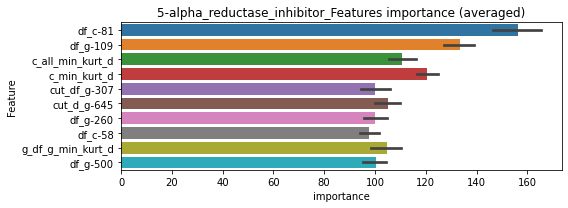

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[812]	training's binary_logloss: 0.00027041	valid_1's binary_logloss: 0.00081808
Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000272338	valid_1's binary_logloss: 0.00112116
Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000273689	valid_1's binary_logloss: 0.000707182
Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000271131	valid_1's binary_logloss: 0.00167792
Training until validation scores don't improve for 29 rounds


5-alpha_reductase_inhibitor logloss: 0.0011394828912763065


Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000272041	valid_1's binary_logloss: 0.00137363


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000281321	valid_1's binary_logloss: 0.000955498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000274371	valid_1's binary_logloss: 0.000607807
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000275848	valid_1's binary_logloss: 0.00126887
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000282357	valid_1's binary_logloss: 0.00325188
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012950, Threshold: 0.0036466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0036466, conf_0:0.00255, conf_1:0.00474
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0336466


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000278326	valid_1's binary_logloss: 0.000830376


threshold: 0.0336466, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000273625	valid_1's binary_logloss: 0.000927925
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000269875	valid_1's binary_logloss: 0.00059814
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000272419	valid_1's binary_logloss: 0.00181308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000275561	valid_1's binary_logloss: 0.00336351
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0245601, Threshold: 0.0336466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0336466, conf_0:0.02692, conf_1:0.04038


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000274096	valid_1's binary_logloss: 0.00097467


threshold: 0.0336466, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000273625	valid_1's binary_logloss: 0.000927925
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000269875	valid_1's binary_logloss: 0.00059814
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000272419	valid_1's binary_logloss: 0.00181308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000275561	valid_1's binary_logloss: 0.00336351
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0245601, Threshold: 0.0336466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0336466, conf_0:0.03028, conf_1:0.03701


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000274096	valid_1's binary_logloss: 0.00097467


threshold: 0.0336466, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


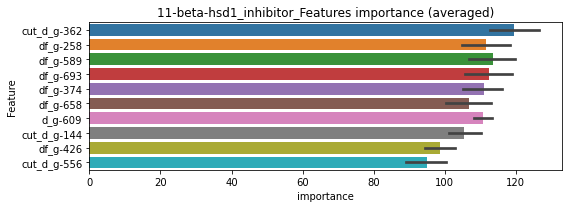

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000272293	valid_1's binary_logloss: 0.000703159


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.00027218	valid_1's binary_logloss: 0.000761666


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000274488	valid_1's binary_logloss: 0.00098038


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000294983	valid_1's binary_logloss: 0.00222595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000275791	valid_1's binary_logloss: 0.000614681


11-beta-hsd1_inhibitor logloss: 0.0010570995215876367
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00032711	valid_1's binary_logloss: 0.00448161
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000332639	valid_1's binary_logloss: 0.00590245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000338687	valid_1's binary_logloss: 0.000493004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000349173	valid_1's binary_logloss: 0.00881218
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017858, Threshold: 0.0039070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0039070, conf_0:0.00273, conf_1:0.00508


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000318173	valid_1's binary_logloss: 0.0034962


Num_p_label: 1.0, Expected: 4.0, Adj_threshold_1: 0.0339070
threshold: 0.0339070, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000343183	valid_1's binary_logloss: 0.00406217
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000321863	valid_1's binary_logloss: 0.00563646
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000321691	valid_1's binary_logloss: 0.000461212
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00033257	valid_1's binary_logloss: 0.00851166
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0082600, Threshold: 0.0339070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0339070, conf_0:0.02713, conf_1:0.04069


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00031727	valid_1's binary_logloss: 0.00367455


threshold: 0.0339070, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000343183	valid_1's binary_logloss: 0.00406217
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000321863	valid_1's binary_logloss: 0.00563646
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000321691	valid_1's binary_logloss: 0.000461212
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00033257	valid_1's binary_logloss: 0.00851166
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0082600, Threshold: 0.0339070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0339070, conf_0:0.03052, conf_1:0.03730


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00031727	valid_1's binary_logloss: 0.00367455


threshold: 0.0339070, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


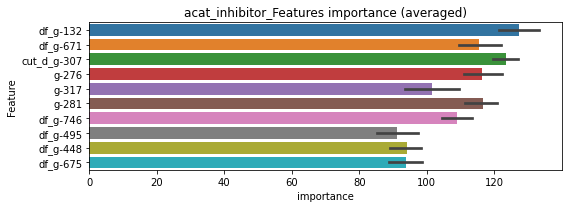

len(train_index) : 3044
len(valid_index) : 762
================================= fold 1/5 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000314238	valid_1's binary_logloss: 0.00317792


len(train_index) : 3045
len(valid_index) : 761
================================= fold 2/5 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3045
len(valid_index) : 761
================================= fold 3/5 acat_inhibitor=================================


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000373217	valid_1's binary_logloss: 0.00509959
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00032298	valid_1's binary_logloss: 0.000493815


len(train_index) : 3045
len(valid_index) : 761
================================= fold 4/5 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3045
len(valid_index) : 761


Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000339538	valid_1's binary_logloss: 0.0056885


================================= fold 5/5 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000314667	valid_1's binary_logloss: 0.00221241


acat_inhibitor logloss: 0.003334810240684494


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0260568	valid_1's binary_logloss: 0.106652
Early stopping, best iteration is:
[1665]	training's binary_logloss: 0.0148163	valid_1's binary_logloss: 0.101529
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0277662	valid_1's binary_logloss: 0.0805373
[2000]	training's binary_logloss: 0.0129243	valid_1's binary_logloss: 0.0709046
[3000]	training's binary_logloss: 0.00833055	valid_1's binary_logloss: 0.0677047
Early stopping, best iteration is:
[3517]	training's binary_logloss: 0.00702897	valid_1's binary_logloss: 0.0670246
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0265965	valid_1's binary_logloss: 0.101186
Early stopping, best iteration is:
[1365]	training's binary_logloss: 0.0189072	valid_1's binary_logloss: 0.0976581


1 / 3, AUC score:0.987, PR-AUC:0.971
y_Threshold: 0.0438102, Threshold: 0.0735755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 394 → Positive_corect_labels: 1210/7281
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0735755, conf_0:0.05150, conf_1:0.09565
threshold: 0.0735755, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1210.0/7281, y_label_rate: 0.1661860
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0205565	valid_1's binary_logloss: 0.0718382
[2000]	training's binary_logloss: 0.00982049	valid_1's binary_logloss: 0.0649511
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.00854501	valid_1's binary_logloss: 0.06398
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0210247	valid_1's binary_logloss: 0.0652251
[2000]	training's binary_logloss: 0.00998678	valid_1's binary_logloss: 0.0580051
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.00838324	valid_1's binary_logloss: 0.0569898
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0210174	valid_1's binary_logloss: 0.0663235
[2000]	training's binary_logloss: 0.0100177	valid_1's binary_logloss: 0.0588405
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.00949146	valid_1's binary_logloss:

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0669760, Threshold: 0.0735755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 1169.0/7199
p_label_rate: 0.0133099 Vs.target_rate: 0.00798
Num_p_label: 53.0, Expected: 31.8, Threshold: 0.0735755, conf_0:0.05886, conf_1:0.08829
Num_p_label: 24.0, Expected: 31.8, Adj_threshold_1: 0.1035755
threshold: 0.1035755, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 1169.0/7199, y_label_rate: 0.1623837
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0170863	valid_1's binary_logloss: 0.0542696
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.00949398	valid_1's binary_logloss: 0.0476642
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0176046	valid_1's binary_logloss: 0.0516624
[2000]	training's binary_logloss: 0.0084589	valid_1's binary_logloss: 0.0440322
[3000]	training's binary_logloss: 0.00554058	valid_1's binary_logloss: 0.0416663
Early stopping, best iteration is:
[3061]	training's binary_logloss: 0.00542992	valid_1's binary_logloss: 0.0415865
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0183423	valid_1's binary_logloss: 0.0442244
[2000]	training's binary_logloss: 0.00872844	valid_1's binary_logloss: 0.0361398
[3000]	training's binary_logloss: 0.00570348	valid_1's binary_logloss: 0.033203
Early stopping, best it

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0656584, Threshold: 0.1035755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1147.0/7155
p_label_rate: 0.0040181 Vs.target_rate: 0.00798
Num_p_label: 16.0, Expected: 31.8, Threshold: 0.1035755, conf_0:0.09322, conf_1:0.11393
threshold: 0.1035755, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1147.0/7155, y_label_rate: 0.1603075


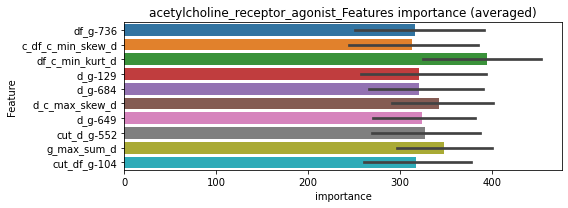

len(train_index) : 4770
len(valid_index) : 2385
================================= fold 1/3 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0340699	valid_1's binary_logloss: 0.0562854
[2000]	training's binary_logloss: 0.0176045	valid_1's binary_logloss: 0.0419124
[3000]	training's binary_logloss: 0.0117823	valid_1's binary_logloss: 0.0369183
[4000]	training's binary_logloss: 0.00882109	valid_1's binary_logloss: 0.0343973
[5000]	training's binary_logloss: 0.00706955	valid_1's binary_logloss: 0.0328855
[6000]	training's binary_logloss: 0.00589676	valid_1's binary_logloss: 0.0319387
Early stopping, best iteration is:
[6355]	training's binary_logloss: 0.00556657	valid_1's binary_logloss: 0.0316136


len(train_index) : 4770
len(valid_index) : 2385
================================= fold 2/3 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0340065	valid_1's binary_logloss: 0.0634915
[2000]	training's binary_logloss: 0.0173692	valid_1's binary_logloss: 0.0476254
[3000]	training's binary_logloss: 0.011618	valid_1's binary_logloss: 0.0418613
[4000]	training's binary_logloss: 0.00869694	valid_1's binary_logloss: 0.0387839
[5000]	training's binary_logloss: 0.00697104	valid_1's binary_logloss: 0.0371172
[6000]	training's binary_logloss: 0.00581314	valid_1's binary_logloss: 0.0357517
[7000]	training's binary_logloss: 0.0049947	valid_1's binary_logloss: 0.0350139
Early stopping, best iteration is:
[7875]	training's binary_logloss: 0.0044506	valid_1's binary_logloss: 0.0343665


len(train_index) : 4770
len(valid_index) : 2385
================================= fold 3/3 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0336051	valid_1's binary_logloss: 0.0638015
[2000]	training's binary_logloss: 0.0173169	valid_1's binary_logloss: 0.0474581
[3000]	training's binary_logloss: 0.0116345	valid_1's binary_logloss: 0.0414967
[4000]	training's binary_logloss: 0.00871841	valid_1's binary_logloss: 0.0382861
[5000]	training's binary_logloss: 0.00697247	valid_1's binary_logloss: 0.0362994
[6000]	training's binary_logloss: 0.00582134	valid_1's binary_logloss: 0.0348949
[7000]	training's binary_logloss: 0.00500185	valid_1's binary_logloss: 0.0339847
Early stopping, best iteration is:
[7428]	training's binary_logloss: 0.00471531	valid_1's binary_logloss: 0.0335485


acetylcholine_receptor_agonist logloss: 0.03317618285038745
acetylcholine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0344052	valid_1's binary_logloss: 0.14244
Early stopping, best iteration is:
[1190]	training's binary_logloss: 0.0283188	valid_1's binary_logloss: 0.139902
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0353751	valid_1's binary_logloss: 0.127153
[2000]	training's binary_logloss: 0.0160616	valid_1's binary_logloss: 0.118748
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0152755	valid_1's binary_logloss: 0.11829
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0353408	valid_1's binary_logloss: 0.126501
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0198763	valid_1's binary_logloss: 0.119716


1 / 3, AUC score:0.968, PR-AUC:0.942
y_Threshold: 0.0641561, Threshold: 0.1209172, pos_neg_ratio: 0.8000000
Remove_noisy_data: 586 → Positive_corect_labels: 1364/8454
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.1209172, conf_0:0.08464, conf_1:0.15719
threshold: 0.1209172, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1364.0/8454, y_label_rate: 0.1613437
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.025213	valid_1's binary_logloss: 0.0777012
[2000]	training's binary_logloss: 0.0116694	valid_1's binary_logloss: 0.0671315
[3000]	training's binary_logloss: 0.00751168	valid_1's binary_logloss: 0.0639035
Early stopping, best iteration is:
[3237]	training's binary_logloss: 0.00691711	valid_1's binary_logloss: 0.0633959
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0245055	valid_1's binary_logloss: 0.0820347
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0118857	valid_1's binary_logloss: 0.0720125
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0251474	valid_1's binary_logloss: 0.0762029
[2000]	training's binary_logloss: 0.0116372	valid_1's binary_logloss: 0.0650112
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0113335	valid_1's binary_logloss: 0

2 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0794395, Threshold: 0.1209172, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1306.0/8338
p_label_rate: 0.0082873 Vs.target_rate: 0.01264
Num_p_label: 33.0, Expected: 50.3, Threshold: 0.1209172, conf_0:0.09673, conf_1:0.14510
threshold: 0.1209172, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 1306.0/8338, y_label_rate: 0.1566323
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0216367	valid_1's binary_logloss: 0.0562663
[2000]	training's binary_logloss: 0.010077	valid_1's binary_logloss: 0.0450622
[3000]	training's binary_logloss: 0.00650756	valid_1's binary_logloss: 0.041007
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.00636873	valid_1's binary_logloss: 0.0408506
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0214602	valid_1's binary_logloss: 0.0595576
[2000]	training's binary_logloss: 0.00999589	valid_1's binary_logloss: 0.0483187
[3000]	training's binary_logloss: 0.00646042	valid_1's binary_logloss: 0.0446442
Early stopping, best iteration is:
[3012]	training's binary_logloss: 0.00643313	valid_1's binary_logloss: 0.044575
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0209048	valid_1's binary_logloss: 0.0664982
[2000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0669821, Threshold: 0.1209172, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 1280.0/8286
p_label_rate: 0.0057760 Vs.target_rate: 0.01264
Num_p_label: 23.0, Expected: 50.3, Threshold: 0.1209172, conf_0:0.10883, conf_1:0.13301
threshold: 0.1209172, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 1280.0/8286, y_label_rate: 0.1544774


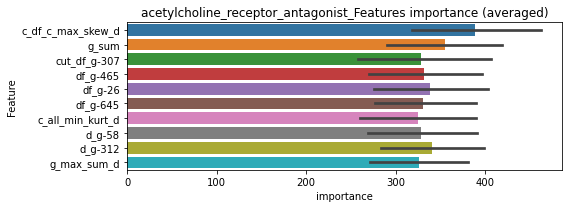

len(train_index) : 5524
len(valid_index) : 2762
================================= fold 1/3 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0400443	valid_1's binary_logloss: 0.0803989
[2000]	training's binary_logloss: 0.02023	valid_1's binary_logloss: 0.0626929
[3000]	training's binary_logloss: 0.0133718	valid_1's binary_logloss: 0.0561129
[4000]	training's binary_logloss: 0.00991815	valid_1's binary_logloss: 0.0528188
Early stopping, best iteration is:
[4407]	training's binary_logloss: 0.00898551	valid_1's binary_logloss: 0.0519707


len(train_index) : 5524
len(valid_index) : 2762
================================= fold 2/3 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0409763	valid_1's binary_logloss: 0.0786987
[2000]	training's binary_logloss: 0.0207954	valid_1's binary_logloss: 0.0614726
[3000]	training's binary_logloss: 0.0137148	valid_1's binary_logloss: 0.055418
[4000]	training's binary_logloss: 0.0101891	valid_1's binary_logloss: 0.0523934
[5000]	training's binary_logloss: 0.00810994	valid_1's binary_logloss: 0.0507059
Early stopping, best iteration is:
[5193]	training's binary_logloss: 0.00779681	valid_1's binary_logloss: 0.0504956


len(train_index) : 5524
len(valid_index) : 2762
================================= fold 3/3 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0408102	valid_1's binary_logloss: 0.0782649
[2000]	training's binary_logloss: 0.0207711	valid_1's binary_logloss: 0.0610438
[3000]	training's binary_logloss: 0.0137414	valid_1's binary_logloss: 0.0548641
[4000]	training's binary_logloss: 0.0102375	valid_1's binary_logloss: 0.0518004
Early stopping, best iteration is:
[4039]	training's binary_logloss: 0.0101361	valid_1's binary_logloss: 0.0516211


acetylcholine_receptor_antagonist logloss: 0.051362486634335215
acetylcholine_receptor_antagonist is unpredictable(><)!
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000669054	valid_1's binary_logloss: 0.0240548
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000793953	valid_1's binary_logloss: 0.0427511
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000807945	valid_1's binary_logloss: 0.0298747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000647301	valid_1's binary_logloss: 0.0092434
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000818467	valid_1's binary_logloss: 0.0274418


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0075731, Threshold: 0.0202029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 137 → Positive_corect_labels: 652/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0202029, conf_0:0.01414, conf_1:0.02626
Num_p_label: 10.0, Expected: 12.2, Adj_threshold_1: 0.0502029
threshold: 0.0502029, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000640743	valid_1's binary_logloss: 0.0171503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000582286	valid_1's binary_logloss: 0.0346466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00129491	valid_1's binary_logloss: 0.0307065
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000805305	valid_1's binary_logloss: 0.0263154
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000677231	valid_1's binary_logloss: 0.0250459


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0290161, Threshold: 0.0502029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0107986 Vs.target_rate: 0.00307
Num_p_label: 43.0, Expected: 12.2, Threshold: 0.0502029, conf_0:0.04016, conf_1:0.06024
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.0802029
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_2: 0.1102029
threshold: 0.1102029, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000581872	valid_1's binary_logloss: 0.0165072
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00058565	valid_1's binary_logloss: 0.0332014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000588473	valid_1's binary_logloss: 0.012461
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.00058841	valid_1's binary_logloss: 0.00893963
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000598602	valid_1's binary_logloss: 0.0136656


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0310087, Threshold: 0.1102029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.1102029, conf_0:0.09918, conf_1:0.12122
threshold: 0.1102029, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3775, y_label_rate: 0.1703311


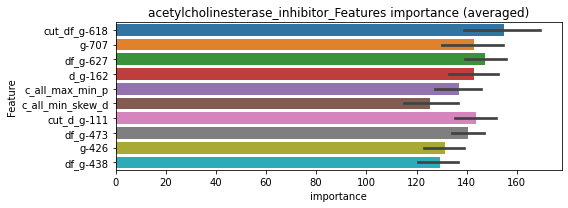

len(train_index) : 3020
len(valid_index) : 755
================================= fold 1/5 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3020
len(valid_index) : 755


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000883237	valid_1's binary_logloss: 0.0218042


================================= fold 2/5 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000576907	valid_1's binary_logloss: 0.0152534
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000580412	valid_1's binary_logloss: 0.0152294


len(train_index) : 3020
len(valid_index) : 755
================================= fold 3/5 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3020
len(valid_index) : 755


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00089579	valid_1's binary_logloss: 0.0324111


================================= fold 4/5 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3020
len(valid_index) : 755
================================= fold 5/5 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00109415	valid_1's binary_logloss: 0.0264129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000607699	valid_1's binary_logloss: 0.0169284


acetylcholinesterase_inhibitor logloss: 0.022559400743993072
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000500061	valid_1's binary_logloss: 0.0150484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000521219	valid_1's binary_logloss: 0.00589961
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00051988	valid_1's binary_logloss: 0.0208878
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000469924	valid_1's binary_logloss: 0.00609934
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000474027	valid_1's binary_logloss: 0.00769828


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033055, Threshold: 0.0150792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0150792, conf_0:0.01056, conf_1:0.01960
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0450792
threshold: 0.0450792, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000473352	valid_1's binary_logloss: 0.0129808
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000459315	valid_1's binary_logloss: 0.00483877
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000500939	valid_1's binary_logloss: 0.0196153
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000487324	valid_1's binary_logloss: 0.00601029
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000473711	valid_1's binary_logloss: 0.00676026


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219193, Threshold: 0.0450792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0450792, conf_0:0.03606, conf_1:0.05409
threshold: 0.0450792, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000473352	valid_1's binary_logloss: 0.0129808
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000459315	valid_1's binary_logloss: 0.00483877
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000500939	valid_1's binary_logloss: 0.0196153
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000487324	valid_1's binary_logloss: 0.00601029
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000473711	valid_1's binary_logloss: 0.00676026


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219193, Threshold: 0.0450792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0450792, conf_0:0.04057, conf_1:0.04959
threshold: 0.0450792, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


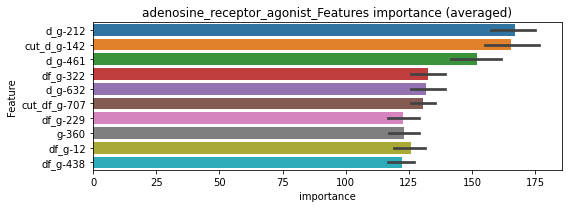

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000586119	valid_1's binary_logloss: 0.0132445


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000464881	valid_1's binary_logloss: 0.00484995


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00066869	valid_1's binary_logloss: 0.0183017
Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000912607	valid_1's binary_logloss: 0.00968298
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000463813	valid_1's binary_logloss: 0.00789144


adenosine_receptor_agonist logloss: 0.010794130212055005
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0279243	valid_1's binary_logloss: 0.0911613
[2000]	training's binary_logloss: 0.0133207	valid_1's binary_logloss: 0.0784148
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.0116598	valid_1's binary_logloss: 0.0769053
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0289103	valid_1's binary_logloss: 0.0825956
[2000]	training's binary_logloss: 0.0137928	valid_1's binary_logloss: 0.0686034
[3000]	training's binary_logloss: 0.00901318	valid_1's binary_logloss: 0.0643013
Early stopping, best iteration is:
[3076]	training's binary_logloss: 0.00878345	valid_1's binary_logloss: 0.064089
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0286392	valid_1's binary_logloss: 0.0885498
[2000]	training's binary_logloss: 0.0137112	valid_1's binary_logloss: 0.0744328
[3000]	training's binary_l

1 / 3, AUC score:0.992, PR-AUC:0.984
y_Threshold: 0.0383434, Threshold: 0.1011636, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 634/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1011636, conf_0:0.07081, conf_1:0.13151
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_1: 0.1311636
threshold: 0.1311636, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0250334	valid_1's binary_logloss: 0.0804656
[2000]	training's binary_logloss: 0.0120142	valid_1's binary_logloss: 0.0680062
[3000]	training's binary_logloss: 0.00790402	valid_1's binary_logloss: 0.0636945
Early stopping, best iteration is:
[3447]	training's binary_logloss: 0.00686397	valid_1's binary_logloss: 0.0624407
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0243543	valid_1's binary_logloss: 0.0898247
Early stopping, best iteration is:
[1662]	training's binary_logloss: 0.0141761	valid_1's binary_logloss: 0.0801012
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0259049	valid_1's binary_logloss: 0.0638495
[2000]	training's binary_logloss: 0.0124311	valid_1's binary_logloss: 0.0488508
[3000]	training's binary_logloss: 0.00815902	valid_1's binary_logloss: 0.0433646
[4000]	training's binary

2 / 3, AUC score:0.996, PR-AUC:0.992
y_Threshold: 0.0693717, Threshold: 0.1311636, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 616.0/3718
p_label_rate: 0.0195881 Vs.target_rate: 0.00403
Num_p_label: 78.0, Expected: 16.1, Threshold: 0.1311636, conf_0:0.10493, conf_1:0.15740
Num_p_label: 61.0, Expected: 16.1, Adj_threshold_1: 0.1611636
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_2: 0.1911636
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_3: 0.2211636
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_4: 0.2511636
threshold: 0.2511636, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 616.0/3718, y_label_rate: 0.1656805
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0231615	valid_1's binary_logloss: 0.0796398
[2000]	training's binary_logloss: 0.0111369	valid_1's binary_logloss: 0.0666557
[3000]	training's binary_logloss: 0.00733647	valid_1's binary_logloss: 0.0621895
Early stopping, best iteration is:
[3447]	training's binary_logloss: 0.00638145	valid_1's binary_logloss: 0.0611226
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0235647	valid_1's binary_logloss: 0.062095
[2000]	training's binary_logloss: 0.011263	valid_1's binary_logloss: 0.0471239
[3000]	training's binary_logloss: 0.00743808	valid_1's binary_logloss: 0.04188
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00616092	valid_1's binary_logloss: 0.0400307
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0239607	valid_1's binary_logloss: 0.0636234
[2000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0637630, Threshold: 0.2511636, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 609.0/3704
p_label_rate: 0.0070316 Vs.target_rate: 0.00403
Num_p_label: 28.0, Expected: 16.1, Threshold: 0.2511636, conf_0:0.22605, conf_1:0.27628
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_1: 0.2811636
threshold: 0.2811636, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 609.0/3704, y_label_rate: 0.1644168


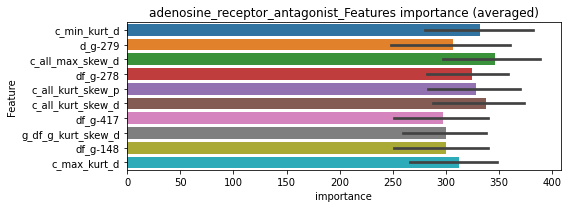

len(train_index) : 2469
len(valid_index) : 1235
================================= fold 1/3 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0491318	valid_1's binary_logloss: 0.0942029
[2000]	training's binary_logloss: 0.0248337	valid_1's binary_logloss: 0.0670079
[3000]	training's binary_logloss: 0.0165274	valid_1's binary_logloss: 0.0567699
[4000]	training's binary_logloss: 0.0124104	valid_1's binary_logloss: 0.0515718
[5000]	training's binary_logloss: 0.00993882	valid_1's binary_logloss: 0.0484243
[6000]	training's binary_logloss: 0.00828517	valid_1's binary_logloss: 0.0460867
[7000]	training's binary_logloss: 0.00712162	valid_1's binary_logloss: 0.0444091
[8000]	training's binary_logloss: 0.00625658	valid_1's binary_logloss: 0.0431126
[9000]	training's binary_logloss: 0.00558544	valid_1's binary_logloss: 0.0420969
Early stopping, best iteration is:
[9288]	training's binary_logloss: 0.00541944	valid_1's binary_logloss: 0.0418373


len(train_index) : 2469
len(valid_index) : 1235
================================= fold 2/3 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.050075	valid_1's binary_logloss: 0.086407
[2000]	training's binary_logloss: 0.0253285	valid_1's binary_logloss: 0.06024
[3000]	training's binary_logloss: 0.0168439	valid_1's binary_logloss: 0.0504294
[4000]	training's binary_logloss: 0.0126286	valid_1's binary_logloss: 0.0450443
[5000]	training's binary_logloss: 0.0101274	valid_1's binary_logloss: 0.0419102
[6000]	training's binary_logloss: 0.00844548	valid_1's binary_logloss: 0.0393065
[7000]	training's binary_logloss: 0.00726149	valid_1's binary_logloss: 0.0375122
[8000]	training's binary_logloss: 0.00638022	valid_1's binary_logloss: 0.0361307
[9000]	training's binary_logloss: 0.00569347	valid_1's binary_logloss: 0.0349767
[10000]	training's binary_logloss: 0.00515719	valid_1's binary_logloss: 0.0342465
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00515719	valid_1's binary_logloss: 0.0342465


len(train_index) : 2470
len(valid_index) : 1234
================================= fold 3/3 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0513794	valid_1's binary_logloss: 0.0845754
[2000]	training's binary_logloss: 0.0259482	valid_1's binary_logloss: 0.0583047
[3000]	training's binary_logloss: 0.0172475	valid_1's binary_logloss: 0.0486102
[4000]	training's binary_logloss: 0.0129021	valid_1's binary_logloss: 0.0435626
[5000]	training's binary_logloss: 0.0103396	valid_1's binary_logloss: 0.0405158
[6000]	training's binary_logloss: 0.00863275	valid_1's binary_logloss: 0.0381585
[7000]	training's binary_logloss: 0.00742375	valid_1's binary_logloss: 0.0366131
[8000]	training's binary_logloss: 0.00651702	valid_1's binary_logloss: 0.0353856
[9000]	training's binary_logloss: 0.00581643	valid_1's binary_logloss: 0.0343972
Early stopping, best iteration is:
[9301]	training's binary_logloss: 0.00563668	valid_1's binary_logloss: 0.0341551


adenosine_receptor_antagonist logloss: 0.03674701443601003
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000282044	valid_1's binary_logloss: 0.000688169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000295155	valid_1's binary_logloss: 0.000757119
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000286834	valid_1's binary_logloss: 0.00173975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.0002873	valid_1's binary_logloss: 0.00231956
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014359, Threshold: 0.0080676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0080676, conf_0:0.00565, conf_1:0.01049
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.0380676
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0680676


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000281582	valid_1's binary_logloss: 0.000869644


threshold: 0.0680676, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000268972	valid_1's binary_logloss: 0.000439972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000266319	valid_1's binary_logloss: 0.000693727
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000267149	valid_1's binary_logloss: 0.0018531
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000270645	valid_1's binary_logloss: 0.00253876
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804930, Threshold: 0.0680676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0150678 Vs.target_rate: 0.00076
Num_p_label: 60.0, Expected: 3.0, Threshold: 0.0680676, conf_0:0.05445, conf_1:0.08168
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_1: 0.0980676
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.1280676
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_3: 0.1580676
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_4: 0.1880676
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_5: 0.2180676
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_6: 0.2480676


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000266513	valid_1's binary_logloss: 0.000497608


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.2780676
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.3080676
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.3380676
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.3680676
threshold: 0.3680676, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000268972	valid_1's binary_logloss: 0.000439972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000266319	valid_1's binary_logloss: 0.000693727
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000267149	valid_1's binary_logloss: 0.0018531
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000270645	valid_1's binary_logloss: 0.00253876
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804930, Threshold: 0.3680676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3680676, conf_0:0.33126, conf_1:0.40487


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000266513	valid_1's binary_logloss: 0.000497608


threshold: 0.3680676, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


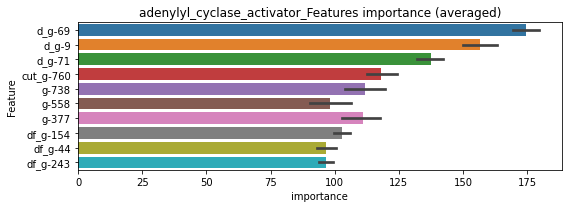

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00026996	valid_1's binary_logloss: 0.00046799


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000266843	valid_1's binary_logloss: 0.000579187
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000266843	valid_1's binary_logloss: 0.000579187


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000269416	valid_1's binary_logloss: 0.0015568


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000270535	valid_1's binary_logloss: 0.0023176


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000262814	valid_1's binary_logloss: 0.000563894
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000261916	valid_1's binary_logloss: 0.000562765


adenylyl_cyclase_activator logloss: 0.0010967899177490154


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0359777	valid_1's binary_logloss: 0.119872
[2000]	training's binary_logloss: 0.0166395	valid_1's binary_logloss: 0.107309
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0157365	valid_1's binary_logloss: 0.106372
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0361691	valid_1's binary_logloss: 0.117458
[2000]	training's binary_logloss: 0.0166929	valid_1's binary_logloss: 0.10424
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.015128	valid_1's binary_logloss: 0.103291
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0351811	valid_1's binary_logloss: 0.128025
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.0198976	valid_1's binary_logloss: 0.119867


1 / 3, AUC score:0.979, PR-AUC:0.959
y_Threshold: 0.0624804, Threshold: 0.1285307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 473 → Positive_corect_labels: 1293/7870
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.1285307, conf_0:0.08997, conf_1:0.16709
threshold: 0.1285307, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1293.0/7870, y_label_rate: 0.1642948
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0279617	valid_1's binary_logloss: 0.0891145
[2000]	training's binary_logloss: 0.0131076	valid_1's binary_logloss: 0.0764319
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0109479	valid_1's binary_logloss: 0.074459
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0279872	valid_1's binary_logloss: 0.0909247
[2000]	training's binary_logloss: 0.0130718	valid_1's binary_logloss: 0.0781369
Early stopping, best iteration is:
[2397]	training's binary_logloss: 0.0107305	valid_1's binary_logloss: 0.0760812
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0279376	valid_1's binary_logloss: 0.0876665
[2000]	training's binary_logloss: 0.0130432	valid_1's binary_logloss: 0.076296
Early stopping, best iteration is:
[2191]	training's binary_logloss: 0.0118106	valid_1's binary_logloss: 0.07

2 / 3, AUC score:0.994, PR-AUC:0.986
y_Threshold: 0.0910159, Threshold: 0.1285307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 1231.0/7746
p_label_rate: 0.0135610 Vs.target_rate: 0.01134
Num_p_label: 54.0, Expected: 45.1, Threshold: 0.1285307, conf_0:0.10282, conf_1:0.15424
threshold: 0.1285307, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 1231.0/7746, y_label_rate: 0.1589207
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0238063	valid_1's binary_logloss: 0.0749557
Early stopping, best iteration is:
[1909]	training's binary_logloss: 0.0118471	valid_1's binary_logloss: 0.0633546
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0239325	valid_1's binary_logloss: 0.073893
[2000]	training's binary_logloss: 0.0112534	valid_1's binary_logloss: 0.0608888
[3000]	training's binary_logloss: 0.0073286	valid_1's binary_logloss: 0.0565511
Early stopping, best iteration is:
[3235]	training's binary_logloss: 0.006775	valid_1's binary_logloss: 0.0559001
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0239714	valid_1's binary_logloss: 0.0724784
[2000]	training's binary_logloss: 0.01126	valid_1's binary_logloss: 0.0607325
[3000]	training's binary_logloss: 0.00730054	valid_1's binary_logloss: 0.0566659
Early stopping, best iteration

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0897702, Threshold: 0.1285307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 1191.0/7666
p_label_rate: 0.0150678 Vs.target_rate: 0.01134
Num_p_label: 60.0, Expected: 45.1, Threshold: 0.1285307, conf_0:0.11568, conf_1:0.14138
threshold: 0.1285307, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 1191.0/7666, y_label_rate: 0.1553613


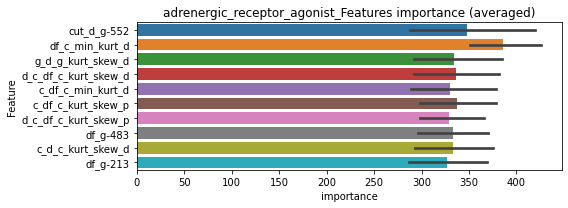

len(train_index) : 5110
len(valid_index) : 2556
================================= fold 1/3 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0438145	valid_1's binary_logloss: 0.0883508
[2000]	training's binary_logloss: 0.0221539	valid_1's binary_logloss: 0.0692081
[3000]	training's binary_logloss: 0.0146863	valid_1's binary_logloss: 0.062401
[4000]	training's binary_logloss: 0.0109603	valid_1's binary_logloss: 0.0588439
[5000]	training's binary_logloss: 0.00875991	valid_1's binary_logloss: 0.0568275
Early stopping, best iteration is:
[5802]	training's binary_logloss: 0.00754309	valid_1's binary_logloss: 0.0556571


len(train_index) : 5111
len(valid_index) : 2555
================================= fold 2/3 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0457573	valid_1's binary_logloss: 0.0829518
[2000]	training's binary_logloss: 0.0233333	valid_1's binary_logloss: 0.0627029
[3000]	training's binary_logloss: 0.0154335	valid_1's binary_logloss: 0.0549882
[4000]	training's binary_logloss: 0.0114997	valid_1's binary_logloss: 0.051037
[5000]	training's binary_logloss: 0.00917539	valid_1's binary_logloss: 0.0486796
[6000]	training's binary_logloss: 0.00764448	valid_1's binary_logloss: 0.0470047
[7000]	training's binary_logloss: 0.00655664	valid_1's binary_logloss: 0.0459615
Early stopping, best iteration is:
[7002]	training's binary_logloss: 0.00655479	valid_1's binary_logloss: 0.0459557


len(train_index) : 5111
len(valid_index) : 2555
================================= fold 3/3 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0461637	valid_1's binary_logloss: 0.0818616
[2000]	training's binary_logloss: 0.0236548	valid_1's binary_logloss: 0.0597497
[3000]	training's binary_logloss: 0.0156615	valid_1's binary_logloss: 0.0512939
[4000]	training's binary_logloss: 0.0116575	valid_1's binary_logloss: 0.0463409
[5000]	training's binary_logloss: 0.0092907	valid_1's binary_logloss: 0.0435061
[6000]	training's binary_logloss: 0.00772939	valid_1's binary_logloss: 0.0416302
Early stopping, best iteration is:
[6347]	training's binary_logloss: 0.00730251	valid_1's binary_logloss: 0.0411051


adrenergic_receptor_agonist logloss: 0.04757370175622251
adrenergic_receptor_agonist is unpredictable(><)!


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 7013
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 7013


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0426082	valid_1's binary_logloss: 0.160345
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.0353749	valid_1's binary_logloss: 0.157803
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0429197	valid_1's binary_logloss: 0.166692
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.0393323	valid_1's binary_logloss: 0.166237
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0424844	valid_1's binary_logloss: 0.164743
Early stopping, best iteration is:
[1148]	training's binary_logloss: 0.0367405	valid_1's binary_logloss: 0.163242


1 / 3, AUC score:0.948, PR-AUC:0.904
y_Threshold: 0.0866377, Threshold: 0.1442095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 677 → Positive_corect_labels: 1204/7738
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.1442095, conf_0:0.10095, conf_1:0.18747
threshold: 0.1442095, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1204.0/7738, y_label_rate: 0.1555958
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0250437	valid_1's binary_logloss: 0.0951312
Early stopping, best iteration is:
[1339]	training's binary_logloss: 0.0183441	valid_1's binary_logloss: 0.0919555
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0260181	valid_1's binary_logloss: 0.0925316
Early stopping, best iteration is:
[1329]	training's binary_logloss: 0.0191969	valid_1's binary_logloss: 0.0884137
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0273284	valid_1's binary_logloss: 0.0778954
[2000]	training's binary_logloss: 0.0128684	valid_1's binary_logloss: 0.0686824
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.00991164	valid_1's binary_logloss: 0.066979


2 / 3, AUC score:0.994, PR-AUC:0.980
y_Threshold: 0.0919490, Threshold: 0.1442095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 1117.0/7564
p_label_rate: 0.0188348 Vs.target_rate: 0.01512
Num_p_label: 75.0, Expected: 60.2, Threshold: 0.1442095, conf_0:0.11537, conf_1:0.17305
threshold: 0.1442095, positive_p_label: 75.0/3982, p_label_rate: 0.0188348
positive_y_label: 1117.0/7564, y_label_rate: 0.1476732
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0195867	valid_1's binary_logloss: 0.0574867
[2000]	training's binary_logloss: 0.00937204	valid_1's binary_logloss: 0.0495739
Early stopping, best iteration is:
[2202]	training's binary_logloss: 0.00846124	valid_1's binary_logloss: 0.0489244
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0192676	valid_1's binary_logloss: 0.0660634
[2000]	training's binary_logloss: 0.00919364	valid_1's binary_logloss: 0.0592412
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.00796648	valid_1's binary_logloss: 0.0582568
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0195221	valid_1's binary_logloss: 0.0606198
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.0107263	valid_1's binary_logloss: 0.0536417


3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0825554, Threshold: 0.1442095, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 1081.0/7492
p_label_rate: 0.0203415 Vs.target_rate: 0.01512
Num_p_label: 81.0, Expected: 60.2, Threshold: 0.1442095, conf_0:0.12979, conf_1:0.15863
threshold: 0.1442095, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 1081.0/7492, y_label_rate: 0.1442872


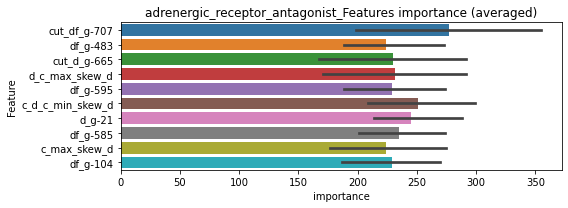

len(train_index) : 4994
len(valid_index) : 2498
================================= fold 1/3 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0355451	valid_1's binary_logloss: 0.0600456
[2000]	training's binary_logloss: 0.0182462	valid_1's binary_logloss: 0.0440864
[3000]	training's binary_logloss: 0.0121882	valid_1's binary_logloss: 0.0386569
[4000]	training's binary_logloss: 0.00913625	valid_1's binary_logloss: 0.0358344
[5000]	training's binary_logloss: 0.00732068	valid_1's binary_logloss: 0.0340305
[6000]	training's binary_logloss: 0.00611084	valid_1's binary_logloss: 0.0327384
Early stopping, best iteration is:
[6382]	training's binary_logloss: 0.00574744	valid_1's binary_logloss: 0.0323457


len(train_index) : 4995
len(valid_index) : 2497
================================= fold 2/3 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0341749	valid_1's binary_logloss: 0.061123
[2000]	training's binary_logloss: 0.0175646	valid_1's binary_logloss: 0.0459651
[3000]	training's binary_logloss: 0.0117245	valid_1's binary_logloss: 0.0402877
[4000]	training's binary_logloss: 0.00878671	valid_1's binary_logloss: 0.0373838
[5000]	training's binary_logloss: 0.00703923	valid_1's binary_logloss: 0.0356704
Early stopping, best iteration is:
[5502]	training's binary_logloss: 0.00639902	valid_1's binary_logloss: 0.03493


len(train_index) : 4995
len(valid_index) : 2497
================================= fold 3/3 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0346684	valid_1's binary_logloss: 0.0657039
[2000]	training's binary_logloss: 0.0176536	valid_1's binary_logloss: 0.0500149
[3000]	training's binary_logloss: 0.0118164	valid_1's binary_logloss: 0.0448722
[4000]	training's binary_logloss: 0.00885303	valid_1's binary_logloss: 0.0420757
Early stopping, best iteration is:
[4809]	training's binary_logloss: 0.00737624	valid_1's binary_logloss: 0.0406252


adrenergic_receptor_antagonist logloss: 0.03596648861312196
adrenergic_receptor_antagonist is unpredictable(><)!
akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000541558	valid_1's binary_logloss: 0.0158634
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000563103	valid_1's binary_logloss: 0.019291
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000571334	valid_1's binary_logloss: 0.0319402
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000573494	valid_1's binary_logloss: 0.010521
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000589274	valid_1's binary_logloss: 0.022801


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052681, Threshold: 0.0199431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0199431, conf_0:0.01396, conf_1:0.02593
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_1: 0.0499431
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_2: 0.0799431
threshold: 0.0799431, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000542048	valid_1's binary_logloss: 0.0188239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000550042	valid_1's binary_logloss: 0.00654594
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000535057	valid_1's binary_logloss: 0.0150975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000550208	valid_1's binary_logloss: 0.0160327
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000528427	valid_1's binary_logloss: 0.0115154


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292046, Threshold: 0.0799431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3795
p_label_rate: 0.0075339 Vs.target_rate: 0.00277
Num_p_label: 30.0, Expected: 11.0, Threshold: 0.0799431, conf_0:0.06395, conf_1:0.09593
Num_p_label: 27.0, Expected: 11.0, Adj_threshold_1: 0.1099431
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1399431
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_3: 0.1699431
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_4: 0.1999431
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_5: 0.2299431
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_6: 0.2599431
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_7: 0.2899431
Num_p_label: 14.0, Expected: 11.0, Adj_threshold_8: 0.3199431
threshold: 0.3199431, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000542048	valid_1's binary_logloss: 0.0188239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000550042	valid_1's binary_logloss: 0.00654594
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000535057	valid_1's binary_logloss: 0.0150975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000550208	valid_1's binary_logloss: 0.0160327
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000528427	valid_1's binary_logloss: 0.0115154


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292046, Threshold: 0.3199431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3795
p_label_rate: 0.0035158 Vs.target_rate: 0.00277
Num_p_label: 14.0, Expected: 11.0, Threshold: 0.3199431, conf_0:0.28795, conf_1:0.35194
threshold: 0.3199431, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685


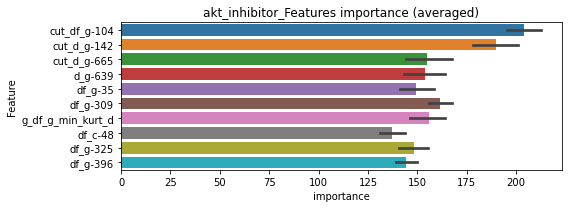

len(train_index) : 3036
len(valid_index) : 759
================================= fold 1/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000698876	valid_1's binary_logloss: 0.0188239


len(train_index) : 3036
len(valid_index) : 759
================================= fold 2/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000546542	valid_1's binary_logloss: 0.00693705
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000538968	valid_1's binary_logloss: 0.00690204


len(train_index) : 3036
len(valid_index) : 759
================================= fold 3/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000597966	valid_1's binary_logloss: 0.014888


len(train_index) : 3036
len(valid_index) : 759
================================= fold 4/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000757655	valid_1's binary_logloss: 0.0152799


len(train_index) : 3036
len(valid_index) : 759
================================= fold 5/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000566298	valid_1's binary_logloss: 0.00994921


akt_inhibitor logloss: 0.013168617451699472
aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000286323	valid_1's binary_logloss: 0.00153877
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000284695	valid_1's binary_logloss: 0.00119645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000284031	valid_1's binary_logloss: 0.00140477
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000285652	valid_1's binary_logloss: 0.00092243
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014731, Threshold: 0.0059037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0059037, conf_0:0.00413, conf_1:0.00767
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.0359037


Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000285738	valid_1's binary_logloss: 0.000787188


threshold: 0.0359037, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000277304	valid_1's binary_logloss: 0.00141785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000282652	valid_1's binary_logloss: 0.0015062
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000272867	valid_1's binary_logloss: 0.000950299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00027702	valid_1's binary_logloss: 0.000788163
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0913868, Threshold: 0.0359037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0045203 Vs.target_rate: 0.00080
Num_p_label: 18.0, Expected: 3.2, Threshold: 0.0359037, conf_0:0.02872, conf_1:0.04308
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0659037
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0959037


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000272326	valid_1's binary_logloss: 0.000511843


threshold: 0.0959037, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000277304	valid_1's binary_logloss: 0.00141785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000282652	valid_1's binary_logloss: 0.0015062
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000272867	valid_1's binary_logloss: 0.000950299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00027702	valid_1's binary_logloss: 0.000788163
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0913868, Threshold: 0.0959037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0959037, conf_0:0.08631, conf_1:0.10549


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000272326	valid_1's binary_logloss: 0.000511843


threshold: 0.0959037, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


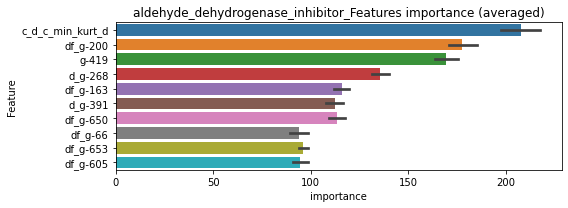

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000328622	valid_1's binary_logloss: 0.00182116
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000276165	valid_1's binary_logloss: 0.00120291


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00027322	valid_1's binary_logloss: 0.000778259
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000273229	valid_1's binary_logloss: 0.000778233


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000272755	valid_1's binary_logloss: 0.00113651
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000271906	valid_1's binary_logloss: 0.00113387


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.00027702	valid_1's binary_logloss: 0.000596645


aldehyde_dehydrogenase_inhibitor logloss: 0.0011066944136918697
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000498989	valid_1's binary_logloss: 0.0126061
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000468932	valid_1's binary_logloss: 0.00884179
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000445893	valid_1's binary_logloss: 0.0045525
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000476128	valid_1's binary_logloss: 0.00587818
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000498331	valid_1's binary_logloss: 0.00705931


y_Threshold: 0.0033266, Threshold: 0.0152647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0152647, conf_0:0.01069, conf_1:0.01984
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0452647
threshold: 0.0452647, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00043586	valid_1's binary_logloss: 0.0138489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000481562	valid_1's binary_logloss: 0.00800747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000438626	valid_1's binary_logloss: 0.00515982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000453906	valid_1's binary_logloss: 0.00443919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000435506	valid_1's binary_logloss: 0.00527181


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0236676, Threshold: 0.0452647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0072828 Vs.target_rate: 0.00176
Num_p_label: 29.0, Expected: 7.0, Threshold: 0.0452647, conf_0:0.03621, conf_1:0.05432
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0752647
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1052647
threshold: 0.1052647, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00043586	valid_1's binary_logloss: 0.0138489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000481562	valid_1's binary_logloss: 0.00800747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000438626	valid_1's binary_logloss: 0.00515982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000453906	valid_1's binary_logloss: 0.00443919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000435506	valid_1's binary_logloss: 0.00527181


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0236676, Threshold: 0.1052647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, Expected: 7.0, Threshold: 0.1052647, conf_0:0.09474, conf_1:0.11579
threshold: 0.1052647, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


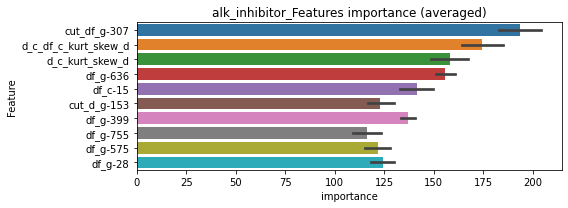

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00043966	valid_1's binary_logloss: 0.0124793


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000492235	valid_1's binary_logloss: 0.00733149


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000464329	valid_1's binary_logloss: 0.00421763


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000444749	valid_1's binary_logloss: 0.00404459


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000491082	valid_1's binary_logloss: 0.00516145


alk_inhibitor logloss: 0.0066480865319156575
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000224844	valid_1's binary_logloss: 0.000606178
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000222141	valid_1's binary_logloss: 0.00106934
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000225735	valid_1's binary_logloss: 0.00225158
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00022607	valid_1's binary_logloss: 0.000696985
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008839, Threshold: 0.0036604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0036604, conf_0:0.00256, conf_1:0.00476
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0336604
threshold: 0.0336604, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000224026	valid_1's binary_logloss: 0.00146403


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000212066	valid_1's binary_logloss: 0.000518645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000209462	valid_1's binary_logloss: 0.00162272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000209189	valid_1's binary_logloss: 0.00321595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00020733	valid_1's binary_logloss: 0.000395962
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258485, Threshold: 0.0336604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00050
Num_p_label: 17.0, Expected: 2.0, Threshold: 0.0336604, conf_0:0.02693, conf_1:0.04039
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0636604
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0936604
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1236604


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000208447	valid_1's binary_logloss: 0.000631724


threshold: 0.1236604, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000212066	valid_1's binary_logloss: 0.000518645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000209462	valid_1's binary_logloss: 0.00162272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000209189	valid_1's binary_logloss: 0.00321595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00020733	valid_1's binary_logloss: 0.000395962
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258485, Threshold: 0.1236604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1236604, conf_0:0.11129, conf_1:0.13603


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000208447	valid_1's binary_logloss: 0.000631724


threshold: 0.1236604, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


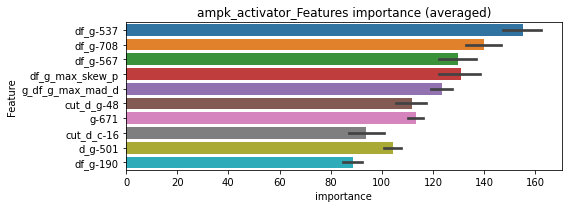

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 ampk_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 ampk_activator=================================


Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000212701	valid_1's binary_logloss: 0.000399412
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762


Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000208379	valid_1's binary_logloss: 0.00132339


================================= fold 3/5 ampk_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 ampk_activator=================================


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000214121	valid_1's binary_logloss: 0.00251352
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 ampk_activator=================================


Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000209069	valid_1's binary_logloss: 0.00042111
Training until validation scores don't improve for 29 rounds


ampk_activator logloss: 0.0010037641788527732


Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000211905	valid_1's binary_logloss: 0.000361758


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000236357	valid_1's binary_logloss: 0.000609747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000232911	valid_1's binary_logloss: 0.000978673
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000235565	valid_1's binary_logloss: 0.000308659
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000234994	valid_1's binary_logloss: 0.000342068
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010875, Threshold: 0.0172057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0172057, conf_0:0.01204, conf_1:0.02237
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_1: 0.0472057
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.0772057
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.1072057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_4: 0.1372057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.1672057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.1972057


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000233825	valid_1's binary_logloss: 0.000393544


Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.2272057
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.2572057
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.2872057
threshold: 0.2872057, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000225244	valid_1's binary_logloss: 0.000316896
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000224802	valid_1's binary_logloss: 0.00100352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000224357	valid_1's binary_logloss: 0.000359257
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000226217	valid_1's binary_logloss: 0.000281873
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1174532, Threshold: 0.2872057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00050
Num_p_label: 10.0, Expected: 2.0, Threshold: 0.2872057, conf_0:0.22976, conf_1:0.34465
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.3172057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_2: 0.3472057
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.3772057
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.4072057
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.4372057
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4672057
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.4972057
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.5272057


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000224854	valid_1's binary_logloss: 0.000436179


threshold: 0.5272057, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000225244	valid_1's binary_logloss: 0.000316896
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000224802	valid_1's binary_logloss: 0.00100352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000224357	valid_1's binary_logloss: 0.000359257
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000226217	valid_1's binary_logloss: 0.000281873
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1174532, Threshold: 0.5272057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.5272057, conf_0:0.47449, conf_1:0.57993
threshold: 0.5272057, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000224854	valid_1's binary_logloss: 0.000436179


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


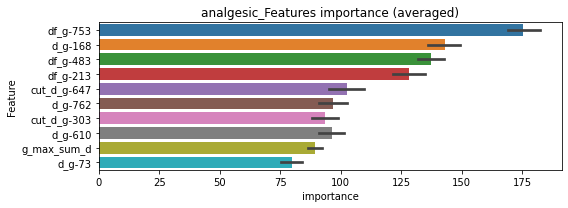

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 analgesic=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 analgesic=================================


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000224112	valid_1's binary_logloss: 0.000329228
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 analgesic=================================


Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000225182	valid_1's binary_logloss: 0.000422004
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 analgesic=================================


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000224924	valid_1's binary_logloss: 0.000301812
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 analgesic=================================


Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000226211	valid_1's binary_logloss: 0.000312185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.00022653	valid_1's binary_logloss: 0.000419046


analgesic logloss: 0.0003568506428045946
androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000525657	valid_1's binary_logloss: 0.0137722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000472813	valid_1's binary_logloss: 0.019619
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000483914	valid_1's binary_logloss: 0.00298908
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000504239	valid_1's binary_logloss: 0.00163091
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0038106, Threshold: 0.0086663, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000653339	valid_1's binary_logloss: 0.0191096


Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0086663, conf_0:0.00607, conf_1:0.01127
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0386663
threshold: 0.0386663, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000464934	valid_1's binary_logloss: 0.0167487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000463123	valid_1's binary_logloss: 0.00510365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000484682	valid_1's binary_logloss: 0.0145102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000464498	valid_1's binary_logloss: 0.00218612
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000529534	valid_1's binary_logloss: 0.0201019


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211232, Threshold: 0.0386663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, Expected: 8.0, Threshold: 0.0386663, conf_0:0.03093, conf_1:0.04640
threshold: 0.0386663, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000464934	valid_1's binary_logloss: 0.0167487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000463123	valid_1's binary_logloss: 0.00510365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000484682	valid_1's binary_logloss: 0.0145102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000464498	valid_1's binary_logloss: 0.00218612
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000529534	valid_1's binary_logloss: 0.0201019


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211232, Threshold: 0.0386663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, Expected: 8.0, Threshold: 0.0386663, conf_0:0.03480, conf_1:0.04253
threshold: 0.0386663, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


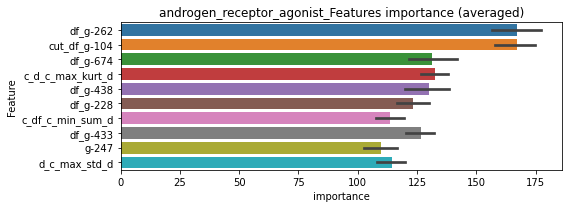

len(train_index) : 3042
len(valid_index) : 761
================================= fold 1/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3042
len(valid_index) : 761


Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000592467	valid_1's binary_logloss: 0.01742


================================= fold 2/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3042
len(valid_index) : 761


Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000604043	valid_1's binary_logloss: 0.00566546


================================= fold 3/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000523917	valid_1's binary_logloss: 0.0146594


len(train_index) : 3043
len(valid_index) : 760
================================= fold 4/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000477496	valid_1's binary_logloss: 0.00213938


len(train_index) : 3043
len(valid_index) : 760
================================= fold 5/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


androgen_receptor_agonist logloss: 0.012299178449590876


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000824846	valid_1's binary_logloss: 0.0216106


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00097348	valid_1's binary_logloss: 0.057895
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000667519	valid_1's binary_logloss: 0.0307684
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00121947	valid_1's binary_logloss: 0.0455209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00106438	valid_1's binary_logloss: 0.0319287
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000682414	valid_1's binary_logloss: 0.0303146


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0081194, Threshold: 0.0299492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 647/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0299492, conf_0:0.02096, conf_1:0.03893
Num_p_label: 15.0, Expected: 14.9, Adj_threshold_1: 0.0599492
threshold: 0.0599492, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3782, y_label_rate: 0.1710735
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000732797	valid_1's binary_logloss: 0.0335639
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000954531	valid_1's binary_logloss: 0.0298157
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.0011137	valid_1's binary_logloss: 0.0425639
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00124466	valid_1's binary_logloss: 0.0344389
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00116664	valid_1's binary_logloss: 0.0299519


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0305081, Threshold: 0.0599492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 640.0/3768
p_label_rate: 0.0115520 Vs.target_rate: 0.00374
Num_p_label: 46.0, Expected: 14.9, Threshold: 0.0599492, conf_0:0.04796, conf_1:0.07194
Num_p_label: 32.0, Expected: 14.9, Adj_threshold_1: 0.0899492
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.1199492
threshold: 0.1199492, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 640.0/3768, y_label_rate: 0.1698514
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000680545	valid_1's binary_logloss: 0.043797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000677233	valid_1's binary_logloss: 0.0301865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000776197	valid_1's binary_logloss: 0.0299074
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000606351	valid_1's binary_logloss: 0.0174225
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.00068059	valid_1's binary_logloss: 0.020097


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0389452, Threshold: 0.1199492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 636.0/3760
p_label_rate: 0.0052737 Vs.target_rate: 0.00374
Num_p_label: 21.0, Expected: 14.9, Threshold: 0.1199492, conf_0:0.10795, conf_1:0.13194
threshold: 0.1199492, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 636.0/3760, y_label_rate: 0.1691489


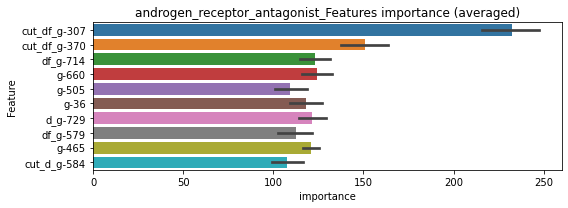

len(train_index) : 3008
len(valid_index) : 752
================================= fold 1/5 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3008
len(valid_index) : 752
================================= fold 2/5 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[389]	training's binary_logloss: 0.00147192	valid_1's binary_logloss: 0.0465351
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000657725	valid_1's binary_logloss: 0.0114357


len(train_index) : 3008
len(valid_index) : 752
================================= fold 3/5 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3008
len(valid_index) : 752
================================= fold 4/5 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00126258	valid_1's binary_logloss: 0.0287293
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000627708	valid_1's binary_logloss: 0.0168817
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.00060695	valid_1's binary_logloss: 0.0167738


len(train_index) : 3008
len(valid_index) : 752
================================= fold 5/5 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00101632	valid_1's binary_logloss: 0.02166


androgen_receptor_antagonist logloss: 0.02503219171451385
anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0228735	valid_1's binary_logloss: 0.0704922
[2000]	training's binary_logloss: 0.0110965	valid_1's binary_logloss: 0.0584523
[3000]	training's binary_logloss: 0.00732696	valid_1's binary_logloss: 0.0538916
Early stopping, best iteration is:
[3237]	training's binary_logloss: 0.00678521	valid_1's binary_logloss: 0.0532565
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0235966	valid_1's binary_logloss: 0.0695734
[2000]	training's binary_logloss: 0.0114284	valid_1's binary_logloss: 0.0584171
[3000]	training's binary_logloss: 0.00752981	valid_1's binary_logloss: 0.0544871
Early stopping, best iteration is:
[3447]	training's binary_logloss: 0.0065403	valid_1's binary_logloss: 0.0533901
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0234491	valid_1's binary_logloss: 0.0650671
[2000]	training's binary

1 / 3, AUC score:0.996, PR-AUC:0.993
y_Threshold: 0.0290541, Threshold: 0.0547241, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3778
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0547241, conf_0:0.03831, conf_1:0.07114
Num_p_label: 11.0, Expected: 13.4, Adj_threshold_1: 0.0847241
threshold: 0.0847241, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 646.0/3778, y_label_rate: 0.1709899
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.021305	valid_1's binary_logloss: 0.0609688
[2000]	training's binary_logloss: 0.010431	valid_1's binary_logloss: 0.0478435
[3000]	training's binary_logloss: 0.00691391	valid_1's binary_logloss: 0.0429269
[4000]	training's binary_logloss: 0.0052035	valid_1's binary_logloss: 0.0404376
[5000]	training's binary_logloss: 0.00419893	valid_1's binary_logloss: 0.0387079
[6000]	training's binary_logloss: 0.00353555	valid_1's binary_logloss: 0.0374425
Early stopping, best iteration is:
[6376]	training's binary_logloss: 0.00334144	valid_1's binary_logloss: 0.0370883
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0213534	valid_1's binary_logloss: 0.0634518
[2000]	training's binary_logloss: 0.0103724	valid_1's binary_logloss: 0.0516453
[3000]	training's binary_logloss: 0.00687568	valid_1's binary_logloss: 0.0477025
[4000]	training's binary_logloss: 0.0051

2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0560041, Threshold: 0.0847241, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 638.0/3762
p_label_rate: 0.0057760 Vs.target_rate: 0.00336
Num_p_label: 23.0, Expected: 13.4, Threshold: 0.0847241, conf_0:0.06778, conf_1:0.10167
Num_p_label: 8.0, Expected: 13.4, Adj_threshold_1: 0.1147241
threshold: 0.1147241, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 638.0/3762, y_label_rate: 0.1695906
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0211142	valid_1's binary_logloss: 0.0555253
[2000]	training's binary_logloss: 0.0103076	valid_1's binary_logloss: 0.0427114
[3000]	training's binary_logloss: 0.00685519	valid_1's binary_logloss: 0.0382479
[4000]	training's binary_logloss: 0.00515304	valid_1's binary_logloss: 0.0358175
[5000]	training's binary_logloss: 0.00416277	valid_1's binary_logloss: 0.0341895
[6000]	training's binary_logloss: 0.00350897	valid_1's binary_logloss: 0.0330896
Early stopping, best iteration is:
[6417]	training's binary_logloss: 0.00329704	valid_1's binary_logloss: 0.0326885
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0204566	valid_1's binary_logloss: 0.063226
[2000]	training's binary_logloss: 0.0100022	valid_1's binary_logloss: 0.0516368
[3000]	training's binary_logloss: 0.00663188	valid_1's binary_logloss: 0.0478221
[4000]	training's binary_logloss: 0.00

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0497351, Threshold: 0.1147241, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 632.0/3750
p_label_rate: 0.0030136 Vs.target_rate: 0.00336
Num_p_label: 12.0, Expected: 13.4, Threshold: 0.1147241, conf_0:0.10325, conf_1:0.12620
threshold: 0.1147241, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 632.0/3750, y_label_rate: 0.1685333


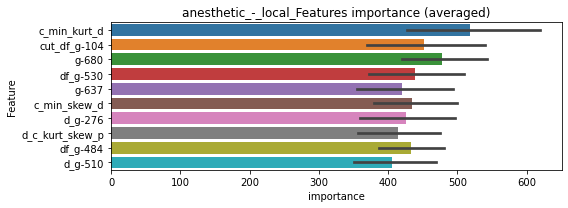

len(train_index) : 2500
len(valid_index) : 1250
================================= fold 1/3 anesthetic_-_local=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0445092	valid_1's binary_logloss: 0.0818039
[2000]	training's binary_logloss: 0.0224916	valid_1's binary_logloss: 0.0580791
[3000]	training's binary_logloss: 0.0150206	valid_1's binary_logloss: 0.0495197
[4000]	training's binary_logloss: 0.0112642	valid_1's binary_logloss: 0.0448493
[5000]	training's binary_logloss: 0.00904679	valid_1's binary_logloss: 0.0419085
[6000]	training's binary_logloss: 0.0075712	valid_1's binary_logloss: 0.0397769
[7000]	training's binary_logloss: 0.00651588	valid_1's binary_logloss: 0.0382974
[8000]	training's binary_logloss: 0.00572908	valid_1's binary_logloss: 0.037138
[9000]	training's binary_logloss: 0.00511771	valid_1's binary_logloss: 0.0361673
[10000]	training's binary_logloss: 0.00462956	valid_1's binary_logloss: 0.0354137
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00462956	valid_1's binary_logloss: 0.0354137


len(train_index) : 2500
len(valid_index) : 1250
================================= fold 2/3 anesthetic_-_local=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0446973	valid_1's binary_logloss: 0.0777675
[2000]	training's binary_logloss: 0.0225435	valid_1's binary_logloss: 0.0544635
[3000]	training's binary_logloss: 0.0150439	valid_1's binary_logloss: 0.0456353
[4000]	training's binary_logloss: 0.0112921	valid_1's binary_logloss: 0.0410266
[5000]	training's binary_logloss: 0.0090593	valid_1's binary_logloss: 0.03816
[6000]	training's binary_logloss: 0.00757524	valid_1's binary_logloss: 0.0360661
[7000]	training's binary_logloss: 0.00651694	valid_1's binary_logloss: 0.0345298
[8000]	training's binary_logloss: 0.00572717	valid_1's binary_logloss: 0.0332948
[9000]	training's binary_logloss: 0.00511345	valid_1's binary_logloss: 0.0323263
[10000]	training's binary_logloss: 0.00462853	valid_1's binary_logloss: 0.0315877
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00462853	valid_1's binary_logloss: 0.0315877


len(train_index) : 2500
len(valid_index) : 1250
================================= fold 3/3 anesthetic_-_local=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0461727	valid_1's binary_logloss: 0.0807356
[2000]	training's binary_logloss: 0.0234379	valid_1's binary_logloss: 0.0564307
[3000]	training's binary_logloss: 0.0156096	valid_1's binary_logloss: 0.0478655
[4000]	training's binary_logloss: 0.0117067	valid_1's binary_logloss: 0.0435444
[5000]	training's binary_logloss: 0.00937628	valid_1's binary_logloss: 0.0407438
[6000]	training's binary_logloss: 0.00783979	valid_1's binary_logloss: 0.0388903
[7000]	training's binary_logloss: 0.00674263	valid_1's binary_logloss: 0.0374413
[8000]	training's binary_logloss: 0.00592184	valid_1's binary_logloss: 0.0362737
[9000]	training's binary_logloss: 0.00529017	valid_1's binary_logloss: 0.0354416
[10000]	training's binary_logloss: 0.00478228	valid_1's binary_logloss: 0.0347932
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00478228	valid_1's binary_logloss: 0.0347932


anesthetic_-_local logloss: 0.03393155154537253
anesthetic_-_local is unpredictable(><)!
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000382359	valid_1's binary_logloss: 0.00535882
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000397149	valid_1's binary_logloss: 0.0127756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000397482	valid_1's binary_logloss: 0.00102512
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000431342	valid_1's binary_logloss: 0.0061865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000375272	valid_1's binary_logloss: 0.00214046


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025745, Threshold: 0.0133340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0133340, conf_0:0.00933, conf_1:0.01733
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0433340
threshold: 0.0433340, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000377673	valid_1's binary_logloss: 0.00527283
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000373416	valid_1's binary_logloss: 0.00985029
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000381506	valid_1's binary_logloss: 0.00102497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000490312	valid_1's binary_logloss: 0.00558904
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337676, Threshold: 0.0433340, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000378514	valid_1's binary_logloss: 0.0016172


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0118031 Vs.target_rate: 0.00151
Num_p_label: 47.0, Expected: 6.0, Threshold: 0.0433340, conf_0:0.03467, conf_1:0.05200
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_1: 0.0733340
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.1033340
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1333340
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.1633340
threshold: 0.1633340, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000377673	valid_1's binary_logloss: 0.00527283
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000373416	valid_1's binary_logloss: 0.00985029
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000381506	valid_1's binary_logloss: 0.00102497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000490312	valid_1's binary_logloss: 0.00558904
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000378514	valid_1's binary_logloss: 0.0016172


y_Threshold: 0.0337676, Threshold: 0.1633340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.1633340, conf_0:0.14700, conf_1:0.17967
threshold: 0.1633340, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


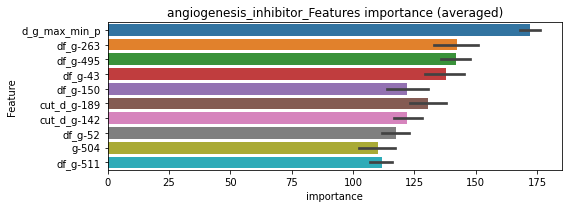

len(train_index) : 3043
len(valid_index) : 761
================================= fold 1/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000383098	valid_1's binary_logloss: 0.00379228


len(train_index) : 3043
len(valid_index) : 761
================================= fold 2/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000412049	valid_1's binary_logloss: 0.00955262


len(train_index) : 3043
len(valid_index) : 761
================================= fold 3/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000386612	valid_1's binary_logloss: 0.00117478


len(train_index) : 3043
len(valid_index) : 761
================================= fold 4/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3044
len(valid_index) : 760


Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000448855	valid_1's binary_logloss: 0.00794865


================================= fold 5/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000383605	valid_1's binary_logloss: 0.00192934


angiogenesis_inhibitor logloss: 0.0048810037861710285
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000426609	valid_1's binary_logloss: 0.00668778
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00038376	valid_1's binary_logloss: 0.00389919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000393307	valid_1's binary_logloss: 0.00492966
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000399107	valid_1's binary_logloss: 0.00754782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000388165	valid_1's binary_logloss: 0.00307159


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025196, Threshold: 0.0100202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0100202, conf_0:0.00701, conf_1:0.01303
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.0400202
threshold: 0.0400202, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399373	valid_1's binary_logloss: 0.00590195
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000376016	valid_1's binary_logloss: 0.00322346
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000378235	valid_1's binary_logloss: 0.00475384
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000393034	valid_1's binary_logloss: 0.00665733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000377518	valid_1's binary_logloss: 0.00272314


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215069, Threshold: 0.0400202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00155
Num_p_label: 21.0, Expected: 6.2, Threshold: 0.0400202, conf_0:0.03202, conf_1:0.04802
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0700202
threshold: 0.0700202, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399373	valid_1's binary_logloss: 0.00590195
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000376016	valid_1's binary_logloss: 0.00322346
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000378235	valid_1's binary_logloss: 0.00475384
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000393034	valid_1's binary_logloss: 0.00665733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000377518	valid_1's binary_logloss: 0.00272314


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215069, Threshold: 0.0700202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00155
Num_p_label: 14.0, Expected: 6.2, Threshold: 0.0700202, conf_0:0.06302, conf_1:0.07702
threshold: 0.0700202, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


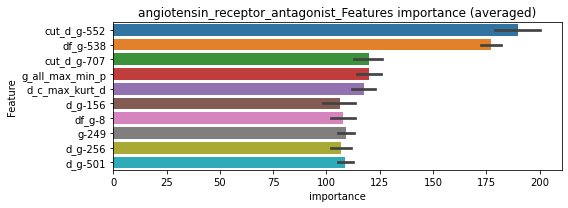

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000386264	valid_1's binary_logloss: 0.00526654


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000378747	valid_1's binary_logloss: 0.00295662
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000377561	valid_1's binary_logloss: 0.00295402


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000375586	valid_1's binary_logloss: 0.0031764
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000373019	valid_1's binary_logloss: 0.00317015


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 angiotensin_receptor_antagonist=================================


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000505163	valid_1's binary_logloss: 0.00758439
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000390902	valid_1's binary_logloss: 0.00245495


angiotensin_receptor_antagonist logloss: 0.00428641459737324
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00102806	valid_1's binary_logloss: 0.0246129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000634535	valid_1's binary_logloss: 0.0234257
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000805423	valid_1's binary_logloss: 0.0239979
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00106808	valid_1's binary_logloss: 0.0275465
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000700163	valid_1's binary_logloss: 0.0268445


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0070375, Threshold: 0.0709075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0709075, conf_0:0.04964, conf_1:0.09218
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_1: 0.1009075
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1309075
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1609075
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_4: 0.1909075
threshold: 0.1909075, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000820247	valid_1's binary_logloss: 0.0242177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.00062259	valid_1's binary_logloss: 0.0175215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000779333	valid_1's binary_logloss: 0.0214205
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000604904	valid_1's binary_logloss: 0.0157629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000654837	valid_1's binary_logloss: 0.0239213


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0356141, Threshold: 0.1909075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0107986 Vs.target_rate: 0.00307
Num_p_label: 43.0, Expected: 12.2, Threshold: 0.1909075, conf_0:0.15273, conf_1:0.22909
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_1: 0.2209075
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_2: 0.2509075
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_3: 0.2809075
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_4: 0.3109075
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_5: 0.3409075
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_6: 0.3709075
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_7: 0.4009075
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_8: 0.4309075
threshold: 0.4309075, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000932394	valid_1's binary_logloss: 0.032186
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00111312	valid_1's binary_logloss: 0.0329738
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000563173	valid_1's binary_logloss: 0.010129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000584387	valid_1's binary_logloss: 0.0172408
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000615296	valid_1's binary_logloss: 0.0232919


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0293371, Threshold: 0.4309075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0047715 Vs.target_rate: 0.00307
Num_p_label: 19.0, Expected: 12.2, Threshold: 0.4309075, conf_0:0.38782, conf_1:0.47400
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_1: 0.4609075
threshold: 0.4609075, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/3783, y_label_rate: 0.1710283


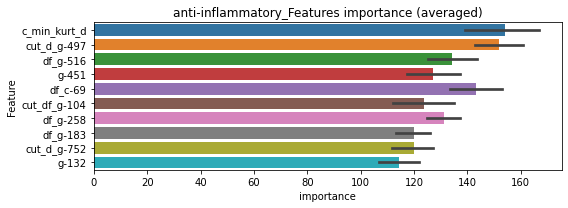

len(train_index) : 3026
len(valid_index) : 757
================================= fold 1/5 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3026
len(valid_index) : 757
================================= fold 2/5 anti-inflammatory=================================


Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00124545	valid_1's binary_logloss: 0.0363514
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000745158	valid_1's binary_logloss: 0.0150815


len(train_index) : 3026
len(valid_index) : 757
================================= fold 3/5 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000701169	valid_1's binary_logloss: 0.0155048


len(train_index) : 3027
len(valid_index) : 756
================================= fold 4/5 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000953843	valid_1's binary_logloss: 0.0228175


len(train_index) : 3027
len(valid_index) : 756
================================= fold 5/5 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000718604	valid_1's binary_logloss: 0.0203272


anti-inflammatory logloss: 0.02201672773794677
antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000339915	valid_1's binary_logloss: 0.00198467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000350508	valid_1's binary_logloss: 0.00316876
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000342395	valid_1's binary_logloss: 0.00105333
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00034162	valid_1's binary_logloss: 0.00327788
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016565, Threshold: 0.0050388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0050388, conf_0:0.00353, conf_1:0.00655
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_1: 0.0350388


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000374759	valid_1's binary_logloss: 0.00300905


threshold: 0.0350388, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000347106	valid_1's binary_logloss: 0.00175155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00033429	valid_1's binary_logloss: 0.00293417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000335507	valid_1's binary_logloss: 0.000682183
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000343931	valid_1's binary_logloss: 0.00248348
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0542973, Threshold: 0.0350388, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000338323	valid_1's binary_logloss: 0.00192864


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0350388, conf_0:0.02803, conf_1:0.04205
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0650388
threshold: 0.0650388, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000347106	valid_1's binary_logloss: 0.00175155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.00033429	valid_1's binary_logloss: 0.00293417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000335507	valid_1's binary_logloss: 0.000682183
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000343931	valid_1's binary_logloss: 0.00248348
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0542973, Threshold: 0.0650388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000338323	valid_1's binary_logloss: 0.00192864


p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0650388, conf_0:0.05853, conf_1:0.07154
threshold: 0.0650388, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


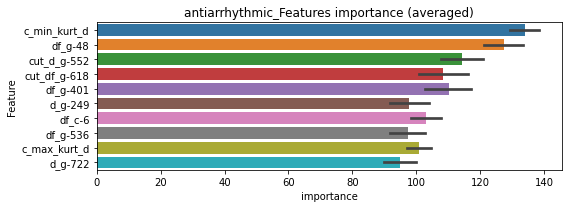

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000364455	valid_1's binary_logloss: 0.00190098


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000340451	valid_1's binary_logloss: 0.00324662


len(train_index) : 3046
len(valid_index) : 761
================================= fold 3/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000339359	valid_1's binary_logloss: 0.000740958


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000338369	valid_1's binary_logloss: 0.00185858


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000346954	valid_1's binary_logloss: 0.00171038


antiarrhythmic logloss: 0.0018927329525284355
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000470165	valid_1's binary_logloss: 0.00700503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000562024	valid_1's binary_logloss: 0.0139136
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00045929	valid_1's binary_logloss: 0.0015206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000459532	valid_1's binary_logloss: 0.00454099
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00048212	valid_1's binary_logloss: 0.00865861


y_Threshold: 0.0036390, Threshold: 0.0296298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0296298, conf_0:0.02074, conf_1:0.03852
Num_p_label: 21.0, Expected: 7.2, Adj_threshold_1: 0.0596298
Num_p_label: 16.0, Expected: 7.2, Adj_threshold_2: 0.0896298
threshold: 0.0896298, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000453484	valid_1's binary_logloss: 0.0064322
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0109601
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443042	valid_1's binary_logloss: 0.00126516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443031	valid_1's binary_logloss: 0.00395764
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000436207	valid_1's binary_logloss: 0.00819382


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211486, Threshold: 0.0896298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0087896 Vs.target_rate: 0.00181
Num_p_label: 35.0, Expected: 7.2, Threshold: 0.0896298, conf_0:0.07170, conf_1:0.10756
Num_p_label: 29.0, Expected: 7.2, Adj_threshold_1: 0.1196298
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_2: 0.1496298
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1796298
threshold: 0.1796298, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000453484	valid_1's binary_logloss: 0.0064322
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0109601
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443042	valid_1's binary_logloss: 0.00126516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443031	valid_1's binary_logloss: 0.00395764
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000436207	valid_1's binary_logloss: 0.00819382


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211486, Threshold: 0.1796298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00181
Num_p_label: 17.0, Expected: 7.2, Threshold: 0.1796298, conf_0:0.16167, conf_1:0.19759
threshold: 0.1796298, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


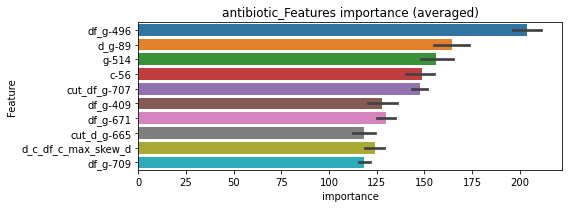

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000449371	valid_1's binary_logloss: 0.00617101


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 antibiotic=================================


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000613741	valid_1's binary_logloss: 0.0105879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000446483	valid_1's binary_logloss: 0.00132183


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000451983	valid_1's binary_logloss: 0.00386561


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000526861	valid_1's binary_logloss: 0.00920865


antibiotic logloss: 0.00623119821836347
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000263847	valid_1's binary_logloss: 0.00183526
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000254951	valid_1's binary_logloss: 0.00159161
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000250241	valid_1's binary_logloss: 0.00161636
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00061044	valid_1's binary_logloss: 0.01054
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013624, Threshold: 0.0044955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0044955, conf_0:0.00315, conf_1:0.00584
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0344955


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000257361	valid_1's binary_logloss: 0.00118404


threshold: 0.0344955, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00025494	valid_1's binary_logloss: 0.000884923
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00025659	valid_1's binary_logloss: 0.00192787
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000249863	valid_1's binary_logloss: 0.000955926
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.000846918	valid_1's binary_logloss: 0.0109144
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0114939, Threshold: 0.0344955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0344955, conf_0:0.02760, conf_1:0.04139


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000250718	valid_1's binary_logloss: 0.00166016


threshold: 0.0344955, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000245538	valid_1's binary_logloss: 0.000759446
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000250027	valid_1's binary_logloss: 0.00340125
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000245579	valid_1's binary_logloss: 0.000388636
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.000516865	valid_1's binary_logloss: 0.00306427
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259550, Threshold: 0.0344955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0344955, conf_0:0.03105, conf_1:0.03795


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000251974	valid_1's binary_logloss: 0.00358097


threshold: 0.0344955, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


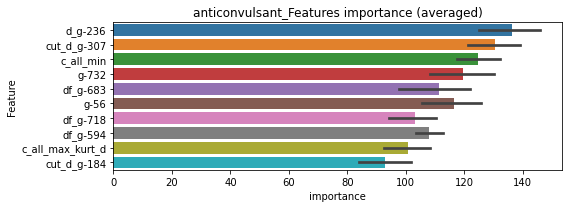

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000247352	valid_1's binary_logloss: 0.000543995
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000247469	valid_1's binary_logloss: 0.000543928


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000260541	valid_1's binary_logloss: 0.00305919


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000249017	valid_1's binary_logloss: 0.000388127


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 anticonvulsant=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000381128	valid_1's binary_logloss: 0.0037442
Training until validation scores don't improve for 29 rounds


anticonvulsant logloss: 0.0020635266948656767


Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000269357	valid_1's binary_logloss: 0.00258412


antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000311767	valid_1's binary_logloss: 0.00159467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000318428	valid_1's binary_logloss: 0.00460677
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000323765	valid_1's binary_logloss: 0.000573792
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000323591	valid_1's binary_logloss: 0.00287743
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014852, Threshold: 0.0043999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000320889	valid_1's binary_logloss: 0.00436508


Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0043999, conf_0:0.00308, conf_1:0.00572
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0343999
threshold: 0.0343999, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000308207	valid_1's binary_logloss: 0.00136032
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000306878	valid_1's binary_logloss: 0.00316239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000312095	valid_1's binary_logloss: 0.000544968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000311389	valid_1's binary_logloss: 0.00362237
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269829, Threshold: 0.0343999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0343999, conf_0:0.02752, conf_1:0.04128


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00030632	valid_1's binary_logloss: 0.00306149


threshold: 0.0343999, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000308207	valid_1's binary_logloss: 0.00136032
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000306878	valid_1's binary_logloss: 0.00316239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000312095	valid_1's binary_logloss: 0.000544968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000311389	valid_1's binary_logloss: 0.00362237
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269829, Threshold: 0.0343999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00030632	valid_1's binary_logloss: 0.00306149


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0343999, conf_0:0.03096, conf_1:0.03784
threshold: 0.0343999, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


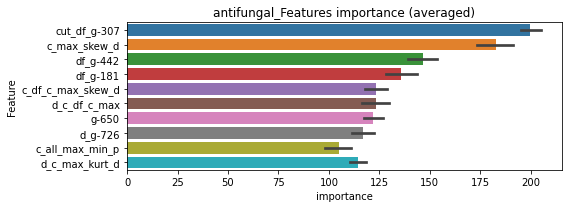

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000317788	valid_1's binary_logloss: 0.0019286


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00030866	valid_1's binary_logloss: 0.00281604


len(train_index) : 3046
len(valid_index) : 761
================================= fold 3/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000312821	valid_1's binary_logloss: 0.000563085
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000312821	valid_1's binary_logloss: 0.000563085


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000344464	valid_1's binary_logloss: 0.00291645


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.00031302	valid_1's binary_logloss: 0.00265078


antifungal logloss: 0.0021756763838260305
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000287087	valid_1's binary_logloss: 0.00121079
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000287342	valid_1's binary_logloss: 0.00313406
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000298948	valid_1's binary_logloss: 0.0038608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000289807	valid_1's binary_logloss: 0.000636196
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014078, Threshold: 0.1159494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1159494, conf_0:0.08116, conf_1:0.15073
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_1: 0.1459494


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000282809	valid_1's binary_logloss: 0.00308954


Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.1759494
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_3: 0.2059494
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_4: 0.2359494
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_5: 0.2659494
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_6: 0.2959494
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.3259494
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_8: 0.3559494
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3859494
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.4159494
threshold: 0.4159494, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000268193	valid_1's binary_logloss: 0.000532848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000271679	valid_1's binary_logloss: 0.00269748
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000275441	valid_1's binary_logloss: 0.00201524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000274128	valid_1's binary_logloss: 0.000525564
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0775845, Threshold: 0.4159494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.4159494, conf_0:0.33276, conf_1:0.49914
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.4459494
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_2: 0.4759494
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_3: 0.5059494
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5359494
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5659494


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000276283	valid_1's binary_logloss: 0.00212905


Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.5959494
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_7: 0.6259494
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6559494
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.6859494
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7159494
threshold: 0.7159494, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000268193	valid_1's binary_logloss: 0.000532848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000271679	valid_1's binary_logloss: 0.00269748
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000275441	valid_1's binary_logloss: 0.00201524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000274128	valid_1's binary_logloss: 0.000525564
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0775845, Threshold: 0.7159494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7159494, conf_0:0.64435, conf_1:0.78754
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.7459494
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_2: 0.7759494
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_3: 0.8059494
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_4: 0.8359494
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_5: 0.8659494


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000276283	valid_1's binary_logloss: 0.00212905


Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.8959494
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_7: 0.9259494
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_8: 0.9559494
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.9859494
threshold: 0.9859494, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


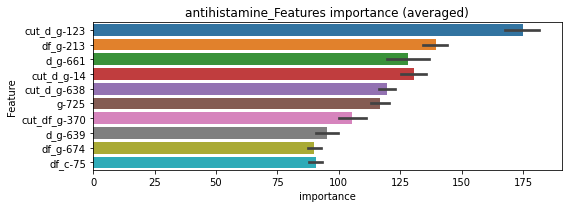

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 antihistamine=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 antihistamine=================================


Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000275814	valid_1's binary_logloss: 0.000575385
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 antihistamine=================================


Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000280188	valid_1's binary_logloss: 0.00158669
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000274376	valid_1's binary_logloss: 0.000989347


================================= fold 4/5 antihistamine=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 antihistamine=================================


Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000276824	valid_1's binary_logloss: 0.000528299
Training until validation scores don't improve for 29 rounds


antihistamine logloss: 0.0011335909079015025


Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000290934	valid_1's binary_logloss: 0.00198854


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000306503	valid_1's binary_logloss: 0.000745845
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000296422	valid_1's binary_logloss: 0.000821026
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000297354	valid_1's binary_logloss: 0.00532852
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000299601	valid_1's binary_logloss: 0.00122494
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016457, Threshold: 0.0080600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0080600, conf_0:0.00564, conf_1:0.01048
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.0380600
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0680600


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000341686	valid_1's binary_logloss: 0.00381286


threshold: 0.0680600, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000290455	valid_1's binary_logloss: 0.00106572
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000288368	valid_1's binary_logloss: 0.000632957
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000289531	valid_1's binary_logloss: 0.00214497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000289787	valid_1's binary_logloss: 0.000755382
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0807208, Threshold: 0.0680600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, Expected: 3.0, Threshold: 0.0680600, conf_0:0.05445, conf_1:0.08167
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0980600
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.1280600
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1580600
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.1880600
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.2180600
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.2480600
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.2780600
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3080600


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000296133	valid_1's binary_logloss: 0.00236393


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.3380600
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.3680600
threshold: 0.3680600, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000290455	valid_1's binary_logloss: 0.00106572
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000288368	valid_1's binary_logloss: 0.000632957
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000289531	valid_1's binary_logloss: 0.00214497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000289787	valid_1's binary_logloss: 0.000755382
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0807208, Threshold: 0.3680600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.3680600, conf_0:0.33125, conf_1:0.40487
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.3980600


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000296133	valid_1's binary_logloss: 0.00236393


threshold: 0.3980600, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


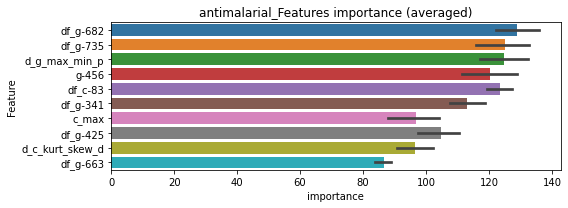

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 antimalarial=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 antimalarial=================================


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000286646	valid_1's binary_logloss: 0.000739142
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 antimalarial=================================


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000287221	valid_1's binary_logloss: 0.000806254
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 antimalarial=================================


Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000288239	valid_1's binary_logloss: 0.00167543
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 antimalarial=================================


Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000289486	valid_1's binary_logloss: 0.00060407
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000290561	valid_1's binary_logloss: 0.00108189


antimalarial logloss: 0.0009812636785593901
antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000811012	valid_1's binary_logloss: 0.0369492
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000775372	valid_1's binary_logloss: 0.0198172
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000679389	valid_1's binary_logloss: 0.0222983
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000675636	valid_1's binary_logloss: 0.00944503
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0067531, Threshold: 0.0239230, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00125258	valid_1's binary_logloss: 0.0409605


Remove_noisy_data: 136 → Positive_corect_labels: 654/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0239230, conf_0:0.01675, conf_1:0.03110
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_1: 0.0539230
threshold: 0.0539230, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00110689	valid_1's binary_logloss: 0.0467694
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000583984	valid_1's binary_logloss: 0.0117469
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000727291	valid_1's binary_logloss: 0.0253245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000754502	valid_1's binary_logloss: 0.0227721
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000806156	valid_1's binary_logloss: 0.0353527


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0230554, Threshold: 0.0539230, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0090407 Vs.target_rate: 0.00307
Num_p_label: 36.0, Expected: 12.2, Threshold: 0.0539230, conf_0:0.04314, conf_1:0.06471
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_1: 0.0839230
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_2: 0.1139230
threshold: 0.1139230, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00133108	valid_1's binary_logloss: 0.0460901
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000637646	valid_1's binary_logloss: 0.0190185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00081671	valid_1's binary_logloss: 0.0324394
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000566404	valid_1's binary_logloss: 0.00745415
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000595416	valid_1's binary_logloss: 0.0218985


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0234568, Threshold: 0.1139230, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.1139230, conf_0:0.10253, conf_1:0.12532
threshold: 0.1139230, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3786, y_label_rate: 0.1706286


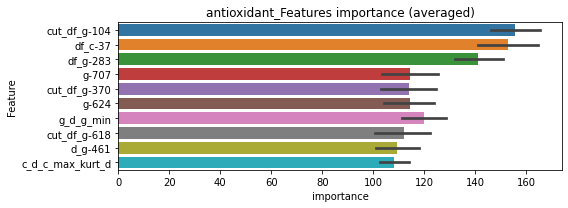

len(train_index) : 3028
len(valid_index) : 758
================================= fold 1/5 antioxidant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 2/5 antioxidant=================================


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00164975	valid_1's binary_logloss: 0.0416012
Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 3/5 antioxidant=================================


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000867842	valid_1's binary_logloss: 0.026086
Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 4/5 antioxidant=================================


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000870857	valid_1's binary_logloss: 0.0261911
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000771267	valid_1's binary_logloss: 0.0167272


len(train_index) : 3029
len(valid_index) : 757
================================= fold 5/5 antioxidant=================================


Training until validation scores don't improve for 29 rounds


antioxidant logloss: 0.029870727094578352


Early stopping, best iteration is:
[266]	training's binary_logloss: 0.0020885	valid_1's binary_logloss: 0.0387327


antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00039006	valid_1's binary_logloss: 0.00222699
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00039347	valid_1's binary_logloss: 0.00609627
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000410514	valid_1's binary_logloss: 0.0010348
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00039468	valid_1's binary_logloss: 0.00150203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000396124	valid_1's binary_logloss: 0.00534996


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030366, Threshold: 0.0107520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0107520, conf_0:0.00753, conf_1:0.01398
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0407520
threshold: 0.0407520, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000384398	valid_1's binary_logloss: 0.00182188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000383546	valid_1's binary_logloss: 0.00520942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000391138	valid_1's binary_logloss: 0.001198
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000388986	valid_1's binary_logloss: 0.00117444
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000383883	valid_1's binary_logloss: 0.00348951


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0706832, Threshold: 0.0407520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0407520, conf_0:0.03260, conf_1:0.04890
threshold: 0.0407520, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000384398	valid_1's binary_logloss: 0.00182188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000383546	valid_1's binary_logloss: 0.00520942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000391138	valid_1's binary_logloss: 0.001198
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000388986	valid_1's binary_logloss: 0.00117444
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000383883	valid_1's binary_logloss: 0.00348951


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0706832, Threshold: 0.0407520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0407520, conf_0:0.03668, conf_1:0.04483
threshold: 0.0407520, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


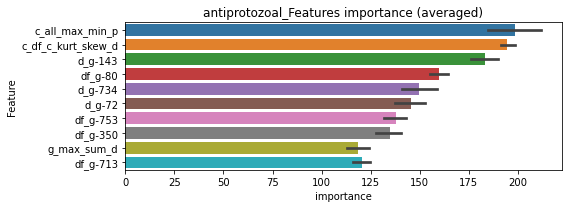

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000384436	valid_1's binary_logloss: 0.00184798
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.00038423	valid_1's binary_logloss: 0.00184768


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000392728	valid_1's binary_logloss: 0.0042492


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000389475	valid_1's binary_logloss: 0.00117255
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000389701	valid_1's binary_logloss: 0.00117245


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000386631	valid_1's binary_logloss: 0.00126805
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.000382007	valid_1's binary_logloss: 0.0012565


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000391794	valid_1's binary_logloss: 0.00416997


antiprotozoal logloss: 0.002539073907169599
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000293851	valid_1's binary_logloss: 0.00171954
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000291445	valid_1's binary_logloss: 0.00122657
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000302496	valid_1's binary_logloss: 0.00069946
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000293754	valid_1's binary_logloss: 0.000686963
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015185, Threshold: 0.0046049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0046049, conf_0:0.00322, conf_1:0.00599
Num_p_label: 1.0, Expected: 3.8, Adj_threshold_1: 0.0346049


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000291808	valid_1's binary_logloss: 0.00217948


threshold: 0.0346049, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000290287	valid_1's binary_logloss: 0.00188175
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000285177	valid_1's binary_logloss: 0.00123622
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000287139	valid_1's binary_logloss: 0.000528963
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000287476	valid_1's binary_logloss: 0.000742276
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0813162, Threshold: 0.0346049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, Expected: 3.8, Threshold: 0.0346049, conf_0:0.02768, conf_1:0.04153


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000285531	valid_1's binary_logloss: 0.00176507


threshold: 0.0346049, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000290287	valid_1's binary_logloss: 0.00188175
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000285177	valid_1's binary_logloss: 0.00123622
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000287139	valid_1's binary_logloss: 0.000528963
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000287476	valid_1's binary_logloss: 0.000742276
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0813162, Threshold: 0.0346049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, Expected: 3.8, Threshold: 0.0346049, conf_0:0.03114, conf_1:0.03807


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000285531	valid_1's binary_logloss: 0.00176507


threshold: 0.0346049, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


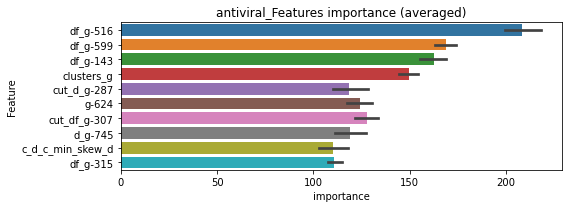

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000290466	valid_1's binary_logloss: 0.00132434


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000278681	valid_1's binary_logloss: 0.00105567
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000278284	valid_1's binary_logloss: 0.00105542


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000287111	valid_1's binary_logloss: 0.000549121


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000281646	valid_1's binary_logloss: 0.000531707
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000281646	valid_1's binary_logloss: 0.000531707


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000285436	valid_1's binary_logloss: 0.00111694


antiviral logloss: 0.0009155820517458539
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000538947	valid_1's binary_logloss: 0.0119017
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000818795	valid_1's binary_logloss: 0.0360077
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000473197	valid_1's binary_logloss: 0.00684516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000469793	valid_1's binary_logloss: 0.0017316
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000539952	valid_1's binary_logloss: 0.0173986


y_Threshold: 0.0039457, Threshold: 0.0479760, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0479760, conf_0:0.03358, conf_1:0.06237
Num_p_label: 29.0, Expected: 8.2, Adj_threshold_1: 0.0779760
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_2: 0.1079760
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_3: 0.1379760
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_4: 0.1679760
threshold: 0.1679760, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000477033	valid_1's binary_logloss: 0.0114827
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000883111	valid_1's binary_logloss: 0.0322493
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000538164	valid_1's binary_logloss: 0.00557383
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000467803	valid_1's binary_logloss: 0.00168253
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000492755	valid_1's binary_logloss: 0.0147777


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0239591, Threshold: 0.1679760, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.1679760, conf_0:0.13438, conf_1:0.20157
Num_p_label: 32.0, Expected: 8.2, Adj_threshold_1: 0.1979760
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_2: 0.2279760
Num_p_label: 26.0, Expected: 8.2, Adj_threshold_3: 0.2579760
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_4: 0.2879760
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_5: 0.3179760
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_6: 0.3479760
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_7: 0.3779760
threshold: 0.3779760, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000465459	valid_1's binary_logloss: 0.00465909
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00081341	valid_1's binary_logloss: 0.0173627
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000489892	valid_1's binary_logloss: 0.0134337
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000531016	valid_1's binary_logloss: 0.0104266
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000482294	valid_1's binary_logloss: 0.00988367


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270644, Threshold: 0.3779760, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0055249 Vs.target_rate: 0.00206
Num_p_label: 22.0, Expected: 8.2, Threshold: 0.3779760, conf_0:0.34018, conf_1:0.41577
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_1: 0.4079760
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_2: 0.4379760
threshold: 0.4379760, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


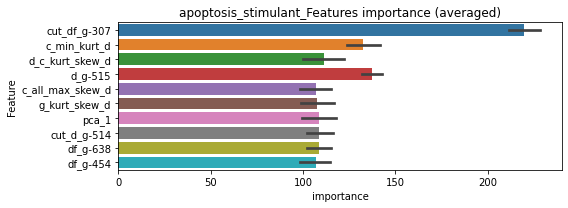

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000461084	valid_1's binary_logloss: 0.00732786


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 apoptosis_stimulant=================================


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000955571	valid_1's binary_logloss: 0.0227219
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000479272	valid_1's binary_logloss: 0.00839341


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 apoptosis_stimulant=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00078646	valid_1's binary_logloss: 0.00892085
Training until validation scores don't improve for 29 rounds


apoptosis_stimulant logloss: 0.013135825408815104


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000628644	valid_1's binary_logloss: 0.0183151


aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00078106	valid_1's binary_logloss: 0.0152154
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000490595	valid_1's binary_logloss: 0.0112418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000495486	valid_1's binary_logloss: 0.0160185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000717169	valid_1's binary_logloss: 0.010496
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000460398	valid_1's binary_logloss: 0.00430153


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040284, Threshold: 0.0122023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0122023, conf_0:0.00854, conf_1:0.01586
Num_p_label: 9.0, Expected: 7.9, Adj_threshold_1: 0.0422023
threshold: 0.0422023, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000528233	valid_1's binary_logloss: 0.0139226
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000492235	valid_1's binary_logloss: 0.0105003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00050065	valid_1's binary_logloss: 0.0160243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000509045	valid_1's binary_logloss: 0.01014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000450395	valid_1's binary_logloss: 0.00370796


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158695, Threshold: 0.0422023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0042692 Vs.target_rate: 0.00197
Num_p_label: 17.0, Expected: 7.9, Threshold: 0.0422023, conf_0:0.03376, conf_1:0.05064
threshold: 0.0422023, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000708642	valid_1's binary_logloss: 0.0242038
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000460703	valid_1's binary_logloss: 0.00561526
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000465588	valid_1's binary_logloss: 0.00975568
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000457143	valid_1's binary_logloss: 0.00160541
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0161130, Threshold: 0.0422023, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000589709	valid_1's binary_logloss: 0.0122819


Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0047715 Vs.target_rate: 0.00197
Num_p_label: 19.0, Expected: 7.9, Threshold: 0.0422023, conf_0:0.03798, conf_1:0.04642
threshold: 0.0422023, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


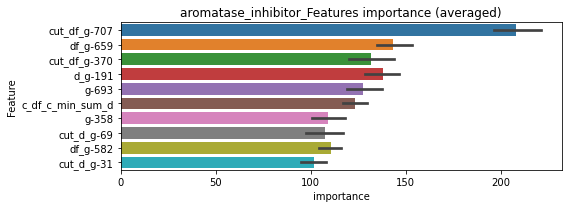

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000466141	valid_1's binary_logloss: 0.00327581


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000465565	valid_1's binary_logloss: 0.0176635


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000528292	valid_1's binary_logloss: 0.00491596


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 aromatase_inhibitor=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000642163	valid_1's binary_logloss: 0.00540044
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000498254	valid_1's binary_logloss: 0.00843159


aromatase_inhibitor logloss: 0.007937468847666766
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000142826	valid_1's binary_logloss: 0.000302348
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00014735	valid_1's binary_logloss: 0.000150016
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000143346	valid_1's binary_logloss: 0.00151591
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000143395	valid_1's binary_logloss: 0.000164745
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003421, Threshold: 0.0013572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013572, conf_0:0.00095, conf_1:0.00176
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0313572
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0613572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0913572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1213572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1513572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1813572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.2113572
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.2413572


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000143887	valid_1's binary_logloss: 0.000413395


threshold: 0.2413572, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000137248	valid_1's binary_logloss: 0.000211054
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000136932	valid_1's binary_logloss: 0.000142588
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000138394	valid_1's binary_logloss: 0.000836001
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000136599	valid_1's binary_logloss: 0.000144296
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033718, Threshold: 0.2413572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.2413572, conf_0:0.19309, conf_1:0.28963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.2713572
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3013572
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.3313572
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3613572
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.3913572
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.4213572
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.4513572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.4813572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.5113572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5413572


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00013556	valid_1's binary_logloss: 0.00604046


threshold: 0.5413572, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000137248	valid_1's binary_logloss: 0.000211054
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000136932	valid_1's binary_logloss: 0.000142588
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000138394	valid_1's binary_logloss: 0.000836001
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000136599	valid_1's binary_logloss: 0.000144296
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033718, Threshold: 0.5413572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.5413572, conf_0:0.48722, conf_1:0.59549
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.5713572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.6013572
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.6313572
threshold: 0.6313572, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00013556	valid_1's binary_logloss: 0.00604046


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


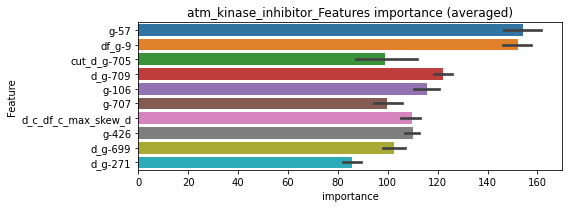

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139297	valid_1's binary_logloss: 0.000232048


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1149]	training's binary_logloss: 0.000137212	valid_1's binary_logloss: 0.0002295
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139634	valid_1's binary_logloss: 0.00015613


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000137145	valid_1's binary_logloss: 0.000153369
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139283	valid_1's binary_logloss: 0.000314989


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1315]	training's binary_logloss: 0.00013572	valid_1's binary_logloss: 0.000310079
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0001393	valid_1's binary_logloss: 0.000153781


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000137001	valid_1's binary_logloss: 0.000151233
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139325	valid_1's binary_logloss: 0.00330205
Early stopping, best iteration is:
[1084]	training's binary_logloss: 0.000137654	valid_1's binary_logloss: 0.0032971


atm_kinase_inhibitor logloss: 0.0008279224521451383
atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000165521	valid_1's binary_logloss: 0.000598018
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000167207	valid_1's binary_logloss: 0.000265203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000174541	valid_1's binary_logloss: 0.00357334
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.0001687	valid_1's binary_logloss: 0.000175716
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004505, Threshold: 0.0013347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0013347, conf_0:0.00093, conf_1:0.00174
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0313347
threshold: 0.0313347, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000168459	valid_1's binary_logloss: 0.000220791


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00015956	valid_1's binary_logloss: 0.000246981
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000160583	valid_1's binary_logloss: 0.000179319
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000170625	valid_1's binary_logloss: 0.000994608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000161754	valid_1's binary_logloss: 0.000184402
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1049432, Threshold: 0.0313347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0313347, conf_0:0.02507, conf_1:0.03760
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0613347
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0913347
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_3: 0.1213347
threshold: 0.1213347, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.0001611	valid_1's binary_logloss: 0.000176653


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00015956	valid_1's binary_logloss: 0.000246981
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000160583	valid_1's binary_logloss: 0.000179319
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000170625	valid_1's binary_logloss: 0.000994608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000161754	valid_1's binary_logloss: 0.000184402
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1049432, Threshold: 0.1213347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, Expected: 1.2, Threshold: 0.1213347, conf_0:0.10920, conf_1:0.13347
threshold: 0.1213347, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.0001611	valid_1's binary_logloss: 0.000176653


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


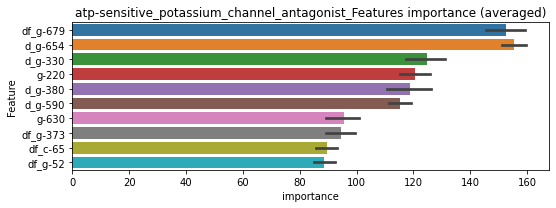

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000160819	valid_1's binary_logloss: 0.000225468
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000160173	valid_1's binary_logloss: 0.000224657


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000160302	valid_1's binary_logloss: 0.000182548
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.00015993	valid_1's binary_logloss: 0.000182126


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000167537	valid_1's binary_logloss: 0.00113929
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000161053	valid_1's binary_logloss: 0.00019802
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.0001602	valid_1's binary_logloss: 0.000197008


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000162557	valid_1's binary_logloss: 0.000178652


atp-sensitive_potassium_channel_antagonist logloss: 0.00038445052733069625
atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000255114	valid_1's binary_logloss: 0.00124265
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000252687	valid_1's binary_logloss: 0.000515742
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000255382	valid_1's binary_logloss: 0.000451584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000250958	valid_1's binary_logloss: 0.000537425
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012197, Threshold: 0.0095730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0095730, conf_0:0.00670, conf_1:0.01244
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.0395730
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0695730
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.0995730


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000247756	valid_1's binary_logloss: 0.000829722


threshold: 0.0995730, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000239565	valid_1's binary_logloss: 0.00119898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000242182	valid_1's binary_logloss: 0.000464349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00023738	valid_1's binary_logloss: 0.000373142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000241328	valid_1's binary_logloss: 0.000391974
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1288462, Threshold: 0.0995730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, Expected: 2.0, Threshold: 0.0995730, conf_0:0.07966, conf_1:0.11949
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.1295730
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.1595730
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.1895730
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_4: 0.2195730
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.2495730
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.2795730
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.3095730
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.3395730
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_9: 0.3695730


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000240953	valid_1's binary_logloss: 0.000664284


threshold: 0.3695730, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000239565	valid_1's binary_logloss: 0.00119898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000242182	valid_1's binary_logloss: 0.000464349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00023738	valid_1's binary_logloss: 0.000373142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000241328	valid_1's binary_logloss: 0.000391974
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1288462, Threshold: 0.3695730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.3695730, conf_0:0.33262, conf_1:0.40653
threshold: 0.3695730, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000240953	valid_1's binary_logloss: 0.000664284


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


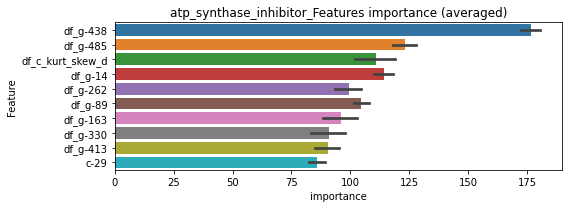

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000245908	valid_1's binary_logloss: 0.000662967
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000245549	valid_1's binary_logloss: 0.000455342


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000245066	valid_1's binary_logloss: 0.000359056
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000241879	valid_1's binary_logloss: 0.000429976
Training until validation scores don't improve for 29 rounds


atp_synthase_inhibitor logloss: 0.00048728476272262425


Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000244693	valid_1's binary_logloss: 0.000528894


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0272508	valid_1's binary_logloss: 0.108669
[2000]	training's binary_logloss: 0.01311	valid_1's binary_logloss: 0.0970716
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0127693	valid_1's binary_logloss: 0.0967827
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0282269	valid_1's binary_logloss: 0.0928712
[2000]	training's binary_logloss: 0.0136076	valid_1's binary_logloss: 0.0796145
[3000]	training's binary_logloss: 0.00888425	valid_1's binary_logloss: 0.0740317
Early stopping, best iteration is:
[3349]	training's binary_logloss: 0.00792437	valid_1's binary_logloss: 0.0729769
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.029182	valid_1's binary_logloss: 0.0798381
[2000]	training's binary_logloss: 0.0138781	valid_1's binary_logloss: 0.0634346
[3000]	training's binary_logl

1 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0399410, Threshold: 0.0808862, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 639/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0808862, conf_0:0.05662, conf_1:0.10515
Num_p_label: 18.0, Expected: 16.2, Adj_threshold_1: 0.1108862
threshold: 0.1108862, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0250061	valid_1's binary_logloss: 0.0863803
[2000]	training's binary_logloss: 0.01207	valid_1's binary_logloss: 0.0729389
[3000]	training's binary_logloss: 0.0079079	valid_1's binary_logloss: 0.0679421
Early stopping, best iteration is:
[3084]	training's binary_logloss: 0.00769223	valid_1's binary_logloss: 0.0677314
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.02598	valid_1's binary_logloss: 0.0745246
[2000]	training's binary_logloss: 0.0125142	valid_1's binary_logloss: 0.0598395
[3000]	training's binary_logloss: 0.00820035	valid_1's binary_logloss: 0.0547142
[4000]	training's binary_logloss: 0.00613575	valid_1's binary_logloss: 0.0521805
Early stopping, best iteration is:
[4163]	training's binary_logloss: 0.0058986	valid_1's binary_logloss: 0.0518267
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_log

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0667650, Threshold: 0.1108862, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 630.0/3748
p_label_rate: 0.0072828 Vs.target_rate: 0.00407
Num_p_label: 29.0, Expected: 16.2, Threshold: 0.1108862, conf_0:0.08871, conf_1:0.13306
Num_p_label: 13.0, Expected: 16.2, Adj_threshold_1: 0.1408862
threshold: 0.1408862, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 630.0/3748, y_label_rate: 0.1680896
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0239467	valid_1's binary_logloss: 0.0793067
[2000]	training's binary_logloss: 0.0116294	valid_1's binary_logloss: 0.0659396
[3000]	training's binary_logloss: 0.00764491	valid_1's binary_logloss: 0.060819
Early stopping, best iteration is:
[3002]	training's binary_logloss: 0.00763885	valid_1's binary_logloss: 0.0607982
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0256123	valid_1's binary_logloss: 0.0601256
[2000]	training's binary_logloss: 0.0122982	valid_1's binary_logloss: 0.0459897
[3000]	training's binary_logloss: 0.00809821	valid_1's binary_logloss: 0.0410071
Early stopping, best iteration is:
[3789]	training's binary_logloss: 0.00639801	valid_1's binary_logloss: 0.0388811
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0252586	valid_1's binary_logloss: 0.0692976
[2000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0622000, Threshold: 0.1408862, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 623.0/3734
p_label_rate: 0.0037670 Vs.target_rate: 0.00407
Num_p_label: 15.0, Expected: 16.2, Threshold: 0.1408862, conf_0:0.12680, conf_1:0.15497
threshold: 0.1408862, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 623.0/3734, y_label_rate: 0.1668452


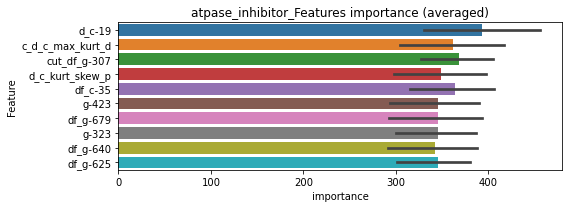

len(train_index) : 2489
len(valid_index) : 1245
================================= fold 1/3 atpase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0517488	valid_1's binary_logloss: 0.0986543
[2000]	training's binary_logloss: 0.0264592	valid_1's binary_logloss: 0.0745861
[3000]	training's binary_logloss: 0.0176716	valid_1's binary_logloss: 0.0657075
[4000]	training's binary_logloss: 0.0132532	valid_1's binary_logloss: 0.0610584
[5000]	training's binary_logloss: 0.0106193	valid_1's binary_logloss: 0.0581686
[6000]	training's binary_logloss: 0.00885514	valid_1's binary_logloss: 0.0560957
[7000]	training's binary_logloss: 0.00761256	valid_1's binary_logloss: 0.0547099
[8000]	training's binary_logloss: 0.0066913	valid_1's binary_logloss: 0.0535738
[9000]	training's binary_logloss: 0.00596844	valid_1's binary_logloss: 0.0527419
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.00578029	valid_1's binary_logloss: 0.052528


len(train_index) : 2489
len(valid_index) : 1245
================================= fold 2/3 atpase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0525075	valid_1's binary_logloss: 0.0985917
[2000]	training's binary_logloss: 0.0267678	valid_1's binary_logloss: 0.0739954
[3000]	training's binary_logloss: 0.0178138	valid_1's binary_logloss: 0.0650013
[4000]	training's binary_logloss: 0.0133368	valid_1's binary_logloss: 0.0605544
[5000]	training's binary_logloss: 0.0106835	valid_1's binary_logloss: 0.0576525
[6000]	training's binary_logloss: 0.00890283	valid_1's binary_logloss: 0.0556678
[7000]	training's binary_logloss: 0.0076448	valid_1's binary_logloss: 0.0541255
Early stopping, best iteration is:
[7436]	training's binary_logloss: 0.00720429	valid_1's binary_logloss: 0.053548


len(train_index) : 2490
len(valid_index) : 1244
================================= fold 3/3 atpase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0504037	valid_1's binary_logloss: 0.111821
[2000]	training's binary_logloss: 0.0258136	valid_1's binary_logloss: 0.0885542
[3000]	training's binary_logloss: 0.0172518	valid_1's binary_logloss: 0.0797649
[4000]	training's binary_logloss: 0.0129291	valid_1's binary_logloss: 0.0750725
Early stopping, best iteration is:
[4833]	training's binary_logloss: 0.0107303	valid_1's binary_logloss: 0.0726742


atpase_inhibitor logloss: 0.05957988167223661
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00031649	valid_1's binary_logloss: 0.000993209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000312504	valid_1's binary_logloss: 0.000845055
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000316346	valid_1's binary_logloss: 0.00253482
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000316897	valid_1's binary_logloss: 0.00188743
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016816, Threshold: 0.0075704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0075704, conf_0:0.00530, conf_1:0.00984
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_1: 0.0375704
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0675704


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00031429	valid_1's binary_logloss: 0.00242709


threshold: 0.0675704, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000305068	valid_1's binary_logloss: 0.000732091
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000300506	valid_1's binary_logloss: 0.00113216
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000306232	valid_1's binary_logloss: 0.00229167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000308959	valid_1's binary_logloss: 0.00184726
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0767825, Threshold: 0.0675704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00080
Num_p_label: 16.0, Expected: 3.2, Threshold: 0.0675704, conf_0:0.05406, conf_1:0.08108
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_1: 0.0975704
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.1275704
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.1575704
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_4: 0.1875704
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_5: 0.2175704


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000309266	valid_1's binary_logloss: 0.00155203


Num_p_label: 9.0, Expected: 3.2, Adj_threshold_6: 0.2475704
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_7: 0.2775704
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_8: 0.3075704
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_9: 0.3375704
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_10: 0.3675704
threshold: 0.3675704, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000305068	valid_1's binary_logloss: 0.000732091
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000300506	valid_1's binary_logloss: 0.00113216
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000306232	valid_1's binary_logloss: 0.00229167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000308959	valid_1's binary_logloss: 0.00184726
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0767825, Threshold: 0.3675704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.3675704, conf_0:0.33081, conf_1:0.40433
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.3975704


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000309266	valid_1's binary_logloss: 0.00155203


threshold: 0.3975704, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


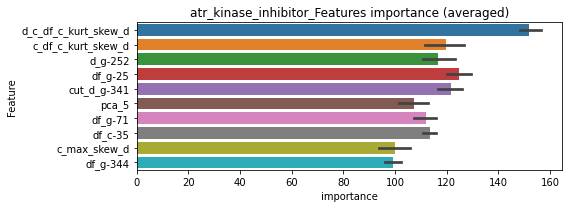

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000307804	valid_1's binary_logloss: 0.000697108


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000302989	valid_1's binary_logloss: 0.000704726


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000302611	valid_1's binary_logloss: 0.00189201


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000319781	valid_1's binary_logloss: 0.00173776
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000320505	valid_1's binary_logloss: 0.00129394


atr_kinase_inhibitor logloss: 0.0012651643538998559
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0291668	valid_1's binary_logloss: 0.101388
[2000]	training's binary_logloss: 0.0140243	valid_1's binary_logloss: 0.0870783
Early stopping, best iteration is:
[2693]	training's binary_logloss: 0.0102573	valid_1's binary_logloss: 0.0830999
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0293563	valid_1's binary_logloss: 0.088042
[2000]	training's binary_logloss: 0.0140071	valid_1's binary_logloss: 0.0722567
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0121977	valid_1's binary_logloss: 0.0702019
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0293968	valid_1's binary_logloss: 0.0976867
[2000]	training's binary_logloss: 0.0140051	valid_1's binary_logloss: 0.0851204
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.012212	valid_1's binary_logloss: 0.083

1 / 3, AUC score:0.988, PR-AUC:0.978
y_Threshold: 0.0509350, Threshold: 0.2085965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 184 → Positive_corect_labels: 629/3747
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.2085965, conf_0:0.14602, conf_1:0.27118
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_1: 0.2385965
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_2: 0.2685965
threshold: 0.2685965, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 629.0/3747, y_label_rate: 0.1678676
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0258262	valid_1's binary_logloss: 0.0759128
[2000]	training's binary_logloss: 0.0124184	valid_1's binary_logloss: 0.0591789
[3000]	training's binary_logloss: 0.0081633	valid_1's binary_logloss: 0.0534237
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00675854	valid_1's binary_logloss: 0.051311
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0261699	valid_1's binary_logloss: 0.0697935
[2000]	training's binary_logloss: 0.0125301	valid_1's binary_logloss: 0.0529182
[3000]	training's binary_logloss: 0.00825046	valid_1's binary_logloss: 0.0464642
[4000]	training's binary_logloss: 0.00617521	valid_1's binary_logloss: 0.0432137
Early stopping, best iteration is:
[4097]	training's binary_logloss: 0.00602477	valid_1's binary_logloss: 0.0428214
Training until validation scores don't improve for 39 rounds
[1000]	training's binary

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0875430, Threshold: 0.2685965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 619.0/3727
p_label_rate: 0.0138122 Vs.target_rate: 0.00403
Num_p_label: 55.0, Expected: 16.1, Threshold: 0.2685965, conf_0:0.21488, conf_1:0.32232
Num_p_label: 50.0, Expected: 16.1, Adj_threshold_1: 0.2985965
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_2: 0.3285965
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_3: 0.3585965
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_4: 0.3885965
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_5: 0.4185965
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_6: 0.4485965
threshold: 0.4485965, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 619.0/3727, y_label_rate: 0.1660853
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0248765	valid_1's binary_logloss: 0.0728908
[2000]	training's binary_logloss: 0.0119267	valid_1's binary_logloss: 0.0570951
[3000]	training's binary_logloss: 0.00786806	valid_1's binary_logloss: 0.051166
Early stopping, best iteration is:
[3948]	training's binary_logloss: 0.00598904	valid_1's binary_logloss: 0.0483943
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0245542	valid_1's binary_logloss: 0.0899085
[2000]	training's binary_logloss: 0.0117388	valid_1's binary_logloss: 0.075829
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.011178	valid_1's binary_logloss: 0.0752084
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0255778	valid_1's binary_logloss: 0.0663498
[2000]	training's binary_logloss: 0.0122843	valid_1's binary_logloss: 0.0481618
[3000]	training's binary_log

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0864699, Threshold: 0.4485965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 609.0/3707
p_label_rate: 0.0045203 Vs.target_rate: 0.00403
Num_p_label: 18.0, Expected: 16.1, Threshold: 0.4485965, conf_0:0.40374, conf_1:0.49346
threshold: 0.4485965, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 609.0/3707, y_label_rate: 0.1642838


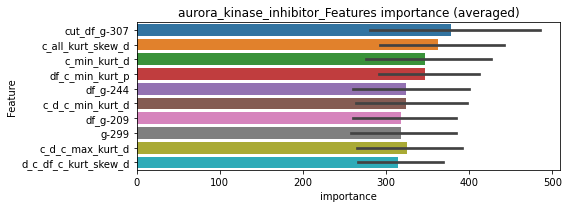

len(train_index) : 2471
len(valid_index) : 1236
================================= fold 1/3 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0526545	valid_1's binary_logloss: 0.104912
[2000]	training's binary_logloss: 0.0265774	valid_1's binary_logloss: 0.079299
[3000]	training's binary_logloss: 0.017651	valid_1's binary_logloss: 0.0697502
[4000]	training's binary_logloss: 0.0131972	valid_1's binary_logloss: 0.0646604
[5000]	training's binary_logloss: 0.0105726	valid_1's binary_logloss: 0.061642
[6000]	training's binary_logloss: 0.00883302	valid_1's binary_logloss: 0.0595612
[7000]	training's binary_logloss: 0.00758739	valid_1's binary_logloss: 0.0580514
[8000]	training's binary_logloss: 0.00665913	valid_1's binary_logloss: 0.0568832
[9000]	training's binary_logloss: 0.00594284	valid_1's binary_logloss: 0.0559244
Early stopping, best iteration is:
[9106]	training's binary_logloss: 0.00587515	valid_1's binary_logloss: 0.0558206


len(train_index) : 2471
len(valid_index) : 1236
================================= fold 2/3 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0543054	valid_1's binary_logloss: 0.0948038
[2000]	training's binary_logloss: 0.027514	valid_1's binary_logloss: 0.0647028
[3000]	training's binary_logloss: 0.0182388	valid_1's binary_logloss: 0.0527752
[4000]	training's binary_logloss: 0.013641	valid_1's binary_logloss: 0.0465976
[5000]	training's binary_logloss: 0.0109231	valid_1's binary_logloss: 0.0426701
[6000]	training's binary_logloss: 0.00911321	valid_1's binary_logloss: 0.0400292
[7000]	training's binary_logloss: 0.00782818	valid_1's binary_logloss: 0.037937
[8000]	training's binary_logloss: 0.00686145	valid_1's binary_logloss: 0.0362303
[9000]	training's binary_logloss: 0.00612132	valid_1's binary_logloss: 0.0349556
[10000]	training's binary_logloss: 0.00553476	valid_1's binary_logloss: 0.0339705
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00553476	valid_1's binary_logloss: 0.0339705


len(train_index) : 2472
len(valid_index) : 1235
================================= fold 3/3 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0540784	valid_1's binary_logloss: 0.106357
[2000]	training's binary_logloss: 0.0272629	valid_1's binary_logloss: 0.0771302
[3000]	training's binary_logloss: 0.0180818	valid_1's binary_logloss: 0.0663306
[4000]	training's binary_logloss: 0.0134802	valid_1's binary_logloss: 0.0602685
[5000]	training's binary_logloss: 0.0107842	valid_1's binary_logloss: 0.0566632
[6000]	training's binary_logloss: 0.00899874	valid_1's binary_logloss: 0.0542036
[7000]	training's binary_logloss: 0.00773073	valid_1's binary_logloss: 0.0524951
[8000]	training's binary_logloss: 0.00678101	valid_1's binary_logloss: 0.0510122
[9000]	training's binary_logloss: 0.00605671	valid_1's binary_logloss: 0.0499805
[10000]	training's binary_logloss: 0.00547027	valid_1's binary_logloss: 0.0490412
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00547027	valid_1's binary_logloss: 0.0490412


aurora_kinase_inhibitor logloss: 0.04627668496941036
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000161445	valid_1's binary_logloss: 0.00704541
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000154787	valid_1's binary_logloss: 0.000238556
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000153415	valid_1's binary_logloss: 0.00198807
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000153321	valid_1's binary_logloss: 0.000261485
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005005, Threshold: 0.0033296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0033296, conf_0:0.00233, conf_1:0.00433
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0333296
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0633296
threshold: 0.0633296, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000153991	valid_1's binary_logloss: 0.000200816


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000138103	valid_1's binary_logloss: 0.000559625
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000139128	valid_1's binary_logloss: 0.000184268
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000138825	valid_1's binary_logloss: 0.000163084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000138522	valid_1's binary_logloss: 0.000142922
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1379391, Threshold: 0.0633296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0105475 Vs.target_rate: 0.00025
Num_p_label: 42.0, Expected: 1.0, Threshold: 0.0633296, conf_0:0.05066, conf_1:0.07600
Num_p_label: 36.0, Expected: 1.0, Adj_threshold_1: 0.0933296
Num_p_label: 30.0, Expected: 1.0, Adj_threshold_2: 0.1233296
Num_p_label: 27.0, Expected: 1.0, Adj_threshold_3: 0.1533296
Num_p_label: 24.0, Expected: 1.0, Adj_threshold_4: 0.1833296
Num_p_label: 21.0, Expected: 1.0, Adj_threshold_5: 0.2133296
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.2433296
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_7: 0.2733296
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_8: 0.3033296
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3333296
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_10: 0.3633296


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000139227	valid_1's binary_logloss: 0.000171668


threshold: 0.3633296, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000138103	valid_1's binary_logloss: 0.000559625
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000139128	valid_1's binary_logloss: 0.000184268
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000138825	valid_1's binary_logloss: 0.000163084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000138522	valid_1's binary_logloss: 0.000142922
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1379391, Threshold: 0.3633296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00025
Num_p_label: 12.0, Expected: 1.0, Threshold: 0.3633296, conf_0:0.32700, conf_1:0.39966
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.3933296
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_2: 0.4233296
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_3: 0.4533296
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.4833296
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.5133296
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.5433296
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.5733296
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.6033296
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.6333296
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_10: 0.6633296
threshold: 0.6633296, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000139227	valid_1's binary_logloss: 0.000171668


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


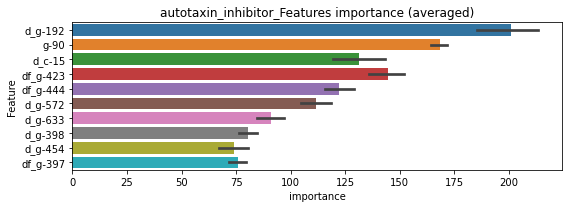

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 autotaxin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 autotaxin_inhibitor=================================


[1000]	training's binary_logloss: 0.000142397	valid_1's binary_logloss: 0.000461786
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000142397	valid_1's binary_logloss: 0.000461786
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142812	valid_1's binary_logloss: 0.000189425


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1224]	training's binary_logloss: 0.000139821	valid_1's binary_logloss: 0.000185616
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142407	valid_1's binary_logloss: 0.00016114


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.000139628	valid_1's binary_logloss: 0.000158246
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00014373	valid_1's binary_logloss: 0.000146093


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1113]	training's binary_logloss: 0.000141691	valid_1's binary_logloss: 0.000144053
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143456	valid_1's binary_logloss: 0.000198505


autotaxin_inhibitor logloss: 0.00022929775179889793


Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000142084	valid_1's binary_logloss: 0.000196633


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000817082	valid_1's binary_logloss: 0.0330507
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000706206	valid_1's binary_logloss: 0.027325
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000538147	valid_1's binary_logloss: 0.0181181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000513122	valid_1's binary_logloss: 0.00375871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000788058	valid_1's binary_logloss: 0.0231468


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0062362, Threshold: 0.0214152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0214152, conf_0:0.01499, conf_1:0.02784
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0514152
threshold: 0.0514152, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00126285	valid_1's binary_logloss: 0.0360894
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000693377	valid_1's binary_logloss: 0.0247823
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000656863	valid_1's binary_logloss: 0.0161986
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.00051382	valid_1's binary_logloss: 0.00327144
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000620818	valid_1's binary_logloss: 0.0213656


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0315088, Threshold: 0.0514152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0105475 Vs.target_rate: 0.00252
Num_p_label: 42.0, Expected: 10.0, Threshold: 0.0514152, conf_0:0.04113, conf_1:0.06170
Num_p_label: 27.0, Expected: 10.0, Adj_threshold_1: 0.0814152
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1114152
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1414152
threshold: 0.1414152, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000488659	valid_1's binary_logloss: 0.00817648
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000609847	valid_1's binary_logloss: 0.0142135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000722517	valid_1's binary_logloss: 0.0205244
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000606039	valid_1's binary_logloss: 0.0236135
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0334992, Threshold: 0.1414152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0040181 Vs.target_rate: 0.00252


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.001179	valid_1's binary_logloss: 0.0331839


Num_p_label: 16.0, Expected: 10.0, Threshold: 0.1414152, conf_0:0.12727, conf_1:0.15556
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_1: 0.1714152
threshold: 0.1714152, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 646.0/3786, y_label_rate: 0.1706286


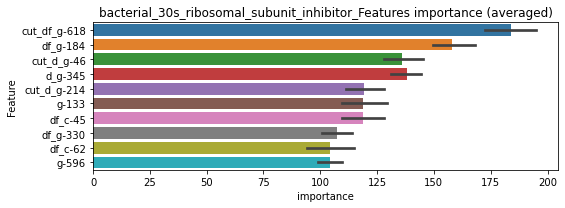

len(train_index) : 3028
len(valid_index) : 758
================================= fold 1/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000533686	valid_1's binary_logloss: 0.015593


len(train_index) : 3029
len(valid_index) : 757
================================= fold 2/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000634848	valid_1's binary_logloss: 0.0163458


len(train_index) : 3029
len(valid_index) : 757
================================= fold 3/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000517596	valid_1's binary_logloss: 0.00870219


len(train_index) : 3029
len(valid_index) : 757
================================= fold 4/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000764783	valid_1's binary_logloss: 0.0184947


len(train_index) : 3029
len(valid_index) : 757
================================= fold 5/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000673208	valid_1's binary_logloss: 0.0116161


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.014150737373816126
bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000625643	valid_1's binary_logloss: 0.0387871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000985621	valid_1's binary_logloss: 0.0276684
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000666371	valid_1's binary_logloss: 0.0192041
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00118308	valid_1's binary_logloss: 0.0254011
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0087964, Threshold: 0.0253937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0253937, conf_0:0.01778, conf_1:0.03301


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00170946	valid_1's binary_logloss: 0.062248


Num_p_label: 12.0, Expected: 13.4, Adj_threshold_1: 0.0553937
threshold: 0.0553937, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3794, y_label_rate: 0.1713231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000701018	valid_1's binary_logloss: 0.0340268
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000616234	valid_1's binary_logloss: 0.0219417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000574118	valid_1's binary_logloss: 0.0200746
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00104172	valid_1's binary_logloss: 0.0226671
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00129877	valid_1's binary_logloss: 0.0380183


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0320837, Threshold: 0.0553937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0082873 Vs.target_rate: 0.00336
Num_p_label: 33.0, Expected: 13.4, Threshold: 0.0553937, conf_0:0.04431, conf_1:0.06647
Num_p_label: 21.0, Expected: 13.4, Adj_threshold_1: 0.0853937
Num_p_label: 12.0, Expected: 13.4, Adj_threshold_2: 0.1153937
threshold: 0.1153937, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000605509	valid_1's binary_logloss: 0.0248755
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000579944	valid_1's binary_logloss: 0.0180837
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000605299	valid_1's binary_logloss: 0.0253232
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00102062	valid_1's binary_logloss: 0.0276209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000561258	valid_1's binary_logloss: 0.00966471


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0363776, Threshold: 0.1153937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0032647 Vs.target_rate: 0.00336
Num_p_label: 13.0, Expected: 13.4, Threshold: 0.1153937, conf_0:0.10385, conf_1:0.12693
threshold: 0.1153937, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 645.0/3784, y_label_rate: 0.1704545


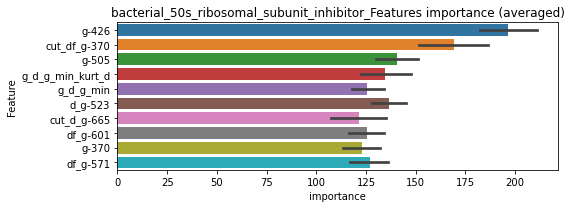

len(train_index) : 3027
len(valid_index) : 757
================================= fold 1/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000643557	valid_1's binary_logloss: 0.032437


len(train_index) : 3027
len(valid_index) : 757
================================= fold 2/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3027
len(valid_index) : 757
================================= fold 3/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00115276	valid_1's binary_logloss: 0.0271589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000657411	valid_1's binary_logloss: 0.014462


len(train_index) : 3027
len(valid_index) : 757
================================= fold 4/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000599398	valid_1's binary_logloss: 0.011186
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000599398	valid_1's binary_logloss: 0.011186


len(train_index) : 3028
len(valid_index) : 756
================================= fold 5/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000838749	valid_1's binary_logloss: 0.0287898


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.02280515560786787
bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000413752	valid_1's binary_logloss: 0.00453557
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000415502	valid_1's binary_logloss: 0.00866151
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000401584	valid_1's binary_logloss: 0.00312454
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000417563	valid_1's binary_logloss: 0.00285984
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000406996	valid_1's binary_logloss: 0.00242871


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028283, Threshold: 0.0163592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0163592, conf_0:0.01145, conf_1:0.02127
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0463592
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.0763592
threshold: 0.0763592, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00040988	valid_1's binary_logloss: 0.00456647
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000411035	valid_1's binary_logloss: 0.00897547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00039474	valid_1's binary_logloss: 0.00307914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000407116	valid_1's binary_logloss: 0.00250101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000403948	valid_1's binary_logloss: 0.00268885


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0522371, Threshold: 0.0763592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0128076 Vs.target_rate: 0.00151
Num_p_label: 51.0, Expected: 6.0, Threshold: 0.0763592, conf_0:0.06109, conf_1:0.09163
Num_p_label: 45.0, Expected: 6.0, Adj_threshold_1: 0.1063592
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_2: 0.1363592
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_3: 0.1663592
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_4: 0.1963592
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_5: 0.2263592
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_6: 0.2563592
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_7: 0.2863592
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_8: 0.3163592
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_9: 0.3463592
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_10: 0.3763592
threshold: 0.3763592, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00040988	valid_1's binary_logloss: 0.00456647
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000411035	valid_1's binary_logloss: 0.00897547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00039474	valid_1's binary_logloss: 0.00307914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000407116	valid_1's binary_logloss: 0.00250101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000403948	valid_1's binary_logloss: 0.00268885


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0522371, Threshold: 0.3763592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0057760 Vs.target_rate: 0.00151
Num_p_label: 23.0, Expected: 6.0, Threshold: 0.3763592, conf_0:0.33872, conf_1:0.41400
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.4063592
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.4363592
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_3: 0.4663592
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_4: 0.4963592
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.5263592
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_6: 0.5563592
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_7: 0.5863592
threshold: 0.5863592, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


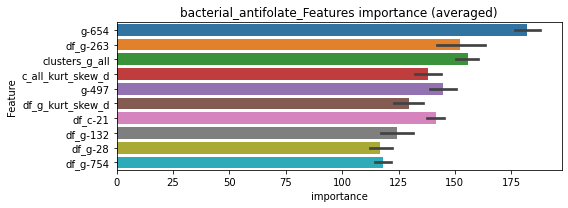

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000406984	valid_1's binary_logloss: 0.00408775


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000449259	valid_1's binary_logloss: 0.0060859


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000389403	valid_1's binary_logloss: 0.0034452
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000389403	valid_1's binary_logloss: 0.0034452


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000393333	valid_1's binary_logloss: 0.00223008
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.000392785	valid_1's binary_logloss: 0.00222636


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000407483	valid_1's binary_logloss: 0.00225125


bacterial_antifolate logloss: 0.003620396302985251


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 6396
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 6396


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0280615	valid_1's binary_logloss: 0.101463
Early stopping, best iteration is:
[1951]	training's binary_logloss: 0.0138542	valid_1's binary_logloss: 0.0930908
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0289672	valid_1's binary_logloss: 0.0871098
[2000]	training's binary_logloss: 0.0137246	valid_1's binary_logloss: 0.078232
Early stopping, best iteration is:
[1963]	training's binary_logloss: 0.0139927	valid_1's binary_logloss: 0.0782225
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0278523	valid_1's binary_logloss: 0.0942975
Early stopping, best iteration is:
[1655]	training's binary_logloss: 0.0161955	valid_1's binary_logloss: 0.0872112


1 / 3, AUC score:0.987, PR-AUC:0.973
y_Threshold: 0.0513557, Threshold: 0.1090024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 374 → Positive_corect_labels: 1220/7301
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.1090024, conf_0:0.07630, conf_1:0.14170
threshold: 0.1090024, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1220.0/7301, y_label_rate: 0.1671004
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.022662	valid_1's binary_logloss: 0.0656432
[2000]	training's binary_logloss: 0.0106644	valid_1's binary_logloss: 0.0546264
[3000]	training's binary_logloss: 0.00691447	valid_1's binary_logloss: 0.0507872
Early stopping, best iteration is:
[3267]	training's binary_logloss: 0.00632759	valid_1's binary_logloss: 0.0501602
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0221952	valid_1's binary_logloss: 0.0827374
[2000]	training's binary_logloss: 0.0103997	valid_1's binary_logloss: 0.0737744
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.00947965	valid_1's binary_logloss: 0.0729765
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.022736	valid_1's binary_logloss: 0.0634844
[2000]	training's binary_logloss: 0.0107578	valid_1's binary_logloss: 0.053769
[3000]	training's binary_lo

2 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0761809, Threshold: 0.1090024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1183.0/7227
p_label_rate: 0.0135610 Vs.target_rate: 0.00806
Num_p_label: 54.0, Expected: 32.1, Threshold: 0.1090024, conf_0:0.08720, conf_1:0.13080
Num_p_label: 38.0, Expected: 32.1, Adj_threshold_1: 0.1390024
threshold: 0.1390024, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1183.0/7227, y_label_rate: 0.1636917
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0201727	valid_1's binary_logloss: 0.0566908
[2000]	training's binary_logloss: 0.00954757	valid_1's binary_logloss: 0.0466342
[3000]	training's binary_logloss: 0.00620583	valid_1's binary_logloss: 0.043029
Early stopping, best iteration is:
[3067]	training's binary_logloss: 0.00606819	valid_1's binary_logloss: 0.0428786
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0199005	valid_1's binary_logloss: 0.0651784
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.00987779	valid_1's binary_logloss: 0.0570413
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0199489	valid_1's binary_logloss: 0.0590914
[2000]	training's binary_logloss: 0.00946221	valid_1's binary_logloss: 0.049703
[3000]	training's binary_logloss: 0.00616238	valid_1's binary_logloss: 0.0468621
Early stopping, best it

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0725800, Threshold: 0.1390024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 1159.0/7179
p_label_rate: 0.0107986 Vs.target_rate: 0.00806
Num_p_label: 43.0, Expected: 32.1, Threshold: 0.1390024, conf_0:0.12510, conf_1:0.15290
threshold: 0.1390024, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 1159.0/7179, y_label_rate: 0.1614431


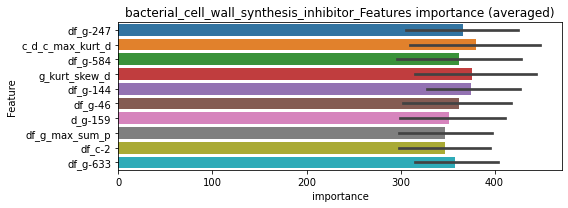

len(train_index) : 4786
len(valid_index) : 2393
================================= fold 1/3 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0390498	valid_1's binary_logloss: 0.06924
[2000]	training's binary_logloss: 0.0197779	valid_1's binary_logloss: 0.0506967
[3000]	training's binary_logloss: 0.0131445	valid_1's binary_logloss: 0.0444149
[4000]	training's binary_logloss: 0.00982744	valid_1's binary_logloss: 0.0410383
[5000]	training's binary_logloss: 0.00783823	valid_1's binary_logloss: 0.0390571
[6000]	training's binary_logloss: 0.00652608	valid_1's binary_logloss: 0.0377192
[7000]	training's binary_logloss: 0.0056102	valid_1's binary_logloss: 0.0367714
Early stopping, best iteration is:
[7252]	training's binary_logloss: 0.00541612	valid_1's binary_logloss: 0.0365913


len(train_index) : 4786
len(valid_index) : 2393
================================= fold 2/3 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0396383	valid_1's binary_logloss: 0.0680935
[2000]	training's binary_logloss: 0.020183	valid_1's binary_logloss: 0.0501642
[3000]	training's binary_logloss: 0.0133277	valid_1's binary_logloss: 0.0432403
[4000]	training's binary_logloss: 0.00993656	valid_1's binary_logloss: 0.0398584
[5000]	training's binary_logloss: 0.00792054	valid_1's binary_logloss: 0.0376829
[6000]	training's binary_logloss: 0.00659721	valid_1's binary_logloss: 0.0361294
[7000]	training's binary_logloss: 0.00566145	valid_1's binary_logloss: 0.0351576
[8000]	training's binary_logloss: 0.00495708	valid_1's binary_logloss: 0.0342612
[9000]	training's binary_logloss: 0.00441578	valid_1's binary_logloss: 0.0336398
Early stopping, best iteration is:
[9299]	training's binary_logloss: 0.00427796	valid_1's binary_logloss: 0.0334578


len(train_index) : 4786
len(valid_index) : 2393
================================= fold 3/3 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0390853	valid_1's binary_logloss: 0.0681073
[2000]	training's binary_logloss: 0.0198298	valid_1's binary_logloss: 0.0501521
[3000]	training's binary_logloss: 0.0131	valid_1's binary_logloss: 0.0437033
[4000]	training's binary_logloss: 0.00977103	valid_1's binary_logloss: 0.0404884
[5000]	training's binary_logloss: 0.00779991	valid_1's binary_logloss: 0.0385099
[6000]	training's binary_logloss: 0.00649467	valid_1's binary_logloss: 0.0371723
[7000]	training's binary_logloss: 0.00557631	valid_1's binary_logloss: 0.0362187
[8000]	training's binary_logloss: 0.00488574	valid_1's binary_logloss: 0.0354017
Early stopping, best iteration is:
[8714]	training's binary_logloss: 0.00449234	valid_1's binary_logloss: 0.0350003


bacterial_cell_wall_synthesis_inhibitor logloss: 0.0350164934126458
bacterial_cell_wall_synthesis_inhibitor is unpredictable(><)!
bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0267009	valid_1's binary_logloss: 0.077186
[2000]	training's binary_logloss: 0.0128116	valid_1's binary_logloss: 0.0607707
[3000]	training's binary_logloss: 0.0083864	valid_1's binary_logloss: 0.0546811
[4000]	training's binary_logloss: 0.00626305	valid_1's binary_logloss: 0.0517459
Early stopping, best iteration is:
[4684]	training's binary_logloss: 0.00536005	valid_1's binary_logloss: 0.0504809
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0266136	valid_1's binary_logloss: 0.0791135
[2000]	training's binary_logloss: 0.0128141	valid_1's binary_logloss: 0.0662606
Early stopping, best iteration is:
[2281]	training's binary_logloss: 0.0111414	valid_1's binary_logloss: 0.0644834
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0266765	valid_1's binary_logloss: 0.0782202
[2000]	training's binary_l

1 / 3, AUC score:0.994, PR-AUC:0.989
y_Threshold: 0.0363911, Threshold: 0.0754795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 155 → Positive_corect_labels: 643/3775
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0754795, conf_0:0.05284, conf_1:0.09812
Num_p_label: 21.0, Expected: 14.9, Adj_threshold_1: 0.1054795
threshold: 0.1054795, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 643.0/3775, y_label_rate: 0.1703311
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0239725	valid_1's binary_logloss: 0.0702139
[2000]	training's binary_logloss: 0.0116696	valid_1's binary_logloss: 0.0543956
[3000]	training's binary_logloss: 0.00766596	valid_1's binary_logloss: 0.0485218
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.00634574	valid_1's binary_logloss: 0.0467339
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0245614	valid_1's binary_logloss: 0.0709171
[2000]	training's binary_logloss: 0.0118722	valid_1's binary_logloss: 0.057729
[3000]	training's binary_logloss: 0.00780936	valid_1's binary_logloss: 0.0530444
Early stopping, best iteration is:
[3247]	training's binary_logloss: 0.00720555	valid_1's binary_logloss: 0.0524765
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0246553	valid_1's binary_logloss: 0.0720846
[2000]	training's binary

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0709535, Threshold: 0.1054795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 635.0/3759
p_label_rate: 0.0087896 Vs.target_rate: 0.00374
Num_p_label: 35.0, Expected: 14.9, Threshold: 0.1054795, conf_0:0.08438, conf_1:0.12658
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_1: 0.1354795
Num_p_label: 16.0, Expected: 14.9, Adj_threshold_2: 0.1654795
threshold: 0.1654795, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 635.0/3759, y_label_rate: 0.1689279
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0235467	valid_1's binary_logloss: 0.0599169
[2000]	training's binary_logloss: 0.0114233	valid_1's binary_logloss: 0.045045
[3000]	training's binary_logloss: 0.00754646	valid_1's binary_logloss: 0.0396306
[4000]	training's binary_logloss: 0.00566312	valid_1's binary_logloss: 0.0369378
[5000]	training's binary_logloss: 0.00456494	valid_1's binary_logloss: 0.0350253
[6000]	training's binary_logloss: 0.00383351	valid_1's binary_logloss: 0.0337427
Early stopping, best iteration is:
[6387]	training's binary_logloss: 0.00361504	valid_1's binary_logloss: 0.0333115
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0238917	valid_1's binary_logloss: 0.0702439
[2000]	training's binary_logloss: 0.0116041	valid_1's binary_logloss: 0.056518
[3000]	training's binary_logloss: 0.00764153	valid_1's binary_logloss: 0.0518014
Early stopping, best iteration is:
[362

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0580706, Threshold: 0.1654795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 626.0/3741
p_label_rate: 0.0035158 Vs.target_rate: 0.00374
Num_p_label: 14.0, Expected: 14.9, Threshold: 0.1654795, conf_0:0.14893, conf_1:0.18203
threshold: 0.1654795, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 626.0/3741, y_label_rate: 0.1673349


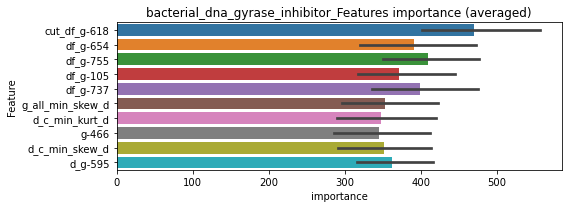

len(train_index) : 2494
len(valid_index) : 1247
================================= fold 1/3 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.048169	valid_1's binary_logloss: 0.101615
[2000]	training's binary_logloss: 0.0247308	valid_1's binary_logloss: 0.0765585
[3000]	training's binary_logloss: 0.0165115	valid_1's binary_logloss: 0.0665959
[4000]	training's binary_logloss: 0.0123883	valid_1's binary_logloss: 0.0610959
[5000]	training's binary_logloss: 0.00994957	valid_1's binary_logloss: 0.0580167
[6000]	training's binary_logloss: 0.00829621	valid_1's binary_logloss: 0.0553841
[7000]	training's binary_logloss: 0.00712741	valid_1's binary_logloss: 0.0539159
[8000]	training's binary_logloss: 0.00625735	valid_1's binary_logloss: 0.0525519
[9000]	training's binary_logloss: 0.00558418	valid_1's binary_logloss: 0.0515448
Early stopping, best iteration is:
[9312]	training's binary_logloss: 0.00540284	valid_1's binary_logloss: 0.0512327


len(train_index) : 2494
len(valid_index) : 1247
================================= fold 2/3 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0506509	valid_1's binary_logloss: 0.0854531
[2000]	training's binary_logloss: 0.025858	valid_1's binary_logloss: 0.058674
[3000]	training's binary_logloss: 0.0171945	valid_1's binary_logloss: 0.0481786
[4000]	training's binary_logloss: 0.0128766	valid_1's binary_logloss: 0.0426074
[5000]	training's binary_logloss: 0.0103291	valid_1's binary_logloss: 0.0391019
[6000]	training's binary_logloss: 0.00860698	valid_1's binary_logloss: 0.0366871
[7000]	training's binary_logloss: 0.00740283	valid_1's binary_logloss: 0.0349227
[8000]	training's binary_logloss: 0.00649944	valid_1's binary_logloss: 0.0334579
[9000]	training's binary_logloss: 0.0057983	valid_1's binary_logloss: 0.0323369
[10000]	training's binary_logloss: 0.00524786	valid_1's binary_logloss: 0.0315055
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00524786	valid_1's binary_logloss: 0.0315055


len(train_index) : 2494
len(valid_index) : 1247
================================= fold 3/3 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0508804	valid_1's binary_logloss: 0.0857649
[2000]	training's binary_logloss: 0.0259787	valid_1's binary_logloss: 0.0605017
[3000]	training's binary_logloss: 0.0173098	valid_1's binary_logloss: 0.0506884
[4000]	training's binary_logloss: 0.0129253	valid_1's binary_logloss: 0.0453219
[5000]	training's binary_logloss: 0.0103373	valid_1's binary_logloss: 0.0420305
[6000]	training's binary_logloss: 0.00862158	valid_1's binary_logloss: 0.0397036
[7000]	training's binary_logloss: 0.00740877	valid_1's binary_logloss: 0.0380315
[8000]	training's binary_logloss: 0.00650461	valid_1's binary_logloss: 0.0366781
[9000]	training's binary_logloss: 0.00580419	valid_1's binary_logloss: 0.0356246
[10000]	training's binary_logloss: 0.00524941	valid_1's binary_logloss: 0.0347116
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00524941	valid_1's binary_logloss: 0.0347116


bacterial_dna_gyrase_inhibitor logloss: 0.03914994521526894
bacterial_dna_gyrase_inhibitor is unpredictable(><)!
bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


mutually exclusive columns: bacterial_dna_inhibitor
selected negative label: 2020


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0449882	valid_1's binary_logloss: 0.189078
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.0399735	valid_1's binary_logloss: 0.185661
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0482961	valid_1's binary_logloss: 0.175197
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0243437	valid_1's binary_logloss: 0.15944
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.047269	valid_1's binary_logloss: 0.177689
[2000]	training's binary_logloss: 0.0227772	valid_1's binary_logloss: 0.163189
Early stopping, best iteration is:
[2043]	training's binary_logloss: 0.0222457	valid_1's binary_logloss: 0.162828


1 / 3, AUC score:0.953, PR-AUC:0.917
y_Threshold: 0.0889465, Threshold: 0.1587282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 183 → Positive_corect_labels: 353/2241
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1587282, conf_0:0.11111, conf_1:0.20635
Num_p_label: 23.0, Expected: 19.2, Adj_threshold_1: 0.1887282
threshold: 0.1887282, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 353.0/2241, y_label_rate: 0.1575190
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.036371	valid_1's binary_logloss: 0.138836
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.0204367	valid_1's binary_logloss: 0.122912
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0363884	valid_1's binary_logloss: 0.14856
[2000]	training's binary_logloss: 0.0175712	valid_1's binary_logloss: 0.136213
Early stopping, best iteration is:
[2180]	training's binary_logloss: 0.0160709	valid_1's binary_logloss: 0.135291
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0382645	valid_1's binary_logloss: 0.119865
[2000]	training's binary_logloss: 0.0184838	valid_1's binary_logloss: 0.102325
[3000]	training's binary_logloss: 0.0121826	valid_1's binary_logloss: 0.0963248
Early stopping, best iteration is:
[3002]	training's binary_logloss: 0.012174	valid_1's binary_logloss: 0.0963005


2 / 3, AUC score:0.990, PR-AUC:0.974
y_Threshold: 0.0928932, Threshold: 0.1887282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 326.0/2187
p_label_rate: 0.0050226 Vs.target_rate: 0.00483
Num_p_label: 20.0, Expected: 19.2, Threshold: 0.1887282, conf_0:0.15098, conf_1:0.22647
threshold: 0.1887282, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 326.0/2187, y_label_rate: 0.1490626
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0328214	valid_1's binary_logloss: 0.127759
[2000]	training's binary_logloss: 0.0158634	valid_1's binary_logloss: 0.113056
Early stopping, best iteration is:
[2360]	training's binary_logloss: 0.0133901	valid_1's binary_logloss: 0.111306
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0340262	valid_1's binary_logloss: 0.0971769
[2000]	training's binary_logloss: 0.0165023	valid_1's binary_logloss: 0.0780447
[3000]	training's binary_logloss: 0.0109303	valid_1's binary_logloss: 0.0715315
[4000]	training's binary_logloss: 0.0082061	valid_1's binary_logloss: 0.0682905
Early stopping, best iteration is:
[4416]	training's binary_logloss: 0.00744098	valid_1's binary_logloss: 0.067293
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0344244	valid_1's binary_logloss: 0.106171
[2000]	training's binary_loglos

3 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0745704, Threshold: 0.1887282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 311.0/2157
p_label_rate: 0.0027624 Vs.target_rate: 0.00483
Num_p_label: 11.0, Expected: 19.2, Threshold: 0.1887282, conf_0:0.16986, conf_1:0.20760
threshold: 0.1887282, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 311.0/2157, y_label_rate: 0.1441817


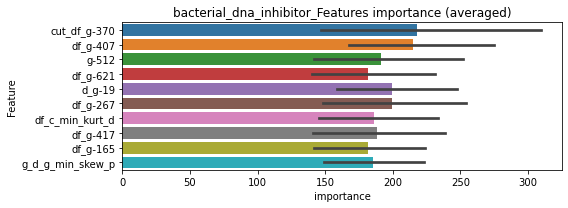

len(train_index) : 1438
len(valid_index) : 719
================================= fold 1/3 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0699326	valid_1's binary_logloss: 0.13779
[2000]	training's binary_logloss: 0.0358238	valid_1's binary_logloss: 0.102582
[3000]	training's binary_logloss: 0.0238408	valid_1's binary_logloss: 0.0885229
[4000]	training's binary_logloss: 0.0178207	valid_1's binary_logloss: 0.0809026
[5000]	training's binary_logloss: 0.0142687	valid_1's binary_logloss: 0.0763153
[6000]	training's binary_logloss: 0.011903	valid_1's binary_logloss: 0.072843
[7000]	training's binary_logloss: 0.0102283	valid_1's binary_logloss: 0.0704023
[8000]	training's binary_logloss: 0.00898663	valid_1's binary_logloss: 0.0685161
Early stopping, best iteration is:
[8920]	training's binary_logloss: 0.00808967	valid_1's binary_logloss: 0.0670046


len(train_index) : 1438
len(valid_index) : 719
================================= fold 2/3 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0712674	valid_1's binary_logloss: 0.142427
[2000]	training's binary_logloss: 0.0367505	valid_1's binary_logloss: 0.105961
[3000]	training's binary_logloss: 0.0244832	valid_1's binary_logloss: 0.0919575
[4000]	training's binary_logloss: 0.0183109	valid_1's binary_logloss: 0.0849682
[5000]	training's binary_logloss: 0.0146457	valid_1's binary_logloss: 0.080623
[6000]	training's binary_logloss: 0.0122022	valid_1's binary_logloss: 0.0772714
[7000]	training's binary_logloss: 0.0104858	valid_1's binary_logloss: 0.0751983
[8000]	training's binary_logloss: 0.00920328	valid_1's binary_logloss: 0.0733528
Early stopping, best iteration is:
[8740]	training's binary_logloss: 0.00844543	valid_1's binary_logloss: 0.0722861


len(train_index) : 1438
len(valid_index) : 719
================================= fold 3/3 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0746645	valid_1's binary_logloss: 0.120081
[2000]	training's binary_logloss: 0.0384239	valid_1's binary_logloss: 0.082092
[3000]	training's binary_logloss: 0.0254547	valid_1's binary_logloss: 0.0671067
[4000]	training's binary_logloss: 0.019071	valid_1's binary_logloss: 0.0596352
[5000]	training's binary_logloss: 0.0152261	valid_1's binary_logloss: 0.0549496
[6000]	training's binary_logloss: 0.0126918	valid_1's binary_logloss: 0.0518419
[7000]	training's binary_logloss: 0.0108939	valid_1's binary_logloss: 0.0494072
[8000]	training's binary_logloss: 0.00953975	valid_1's binary_logloss: 0.0474004
[9000]	training's binary_logloss: 0.00850474	valid_1's binary_logloss: 0.0458937
[10000]	training's binary_logloss: 0.00769688	valid_1's binary_logloss: 0.0448431
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00769688	valid_1's binary_logloss: 0.0448431


bacterial_dna_inhibitor logloss: 0.06137792215085208
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000268989	valid_1's binary_logloss: 0.0010764
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000272312	valid_1's binary_logloss: 0.00124718
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000279362	valid_1's binary_logloss: 0.00271395
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000279986	valid_1's binary_logloss: 0.0016341
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014627, Threshold: 0.0033848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0033848, conf_0:0.00237, conf_1:0.00440
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0333848


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000276184	valid_1's binary_logloss: 0.00146636


threshold: 0.0333848, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000268343	valid_1's binary_logloss: 0.000952567
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000268778	valid_1's binary_logloss: 0.00100309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00031038	valid_1's binary_logloss: 0.00324678
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00026645	valid_1's binary_logloss: 0.0018333
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0690742, Threshold: 0.0333848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0333848, conf_0:0.02671, conf_1:0.04006


Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000258736	valid_1's binary_logloss: 0.00169994


threshold: 0.0333848, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000268343	valid_1's binary_logloss: 0.000952567
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000268778	valid_1's binary_logloss: 0.00100309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00031038	valid_1's binary_logloss: 0.00324678
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00026645	valid_1's binary_logloss: 0.0018333
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0690742, Threshold: 0.0333848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0333848, conf_0:0.03005, conf_1:0.03672


Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000258736	valid_1's binary_logloss: 0.00169994


threshold: 0.0333848, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


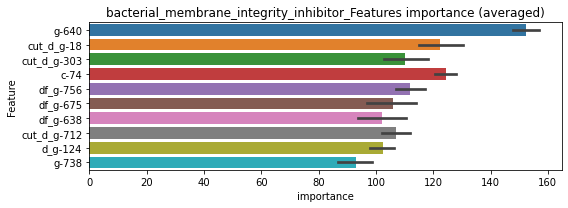

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000266261	valid_1's binary_logloss: 0.000672797


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.00026658	valid_1's binary_logloss: 0.00117622


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000262617	valid_1's binary_logloss: 0.00251957


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000264607	valid_1's binary_logloss: 0.00138938


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000269599	valid_1's binary_logloss: 0.000776529


bacterial_membrane_integrity_inhibitor logloss: 0.001307013112984597
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000394127	valid_1's binary_logloss: 0.0069795
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000365416	valid_1's binary_logloss: 0.00114955
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00062004	valid_1's binary_logloss: 0.0109934
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000375429	valid_1's binary_logloss: 0.00144354
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029570, Threshold: 0.0123955, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000380699	valid_1's binary_logloss: 0.00401526


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0123955, conf_0:0.00868, conf_1:0.01611
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_1: 0.0423955
threshold: 0.0423955, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000394476	valid_1's binary_logloss: 0.00755041
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000359794	valid_1's binary_logloss: 0.00109376
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000410766	valid_1's binary_logloss: 0.0105246
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000377636	valid_1's binary_logloss: 0.0011049
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000356414	valid_1's binary_logloss: 0.00413139


y_Threshold: 0.0177235, Threshold: 0.0423955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0070316 Vs.target_rate: 0.00130
Num_p_label: 28.0, Expected: 5.2, Threshold: 0.0423955, conf_0:0.03392, conf_1:0.05087
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_1: 0.0723955
Num_p_label: 7.0, Expected: 5.2, Adj_threshold_2: 0.1023955
threshold: 0.1023955, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000376969	valid_1's binary_logloss: 0.00517856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000359015	valid_1's binary_logloss: 0.00485489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000364952	valid_1's binary_logloss: 0.00141305
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000362955	valid_1's binary_logloss: 0.00108127
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0402201, Threshold: 0.1023955, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00036403	valid_1's binary_logloss: 0.00235759


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, Expected: 5.2, Threshold: 0.1023955, conf_0:0.09216, conf_1:0.11264
threshold: 0.1023955, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


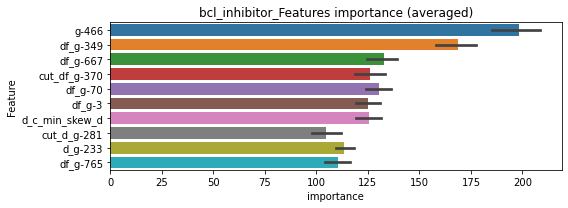

len(train_index) : 3047
len(valid_index) : 762
================================= fold 1/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 762
================================= fold 2/5 bcl_inhibitor=================================


Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000419894	valid_1's binary_logloss: 0.00581269
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000358836	valid_1's binary_logloss: 0.00337054


len(train_index) : 3047
len(valid_index) : 762
================================= fold 3/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000372472	valid_1's binary_logloss: 0.00121429


len(train_index) : 3047
len(valid_index) : 762
================================= fold 4/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000357777	valid_1's binary_logloss: 0.000999982


len(train_index) : 3048
len(valid_index) : 761
================================= fold 5/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000359135	valid_1's binary_logloss: 0.00239834


bcl_inhibitor logloss: 0.002760235287092561
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000413587	valid_1's binary_logloss: 0.00926608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000420831	valid_1's binary_logloss: 0.00652211
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000415839	valid_1's binary_logloss: 0.00436161
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000436255	valid_1's binary_logloss: 0.00124219
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000424526	valid_1's binary_logloss: 0.00976306


y_Threshold: 0.0026758, Threshold: 0.0497459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0497459, conf_0:0.03482, conf_1:0.06467
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_1: 0.0797459
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_2: 0.1097459
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_3: 0.1397459
threshold: 0.1397459, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000400152	valid_1's binary_logloss: 0.00923093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000401127	valid_1's binary_logloss: 0.00586703
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000397087	valid_1's binary_logloss: 0.00347693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000399136	valid_1's binary_logloss: 0.000998548
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000397755	valid_1's binary_logloss: 0.00874448


y_Threshold: 0.0334863, Threshold: 0.1397459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0140633 Vs.target_rate: 0.00160
Num_p_label: 56.0, Expected: 6.4, Threshold: 0.1397459, conf_0:0.11180, conf_1:0.16770
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_1: 0.1697459
Num_p_label: 50.0, Expected: 6.4, Adj_threshold_2: 0.1997459
Num_p_label: 47.0, Expected: 6.4, Adj_threshold_3: 0.2297459
Num_p_label: 45.0, Expected: 6.4, Adj_threshold_4: 0.2597459
Num_p_label: 38.0, Expected: 6.4, Adj_threshold_5: 0.2897459
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_6: 0.3197459
Num_p_label: 34.0, Expected: 6.4, Adj_threshold_7: 0.3497459
Num_p_label: 28.0, Expected: 6.4, Adj_threshold_8: 0.3797459
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_9: 0.4097459
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_10: 0.4397459
threshold: 0.4397459, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 655.0/3803, y_label_rate: 0.1722

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000458133	valid_1's binary_logloss: 0.00425999
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000414994	valid_1's binary_logloss: 0.00221534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00045681	valid_1's binary_logloss: 0.00740308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410617	valid_1's binary_logloss: 0.00527744
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0418025, Threshold: 0.4397459, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000416102	valid_1's binary_logloss: 0.00433465


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0060271 Vs.target_rate: 0.00160
Num_p_label: 24.0, Expected: 6.4, Threshold: 0.4397459, conf_0:0.39577, conf_1:0.48372
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_1: 0.4697459
Num_p_label: 20.0, Expected: 6.4, Adj_threshold_2: 0.4997459
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_3: 0.5297459
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_4: 0.5597459
threshold: 0.5597459, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


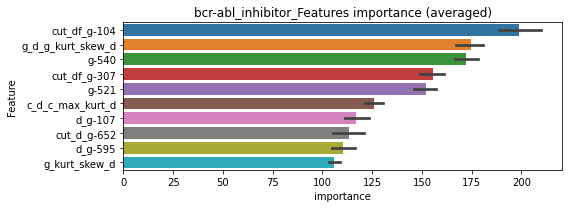

len(train_index) : 3042
len(valid_index) : 761
================================= fold 1/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000404535	valid_1's binary_logloss: 0.00306724


len(train_index) : 3042
len(valid_index) : 761
================================= fold 2/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000414491	valid_1's binary_logloss: 0.00167018


len(train_index) : 3042
len(valid_index) : 761
================================= fold 3/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000450214	valid_1's binary_logloss: 0.00485531


len(train_index) : 3043
len(valid_index) : 760
================================= fold 4/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000409747	valid_1's binary_logloss: 0.00418934


len(train_index) : 3043
len(valid_index) : 760
================================= fold 5/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000440368	valid_1's binary_logloss: 0.00505365


bcr-abl_inhibitor logloss: 0.00376735944176585
benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.0008854	valid_1's binary_logloss: 0.023515
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000540156	valid_1's binary_logloss: 0.02446
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000549037	valid_1's binary_logloss: 0.0278928
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000524204	valid_1's binary_logloss: 0.00284765
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0067828, Threshold: 0.0155740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00148424	valid_1's binary_logloss: 0.0354938


Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0155740, conf_0:0.01090, conf_1:0.02025
Num_p_label: 11.0, Expected: 11.2, Adj_threshold_1: 0.0455740
threshold: 0.0455740, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000508966	valid_1's binary_logloss: 0.0163149
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000549334	valid_1's binary_logloss: 0.0160687
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000539927	valid_1's binary_logloss: 0.0163647
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00063095	valid_1's binary_logloss: 0.0058172
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000531094	valid_1's binary_logloss: 0.0216143


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252208, Threshold: 0.0455740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0037670 Vs.target_rate: 0.00281
Num_p_label: 15.0, Expected: 11.2, Threshold: 0.0455740, conf_0:0.03646, conf_1:0.05469
threshold: 0.0455740, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000568103	valid_1's binary_logloss: 0.0262135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000881028	valid_1's binary_logloss: 0.0189427
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000730268	valid_1's binary_logloss: 0.0255478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000594864	valid_1's binary_logloss: 0.0105478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00054192	valid_1's binary_logloss: 0.0150405


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0245491, Threshold: 0.0455740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0042692 Vs.target_rate: 0.00281
Num_p_label: 17.0, Expected: 11.2, Threshold: 0.0455740, conf_0:0.04102, conf_1:0.05013
Num_p_label: 8.0, Expected: 11.2, Adj_threshold_1: 0.0755740
threshold: 0.0755740, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 650.0/3791, y_label_rate: 0.1714587


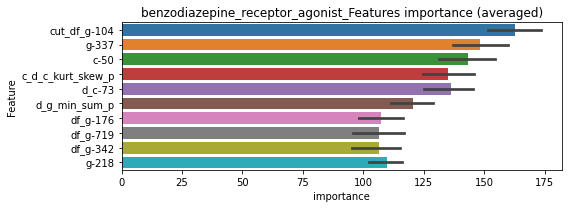

len(train_index) : 3032
len(valid_index) : 759
================================= fold 1/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000696344	valid_1's binary_logloss: 0.023756


len(train_index) : 3033
len(valid_index) : 758
================================= fold 2/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000594559	valid_1's binary_logloss: 0.0165324


len(train_index) : 3033
len(valid_index) : 758
================================= fold 3/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.00054153	valid_1's binary_logloss: 0.00976989


len(train_index) : 3033
len(valid_index) : 758
================================= fold 4/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000655252	valid_1's binary_logloss: 0.0144335


len(train_index) : 3033
len(valid_index) : 758
================================= fold 5/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


benzodiazepine_receptor_agonist logloss: 0.016233026727321003


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00111871	valid_1's binary_logloss: 0.0166634


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00034171	valid_1's binary_logloss: 0.00162684
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000350067	valid_1's binary_logloss: 0.00357874
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000339542	valid_1's binary_logloss: 0.00212066
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000351955	valid_1's binary_logloss: 0.00241654
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016948, Threshold: 0.0087331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0087331, conf_0:0.00611, conf_1:0.01135
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0387331


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000393462	valid_1's binary_logloss: 0.00729838


threshold: 0.0387331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00033176	valid_1's binary_logloss: 0.00148722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000340811	valid_1's binary_logloss: 0.00374771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000339946	valid_1's binary_logloss: 0.00214972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000341056	valid_1's binary_logloss: 0.00224443
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184668, Threshold: 0.0387331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00101
Num_p_label: 22.0, Expected: 4.0, Threshold: 0.0387331, conf_0:0.03099, conf_1:0.04648
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0687331
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.0987331


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000410068	valid_1's binary_logloss: 0.00635253


threshold: 0.0987331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00033176	valid_1's binary_logloss: 0.00148722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000340811	valid_1's binary_logloss: 0.00374771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000339946	valid_1's binary_logloss: 0.00214972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000341056	valid_1's binary_logloss: 0.00224443
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184668, Threshold: 0.0987331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0987331, conf_0:0.08886, conf_1:0.10861


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000410068	valid_1's binary_logloss: 0.00635253


threshold: 0.0987331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


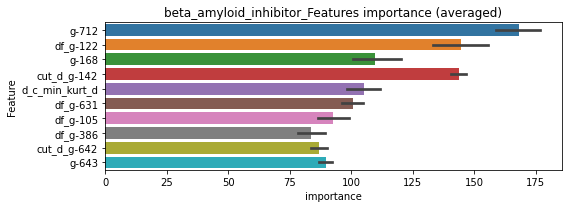

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000341455	valid_1's binary_logloss: 0.0014561


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000341421	valid_1's binary_logloss: 0.00281989


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00033741	valid_1's binary_logloss: 0.00187628


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000345041	valid_1's binary_logloss: 0.00126449


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000364024	valid_1's binary_logloss: 0.00644594


beta_amyloid_inhibitor logloss: 0.0027726842153881198
bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000783126	valid_1's binary_logloss: 0.0334711
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000672767	valid_1's binary_logloss: 0.033404
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000628296	valid_1's binary_logloss: 0.0114681
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000598049	valid_1's binary_logloss: 0.00777686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000632255	valid_1's binary_logloss: 0.0211774


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061983, Threshold: 0.0136395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0136395, conf_0:0.00955, conf_1:0.01773
Num_p_label: 5.0, Expected: 11.4, Adj_threshold_1: 0.0436395
threshold: 0.0436395, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000623555	valid_1's binary_logloss: 0.0323747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000787002	valid_1's binary_logloss: 0.0302062
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000725501	valid_1's binary_logloss: 0.0112448
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000565302	valid_1's binary_logloss: 0.00588508
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000615473	valid_1's binary_logloss: 0.0188692


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409738, Threshold: 0.0436395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0057760 Vs.target_rate: 0.00286
Num_p_label: 23.0, Expected: 11.4, Threshold: 0.0436395, conf_0:0.03491, conf_1:0.05237
Num_p_label: 11.0, Expected: 11.4, Adj_threshold_1: 0.0736395
threshold: 0.0736395, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00062029	valid_1's binary_logloss: 0.0141071
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000747109	valid_1's binary_logloss: 0.020857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000681256	valid_1's binary_logloss: 0.0220693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000565068	valid_1's binary_logloss: 0.00685129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000578407	valid_1's binary_logloss: 0.0210575


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242973, Threshold: 0.0736395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00286
Num_p_label: 13.0, Expected: 11.4, Threshold: 0.0736395, conf_0:0.06628, conf_1:0.08100
threshold: 0.0736395, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


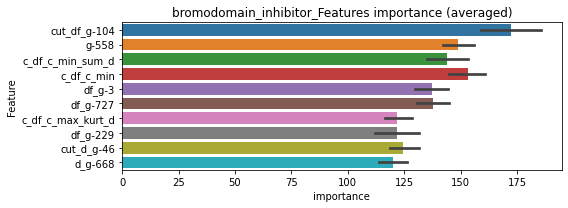

len(train_index) : 3036
len(valid_index) : 760
================================= fold 1/5 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759
================================= fold 2/5 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00106594	valid_1's binary_logloss: 0.0191818
Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759
================================= fold 3/5 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.0010595	valid_1's binary_logloss: 0.0300262
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000607159	valid_1's binary_logloss: 0.0109384


len(train_index) : 3037
len(valid_index) : 759
================================= fold 4/5 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000758059	valid_1's binary_logloss: 0.0109201


len(train_index) : 3037
len(valid_index) : 759
================================= fold 5/5 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds


bromodomain_inhibitor logloss: 0.021331398805687643


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00107608	valid_1's binary_logloss: 0.0355933


btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00036842	valid_1's binary_logloss: 0.00469789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000398498	valid_1's binary_logloss: 0.00932711
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000367201	valid_1's binary_logloss: 0.00124528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000374276	valid_1's binary_logloss: 0.00261911
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000364166	valid_1's binary_logloss: 0.00148112


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024325, Threshold: 0.0187912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0187912, conf_0:0.01315, conf_1:0.02443
Num_p_label: 16.0, Expected: 4.8, Adj_threshold_1: 0.0487912
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_2: 0.0787912
threshold: 0.0787912, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000369747	valid_1's binary_logloss: 0.00453239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000419113	valid_1's binary_logloss: 0.00906805
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000357376	valid_1's binary_logloss: 0.000802405
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000356523	valid_1's binary_logloss: 0.001699
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000355359	valid_1's binary_logloss: 0.00144155


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0160911, Threshold: 0.0787912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0055249 Vs.target_rate: 0.00122
Num_p_label: 22.0, Expected: 4.8, Threshold: 0.0787912, conf_0:0.06303, conf_1:0.09455
Num_p_label: 12.0, Expected: 4.8, Adj_threshold_1: 0.1087912
threshold: 0.1087912, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000369747	valid_1's binary_logloss: 0.00453239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000419113	valid_1's binary_logloss: 0.00906805
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000357376	valid_1's binary_logloss: 0.000802405
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000356523	valid_1's binary_logloss: 0.001699
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000355359	valid_1's binary_logloss: 0.00144155


y_Threshold: 0.0160911, Threshold: 0.1087912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00122
Num_p_label: 12.0, Expected: 4.8, Threshold: 0.1087912, conf_0:0.09791, conf_1:0.11967
threshold: 0.1087912, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


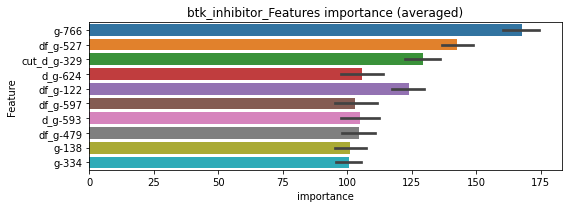

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000401864	valid_1's binary_logloss: 0.00399673


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 btk_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000606611	valid_1's binary_logloss: 0.00780044
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000360223	valid_1's binary_logloss: 0.000869079
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000354242	valid_1's binary_logloss: 0.000859656


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000356263	valid_1's binary_logloss: 0.00155955
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000358953	valid_1's binary_logloss: 0.00155911


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000354113	valid_1's binary_logloss: 0.00150742
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000351422	valid_1's binary_logloss: 0.00149766


btk_inhibitor logloss: 0.0031437994443264754
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000235584	valid_1's binary_logloss: 0.000566189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000233761	valid_1's binary_logloss: 0.000876845
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00026031	valid_1's binary_logloss: 0.000879982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000235719	valid_1's binary_logloss: 0.000362898
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011422, Threshold: 0.0118719, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0118719, conf_0:0.00831, conf_1:0.01543
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.0418719


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000236903	valid_1's binary_logloss: 0.000751727


Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0718719
threshold: 0.0718719, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000220365	valid_1's binary_logloss: 0.000533704
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000218198	valid_1's binary_logloss: 0.000350939
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000218961	valid_1's binary_logloss: 0.000688629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000219314	valid_1's binary_logloss: 0.000283436
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1402735, Threshold: 0.0718719, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0118031 Vs.target_rate: 0.00050
Num_p_label: 47.0, Expected: 2.0, Threshold: 0.0718719, conf_0:0.05750, conf_1:0.08625
Num_p_label: 43.0, Expected: 2.0, Adj_threshold_1: 0.1018719
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_2: 0.1318719
Num_p_label: 38.0, Expected: 2.0, Adj_threshold_3: 0.1618719
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_4: 0.1918719
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_5: 0.2218719
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_6: 0.2518719
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_7: 0.2818719
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_8: 0.3118719
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_9: 0.3418719


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000217835	valid_1's binary_logloss: 0.000690362


Num_p_label: 21.0, Expected: 2.0, Adj_threshold_10: 0.3718719
threshold: 0.3718719, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000220365	valid_1's binary_logloss: 0.000533704
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000218198	valid_1's binary_logloss: 0.000350939
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000218961	valid_1's binary_logloss: 0.000688629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000219314	valid_1's binary_logloss: 0.000283436
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1402735, Threshold: 0.3718719, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, Expected: 2.0, Threshold: 0.3718719, conf_0:0.33468, conf_1:0.40906
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.4018719
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.4318719
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_3: 0.4618719


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000217835	valid_1's binary_logloss: 0.000690362


Num_p_label: 18.0, Expected: 2.0, Adj_threshold_4: 0.4918719
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_5: 0.5218719
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_6: 0.5518719
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.5818719
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6118719
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.6418719
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.6718719
threshold: 0.6718719, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


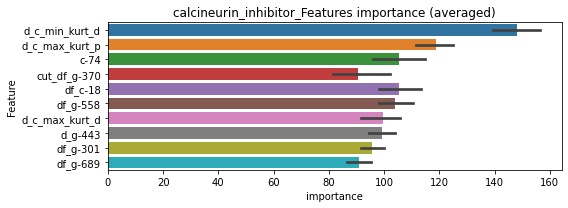

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 calcineurin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000224605	valid_1's binary_logloss: 0.000366474
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000233021	valid_1's binary_logloss: 0.000546178
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000223062	valid_1's binary_logloss: 0.000692397
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000224452	valid_1's binary_logloss: 0.000307432


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 calcineurin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


calcineurin_inhibitor logloss: 0.0004799085056691247


Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000223301	valid_1's binary_logloss: 0.000487078
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6900
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6900


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0352783	valid_1's binary_logloss: 0.135213
Early stopping, best iteration is:
[1332]	training's binary_logloss: 0.0258307	valid_1's binary_logloss: 0.131545
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0361521	valid_1's binary_logloss: 0.126787
Early stopping, best iteration is:
[1530]	training's binary_logloss: 0.0230581	valid_1's binary_logloss: 0.121026
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0355176	valid_1's binary_logloss: 0.134767
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.0269184	valid_1's binary_logloss: 0.132129


1 / 3, AUC score:0.966, PR-AUC:0.937
y_Threshold: 0.0662721, Threshold: 0.1204120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 540 → Positive_corect_labels: 1248/7740
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.1204120, conf_0:0.08429, conf_1:0.15654
threshold: 0.1204120, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1248.0/7740, y_label_rate: 0.1612403
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0239714	valid_1's binary_logloss: 0.0797144
Early stopping, best iteration is:
[1899]	training's binary_logloss: 0.0118857	valid_1's binary_logloss: 0.071331
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.023714	valid_1's binary_logloss: 0.0844296
[2000]	training's binary_logloss: 0.0112094	valid_1's binary_logloss: 0.0756722
Early stopping, best iteration is:
[2228]	training's binary_logloss: 0.00996298	valid_1's binary_logloss: 0.0748623
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0244253	valid_1's binary_logloss: 0.0804705
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.0120811	valid_1's binary_logloss: 0.0734857


2 / 3, AUC score:0.995, PR-AUC:0.986
y_Threshold: 0.0727645, Threshold: 0.1204120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 1182.0/7608
p_label_rate: 0.0090407 Vs.target_rate: 0.01180
Num_p_label: 36.0, Expected: 47.0, Threshold: 0.1204120, conf_0:0.09633, conf_1:0.14449
threshold: 0.1204120, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 1182.0/7608, y_label_rate: 0.1553628
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0192152	valid_1's binary_logloss: 0.054536
[2000]	training's binary_logloss: 0.00912906	valid_1's binary_logloss: 0.0458711
Early stopping, best iteration is:
[2818]	training's binary_logloss: 0.0063609	valid_1's binary_logloss: 0.0433157
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0189139	valid_1's binary_logloss: 0.0597919
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.0104666	valid_1's binary_logloss: 0.05303
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0194401	valid_1's binary_logloss: 0.056336
[2000]	training's binary_logloss: 0.00921065	valid_1's binary_logloss: 0.048047
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.00801428	valid_1's binary_logloss: 0.0467538


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0640878, Threshold: 0.1204120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 1155.0/7554
p_label_rate: 0.0052737 Vs.target_rate: 0.01180
Num_p_label: 21.0, Expected: 47.0, Threshold: 0.1204120, conf_0:0.10837, conf_1:0.13245
threshold: 0.1204120, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1155.0/7554, y_label_rate: 0.1528991


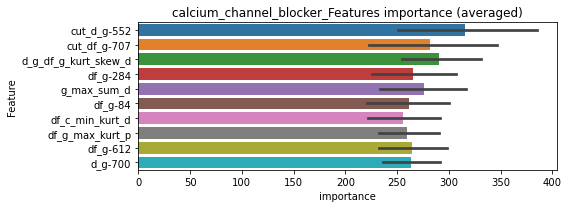

len(train_index) : 5036
len(valid_index) : 2518
================================= fold 1/3 calcium_channel_blocker=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0370706	valid_1's binary_logloss: 0.0631742
[2000]	training's binary_logloss: 0.0190501	valid_1's binary_logloss: 0.0460193
[3000]	training's binary_logloss: 0.0126836	valid_1's binary_logloss: 0.0397115
[4000]	training's binary_logloss: 0.00950882	valid_1's binary_logloss: 0.0365129
[5000]	training's binary_logloss: 0.00760878	valid_1's binary_logloss: 0.0344424
[6000]	training's binary_logloss: 0.00633838	valid_1's binary_logloss: 0.03307
[7000]	training's binary_logloss: 0.0054437	valid_1's binary_logloss: 0.0321187
Early stopping, best iteration is:
[7876]	training's binary_logloss: 0.00484861	valid_1's binary_logloss: 0.0313608


len(train_index) : 5036
len(valid_index) : 2518
================================= fold 2/3 calcium_channel_blocker=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0369479	valid_1's binary_logloss: 0.0649
[2000]	training's binary_logloss: 0.0188585	valid_1's binary_logloss: 0.048881
[3000]	training's binary_logloss: 0.0125256	valid_1's binary_logloss: 0.0433042
[4000]	training's binary_logloss: 0.00936002	valid_1's binary_logloss: 0.0402316
[5000]	training's binary_logloss: 0.00748224	valid_1's binary_logloss: 0.0384652
[6000]	training's binary_logloss: 0.00623774	valid_1's binary_logloss: 0.0372056
Early stopping, best iteration is:
[6670]	training's binary_logloss: 0.00562402	valid_1's binary_logloss: 0.0365919


len(train_index) : 5036
len(valid_index) : 2518
================================= fold 3/3 calcium_channel_blocker=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0367486	valid_1's binary_logloss: 0.0679257
[2000]	training's binary_logloss: 0.0188011	valid_1's binary_logloss: 0.0517424
[3000]	training's binary_logloss: 0.0124875	valid_1's binary_logloss: 0.0457832
Early stopping, best iteration is:
[3777]	training's binary_logloss: 0.00986292	valid_1's binary_logloss: 0.0432305


calcium_channel_blocker logloss: 0.03706106414236988
calcium_channel_blocker is unpredictable(><)!
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000457862	valid_1's binary_logloss: 0.0169941
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000482726	valid_1's binary_logloss: 0.0078131
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000453623	valid_1's binary_logloss: 0.00395279
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000696899	valid_1's binary_logloss: 0.00632874
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000448221	valid_1's binary_logloss: 0.0121637


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037345, Threshold: 0.0151432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0151432, conf_0:0.01060, conf_1:0.01969
Num_p_label: 10.0, Expected: 7.0, Adj_threshold_1: 0.0451432
threshold: 0.0451432, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000513312	valid_1's binary_logloss: 0.0151812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000529726	valid_1's binary_logloss: 0.00777102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00048163	valid_1's binary_logloss: 0.00361093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000658784	valid_1's binary_logloss: 0.00514215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000458436	valid_1's binary_logloss: 0.0108071


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0355429, Threshold: 0.0451432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0080362 Vs.target_rate: 0.00176
Num_p_label: 32.0, Expected: 7.0, Threshold: 0.0451432, conf_0:0.03611, conf_1:0.05417
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0751432
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_2: 0.1051432
threshold: 0.1051432, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000513312	valid_1's binary_logloss: 0.0151812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000529726	valid_1's binary_logloss: 0.00777102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00048163	valid_1's binary_logloss: 0.00361093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000658784	valid_1's binary_logloss: 0.00514215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000458436	valid_1's binary_logloss: 0.0108071


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0355429, Threshold: 0.1051432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00176
Num_p_label: 14.0, Expected: 7.0, Threshold: 0.1051432, conf_0:0.09463, conf_1:0.11566
threshold: 0.1051432, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


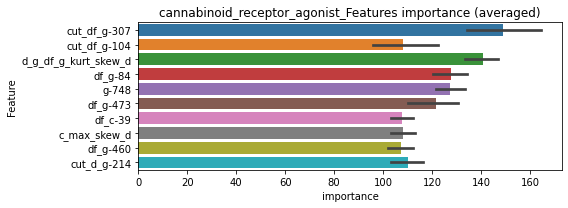

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000482017	valid_1's binary_logloss: 0.0114323


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000573162	valid_1's binary_logloss: 0.010109
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.00046772	valid_1's binary_logloss: 0.00499537


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3047


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000577468	valid_1's binary_logloss: 0.00573635


len(valid_index) : 761
================================= fold 5/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000457778	valid_1's binary_logloss: 0.00999522


cannabinoid_receptor_agonist logloss: 0.008453962641006839
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000890441	valid_1's binary_logloss: 0.026583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000500399	valid_1's binary_logloss: 0.0169789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000622641	valid_1's binary_logloss: 0.0142381
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000673889	valid_1's binary_logloss: 0.0147056
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000533595	valid_1's binary_logloss: 0.0278671


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0045048, Threshold: 0.0192173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0192173, conf_0:0.01345, conf_1:0.02498
Num_p_label: 12.0, Expected: 9.2, Adj_threshold_1: 0.0492173
threshold: 0.0492173, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00086617	valid_1's binary_logloss: 0.0243326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000609511	valid_1's binary_logloss: 0.00767215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000495673	valid_1's binary_logloss: 0.0179496
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000515823	valid_1's binary_logloss: 0.00512372
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000878727	valid_1's binary_logloss: 0.0215045


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0194605, Threshold: 0.0492173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0072828 Vs.target_rate: 0.00231
Num_p_label: 29.0, Expected: 9.2, Threshold: 0.0492173, conf_0:0.03937, conf_1:0.05906
Num_p_label: 17.0, Expected: 9.2, Adj_threshold_1: 0.0792173
threshold: 0.0792173, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000701642	valid_1's binary_logloss: 0.0123795
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000482099	valid_1's binary_logloss: 0.00906889
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.00048687	valid_1's binary_logloss: 0.00690151
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000480276	valid_1's binary_logloss: 0.00808994
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000533074	valid_1's binary_logloss: 0.0134417


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0247366, Threshold: 0.0792173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0042692 Vs.target_rate: 0.00231
Num_p_label: 17.0, Expected: 9.2, Threshold: 0.0792173, conf_0:0.07130, conf_1:0.08714
threshold: 0.0792173, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


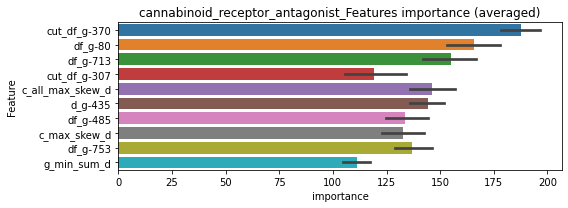

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00111508	valid_1's binary_logloss: 0.0169342
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000492302	valid_1's binary_logloss: 0.0099011


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000807838	valid_1's binary_logloss: 0.00792159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000550245	valid_1's binary_logloss: 0.00925282


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000501251	valid_1's binary_logloss: 0.0123787


cannabinoid_receptor_antagonist logloss: 0.011277690268730396
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000441812	valid_1's binary_logloss: 0.00542469
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000456529	valid_1's binary_logloss: 0.00720825
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000439792	valid_1's binary_logloss: 0.00161425
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000441077	valid_1's binary_logloss: 0.00122782
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000447093	valid_1's binary_logloss: 0.0156467


y_Threshold: 0.0027882, Threshold: 0.0223307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0223307, conf_0:0.01563, conf_1:0.02903
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0523307
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0823307
threshold: 0.0823307, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000444377	valid_1's binary_logloss: 0.0050956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000463877	valid_1's binary_logloss: 0.00793505
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000435586	valid_1's binary_logloss: 0.00155191
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00044329	valid_1's binary_logloss: 0.00106713
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0301987, Threshold: 0.0823307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0102963 Vs.target_rate: 0.00151
Num_p_label: 41.0, Expected: 6.0, Threshold: 0.0823307, conf_0:0.06586, conf_1:0.09880
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_1: 0.1123307
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_2: 0.1423307


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000722005	valid_1's binary_logloss: 0.0175145


Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1723307
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_4: 0.2023307
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_5: 0.2323307
threshold: 0.2323307, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000444377	valid_1's binary_logloss: 0.0050956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000463877	valid_1's binary_logloss: 0.00793505
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000435586	valid_1's binary_logloss: 0.00155191
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00044329	valid_1's binary_logloss: 0.00106713
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0301987, Threshold: 0.2323307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000722005	valid_1's binary_logloss: 0.0175145


p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.2323307, conf_0:0.20910, conf_1:0.25556
threshold: 0.2323307, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


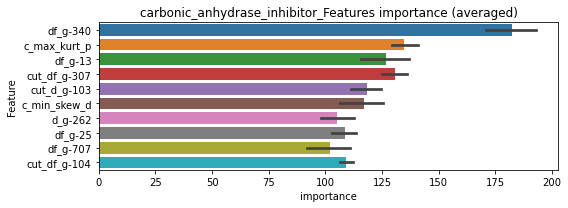

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000441608	valid_1's binary_logloss: 0.00435392


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000479383	valid_1's binary_logloss: 0.00632998


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000448853	valid_1's binary_logloss: 0.00138463


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000438306	valid_1's binary_logloss: 0.00127987


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000471885	valid_1's binary_logloss: 0.0134098


carbonic_anhydrase_inhibitor logloss: 0.005350632283887228
casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000422909	valid_1's binary_logloss: 0.0067602
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00039088	valid_1's binary_logloss: 0.00647859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000383945	valid_1's binary_logloss: 0.0011148
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000380834	valid_1's binary_logloss: 0.00131267
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022732, Threshold: 0.0058850, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000432422	valid_1's binary_logloss: 0.0122148


Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0058850, conf_0:0.00412, conf_1:0.00765
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0358850
threshold: 0.0358850, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000400937	valid_1's binary_logloss: 0.0056997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00037302	valid_1's binary_logloss: 0.00705428
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000382355	valid_1's binary_logloss: 0.000846307
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000365869	valid_1's binary_logloss: 0.00119865
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337990, Threshold: 0.0358850, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000379785	valid_1's binary_logloss: 0.0118104


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0358850, conf_0:0.02871, conf_1:0.04306
threshold: 0.0358850, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000400937	valid_1's binary_logloss: 0.0056997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00037302	valid_1's binary_logloss: 0.00705428
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000382355	valid_1's binary_logloss: 0.000846307
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000365869	valid_1's binary_logloss: 0.00119865
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337990, Threshold: 0.0358850, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000379785	valid_1's binary_logloss: 0.0118104


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0358850, conf_0:0.03230, conf_1:0.03947
threshold: 0.0358850, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


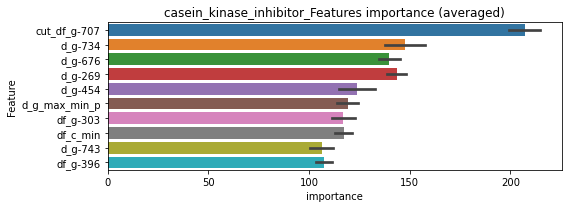

len(train_index) : 3044
len(valid_index) : 762
================================= fold 1/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000377364	valid_1's binary_logloss: 0.00633036


len(train_index) : 3045
len(valid_index) : 761
================================= fold 2/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000374963	valid_1's binary_logloss: 0.00548454


len(train_index) : 3045
len(valid_index) : 761
================================= fold 3/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000372712	valid_1's binary_logloss: 0.000983196


len(train_index) : 3045
len(valid_index) : 761
================================= fold 4/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000367055	valid_1's binary_logloss: 0.00162925
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000365447	valid_1's binary_logloss: 0.00162219


len(train_index) : 3045
len(valid_index) : 761
================================= fold 5/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000372018	valid_1's binary_logloss: 0.00996244


casein_kinase_inhibitor logloss: 0.0048793506525687536
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00027573	valid_1's binary_logloss: 0.00127489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000272931	valid_1's binary_logloss: 0.000873662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000292386	valid_1's binary_logloss: 0.0017183
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00027642	valid_1's binary_logloss: 0.00103202
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012475, Threshold: 0.0161147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0161147, conf_0:0.01128, conf_1:0.02095
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0461147
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0761147
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1061147
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1361147


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000273199	valid_1's binary_logloss: 0.000644549


threshold: 0.1361147, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000263306	valid_1's binary_logloss: 0.000971549
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000266977	valid_1's binary_logloss: 0.00066603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000267115	valid_1's binary_logloss: 0.000882859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000263815	valid_1's binary_logloss: 0.000701955
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1334419, Threshold: 0.1361147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.1361147, conf_0:0.10889, conf_1:0.16334
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.1661147
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.1961147
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.2261147
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2561147
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.2861147


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000263298	valid_1's binary_logloss: 0.000487963


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3161147
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.3461147
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.3761147
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.4061147
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_10: 0.4361147
threshold: 0.4361147, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000263306	valid_1's binary_logloss: 0.000971549
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000266977	valid_1's binary_logloss: 0.00066603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000267115	valid_1's binary_logloss: 0.000882859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000263815	valid_1's binary_logloss: 0.000701955
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1334419, Threshold: 0.4361147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.4361147, conf_0:0.39250, conf_1:0.47973
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.4661147


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000263298	valid_1's binary_logloss: 0.000487963


threshold: 0.4661147, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


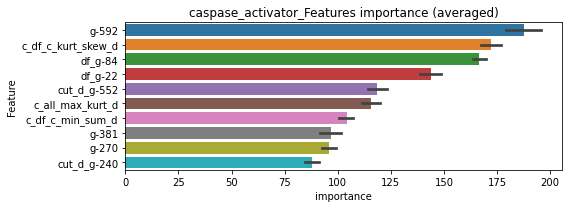

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 caspase_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 caspase_activator=================================


Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000276025	valid_1's binary_logloss: 0.00113104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000264888	valid_1's binary_logloss: 0.000571728


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 caspase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.0002665	valid_1's binary_logloss: 0.000702791


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 caspase_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00026519	valid_1's binary_logloss: 0.000948137


================================= fold 5/5 caspase_activator=================================


Training until validation scores don't improve for 29 rounds


caspase_activator logloss: 0.0007671123636151341


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000269746	valid_1's binary_logloss: 0.000481861


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000283862	valid_1's binary_logloss: 0.00193871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000283081	valid_1's binary_logloss: 0.00166032
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290083	valid_1's binary_logloss: 0.000673567
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000284307	valid_1's binary_logloss: 0.000605113
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016929, Threshold: 0.0090138, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0090138, conf_0:0.00631, conf_1:0.01172
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0390138
threshold: 0.0390138, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00028472	valid_1's binary_logloss: 0.00519852


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000268883	valid_1's binary_logloss: 0.00170811
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000271099	valid_1's binary_logloss: 0.00136797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000277522	valid_1's binary_logloss: 0.00056693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000275574	valid_1's binary_logloss: 0.000478855
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0383585, Threshold: 0.0390138, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, Expected: 3.0, Threshold: 0.0390138, conf_0:0.03121, conf_1:0.04682
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0690138
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0990138
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1290138


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277002	valid_1's binary_logloss: 0.00502768


threshold: 0.1290138, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000268883	valid_1's binary_logloss: 0.00170811
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000271099	valid_1's binary_logloss: 0.00136797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000277522	valid_1's binary_logloss: 0.00056693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000275574	valid_1's binary_logloss: 0.000478855
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0383585, Threshold: 0.1290138, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1290138, conf_0:0.11611, conf_1:0.14192
threshold: 0.1290138, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277002	valid_1's binary_logloss: 0.00502768


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


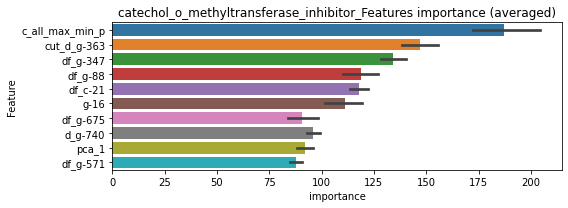

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000276814	valid_1's binary_logloss: 0.00135063


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000275945	valid_1's binary_logloss: 0.00115039


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000277834	valid_1's binary_logloss: 0.000504802


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000278871	valid_1's binary_logloss: 0.000471347


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000286947	valid_1's binary_logloss: 0.00364106


catechol_o_methyltransferase_inhibitor logloss: 0.001423690205216272
cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0284131	valid_1's binary_logloss: 0.121602
Early stopping, best iteration is:
[1671]	training's binary_logloss: 0.0164436	valid_1's binary_logloss: 0.114459
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0304183	valid_1's binary_logloss: 0.0875884
[2000]	training's binary_logloss: 0.0145406	valid_1's binary_logloss: 0.0717346
[3000]	training's binary_logloss: 0.00951844	valid_1's binary_logloss: 0.0659187
Early stopping, best iteration is:
[3794]	training's binary_logloss: 0.00748325	valid_1's binary_logloss: 0.0635325
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0298362	valid_1's binary_logloss: 0.106397
[2000]	training's binary_logloss: 0.0142311	valid_1's binary_logloss: 0.0955948
Early stopping, best iteration is:
[2007]	training's binary_logloss: 0.0141767	valid_1's binary_logloss: 0.0

1 / 3, AUC score:0.985, PR-AUC:0.976
y_Threshold: 0.0484748, Threshold: 0.1170725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 632/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.1170725, conf_0:0.08195, conf_1:0.15219
Num_p_label: 17.0, Expected: 17.1, Adj_threshold_1: 0.1470725
threshold: 0.1470725, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 632.0/3754, y_label_rate: 0.1683538
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0265762	valid_1's binary_logloss: 0.0895062
[2000]	training's binary_logloss: 0.0126797	valid_1's binary_logloss: 0.0764596
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.0100595	valid_1's binary_logloss: 0.0735342
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0278102	valid_1's binary_logloss: 0.071077
[2000]	training's binary_logloss: 0.0131961	valid_1's binary_logloss: 0.0552941
[3000]	training's binary_logloss: 0.00869781	valid_1's binary_logloss: 0.0496979
Early stopping, best iteration is:
[3801]	training's binary_logloss: 0.00684928	valid_1's binary_logloss: 0.0471507
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0268011	valid_1's binary_logloss: 0.0904031
[2000]	training's binary_logloss: 0.0128596	valid_1's binary_logloss: 0.0784687
[3000]	training's binary_l

2 / 3, AUC score:0.995, PR-AUC:0.992
y_Threshold: 0.0747600, Threshold: 0.1470725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 616.0/3722
p_label_rate: 0.0085384 Vs.target_rate: 0.00428
Num_p_label: 34.0, Expected: 17.1, Threshold: 0.1470725, conf_0:0.11766, conf_1:0.17649
Num_p_label: 21.0, Expected: 17.1, Adj_threshold_1: 0.1770725
threshold: 0.1770725, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 616.0/3722, y_label_rate: 0.1655024
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0243779	valid_1's binary_logloss: 0.0806671
[2000]	training's binary_logloss: 0.0116892	valid_1's binary_logloss: 0.0677814
Early stopping, best iteration is:
[2551]	training's binary_logloss: 0.00910609	valid_1's binary_logloss: 0.0648634
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0252839	valid_1's binary_logloss: 0.0670359
[2000]	training's binary_logloss: 0.0121497	valid_1's binary_logloss: 0.0530704
[3000]	training's binary_logloss: 0.00800532	valid_1's binary_logloss: 0.0481651
Early stopping, best iteration is:
[3442]	training's binary_logloss: 0.0069727	valid_1's binary_logloss: 0.0466714
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0257414	valid_1's binary_logloss: 0.0692609
[2000]	training's binary_logloss: 0.0123334	valid_1's binary_logloss: 0.0541344
[3000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0781459, Threshold: 0.1770725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 603.0/3696
p_label_rate: 0.0075339 Vs.target_rate: 0.00428
Num_p_label: 30.0, Expected: 17.1, Threshold: 0.1770725, conf_0:0.15937, conf_1:0.19478
Num_p_label: 23.0, Expected: 17.1, Adj_threshold_1: 0.2070725
threshold: 0.2070725, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 603.0/3696, y_label_rate: 0.1631494


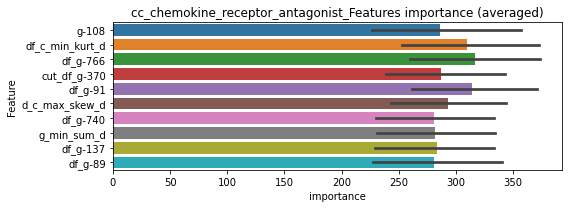

len(train_index) : 2464
len(valid_index) : 1232
================================= fold 1/3 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0504221	valid_1's binary_logloss: 0.0948748
[2000]	training's binary_logloss: 0.0255327	valid_1's binary_logloss: 0.0696467
[3000]	training's binary_logloss: 0.0169958	valid_1's binary_logloss: 0.0605236
[4000]	training's binary_logloss: 0.0127444	valid_1's binary_logloss: 0.0555714
[5000]	training's binary_logloss: 0.0102137	valid_1's binary_logloss: 0.0525621
[6000]	training's binary_logloss: 0.00852644	valid_1's binary_logloss: 0.0503936
[7000]	training's binary_logloss: 0.0073283	valid_1's binary_logloss: 0.0488432
[8000]	training's binary_logloss: 0.0064345	valid_1's binary_logloss: 0.047686
Early stopping, best iteration is:
[8153]	training's binary_logloss: 0.00631644	valid_1's binary_logloss: 0.0475058


len(train_index) : 2464
len(valid_index) : 1232
================================= fold 2/3 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0531869	valid_1's binary_logloss: 0.0869961
[2000]	training's binary_logloss: 0.027224	valid_1's binary_logloss: 0.0589228
[3000]	training's binary_logloss: 0.0181337	valid_1's binary_logloss: 0.048256
[4000]	training's binary_logloss: 0.0135641	valid_1's binary_logloss: 0.0426538
[5000]	training's binary_logloss: 0.0108469	valid_1's binary_logloss: 0.0391818
[6000]	training's binary_logloss: 0.00905053	valid_1's binary_logloss: 0.0367565
[7000]	training's binary_logloss: 0.00777866	valid_1's binary_logloss: 0.0350704
[8000]	training's binary_logloss: 0.00681672	valid_1's binary_logloss: 0.0336444
[9000]	training's binary_logloss: 0.00607907	valid_1's binary_logloss: 0.0325635
[10000]	training's binary_logloss: 0.0054919	valid_1's binary_logloss: 0.0317363
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0054919	valid_1's binary_logloss: 0.0317363


len(train_index) : 2464
len(valid_index) : 1232
================================= fold 3/3 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0516809	valid_1's binary_logloss: 0.0979701
[2000]	training's binary_logloss: 0.0263379	valid_1's binary_logloss: 0.0704133
[3000]	training's binary_logloss: 0.0174786	valid_1's binary_logloss: 0.0593801
[4000]	training's binary_logloss: 0.0130674	valid_1's binary_logloss: 0.0535814
[5000]	training's binary_logloss: 0.0104476	valid_1's binary_logloss: 0.0499313
[6000]	training's binary_logloss: 0.00871172	valid_1's binary_logloss: 0.0472853
[7000]	training's binary_logloss: 0.00748007	valid_1's binary_logloss: 0.0455108
[8000]	training's binary_logloss: 0.00656055	valid_1's binary_logloss: 0.0440836
[9000]	training's binary_logloss: 0.00585146	valid_1's binary_logloss: 0.0429709
[10000]	training's binary_logloss: 0.00528823	valid_1's binary_logloss: 0.0420501
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00528823	valid_1's binary_logloss: 0.0420501


cc_chemokine_receptor_antagonist logloss: 0.0404307610283334
cc_chemokine_receptor_antagonist is unpredictable(><)!
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000289399	valid_1's binary_logloss: 0.00155297
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000298052	valid_1's binary_logloss: 0.00234015
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000287079	valid_1's binary_logloss: 0.00125859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000286881	valid_1's binary_logloss: 0.00112954
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012917, Threshold: 0.0032519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0032519, conf_0:0.00228, conf_1:0.00423
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0332519


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000285296	valid_1's binary_logloss: 0.000624095


threshold: 0.0332519, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000281409	valid_1's binary_logloss: 0.00133128
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000284441	valid_1's binary_logloss: 0.00210473
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000278187	valid_1's binary_logloss: 0.00118842
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00028274	valid_1's binary_logloss: 0.000807006
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0885575, Threshold: 0.0332519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332519, conf_0:0.02660, conf_1:0.03990


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000280164	valid_1's binary_logloss: 0.000615659


threshold: 0.0332519, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000281409	valid_1's binary_logloss: 0.00133128
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000284441	valid_1's binary_logloss: 0.00210473
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000278187	valid_1's binary_logloss: 0.00118842
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00028274	valid_1's binary_logloss: 0.000807006
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0885575, Threshold: 0.0332519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332519, conf_0:0.02993, conf_1:0.03658


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000280164	valid_1's binary_logloss: 0.000615659


threshold: 0.0332519, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


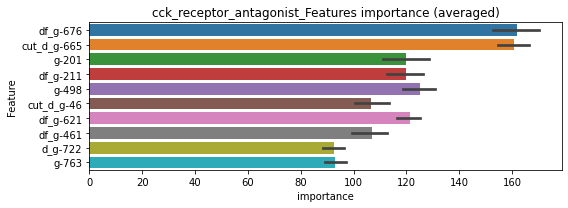

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000282224	valid_1's binary_logloss: 0.00104202


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000282719	valid_1's binary_logloss: 0.00126752


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000280085	valid_1's binary_logloss: 0.00100436


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000283648	valid_1's binary_logloss: 0.000683534


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000282654	valid_1's binary_logloss: 0.00057448
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000282654	valid_1's binary_logloss: 0.00057448


cck_receptor_antagonist logloss: 0.0009145783981619047


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7646
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7646


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0440771	valid_1's binary_logloss: 0.167986
Early stopping, best iteration is:
[1632]	training's binary_logloss: 0.025664	valid_1's binary_logloss: 0.156052
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0447874	valid_1's binary_logloss: 0.158406
Early stopping, best iteration is:
[1959]	training's binary_logloss: 0.0210383	valid_1's binary_logloss: 0.141106
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0447097	valid_1's binary_logloss: 0.162695
Early stopping, best iteration is:
[1904]	training's binary_logloss: 0.0218851	valid_1's binary_logloss: 0.146231


1 / 3, AUC score:0.962, PR-AUC:0.927
y_Threshold: 0.0859603, Threshold: 0.1747330, pos_neg_ratio: 0.8000000
Remove_noisy_data: 630 → Positive_corect_labels: 1367/8545
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.1747330, conf_0:0.12231, conf_1:0.22715
threshold: 0.1747330, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1367.0/8545, y_label_rate: 0.1599766
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0352971	valid_1's binary_logloss: 0.113174
[2000]	training's binary_logloss: 0.0162142	valid_1's binary_logloss: 0.0930293
Early stopping, best iteration is:
[2613]	training's binary_logloss: 0.0120586	valid_1's binary_logloss: 0.088202
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0350811	valid_1's binary_logloss: 0.109698
[2000]	training's binary_logloss: 0.0160994	valid_1's binary_logloss: 0.09022
Early stopping, best iteration is:
[2254]	training's binary_logloss: 0.0141076	valid_1's binary_logloss: 0.0877044
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0352164	valid_1's binary_logloss: 0.114931
[2000]	training's binary_logloss: 0.0160594	valid_1's binary_logloss: 0.0936752
[3000]	training's binary_logloss: 0.0102872	valid_1's binary_logloss: 0.0876014
Early stopping, best iteration is

2 / 3, AUC score:0.991, PR-AUC:0.980
y_Threshold: 0.1092053, Threshold: 0.1747330, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 1292.0/8395
p_label_rate: 0.0140633 Vs.target_rate: 0.01478
Num_p_label: 56.0, Expected: 58.9, Threshold: 0.1747330, conf_0:0.13979, conf_1:0.20968
threshold: 0.1747330, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 1292.0/8395, y_label_rate: 0.1539011
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0316629	valid_1's binary_logloss: 0.10102
[2000]	training's binary_logloss: 0.0145636	valid_1's binary_logloss: 0.0802896
[3000]	training's binary_logloss: 0.00932782	valid_1's binary_logloss: 0.0739205
Early stopping, best iteration is:
[3434]	training's binary_logloss: 0.00808039	valid_1's binary_logloss: 0.0721153
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0323603	valid_1's binary_logloss: 0.0954441
[2000]	training's binary_logloss: 0.0148653	valid_1's binary_logloss: 0.0752096
[3000]	training's binary_logloss: 0.00953915	valid_1's binary_logloss: 0.0686999
Early stopping, best iteration is:
[3628]	training's binary_logloss: 0.0077961	valid_1's binary_logloss: 0.0661082
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0320651	valid_1's binary_logloss: 0.0979016
[2000]	training's binary_l

3 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.0882289, Threshold: 0.1747330, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1247.0/8305
p_label_rate: 0.0130588 Vs.target_rate: 0.01478
Num_p_label: 52.0, Expected: 58.9, Threshold: 0.1747330, conf_0:0.15726, conf_1:0.19221
threshold: 0.1747330, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1247.0/8305, y_label_rate: 0.1501505


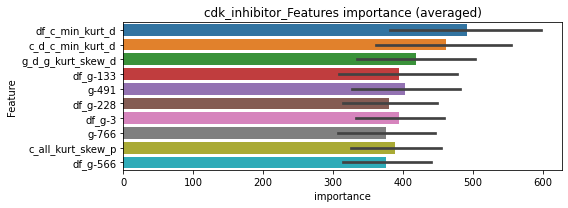

len(train_index) : 5536
len(valid_index) : 2769
================================= fold 1/3 cdk_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0637951	valid_1's binary_logloss: 0.129249
[2000]	training's binary_logloss: 0.0318128	valid_1's binary_logloss: 0.0943486
[3000]	training's binary_logloss: 0.0208341	valid_1's binary_logloss: 0.0803572
[4000]	training's binary_logloss: 0.0154274	valid_1's binary_logloss: 0.0728404
[5000]	training's binary_logloss: 0.0122533	valid_1's binary_logloss: 0.0683048
[6000]	training's binary_logloss: 0.0101677	valid_1's binary_logloss: 0.0651487
Early stopping, best iteration is:
[6154]	training's binary_logloss: 0.00990512	valid_1's binary_logloss: 0.064722


len(train_index) : 5537
len(valid_index) : 2768
================================= fold 2/3 cdk_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0636299	valid_1's binary_logloss: 0.134207
[2000]	training's binary_logloss: 0.0316466	valid_1's binary_logloss: 0.102444
[3000]	training's binary_logloss: 0.0207679	valid_1's binary_logloss: 0.0904828
[4000]	training's binary_logloss: 0.0153755	valid_1's binary_logloss: 0.0843776
[5000]	training's binary_logloss: 0.012205	valid_1's binary_logloss: 0.0804138
Early stopping, best iteration is:
[5181]	training's binary_logloss: 0.0117553	valid_1's binary_logloss: 0.0797642


len(train_index) : 5537
len(valid_index) : 2768
================================= fold 3/3 cdk_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0650268	valid_1's binary_logloss: 0.126421
[2000]	training's binary_logloss: 0.0325929	valid_1's binary_logloss: 0.0914006
[3000]	training's binary_logloss: 0.0213502	valid_1's binary_logloss: 0.0776472
[4000]	training's binary_logloss: 0.0157738	valid_1's binary_logloss: 0.0703452
[5000]	training's binary_logloss: 0.012511	valid_1's binary_logloss: 0.0658296
[6000]	training's binary_logloss: 0.0103807	valid_1's binary_logloss: 0.0627235
Early stopping, best iteration is:
[6453]	training's binary_logloss: 0.00963545	valid_1's binary_logloss: 0.0615866


cdk_inhibitor logloss: 0.06869045519262541
cdk_inhibitor is unpredictable(><)!
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000770778	valid_1's binary_logloss: 0.023291
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000556809	valid_1's binary_logloss: 0.0170256
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000501361	valid_1's binary_logloss: 0.00343059
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00052243	valid_1's binary_logloss: 0.0075017
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000507257	valid_1's binary_logloss: 0.0260556


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044658, Threshold: 0.0167825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0167825, conf_0:0.01175, conf_1:0.02182
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_1: 0.0467825
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_2: 0.0767825
threshold: 0.0767825, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000542013	valid_1's binary_logloss: 0.02241
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000565019	valid_1's binary_logloss: 0.0143902
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000494347	valid_1's binary_logloss: 0.00301348
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000586919	valid_1's binary_logloss: 0.00588185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000542663	valid_1's binary_logloss: 0.0246551


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0218711, Threshold: 0.0767825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0065294 Vs.target_rate: 0.00227
Num_p_label: 26.0, Expected: 9.0, Threshold: 0.0767825, conf_0:0.06143, conf_1:0.09214
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.1067825
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_2: 0.1367825
threshold: 0.1367825, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000543112	valid_1's binary_logloss: 0.0118411
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000487589	valid_1's binary_logloss: 0.00583914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000474211	valid_1's binary_logloss: 0.0199385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000496979	valid_1's binary_logloss: 0.00622283
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000468143	valid_1's binary_logloss: 0.0114384


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0342720, Threshold: 0.1367825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0055249 Vs.target_rate: 0.00227
Num_p_label: 22.0, Expected: 9.0, Threshold: 0.1367825, conf_0:0.12310, conf_1:0.15046
threshold: 0.1367825, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


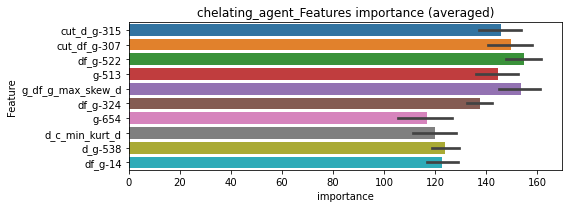

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000531609	valid_1's binary_logloss: 0.01086


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00049044	valid_1's binary_logloss: 0.00551234
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000484951	valid_1's binary_logloss: 0.00550275


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000599933	valid_1's binary_logloss: 0.0184906


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000501579	valid_1's binary_logloss: 0.00494642


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000537082	valid_1's binary_logloss: 0.00965419


chelating_agent logloss: 0.009890764791088231
chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000327897	valid_1's binary_logloss: 0.00127728
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000324123	valid_1's binary_logloss: 0.00133959
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000330631	valid_1's binary_logloss: 0.00197234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000328839	valid_1's binary_logloss: 0.000729034
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023433, Threshold: 0.0416030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000333792	valid_1's binary_logloss: 0.00106571


p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0416030, conf_0:0.02912, conf_1:0.05408
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_1: 0.0716030
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_2: 0.1016030
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.1316030
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_4: 0.1616030
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_5: 0.1916030
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_6: 0.2216030
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_7: 0.2516030
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.2816030
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_9: 0.3116030
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_10: 0.3416030
threshold: 0.3416030, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000320847	valid_1's binary_logloss: 0.0011508
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00031085	valid_1's binary_logloss: 0.00116621
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000317273	valid_1's binary_logloss: 0.00135987
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000317895	valid_1's binary_logloss: 0.000630901
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1423834, Threshold: 0.3416030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0095429 Vs.target_rate: 0.00101
Num_p_label: 38.0, Expected: 4.0, Threshold: 0.3416030, conf_0:0.27328, conf_1:0.40992
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_1: 0.3716030
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_2: 0.4016030


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000316882	valid_1's binary_logloss: 0.000884777


Num_p_label: 30.0, Expected: 4.0, Adj_threshold_3: 0.4316030
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_4: 0.4616030
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_5: 0.4916030
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_6: 0.5216030
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_7: 0.5516030
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.5816030
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_9: 0.6116030
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_10: 0.6416030
threshold: 0.6416030, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000320847	valid_1's binary_logloss: 0.0011508
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00031085	valid_1's binary_logloss: 0.00116621
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000317273	valid_1's binary_logloss: 0.00135987
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000317895	valid_1's binary_logloss: 0.000630901
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1423834, Threshold: 0.6416030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0055249 Vs.target_rate: 0.00101
Num_p_label: 22.0, Expected: 4.0, Threshold: 0.6416030, conf_0:0.57744, conf_1:0.70576
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_1: 0.6716030
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_2: 0.7016030
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_3: 0.7316030
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_4: 0.7616030
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_5: 0.7916030


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000316882	valid_1's binary_logloss: 0.000884777


Num_p_label: 11.0, Expected: 4.0, Adj_threshold_6: 0.8216030
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.8516030
threshold: 0.8516030, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


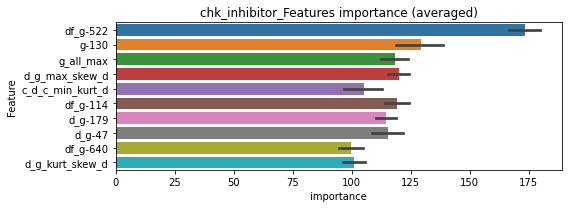

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000322079	valid_1's binary_logloss: 0.00085578


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000315052	valid_1's binary_logloss: 0.00115886


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000317144	valid_1's binary_logloss: 0.00116647


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000327117	valid_1's binary_logloss: 0.000718616


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000317578	valid_1's binary_logloss: 0.00101092


chk_inhibitor logloss: 0.000982369753844624
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00046259	valid_1's binary_logloss: 0.00572682
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000452991	valid_1's binary_logloss: 0.00431783
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000481751	valid_1's binary_logloss: 0.0190504
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000447073	valid_1's binary_logloss: 0.00177054
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000447674	valid_1's binary_logloss: 0.00975387


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033441, Threshold: 0.0282663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0282663, conf_0:0.01979, conf_1:0.03675
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0582663
threshold: 0.0582663, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000437923	valid_1's binary_logloss: 0.00567938
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000430692	valid_1's binary_logloss: 0.00275954
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000450859	valid_1's binary_logloss: 0.0147252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000433089	valid_1's binary_logloss: 0.00146242
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000439363	valid_1's binary_logloss: 0.0100302


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0647460, Threshold: 0.0582663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0178302 Vs.target_rate: 0.00176
Num_p_label: 71.0, Expected: 7.0, Threshold: 0.0582663, conf_0:0.04661, conf_1:0.06992
Num_p_label: 54.0, Expected: 7.0, Adj_threshold_1: 0.0882663
Num_p_label: 51.0, Expected: 7.0, Adj_threshold_2: 0.1182663
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_3: 0.1482663
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_4: 0.1782663
Num_p_label: 29.0, Expected: 7.0, Adj_threshold_5: 0.2082663
Num_p_label: 25.0, Expected: 7.0, Adj_threshold_6: 0.2382663
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_7: 0.2682663
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.2982663
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3282663
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_10: 0.3582663
threshold: 0.3582663, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000437923	valid_1's binary_logloss: 0.00567938
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000430692	valid_1's binary_logloss: 0.00275954
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000450859	valid_1's binary_logloss: 0.0147252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000433089	valid_1's binary_logloss: 0.00146242
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000439363	valid_1's binary_logloss: 0.0100302


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0647460, Threshold: 0.3582663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, Expected: 7.0, Threshold: 0.3582663, conf_0:0.32244, conf_1:0.39409
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.3882663
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_2: 0.4182663
threshold: 0.4182663, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


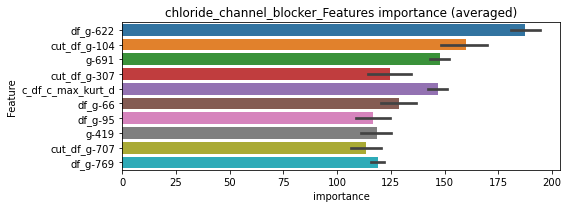

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000437688	valid_1's binary_logloss: 0.0049952


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000469378	valid_1's binary_logloss: 0.00281968


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000477317	valid_1's binary_logloss: 0.0119295


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000450185	valid_1's binary_logloss: 0.00142893


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds


chloride_channel_blocker logloss: 0.006101217728892534


Early stopping, best iteration is:
[332]	training's binary_logloss: 0.000992449	valid_1's binary_logloss: 0.00933773


cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000524475	valid_1's binary_logloss: 0.0103185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000478029	valid_1's binary_logloss: 0.00582963
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000600858	valid_1's binary_logloss: 0.0100315
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000452599	valid_1's binary_logloss: 0.00261014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000465583	valid_1's binary_logloss: 0.00736298


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039618, Threshold: 0.0124424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0124424, conf_0:0.00871, conf_1:0.01618
Num_p_label: 8.0, Expected: 8.0, Adj_threshold_1: 0.0424424
threshold: 0.0424424, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000527619	valid_1's binary_logloss: 0.00929547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000459153	valid_1's binary_logloss: 0.00534956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000492113	valid_1's binary_logloss: 0.010347
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000444398	valid_1's binary_logloss: 0.00238661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000463435	valid_1's binary_logloss: 0.00591147


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192262, Threshold: 0.0424424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0424424, conf_0:0.03395, conf_1:0.05093
threshold: 0.0424424, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000527619	valid_1's binary_logloss: 0.00929547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000459153	valid_1's binary_logloss: 0.00534956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000492113	valid_1's binary_logloss: 0.010347
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000444398	valid_1's binary_logloss: 0.00238661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000463435	valid_1's binary_logloss: 0.00591147


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192262, Threshold: 0.0424424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0424424, conf_0:0.03820, conf_1:0.04669
threshold: 0.0424424, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


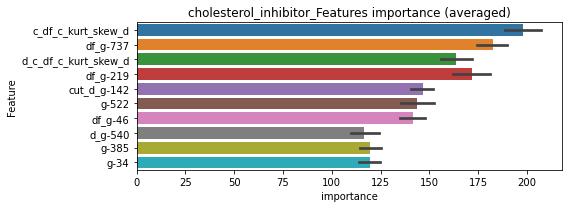

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000565907	valid_1's binary_logloss: 0.0097674


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000464482	valid_1's binary_logloss: 0.00357337


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000564736	valid_1's binary_logloss: 0.0102498


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000461736	valid_1's binary_logloss: 0.00306387


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000481498	valid_1's binary_logloss: 0.00670095


cholesterol_inhibitor logloss: 0.006673151689237823
cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000495787	valid_1's binary_logloss: 0.011356
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000564575	valid_1's binary_logloss: 0.00730499
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000510459	valid_1's binary_logloss: 0.0141618
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00068771	valid_1's binary_logloss: 0.0125386
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000514742	valid_1's binary_logloss: 0.0104793


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038315, Threshold: 0.0095425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0095425, conf_0:0.00668, conf_1:0.01241
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0395425
threshold: 0.0395425, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000490127	valid_1's binary_logloss: 0.0114909
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000492017	valid_1's binary_logloss: 0.00640818
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000523119	valid_1's binary_logloss: 0.0140553
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000605536	valid_1's binary_logloss: 0.0105759
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000504133	valid_1's binary_logloss: 0.0109921


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0241865, Threshold: 0.0395425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0395425, conf_0:0.03163, conf_1:0.04745
threshold: 0.0395425, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000490127	valid_1's binary_logloss: 0.0114909
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000492017	valid_1's binary_logloss: 0.00640818
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000523119	valid_1's binary_logloss: 0.0140553
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000605536	valid_1's binary_logloss: 0.0105759
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000504133	valid_1's binary_logloss: 0.0109921


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0241865, Threshold: 0.0395425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0395425, conf_0:0.03559, conf_1:0.04350
threshold: 0.0395425, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


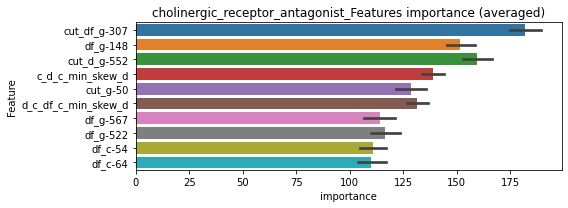

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000516583	valid_1's binary_logloss: 0.0104116


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000625336	valid_1's binary_logloss: 0.00791556


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000606703	valid_1's binary_logloss: 0.0129314


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000679098	valid_1's binary_logloss: 0.0127808


================================= fold 5/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000530581	valid_1's binary_logloss: 0.00974962


cholinergic_receptor_antagonist logloss: 0.01076150088944357
coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000322047	valid_1's binary_logloss: 0.00227315
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000324968	valid_1's binary_logloss: 0.00165749
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000325721	valid_1's binary_logloss: 0.00255988
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000317001	valid_1's binary_logloss: 0.00480655
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017724, Threshold: 0.0099978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000333514	valid_1's binary_logloss: 0.00602729


Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0099978, conf_0:0.00700, conf_1:0.01300
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0399978
threshold: 0.0399978, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000318574	valid_1's binary_logloss: 0.00150888
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000312518	valid_1's binary_logloss: 0.00152985
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000315486	valid_1's binary_logloss: 0.00208829
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00032549	valid_1's binary_logloss: 0.00471246
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0133213, Threshold: 0.0399978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000328583	valid_1's binary_logloss: 0.0056048


p_label_rate: 0.0055249 Vs.target_rate: 0.00101
Num_p_label: 22.0, Expected: 4.0, Threshold: 0.0399978, conf_0:0.03200, conf_1:0.04800
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0699978
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0999978
threshold: 0.0999978, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000318574	valid_1's binary_logloss: 0.00150888
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000312518	valid_1's binary_logloss: 0.00152985
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000315486	valid_1's binary_logloss: 0.00208829
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00032549	valid_1's binary_logloss: 0.00471246
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0133213, Threshold: 0.0999978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000328583	valid_1's binary_logloss: 0.0056048


p_label_rate: 0.0015068 Vs.target_rate: 0.00101
Num_p_label: 6.0, Expected: 4.0, Threshold: 0.0999978, conf_0:0.09000, conf_1:0.11000
threshold: 0.0999978, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


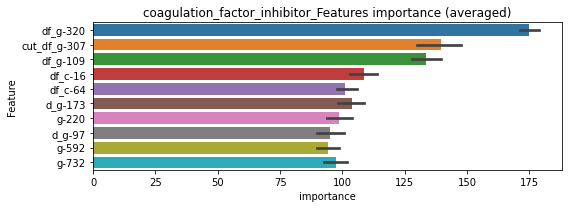

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000318141	valid_1's binary_logloss: 0.000952258
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.000315304	valid_1's binary_logloss: 0.00094668


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000314196	valid_1's binary_logloss: 0.00158475
Early stopping, best iteration is:
[1100]	training's binary_logloss: 0.000309047	valid_1's binary_logloss: 0.00157864


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.00032133	valid_1's binary_logloss: 0.00204281


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00033675	valid_1's binary_logloss: 0.00411132


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000338487	valid_1's binary_logloss: 0.0034283


coagulation_factor_inhibitor logloss: 0.00242157544164696
corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000409056	valid_1's binary_logloss: 0.00365723
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000406797	valid_1's binary_logloss: 0.00472133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000415113	valid_1's binary_logloss: 0.00928365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000410958	valid_1's binary_logloss: 0.00299564
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000410918	valid_1's binary_logloss: 0.00282623


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0035845, Threshold: 0.0106302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0106302, conf_0:0.00744, conf_1:0.01382
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0406302
threshold: 0.0406302, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000397449	valid_1's binary_logloss: 0.00339993
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000407178	valid_1's binary_logloss: 0.00441178
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000424994	valid_1's binary_logloss: 0.00790125
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000402746	valid_1's binary_logloss: 0.00352989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000395369	valid_1's binary_logloss: 0.00227641


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217752, Threshold: 0.0406302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.0406302, conf_0:0.03250, conf_1:0.04876
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0706302
threshold: 0.0706302, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000397449	valid_1's binary_logloss: 0.00339993
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000407178	valid_1's binary_logloss: 0.00441178
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000424994	valid_1's binary_logloss: 0.00790125
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000402746	valid_1's binary_logloss: 0.00352989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000395369	valid_1's binary_logloss: 0.00227641


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217752, Threshold: 0.0706302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00151
Num_p_label: 4.0, Expected: 6.0, Threshold: 0.0706302, conf_0:0.06357, conf_1:0.07769
threshold: 0.0706302, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


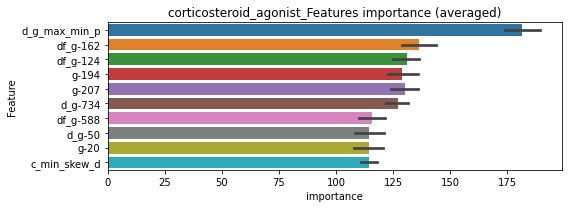

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000395525	valid_1's binary_logloss: 0.00345065
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000391576	valid_1's binary_logloss: 0.00343696


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000404003	valid_1's binary_logloss: 0.00439513


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000410093	valid_1's binary_logloss: 0.00550948


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000397821	valid_1's binary_logloss: 0.00281951
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000396799	valid_1's binary_logloss: 0.00281604


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.00039723	valid_1's binary_logloss: 0.00270534


corticosteroid_agonist logloss: 0.0037725213856565874
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.189329	valid_1's binary_logloss: 0.402639
Training until validation scores don't improve for 39 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.110056	valid_1's binary_logloss: 0.365795
Training until validation scores don't improve for 39 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.141566	valid_1's binary_logloss: 0.375418


1 / 3, AUC score:0.737, PR-AUC:0.552
y_Threshold: 0.1811990, Threshold: 0.4373203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 746 → Positive_corect_labels: 338/3130
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4373203, conf_0:0.30612, conf_1:0.56852
threshold: 0.4373203, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 338.0/3130, y_label_rate: 0.1079872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.0442742	valid_1's binary_logloss: 0.198194
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0408358	valid_1's binary_logloss: 0.195456
Early stopping, best iteration is:
[1160]	training's binary_logloss: 0.0349062	valid_1's binary_logloss: 0.194095
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0445317	valid_1's binary_logloss: 0.148352
Early stopping, best iteration is:
[1902]	training's binary_logloss: 0.0222975	valid_1's binary_logloss: 0.133907


2 / 3, AUC score:0.955, PR-AUC:0.852
y_Threshold: 0.1064626, Threshold: 0.4373203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 263.0/2980
p_label_rate: 0.0296334 Vs.target_rate: 0.01827
Num_p_label: 118.0, Expected: 72.7, Threshold: 0.4373203, conf_0:0.34986, conf_1:0.52478
Num_p_label: 110.0, Expected: 72.7, Adj_threshold_1: 0.4673203
Num_p_label: 106.0, Expected: 72.7, Adj_threshold_2: 0.4973203
threshold: 0.4973203, positive_p_label: 106.0/3982, p_label_rate: 0.0266198
positive_y_label: 263.0/2980, y_label_rate: 0.0882550
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.0335776	valid_1's binary_logloss: 0.140072
Training until validation scores don't improve for 39 rounds
Early stopping, best iteration is:
[936]	training's binary_logloss: 0.0334532	valid_1's binary_logloss: 0.142081
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0311023	valid_1's binary_logloss: 0.139108
Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.0272649	valid_1's binary_logloss: 0.136629


3 / 3, AUC score:0.977, PR-AUC:0.899
y_Threshold: 0.1004621, Threshold: 0.4973203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 218.0/2890
p_label_rate: 0.0334003 Vs.target_rate: 0.01827
Num_p_label: 133.0, Expected: 72.7, Threshold: 0.4973203, conf_0:0.44759, conf_1:0.54705
Num_p_label: 128.0, Expected: 72.7, Adj_threshold_1: 0.5273203
Num_p_label: 118.0, Expected: 72.7, Adj_threshold_2: 0.5573203
Num_p_label: 115.0, Expected: 72.7, Adj_threshold_3: 0.5873203
Num_p_label: 106.0, Expected: 72.7, Adj_threshold_4: 0.6173203
threshold: 0.6173203, positive_p_label: 106.0/3982, p_label_rate: 0.0266198
positive_y_label: 218.0/2890, y_label_rate: 0.0754325


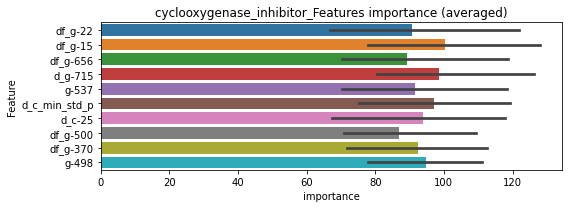

len(train_index) : 1926
len(valid_index) : 964
================================= fold 1/3 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0573964	valid_1's binary_logloss: 0.139946
[2000]	training's binary_logloss: 0.0288233	valid_1's binary_logloss: 0.123911
[3000]	training's binary_logloss: 0.0189094	valid_1's binary_logloss: 0.11924
Early stopping, best iteration is:
[3327]	training's binary_logloss: 0.0169553	valid_1's binary_logloss: 0.118426


len(train_index) : 1927
len(valid_index) : 963
================================= fold 2/3 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.058755	valid_1's binary_logloss: 0.136135
[2000]	training's binary_logloss: 0.0295051	valid_1's binary_logloss: 0.116094
Early stopping, best iteration is:
[2230]	training's binary_logloss: 0.0263774	valid_1's binary_logloss: 0.114154


len(train_index) : 1927
len(valid_index) : 963
================================= fold 3/3 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0597805	valid_1's binary_logloss: 0.128157
[2000]	training's binary_logloss: 0.0302136	valid_1's binary_logloss: 0.106718
[3000]	training's binary_logloss: 0.0198668	valid_1's binary_logloss: 0.0986887
[4000]	training's binary_logloss: 0.0146832	valid_1's binary_logloss: 0.0950071
Early stopping, best iteration is:
[4222]	training's binary_logloss: 0.0138861	valid_1's binary_logloss: 0.0944515


cyclooxygenase_inhibitor logloss: 0.10901384079251715
cyclooxygenase_inhibitor is unpredictable(><)!
cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0279536	valid_1's binary_logloss: 0.105432
[2000]	training's binary_logloss: 0.0133575	valid_1's binary_logloss: 0.0930947
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.0116306	valid_1's binary_logloss: 0.091637
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0299062	valid_1's binary_logloss: 0.0910164
[2000]	training's binary_logloss: 0.0143469	valid_1's binary_logloss: 0.0765489
[3000]	training's binary_logloss: 0.00938029	valid_1's binary_logloss: 0.0713952
Early stopping, best iteration is:
[3321]	training's binary_logloss: 0.0084453	valid_1's binary_logloss: 0.0704174
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0302651	valid_1's binary_logloss: 0.0815667
[2000]	training's binary_logloss: 0.0144091	valid_1's binary_logloss: 0.0652782
[3000]	training's binary_log

1 / 3, AUC score:0.993, PR-AUC:0.984
y_Threshold: 0.0397159, Threshold: 0.1020662, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 634/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.1020662, conf_0:0.07145, conf_1:0.13269
Num_p_label: 23.0, Expected: 17.4, Adj_threshold_1: 0.1320662
threshold: 0.1320662, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0261971	valid_1's binary_logloss: 0.081438
[2000]	training's binary_logloss: 0.0126126	valid_1's binary_logloss: 0.0657121
[3000]	training's binary_logloss: 0.00834231	valid_1's binary_logloss: 0.0600679
Early stopping, best iteration is:
[2998]	training's binary_logloss: 0.00834665	valid_1's binary_logloss: 0.0600495
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0257803	valid_1's binary_logloss: 0.0844638
[2000]	training's binary_logloss: 0.0124049	valid_1's binary_logloss: 0.072058
[3000]	training's binary_logloss: 0.00814776	valid_1's binary_logloss: 0.0676745
Early stopping, best iteration is:
[3049]	training's binary_logloss: 0.00801212	valid_1's binary_logloss: 0.0675294
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0267416	valid_1's binary_logloss: 0.0714359
[2000]	training's binary_

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0685725, Threshold: 0.1320662, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 621.0/3728
p_label_rate: 0.0130588 Vs.target_rate: 0.00437
Num_p_label: 52.0, Expected: 17.4, Threshold: 0.1320662, conf_0:0.10565, conf_1:0.15848
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.1620662
Num_p_label: 30.0, Expected: 17.4, Adj_threshold_2: 0.1920662
Num_p_label: 21.0, Expected: 17.4, Adj_threshold_3: 0.2220662
threshold: 0.2220662, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 621.0/3728, y_label_rate: 0.1665773
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0254079	valid_1's binary_logloss: 0.0625746
[2000]	training's binary_logloss: 0.0121868	valid_1's binary_logloss: 0.0477068
[3000]	training's binary_logloss: 0.00802835	valid_1's binary_logloss: 0.0423465
[4000]	training's binary_logloss: 0.00602833	valid_1's binary_logloss: 0.0394428
[5000]	training's binary_logloss: 0.00485591	valid_1's binary_logloss: 0.0376552
[6000]	training's binary_logloss: 0.00407907	valid_1's binary_logloss: 0.0362504
Early stopping, best iteration is:
[6943]	training's binary_logloss: 0.00356259	valid_1's binary_logloss: 0.035422
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0242309	valid_1's binary_logloss: 0.0880045
[2000]	training's binary_logloss: 0.0116131	valid_1's binary_logloss: 0.0739954
[3000]	training's binary_logloss: 0.00766225	valid_1's binary_logloss: 0.0696118
Early stopping, best iteration is:
[30

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0724549, Threshold: 0.2220662, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 613.0/3712
p_label_rate: 0.0065294 Vs.target_rate: 0.00437
Num_p_label: 26.0, Expected: 17.4, Threshold: 0.2220662, conf_0:0.19986, conf_1:0.24427
threshold: 0.2220662, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 613.0/3712, y_label_rate: 0.1651401


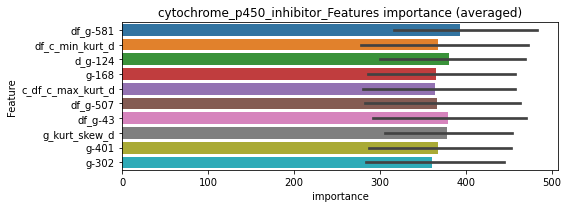

len(train_index) : 2474
len(valid_index) : 1238
================================= fold 1/3 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0527212	valid_1's binary_logloss: 0.103452
[2000]	training's binary_logloss: 0.0267668	valid_1's binary_logloss: 0.0748482
[3000]	training's binary_logloss: 0.0178052	valid_1's binary_logloss: 0.06417
[4000]	training's binary_logloss: 0.013335	valid_1's binary_logloss: 0.0585179
[5000]	training's binary_logloss: 0.0106566	valid_1's binary_logloss: 0.0548172
[6000]	training's binary_logloss: 0.00888435	valid_1's binary_logloss: 0.052215
[7000]	training's binary_logloss: 0.00763496	valid_1's binary_logloss: 0.0504624
[8000]	training's binary_logloss: 0.0066934	valid_1's binary_logloss: 0.0489518
[9000]	training's binary_logloss: 0.0059663	valid_1's binary_logloss: 0.0477479
Early stopping, best iteration is:
[9294]	training's binary_logloss: 0.00578405	valid_1's binary_logloss: 0.0474428


len(train_index) : 2475
len(valid_index) : 1237
================================= fold 2/3 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0531587	valid_1's binary_logloss: 0.0913882
[2000]	training's binary_logloss: 0.0270392	valid_1's binary_logloss: 0.064892
[3000]	training's binary_logloss: 0.0179989	valid_1's binary_logloss: 0.0547745
[4000]	training's binary_logloss: 0.0134721	valid_1's binary_logloss: 0.0495588
[5000]	training's binary_logloss: 0.010775	valid_1's binary_logloss: 0.0463408
[6000]	training's binary_logloss: 0.00897736	valid_1's binary_logloss: 0.0440506
[7000]	training's binary_logloss: 0.00771824	valid_1's binary_logloss: 0.0424149
[8000]	training's binary_logloss: 0.00677271	valid_1's binary_logloss: 0.0410976
[9000]	training's binary_logloss: 0.0060482	valid_1's binary_logloss: 0.0400819
[10000]	training's binary_logloss: 0.00546764	valid_1's binary_logloss: 0.0394309
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00546764	valid_1's binary_logloss: 0.0394309


len(train_index) : 2475
len(valid_index) : 1237
================================= fold 3/3 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0535952	valid_1's binary_logloss: 0.0915713
[2000]	training's binary_logloss: 0.0271564	valid_1's binary_logloss: 0.0645552
[3000]	training's binary_logloss: 0.0180573	valid_1's binary_logloss: 0.0547307
[4000]	training's binary_logloss: 0.0135166	valid_1's binary_logloss: 0.0493376
[5000]	training's binary_logloss: 0.0108164	valid_1's binary_logloss: 0.0459723
[6000]	training's binary_logloss: 0.0090167	valid_1's binary_logloss: 0.0434531
[7000]	training's binary_logloss: 0.00774361	valid_1's binary_logloss: 0.0416535
Early stopping, best iteration is:
[7606]	training's binary_logloss: 0.00714062	valid_1's binary_logloss: 0.0408018


cytochrome_p450_inhibitor logloss: 0.042559836565723874
cytochrome_p450_inhibitor is unpredictable(><)!
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00038456	valid_1's binary_logloss: 0.00683754
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000393947	valid_1's binary_logloss: 0.00233117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000391461	valid_1's binary_logloss: 0.00513425
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000389299	valid_1's binary_logloss: 0.00137871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00038947	valid_1's binary_logloss: 0.00123812


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026713, Threshold: 0.0108326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0108326, conf_0:0.00758, conf_1:0.01408
Num_p_label: 6.0, Expected: 6.0, Adj_threshold_1: 0.0408326
threshold: 0.0408326, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000385931	valid_1's binary_logloss: 0.00853108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000379109	valid_1's binary_logloss: 0.00221885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000400004	valid_1's binary_logloss: 0.00340215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000383956	valid_1's binary_logloss: 0.00111684
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250429, Threshold: 0.0408326, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000400732	valid_1's binary_logloss: 0.00135378


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00151
Num_p_label: 24.0, Expected: 6.0, Threshold: 0.0408326, conf_0:0.03267, conf_1:0.04900
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.0708326
threshold: 0.0708326, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000385931	valid_1's binary_logloss: 0.00853108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000379109	valid_1's binary_logloss: 0.00221885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000400004	valid_1's binary_logloss: 0.00340215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000383956	valid_1's binary_logloss: 0.00111684
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250429, Threshold: 0.0708326, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000400732	valid_1's binary_logloss: 0.00135378


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0708326, conf_0:0.06375, conf_1:0.07792
threshold: 0.0708326, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


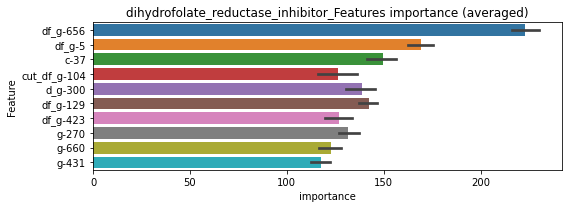

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 dihydrofolate_reductase_inhibitor=================================


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000512709	valid_1's binary_logloss: 0.00610913
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000388494	valid_1's binary_logloss: 0.00252994


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000414691	valid_1's binary_logloss: 0.00496989


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000383171	valid_1's binary_logloss: 0.00129719
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000379523	valid_1's binary_logloss: 0.0012867


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000382343	valid_1's binary_logloss: 0.00129975
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000378221	valid_1's binary_logloss: 0.00128939


dihydrofolate_reductase_inhibitor logloss: 0.0032371373675250587
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000336296	valid_1's binary_logloss: 0.00202975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000337089	valid_1's binary_logloss: 0.00196619
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000342255	valid_1's binary_logloss: 0.000722863
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00033973	valid_1's binary_logloss: 0.00123828
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021377, Threshold: 0.0087331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0087331, conf_0:0.00611, conf_1:0.01135
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_1: 0.0387331


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000406991	valid_1's binary_logloss: 0.00646341


threshold: 0.0387331, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000320555	valid_1's binary_logloss: 0.00147329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000341057	valid_1's binary_logloss: 0.00184028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000328701	valid_1's binary_logloss: 0.000734542
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000326629	valid_1's binary_logloss: 0.000835969
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0637041, Threshold: 0.0387331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0065294 Vs.target_rate: 0.00105
Num_p_label: 26.0, Expected: 4.2, Threshold: 0.0387331, conf_0:0.03099, conf_1:0.04648
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_1: 0.0687331
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_2: 0.0987331


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00035282	valid_1's binary_logloss: 0.00334058


threshold: 0.0987331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000320555	valid_1's binary_logloss: 0.00147329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000341057	valid_1's binary_logloss: 0.00184028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000328701	valid_1's binary_logloss: 0.000734542
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000326629	valid_1's binary_logloss: 0.000835969
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0637041, Threshold: 0.0987331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, Expected: 4.2, Threshold: 0.0987331, conf_0:0.08886, conf_1:0.10861


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00035282	valid_1's binary_logloss: 0.00334058


threshold: 0.0987331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


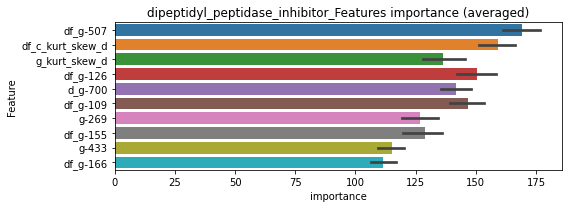

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000337561	valid_1's binary_logloss: 0.0016294


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000322309	valid_1's binary_logloss: 0.00148489
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000322309	valid_1's binary_logloss: 0.00148489


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000331555	valid_1's binary_logloss: 0.000830641


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000324818	valid_1's binary_logloss: 0.000702234
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000324818	valid_1's binary_logloss: 0.000702234


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000326181	valid_1's binary_logloss: 0.00455344


dipeptidyl_peptidase_inhibitor logloss: 0.0018398256940056754
diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000164501	valid_1's binary_logloss: 0.00194591
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000163243	valid_1's binary_logloss: 0.000208529
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000162348	valid_1's binary_logloss: 0.00408524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000164758	valid_1's binary_logloss: 0.000201316
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004731, Threshold: 0.0015373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0015373, conf_0:0.00108, conf_1:0.00200
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0315373
threshold: 0.0315373, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000163315	valid_1's binary_logloss: 0.000210417


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00015073	valid_1's binary_logloss: 0.000583756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000151394	valid_1's binary_logloss: 0.000154733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000149702	valid_1's binary_logloss: 0.00254503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000151962	valid_1's binary_logloss: 0.000161035
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398956, Threshold: 0.0315373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0315373, conf_0:0.02523, conf_1:0.03784
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0615373
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0915373
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1215373
threshold: 0.1215373, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.0001504	valid_1's binary_logloss: 0.000176672


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00015073	valid_1's binary_logloss: 0.000583756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000151394	valid_1's binary_logloss: 0.000154733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000149702	valid_1's binary_logloss: 0.00254503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000151962	valid_1's binary_logloss: 0.000161035
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398956, Threshold: 0.1215373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1215373, conf_0:0.10938, conf_1:0.13369
threshold: 0.1215373, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.0001504	valid_1's binary_logloss: 0.000176672


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


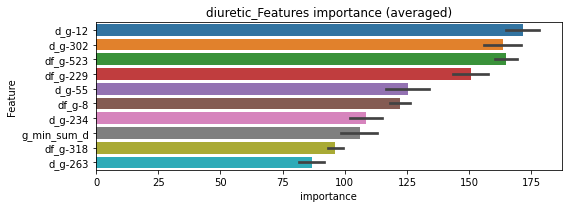

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000155203	valid_1's binary_logloss: 0.000336421


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 diuretic=================================


Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000153111	valid_1's binary_logloss: 0.000333027
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000156233	valid_1's binary_logloss: 0.000164096
Early stopping, best iteration is:
[1128]	training's binary_logloss: 0.000153975	valid_1's binary_logloss: 0.000161742


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000153716	valid_1's binary_logloss: 0.00136554
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.000152051	valid_1's binary_logloss: 0.00135894


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000155966	valid_1's binary_logloss: 0.000173706


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 diuretic=================================


Early stopping, best iteration is:
[1147]	training's binary_logloss: 0.000153756	valid_1's binary_logloss: 0.000171348
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000156102	valid_1's binary_logloss: 0.000190883


diuretic logloss: 0.0004426222277980293


Early stopping, best iteration is:
[1189]	training's binary_logloss: 0.000153076	valid_1's binary_logloss: 0.000187368


dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000480344	valid_1's binary_logloss: 0.0148496
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000490411	valid_1's binary_logloss: 0.015203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000453545	valid_1's binary_logloss: 0.00843372
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000463431	valid_1's binary_logloss: 0.00357503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00047432	valid_1's binary_logloss: 0.00749324


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0034495, Threshold: 0.0869038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0869038, conf_0:0.06083, conf_1:0.11297
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_1: 0.1169038
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_2: 0.1469038
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.1769038
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_4: 0.2069038
threshold: 0.2069038, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000490221	valid_1's binary_logloss: 0.0138711
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00045924	valid_1's binary_logloss: 0.0111822
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.00045733	valid_1's binary_logloss: 0.0079536
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000448998	valid_1's binary_logloss: 0.00333521
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000455795	valid_1's binary_logloss: 0.0063001


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1370795, Threshold: 0.2069038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0190859 Vs.target_rate: 0.00202
Num_p_label: 76.0, Expected: 8.0, Threshold: 0.2069038, conf_0:0.16552, conf_1:0.24828
Num_p_label: 67.0, Expected: 8.0, Adj_threshold_1: 0.2369038
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_2: 0.2669038
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_3: 0.2969038
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_4: 0.3269038
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_5: 0.3569038
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_6: 0.3869038
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_7: 0.4169038
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_8: 0.4469038
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_9: 0.4769038
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_10: 0.5069038
threshold: 0.5069038, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000473799	valid_1's binary_logloss: 0.0125126
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000449384	valid_1's binary_logloss: 0.00647068
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000445319	valid_1's binary_logloss: 0.00964675
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000453899	valid_1's binary_logloss: 0.00316857
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0838463, Threshold: 0.5069038, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000540045	valid_1's binary_logloss: 0.00569624


Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0135610 Vs.target_rate: 0.00202
Num_p_label: 54.0, Expected: 8.0, Threshold: 0.5069038, conf_0:0.45621, conf_1:0.55759
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_1: 0.5369038
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_2: 0.5669038
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_3: 0.5969038
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_4: 0.6269038
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_5: 0.6569038
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_6: 0.6869038
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_7: 0.7169038
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_8: 0.7469038
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_9: 0.7769038
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_10: 0.8069038
threshold: 0.8069038, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


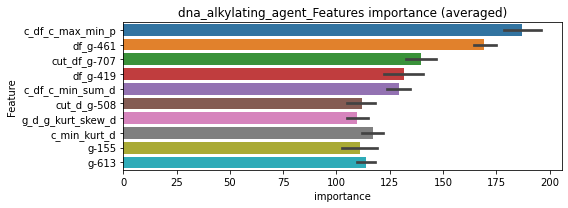

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000446125	valid_1's binary_logloss: 0.00626259


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000446453	valid_1's binary_logloss: 0.00510451


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000498415	valid_1's binary_logloss: 0.00906056


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000446208	valid_1's binary_logloss: 0.00463896


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000452214	valid_1's binary_logloss: 0.0039046


dna_alkylating_agent logloss: 0.005795851965660441


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7382
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7382


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0460423	valid_1's binary_logloss: 0.17492
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.0307081	valid_1's binary_logloss: 0.169251
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0452106	valid_1's binary_logloss: 0.186578
Early stopping, best iteration is:
[1500]	training's binary_logloss: 0.0290385	valid_1's binary_logloss: 0.181257
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0467159	valid_1's binary_logloss: 0.17874
Early stopping, best iteration is:
[1537]	training's binary_logloss: 0.029406	valid_1's binary_logloss: 0.172306


1 / 3, AUC score:0.941, PR-AUC:0.900
y_Threshold: 0.0871495, Threshold: 0.1773615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 708 → Positive_corect_labels: 1270/8150
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.1773615, conf_0:0.12415, conf_1:0.23057
threshold: 0.1773615, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1270.0/8150, y_label_rate: 0.1558282
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0298384	valid_1's binary_logloss: 0.113496
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0168902	valid_1's binary_logloss: 0.10405
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0306272	valid_1's binary_logloss: 0.108266
Early stopping, best iteration is:
[1568]	training's binary_logloss: 0.0185365	valid_1's binary_logloss: 0.0985502
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0312316	valid_1's binary_logloss: 0.0961784
[2000]	training's binary_logloss: 0.0143862	valid_1's binary_logloss: 0.0809764
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.013083	valid_1's binary_logloss: 0.0798305


2 / 3, AUC score:0.991, PR-AUC:0.978
y_Threshold: 0.1020788, Threshold: 0.1773615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 1186.0/7982
p_label_rate: 0.0125565 Vs.target_rate: 0.01688
Num_p_label: 50.0, Expected: 67.2, Threshold: 0.1773615, conf_0:0.14189, conf_1:0.21283
threshold: 0.1773615, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 1186.0/7982, y_label_rate: 0.1485843
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.025745	valid_1's binary_logloss: 0.0818163
[2000]	training's binary_logloss: 0.0119271	valid_1's binary_logloss: 0.0665243
[3000]	training's binary_logloss: 0.00769743	valid_1's binary_logloss: 0.0606154
Early stopping, best iteration is:
[3448]	training's binary_logloss: 0.00664048	valid_1's binary_logloss: 0.0590697
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0260046	valid_1's binary_logloss: 0.080582
[2000]	training's binary_logloss: 0.0120769	valid_1's binary_logloss: 0.0680009
[3000]	training's binary_logloss: 0.00782859	valid_1's binary_logloss: 0.0638123
Early stopping, best iteration is:
[3033]	training's binary_logloss: 0.00774008	valid_1's binary_logloss: 0.0636619
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0260855	valid_1's binary_logloss: 0.0828383
[2000]	training's binary_

3 / 3, AUC score:0.996, PR-AUC:0.992
y_Threshold: 0.0850817, Threshold: 0.1773615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 1152.0/7914
p_label_rate: 0.0118031 Vs.target_rate: 0.01688
Num_p_label: 47.0, Expected: 67.2, Threshold: 0.1773615, conf_0:0.15963, conf_1:0.19510
threshold: 0.1773615, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 1152.0/7914, y_label_rate: 0.1455648


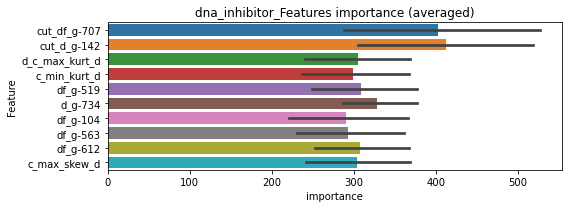

len(train_index) : 5276
len(valid_index) : 2638
================================= fold 1/3 dna_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.049087	valid_1's binary_logloss: 0.0987418
[2000]	training's binary_logloss: 0.024641	valid_1's binary_logloss: 0.0738768
[3000]	training's binary_logloss: 0.0162298	valid_1's binary_logloss: 0.0647075
[4000]	training's binary_logloss: 0.0120805	valid_1's binary_logloss: 0.0599067
Early stopping, best iteration is:
[4923]	training's binary_logloss: 0.00978591	valid_1's binary_logloss: 0.0570905


len(train_index) : 5276
len(valid_index) : 2638
================================= fold 2/3 dna_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0495294	valid_1's binary_logloss: 0.0948276
[2000]	training's binary_logloss: 0.0251465	valid_1's binary_logloss: 0.0722042
[3000]	training's binary_logloss: 0.0166029	valid_1's binary_logloss: 0.0641836
[4000]	training's binary_logloss: 0.0123211	valid_1's binary_logloss: 0.0598149
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.010196	valid_1's binary_logloss: 0.0577647


len(train_index) : 5276
len(valid_index) : 2638
================================= fold 3/3 dna_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.048951	valid_1's binary_logloss: 0.0927427
[2000]	training's binary_logloss: 0.0245456	valid_1's binary_logloss: 0.0701775
[3000]	training's binary_logloss: 0.0161559	valid_1's binary_logloss: 0.0620425
[4000]	training's binary_logloss: 0.0120306	valid_1's binary_logloss: 0.0579409
[5000]	training's binary_logloss: 0.00958635	valid_1's binary_logloss: 0.0553676
Early stopping, best iteration is:
[5372]	training's binary_logloss: 0.0089139	valid_1's binary_logloss: 0.0546721


dna_inhibitor logloss: 0.056509093556858125
dna_inhibitor is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_agonist


dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


selected negative label: 2089


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.0503601	valid_1's binary_logloss: 0.202617
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0531259	valid_1's binary_logloss: 0.143191
[2000]	training's binary_logloss: 0.0257008	valid_1's binary_logloss: 0.120818
[3000]	training's binary_logloss: 0.0167426	valid_1's binary_logloss: 0.114045
Early stopping, best iteration is:
[3448]	training's binary_logloss: 0.0144836	valid_1's binary_logloss: 0.11265
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0492923	valid_1's binary_logloss: 0.184169
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.0377693	valid_1's binary_logloss: 0.177093


1 / 3, AUC score:0.961, PR-AUC:0.919
y_Threshold: 0.0982703, Threshold: 0.1694117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 199 → Positive_corect_labels: 360/2307
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1694117, conf_0:0.11859, conf_1:0.22024
Num_p_label: 24.0, Expected: 20.2, Adj_threshold_1: 0.1994117
threshold: 0.1994117, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 360.0/2307, y_label_rate: 0.1560468
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0373299	valid_1's binary_logloss: 0.125615
[2000]	training's binary_logloss: 0.0181618	valid_1's binary_logloss: 0.105035
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0172713	valid_1's binary_logloss: 0.103912
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.039152	valid_1's binary_logloss: 0.102678
[2000]	training's binary_logloss: 0.0189895	valid_1's binary_logloss: 0.0808691
[3000]	training's binary_logloss: 0.0124751	valid_1's binary_logloss: 0.0728645
Early stopping, best iteration is:
[3514]	training's binary_logloss: 0.0106338	valid_1's binary_logloss: 0.0708651
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0377708	valid_1's binary_logloss: 0.129572
[2000]	training's binary_logloss: 0.0183293	valid_1's binary_logloss: 0.111227
Early stopping, best iteration is:

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.1141095, Threshold: 0.1994117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 344.0/2275
p_label_rate: 0.0060271 Vs.target_rate: 0.00508
Num_p_label: 24.0, Expected: 20.2, Threshold: 0.1994117, conf_0:0.15953, conf_1:0.23929
threshold: 0.1994117, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 344.0/2275, y_label_rate: 0.1512088
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.034851	valid_1's binary_logloss: 0.111698
[2000]	training's binary_logloss: 0.0169538	valid_1's binary_logloss: 0.0938232
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.0119834	valid_1's binary_logloss: 0.0882969
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.034413	valid_1's binary_logloss: 0.116968
[2000]	training's binary_logloss: 0.0167523	valid_1's binary_logloss: 0.0989577
[3000]	training's binary_logloss: 0.0110718	valid_1's binary_logloss: 0.0928784
Early stopping, best iteration is:
[3066]	training's binary_logloss: 0.0108295	valid_1's binary_logloss: 0.0925377
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0368686	valid_1's binary_logloss: 0.0958789
[2000]	training's binary_logloss: 0.0178296	valid_1's binary_logloss: 0.0744063
[3000]	training's binary_loglos

3 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0961022, Threshold: 0.1994117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 331.0/2249
p_label_rate: 0.0072828 Vs.target_rate: 0.00508
Num_p_label: 29.0, Expected: 20.2, Threshold: 0.1994117, conf_0:0.17947, conf_1:0.21935
threshold: 0.1994117, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 331.0/2249, y_label_rate: 0.1471765


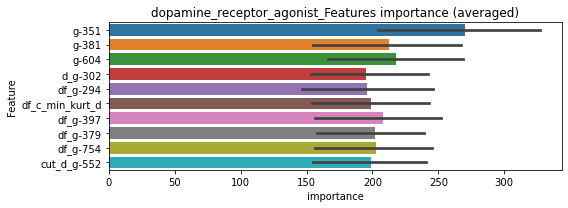

len(train_index) : 1499
len(valid_index) : 750
================================= fold 1/3 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0721644	valid_1's binary_logloss: 0.149975
[2000]	training's binary_logloss: 0.0373857	valid_1's binary_logloss: 0.116936
[3000]	training's binary_logloss: 0.024867	valid_1's binary_logloss: 0.103711
[4000]	training's binary_logloss: 0.018675	valid_1's binary_logloss: 0.0969467
[5000]	training's binary_logloss: 0.0149629	valid_1's binary_logloss: 0.0929288
[6000]	training's binary_logloss: 0.0124633	valid_1's binary_logloss: 0.0899465
Early stopping, best iteration is:
[6821]	training's binary_logloss: 0.0109789	valid_1's binary_logloss: 0.0883026


len(train_index) : 1499
len(valid_index) : 750
================================= fold 2/3 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0746741	valid_1's binary_logloss: 0.135825
[2000]	training's binary_logloss: 0.0385067	valid_1's binary_logloss: 0.100356
[3000]	training's binary_logloss: 0.0256186	valid_1's binary_logloss: 0.0866271
[4000]	training's binary_logloss: 0.0191726	valid_1's binary_logloss: 0.0791373
[5000]	training's binary_logloss: 0.0153409	valid_1's binary_logloss: 0.0745725
[6000]	training's binary_logloss: 0.0127804	valid_1's binary_logloss: 0.0710721
[7000]	training's binary_logloss: 0.0109797	valid_1's binary_logloss: 0.0687611
[8000]	training's binary_logloss: 0.0096364	valid_1's binary_logloss: 0.0667125
Early stopping, best iteration is:
[8471]	training's binary_logloss: 0.00911461	valid_1's binary_logloss: 0.0659188


len(train_index) : 1500
len(valid_index) : 749
================================= fold 3/3 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0727073	valid_1's binary_logloss: 0.136377
[2000]	training's binary_logloss: 0.0377584	valid_1's binary_logloss: 0.10307
[3000]	training's binary_logloss: 0.0252113	valid_1's binary_logloss: 0.089909
[4000]	training's binary_logloss: 0.0189075	valid_1's binary_logloss: 0.0828156
[5000]	training's binary_logloss: 0.0151833	valid_1's binary_logloss: 0.0784548
[6000]	training's binary_logloss: 0.012654	valid_1's binary_logloss: 0.075413
[7000]	training's binary_logloss: 0.0108821	valid_1's binary_logloss: 0.0733883
Early stopping, best iteration is:
[7435]	training's binary_logloss: 0.0102592	valid_1's binary_logloss: 0.0726972


dopamine_receptor_agonist logloss: 0.07564084337542386
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0489217	valid_1's binary_logloss: 0.184801
Early stopping, best iteration is:
[1469]	training's binary_logloss: 0.0319393	valid_1's binary_logloss: 0.178689
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0489963	valid_1's binary_logloss: 0.186869
Early stopping, best iteration is:
[1578]	training's binary_logloss: 0.0293803	valid_1's binary_logloss: 0.179672
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0490508	valid_1's binary_logloss: 0.191739
Early stopping, best iteration is:
[1345]	training's binary_logloss: 0.0353175	valid_1's binary_logloss: 0.185825


1 / 3, AUC score:0.935, PR-AUC:0.894
y_Threshold: 0.0927323, Threshold: 0.1900009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 732 → Positive_corect_labels: 1243/8044
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.1900009, conf_0:0.13300, conf_1:0.24700
threshold: 0.1900009, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1243.0/8044, y_label_rate: 0.1545251
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0333091	valid_1's binary_logloss: 0.114796
[2000]	training's binary_logloss: 0.0155565	valid_1's binary_logloss: 0.0998022
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0147743	valid_1's binary_logloss: 0.0991507
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.032497	valid_1's binary_logloss: 0.12695
Early stopping, best iteration is:
[1489]	training's binary_logloss: 0.0209452	valid_1's binary_logloss: 0.118271
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0339681	valid_1's binary_logloss: 0.106303
[2000]	training's binary_logloss: 0.0157128	valid_1's binary_logloss: 0.0903042
Early stopping, best iteration is:
[2610]	training's binary_logloss: 0.0117558	valid_1's binary_logloss: 0.0862058


2 / 3, AUC score:0.991, PR-AUC:0.977
y_Threshold: 0.1052964, Threshold: 0.1900009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 176 → Positive_corect_labels: 1155.0/7868
p_label_rate: 0.0105475 Vs.target_rate: 0.01780
Num_p_label: 42.0, Expected: 70.9, Threshold: 0.1900009, conf_0:0.15200, conf_1:0.22800
threshold: 0.1900009, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 1155.0/7868, y_label_rate: 0.1467972
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0279905	valid_1's binary_logloss: 0.0950132
[2000]	training's binary_logloss: 0.0131306	valid_1's binary_logloss: 0.0812656
Early stopping, best iteration is:
[2281]	training's binary_logloss: 0.0113802	valid_1's binary_logloss: 0.0800161
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0294971	valid_1's binary_logloss: 0.0984762
[2000]	training's binary_logloss: 0.01369	valid_1's binary_logloss: 0.0842181
Early stopping, best iteration is:
[2509]	training's binary_logloss: 0.0106791	valid_1's binary_logloss: 0.081316
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0292467	valid_1's binary_logloss: 0.0901058
[2000]	training's binary_logloss: 0.0136381	valid_1's binary_logloss: 0.0735281
Early stopping, best iteration is:
[2284]	training's binary_logloss: 0.0117951	valid_1's binary_logloss: 0.071

3 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0953404, Threshold: 0.1900009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 1106.0/7770
p_label_rate: 0.0082873 Vs.target_rate: 0.01780
Num_p_label: 33.0, Expected: 70.9, Threshold: 0.1900009, conf_0:0.17100, conf_1:0.20900
threshold: 0.1900009, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 1106.0/7770, y_label_rate: 0.1423423


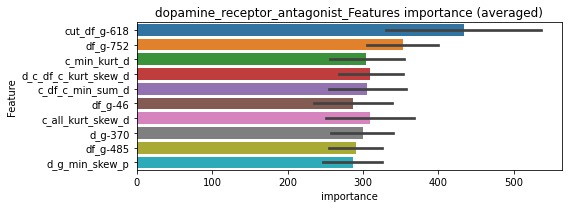

len(train_index) : 5180
len(valid_index) : 2590
================================= fold 1/3 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0548098	valid_1's binary_logloss: 0.110522
[2000]	training's binary_logloss: 0.0278057	valid_1's binary_logloss: 0.0835599
[3000]	training's binary_logloss: 0.0184155	valid_1's binary_logloss: 0.0736368
[4000]	training's binary_logloss: 0.0137327	valid_1's binary_logloss: 0.0681022
Early stopping, best iteration is:
[4089]	training's binary_logloss: 0.013429	valid_1's binary_logloss: 0.067723


len(train_index) : 5180
len(valid_index) : 2590
================================= fold 2/3 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0550818	valid_1's binary_logloss: 0.109519
[2000]	training's binary_logloss: 0.0278748	valid_1's binary_logloss: 0.0837816
[3000]	training's binary_logloss: 0.0184948	valid_1's binary_logloss: 0.0744121
[4000]	training's binary_logloss: 0.0137637	valid_1's binary_logloss: 0.0695628
[5000]	training's binary_logloss: 0.0109528	valid_1's binary_logloss: 0.0665077
Early stopping, best iteration is:
[4986]	training's binary_logloss: 0.0109808	valid_1's binary_logloss: 0.0664795


len(train_index) : 5180
len(valid_index) : 2590
================================= fold 3/3 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0557157	valid_1's binary_logloss: 0.110342
[2000]	training's binary_logloss: 0.0280082	valid_1's binary_logloss: 0.0860921
[3000]	training's binary_logloss: 0.0185397	valid_1's binary_logloss: 0.0774556
Early stopping, best iteration is:
[3937]	training's binary_logloss: 0.0140265	valid_1's binary_logloss: 0.073405


dopamine_receptor_antagonist logloss: 0.06920251272606191
dopamine_receptor_antagonist is unpredictable(><)!


mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0436238	valid_1's binary_logloss: 0.149227
[2000]	training's binary_logloss: 0.0200501	valid_1's binary_logloss: 0.131225
Early stopping, best iteration is:
[2618]	training's binary_logloss: 0.0147851	valid_1's binary_logloss: 0.127108
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0431502	valid_1's binary_logloss: 0.150205
Early stopping, best iteration is:
[1641]	training's binary_logloss: 0.0246736	valid_1's binary_logloss: 0.136979
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0425536	valid_1's binary_logloss: 0.163088
Early stopping, best iteration is:
[1740]	training's binary_logloss: 0.0228127	valid_1's binary_logloss: 0.148264


1 / 3, AUC score:0.966, PR-AUC:0.938
y_Threshold: 0.0821262, Threshold: 0.1943279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 585 → Positive_corect_labels: 1369/8479
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.1943279, conf_0:0.13603, conf_1:0.25263
threshold: 0.1943279, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1369.0/8479, y_label_rate: 0.1614577
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0346356	valid_1's binary_logloss: 0.108946
[2000]	training's binary_logloss: 0.0159101	valid_1's binary_logloss: 0.0880162
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0144213	valid_1's binary_logloss: 0.0860632
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0337611	valid_1's binary_logloss: 0.119483
[2000]	training's binary_logloss: 0.0155888	valid_1's binary_logloss: 0.101563
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.012241	valid_1's binary_logloss: 0.0978916
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0341567	valid_1's binary_logloss: 0.117908
[2000]	training's binary_logloss: 0.0157158	valid_1's binary_logloss: 0.0987458
Early stopping, best iteration is:
[2888]	training's binary_logloss: 0.0104856	valid_1's binary_logloss: 0.09271

2 / 3, AUC score:0.990, PR-AUC:0.978
y_Threshold: 0.1055572, Threshold: 0.1943279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 1280.0/8301
p_label_rate: 0.0158212 Vs.target_rate: 0.01411
Num_p_label: 63.0, Expected: 56.2, Threshold: 0.1943279, conf_0:0.15546, conf_1:0.23319
threshold: 0.1943279, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1280.0/8301, y_label_rate: 0.1541983
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0299234	valid_1's binary_logloss: 0.105252
[2000]	training's binary_logloss: 0.0138068	valid_1's binary_logloss: 0.0870827
[3000]	training's binary_logloss: 0.00890566	valid_1's binary_logloss: 0.0814799
Early stopping, best iteration is:
[3182]	training's binary_logloss: 0.00835334	valid_1's binary_logloss: 0.0807052
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0306013	valid_1's binary_logloss: 0.0973082
[2000]	training's binary_logloss: 0.0141304	valid_1's binary_logloss: 0.0773384
[3000]	training's binary_logloss: 0.00908786	valid_1's binary_logloss: 0.0703247
[4000]	training's binary_logloss: 0.00669707	valid_1's binary_logloss: 0.066908
Early stopping, best iteration is:
[4157]	training's binary_logloss: 0.00642946	valid_1's binary_logloss: 0.0664134
Training until validation scores don't improve for 39 rounds
[1000]	training's binary

3 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.1013807, Threshold: 0.1943279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 1231.0/8203
p_label_rate: 0.0168257 Vs.target_rate: 0.01411
Num_p_label: 67.0, Expected: 56.2, Threshold: 0.1943279, conf_0:0.17490, conf_1:0.21376
threshold: 0.1943279, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 1231.0/8203, y_label_rate: 0.1500670


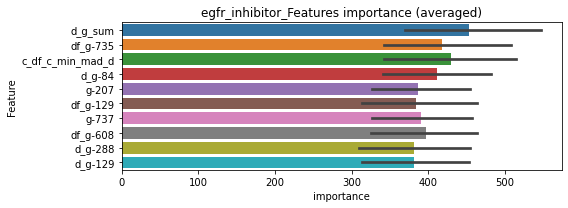

len(train_index) : 5468
len(valid_index) : 2735
================================= fold 1/3 egfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0615654	valid_1's binary_logloss: 0.124496
[2000]	training's binary_logloss: 0.0308478	valid_1's binary_logloss: 0.0899332
[3000]	training's binary_logloss: 0.0202297	valid_1's binary_logloss: 0.0770129
[4000]	training's binary_logloss: 0.0149935	valid_1's binary_logloss: 0.0699219
[5000]	training's binary_logloss: 0.0119148	valid_1's binary_logloss: 0.0658617
[6000]	training's binary_logloss: 0.0098807	valid_1's binary_logloss: 0.0628937
[7000]	training's binary_logloss: 0.00844897	valid_1's binary_logloss: 0.0609021
Early stopping, best iteration is:
[7420]	training's binary_logloss: 0.00796341	valid_1's binary_logloss: 0.060114


len(train_index) : 5469
len(valid_index) : 2734
================================= fold 2/3 egfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0608086	valid_1's binary_logloss: 0.121934
[2000]	training's binary_logloss: 0.0302336	valid_1's binary_logloss: 0.0895522
[3000]	training's binary_logloss: 0.019841	valid_1's binary_logloss: 0.0770624
[4000]	training's binary_logloss: 0.0147585	valid_1's binary_logloss: 0.0706813
[5000]	training's binary_logloss: 0.0117277	valid_1's binary_logloss: 0.0664261
Early stopping, best iteration is:
[5424]	training's binary_logloss: 0.010776	valid_1's binary_logloss: 0.0648553


len(train_index) : 5469
len(valid_index) : 2734
================================= fold 3/3 egfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0607411	valid_1's binary_logloss: 0.124132
[2000]	training's binary_logloss: 0.0302055	valid_1's binary_logloss: 0.090455
[3000]	training's binary_logloss: 0.0197997	valid_1's binary_logloss: 0.0777123
[4000]	training's binary_logloss: 0.0146823	valid_1's binary_logloss: 0.0708216
[5000]	training's binary_logloss: 0.0116786	valid_1's binary_logloss: 0.0665557
Early stopping, best iteration is:
[5747]	training's binary_logloss: 0.0101256	valid_1's binary_logloss: 0.0639973


egfr_inhibitor logloss: 0.06298850215931093
egfr_inhibitor is unpredictable(><)!
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000220214	valid_1's binary_logloss: 0.000447599
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000222673	valid_1's binary_logloss: 0.00305155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000215741	valid_1's binary_logloss: 0.000444458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000215281	valid_1's binary_logloss: 0.00106772
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008123, Threshold: 0.0025098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0025098, conf_0:0.00176, conf_1:0.00326
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0325098
threshold: 0.0325098, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00021488	valid_1's binary_logloss: 0.000552806


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000207899	valid_1's binary_logloss: 0.000469685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000210919	valid_1's binary_logloss: 0.00259147
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000205793	valid_1's binary_logloss: 0.000402728
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000208615	valid_1's binary_logloss: 0.000916283
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452580, Threshold: 0.0325098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, Expected: 2.0, Threshold: 0.0325098, conf_0:0.02601, conf_1:0.03901
threshold: 0.0325098, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000205653	valid_1's binary_logloss: 0.000546837


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000207899	valid_1's binary_logloss: 0.000469685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000210919	valid_1's binary_logloss: 0.00259147
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000205793	valid_1's binary_logloss: 0.000402728
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000208615	valid_1's binary_logloss: 0.000916283
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452580, Threshold: 0.0325098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, Expected: 2.0, Threshold: 0.0325098, conf_0:0.02926, conf_1:0.03576
threshold: 0.0325098, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000205653	valid_1's binary_logloss: 0.000546837


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


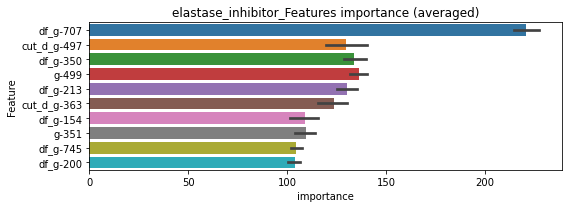

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 elastase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 elastase_inhibitor=================================


Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000216255	valid_1's binary_logloss: 0.000396183
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 elastase_inhibitor=================================


Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000220461	valid_1's binary_logloss: 0.00166961
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 elastase_inhibitor=================================


Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000213253	valid_1's binary_logloss: 0.000500434
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 elastase_inhibitor=================================


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000217409	valid_1's binary_logloss: 0.000440435
Training until validation scores don't improve for 29 rounds


elastase_inhibitor logloss: 0.0006949582578986348


Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000211064	valid_1's binary_logloss: 0.000467158


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000332921	valid_1's binary_logloss: 0.00279617
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000304958	valid_1's binary_logloss: 0.00105272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000302372	valid_1's binary_logloss: 0.00133957
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000305749	valid_1's binary_logloss: 0.000844118
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018141, Threshold: 0.0061654, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0061654, conf_0:0.00432, conf_1:0.00801
Num_p_label: 2.0, Expected: 3.3, Adj_threshold_1: 0.0361654


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00031084	valid_1's binary_logloss: 0.000709246


threshold: 0.0361654, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000295699	valid_1's binary_logloss: 0.00203488
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000290207	valid_1's binary_logloss: 0.00128767
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000293026	valid_1's binary_logloss: 0.00081584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000296987	valid_1's binary_logloss: 0.000625103
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0663991, Threshold: 0.0361654, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0035158 Vs.target_rate: 0.00084
Num_p_label: 14.0, Expected: 3.3, Threshold: 0.0361654, conf_0:0.02893, conf_1:0.04340
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_1: 0.0661654


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000298393	valid_1's binary_logloss: 0.000616266


threshold: 0.0661654, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000295699	valid_1's binary_logloss: 0.00203488
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000290207	valid_1's binary_logloss: 0.00128767
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000293026	valid_1's binary_logloss: 0.00081584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000296987	valid_1's binary_logloss: 0.000625103
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0663991, Threshold: 0.0661654, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00084
Num_p_label: 8.0, Expected: 3.3, Threshold: 0.0661654, conf_0:0.05955, conf_1:0.07278


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000298393	valid_1's binary_logloss: 0.000616266


threshold: 0.0661654, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


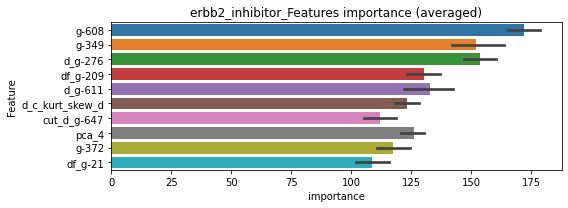

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 erbb2_inhibitor=================================


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000355837	valid_1's binary_logloss: 0.00398189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000294406	valid_1's binary_logloss: 0.0012132


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000295635	valid_1's binary_logloss: 0.000884895


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000295583	valid_1's binary_logloss: 0.000614273
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000295469	valid_1's binary_logloss: 0.000614109


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000295791	valid_1's binary_logloss: 0.000604792
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.00029536	valid_1's binary_logloss: 0.000603987


erbb2_inhibitor logloss: 0.0014602786455005488


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 4398
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 4398


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0340702	valid_1's binary_logloss: 0.103728
Early stopping, best iteration is:
[1794]	training's binary_logloss: 0.0183105	valid_1's binary_logloss: 0.0931132
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0330866	valid_1's binary_logloss: 0.112461
[2000]	training's binary_logloss: 0.0162531	valid_1's binary_logloss: 0.102348
Early stopping, best iteration is:
[2080]	training's binary_logloss: 0.0156189	valid_1's binary_logloss: 0.102062
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0332656	valid_1's binary_logloss: 0.120563
Early stopping, best iteration is:
[1648]	training's binary_logloss: 0.0199902	valid_1's binary_logloss: 0.114118


1 / 3, AUC score:0.980, PR-AUC:0.963
y_Threshold: 0.0551755, Threshold: 0.0967445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 281 → Positive_corect_labels: 827/4996
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0967445, conf_0:0.06772, conf_1:0.12577
Num_p_label: 20.0, Expected: 26.4, Adj_threshold_1: 0.1267445
threshold: 0.1267445, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 827.0/4996, y_label_rate: 0.1655324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0253825	valid_1's binary_logloss: 0.0913455
Early stopping, best iteration is:
[1897]	training's binary_logloss: 0.0129097	valid_1's binary_logloss: 0.082535
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0263403	valid_1's binary_logloss: 0.0819416
[2000]	training's binary_logloss: 0.0126777	valid_1's binary_logloss: 0.0702691
Early stopping, best iteration is:
[2954]	training's binary_logloss: 0.00845512	valid_1's binary_logloss: 0.0663933
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0265807	valid_1's binary_logloss: 0.0842484
Early stopping, best iteration is:
[1730]	training's binary_logloss: 0.0149267	valid_1's binary_logloss: 0.0753707


2 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0752538, Threshold: 0.1267445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 791.0/4924
p_label_rate: 0.0090407 Vs.target_rate: 0.00663
Num_p_label: 36.0, Expected: 26.4, Threshold: 0.1267445, conf_0:0.10140, conf_1:0.15209
threshold: 0.1267445, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 791.0/4924, y_label_rate: 0.1606418
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0229523	valid_1's binary_logloss: 0.0713041
[2000]	training's binary_logloss: 0.0110825	valid_1's binary_logloss: 0.0600753
[3000]	training's binary_logloss: 0.00726677	valid_1's binary_logloss: 0.056319
Early stopping, best iteration is:
[3066]	training's binary_logloss: 0.00710376	valid_1's binary_logloss: 0.056158
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.022583	valid_1's binary_logloss: 0.0633821
[2000]	training's binary_logloss: 0.0108973	valid_1's binary_logloss: 0.0517212
Early stopping, best iteration is:
[2668]	training's binary_logloss: 0.00805603	valid_1's binary_logloss: 0.0487247
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0227022	valid_1's binary_logloss: 0.0653401
[2000]	training's binary_logloss: 0.0110139	valid_1's binary_logloss: 0.0538346
[3000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0631974, Threshold: 0.1267445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 773.0/4888
p_label_rate: 0.0067805 Vs.target_rate: 0.00663
Num_p_label: 27.0, Expected: 26.4, Threshold: 0.1267445, conf_0:0.11407, conf_1:0.13942
threshold: 0.1267445, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 773.0/4888, y_label_rate: 0.1581424


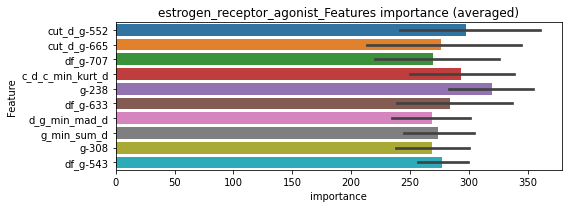

len(train_index) : 3258
len(valid_index) : 1630
================================= fold 1/3 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0457919	valid_1's binary_logloss: 0.0795945
[2000]	training's binary_logloss: 0.0233635	valid_1's binary_logloss: 0.0576327
[3000]	training's binary_logloss: 0.015609	valid_1's binary_logloss: 0.0494441
[4000]	training's binary_logloss: 0.0116942	valid_1's binary_logloss: 0.0452756
[5000]	training's binary_logloss: 0.00934125	valid_1's binary_logloss: 0.0426777
[6000]	training's binary_logloss: 0.00779958	valid_1's binary_logloss: 0.0408734
[7000]	training's binary_logloss: 0.00668339	valid_1's binary_logloss: 0.0395805
[8000]	training's binary_logloss: 0.00586618	valid_1's binary_logloss: 0.0384859
Early stopping, best iteration is:
[8501]	training's binary_logloss: 0.00552727	valid_1's binary_logloss: 0.03811


len(train_index) : 3259
len(valid_index) : 1629
================================= fold 2/3 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0449543	valid_1's binary_logloss: 0.0818858
[2000]	training's binary_logloss: 0.0229498	valid_1's binary_logloss: 0.0628266
[3000]	training's binary_logloss: 0.0153361	valid_1's binary_logloss: 0.055849
[4000]	training's binary_logloss: 0.0115082	valid_1's binary_logloss: 0.0520165
[5000]	training's binary_logloss: 0.00919692	valid_1's binary_logloss: 0.0499587
Early stopping, best iteration is:
[5448]	training's binary_logloss: 0.00844782	valid_1's binary_logloss: 0.0489361


len(train_index) : 3259
len(valid_index) : 1629
================================= fold 3/3 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0441613	valid_1's binary_logloss: 0.0886198
[2000]	training's binary_logloss: 0.0228038	valid_1's binary_logloss: 0.0684243
[3000]	training's binary_logloss: 0.0152643	valid_1's binary_logloss: 0.0611798
[4000]	training's binary_logloss: 0.0114661	valid_1's binary_logloss: 0.0573081
[5000]	training's binary_logloss: 0.00917202	valid_1's binary_logloss: 0.0548715
[6000]	training's binary_logloss: 0.00766868	valid_1's binary_logloss: 0.0532817
Early stopping, best iteration is:
[5966]	training's binary_logloss: 0.00770816	valid_1's binary_logloss: 0.0532596


estrogen_receptor_agonist logloss: 0.04676678692408856
estrogen_receptor_agonist is unpredictable(><)!
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000489053	valid_1's binary_logloss: 0.00889917
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000528898	valid_1's binary_logloss: 0.013073
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000520601	valid_1's binary_logloss: 0.00795853
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000493264	valid_1's binary_logloss: 0.00245487
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038355, Threshold: 0.1803104, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00057925	valid_1's binary_logloss: 0.023339


Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1803104, conf_0:0.12622, conf_1:0.23440
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_1: 0.2103104
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_2: 0.2403104
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.2703104
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_4: 0.3003104
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_5: 0.3303104
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_6: 0.3603104
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_7: 0.3903104
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.4203104
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4503104
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_10: 0.4803104
threshold: 0.4803104, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000469439	valid_1's binary_logloss: 0.011367
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000464974	valid_1's binary_logloss: 0.0096921
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000584662	valid_1's binary_logloss: 0.014804
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000467032	valid_1's binary_logloss: 0.00155965
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0005083	valid_1's binary_logloss: 0.0173032


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178907, Threshold: 0.4803104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0087896 Vs.target_rate: 0.00202
Num_p_label: 35.0, Expected: 8.0, Threshold: 0.4803104, conf_0:0.38425, conf_1:0.57637
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5103104
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.5403104
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_3: 0.5703104
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6003104
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6303104
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.6603104
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.6903104
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.7203104
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_9: 0.7503104
threshold: 0.7503104, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pse

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000626442	valid_1's binary_logloss: 0.0154556
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000472985	valid_1's binary_logloss: 0.00737824
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000458766	valid_1's binary_logloss: 0.00335721
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000434844	valid_1's binary_logloss: 0.00841812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000490077	valid_1's binary_logloss: 0.0258077


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232932, Threshold: 0.7503104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0047715 Vs.target_rate: 0.00202
Num_p_label: 19.0, Expected: 8.0, Threshold: 0.7503104, conf_0:0.67528, conf_1:0.82534
threshold: 0.7503104, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


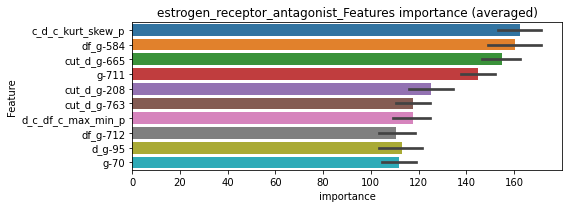

len(train_index) : 3036
len(valid_index) : 760
================================= fold 1/5 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759
================================= fold 2/5 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000956649	valid_1's binary_logloss: 0.00932248
Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000619239	valid_1's binary_logloss: 0.0146856


================================= fold 3/5 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759
================================= fold 4/5 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000642992	valid_1's binary_logloss: 0.00992742
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000458378	valid_1's binary_logloss: 0.00304349


len(train_index) : 3037
len(valid_index) : 759
================================= fold 5/5 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


estrogen_receptor_antagonist logloss: 0.009419544438926805


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000653961	valid_1's binary_logloss: 0.0101189


faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000428743	valid_1's binary_logloss: 0.00710725
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00040441	valid_1's binary_logloss: 0.00506159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000406052	valid_1's binary_logloss: 0.00391332
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000381598	valid_1's binary_logloss: 0.0019522
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000401527	valid_1's binary_logloss: 0.0022905


y_Threshold: 0.0026372, Threshold: 0.0089253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0089253, conf_0:0.00625, conf_1:0.01160
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0389253
threshold: 0.0389253, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000393024	valid_1's binary_logloss: 0.00682464
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000382126	valid_1's binary_logloss: 0.00320366
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000369932	valid_1's binary_logloss: 0.00389737
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384468	valid_1's binary_logloss: 0.0016608
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000380846	valid_1's binary_logloss: 0.00312943


y_Threshold: 0.0354379, Threshold: 0.0389253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.0389253, conf_0:0.03114, conf_1:0.04671
threshold: 0.0389253, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000393024	valid_1's binary_logloss: 0.00682464
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000382126	valid_1's binary_logloss: 0.00320366
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000369932	valid_1's binary_logloss: 0.00389737
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000384468	valid_1's binary_logloss: 0.0016608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000380846	valid_1's binary_logloss: 0.00312943


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354379, Threshold: 0.0389253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.0389253, conf_0:0.03503, conf_1:0.04282
threshold: 0.0389253, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


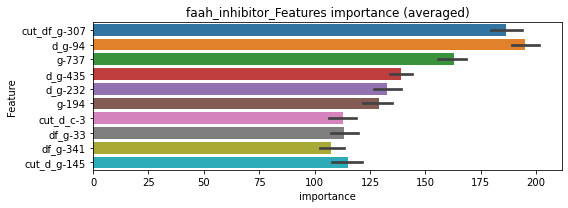

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000381928	valid_1's binary_logloss: 0.00537445


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 faah_inhibitor=================================


Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000476167	valid_1's binary_logloss: 0.00421795
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000391985	valid_1's binary_logloss: 0.00314025


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000382006	valid_1's binary_logloss: 0.00157351


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000377297	valid_1's binary_logloss: 0.00243304


faah_inhibitor logloss: 0.0033483142132891327
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000286286	valid_1's binary_logloss: 0.00151967
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000267376	valid_1's binary_logloss: 0.000744864
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000271594	valid_1's binary_logloss: 0.000977142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000273661	valid_1's binary_logloss: 0.00159751
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012936, Threshold: 0.0039740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039740, conf_0:0.00278, conf_1:0.00517
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0339740
threshold: 0.0339740, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000275961	valid_1's binary_logloss: 0.00356453


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00026987	valid_1's binary_logloss: 0.00207683
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000267448	valid_1's binary_logloss: 0.000628068
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000264691	valid_1's binary_logloss: 0.000625089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000267465	valid_1's binary_logloss: 0.000982881
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177715, Threshold: 0.0339740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0339740, conf_0:0.02718, conf_1:0.04077
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0639740
threshold: 0.0639740, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000302114	valid_1's binary_logloss: 0.00405361


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00026987	valid_1's binary_logloss: 0.00207683
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000267448	valid_1's binary_logloss: 0.000628068
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000264691	valid_1's binary_logloss: 0.000625089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000267465	valid_1's binary_logloss: 0.000982881
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177715, Threshold: 0.0639740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0639740, conf_0:0.05758, conf_1:0.07037
threshold: 0.0639740, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000302114	valid_1's binary_logloss: 0.00405361


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


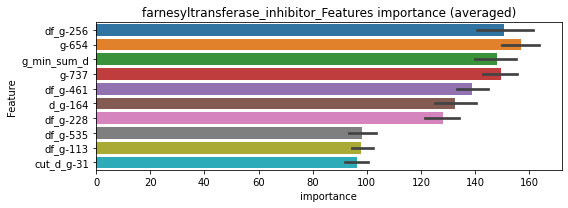

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000272309	valid_1's binary_logloss: 0.00184871


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000265001	valid_1's binary_logloss: 0.000687747
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000263455	valid_1's binary_logloss: 0.000686028


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000263724	valid_1's binary_logloss: 0.000594246
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000263728	valid_1's binary_logloss: 0.000594238


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000263757	valid_1's binary_logloss: 0.000818458
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000263757	valid_1's binary_logloss: 0.000818458


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


farnesyltransferase_inhibitor logloss: 0.0014111545286483386


Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000291818	valid_1's binary_logloss: 0.00310918


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000329047	valid_1's binary_logloss: 0.00121881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000330163	valid_1's binary_logloss: 0.00349934
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000334963	valid_1's binary_logloss: 0.00759003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000321432	valid_1's binary_logloss: 0.00264852
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021280, Threshold: 0.0095001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0095001, conf_0:0.00665, conf_1:0.01235
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0395001


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000421997	valid_1's binary_logloss: 0.00435016


threshold: 0.0395001, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000317769	valid_1's binary_logloss: 0.00112123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000318691	valid_1's binary_logloss: 0.00269117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000317344	valid_1's binary_logloss: 0.00881169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000318939	valid_1's binary_logloss: 0.00247311
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253741, Threshold: 0.0395001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, Expected: 4.2, Threshold: 0.0395001, conf_0:0.03160, conf_1:0.04740
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0695001


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00033115	valid_1's binary_logloss: 0.00487574


threshold: 0.0695001, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000317769	valid_1's binary_logloss: 0.00112123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000318691	valid_1's binary_logloss: 0.00269117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000317344	valid_1's binary_logloss: 0.00881169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000318939	valid_1's binary_logloss: 0.00247311
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253741, Threshold: 0.0695001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0695001, conf_0:0.06255, conf_1:0.07645


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00033115	valid_1's binary_logloss: 0.00487574


threshold: 0.0695001, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


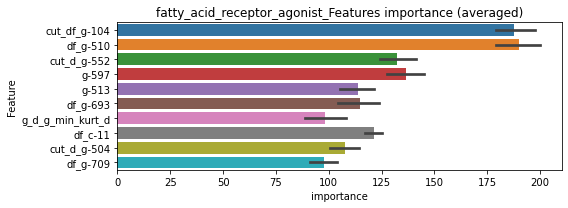

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000329757	valid_1's binary_logloss: 0.000915236


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000331194	valid_1's binary_logloss: 0.00163698


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762


Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000342557	valid_1's binary_logloss: 0.00911442


================================= fold 4/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000324581	valid_1's binary_logloss: 0.00135243


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000359986	valid_1's binary_logloss: 0.00510219


fatty_acid_receptor_agonist logloss: 0.0036230522549998414
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000497005	valid_1's binary_logloss: 0.0184103
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000480797	valid_1's binary_logloss: 0.00881235
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000491933	valid_1's binary_logloss: 0.00894979
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000477915	valid_1's binary_logloss: 0.00499104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00048704	valid_1's binary_logloss: 0.00629871


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036500, Threshold: 0.0172548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0172548, conf_0:0.01208, conf_1:0.02243
Num_p_label: 21.0, Expected: 8.4, Adj_threshold_1: 0.0472548
Num_p_label: 14.0, Expected: 8.4, Adj_threshold_2: 0.0772548
threshold: 0.0772548, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000499227	valid_1's binary_logloss: 0.0209075
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000489178	valid_1's binary_logloss: 0.00676469
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000495162	valid_1's binary_logloss: 0.0100616
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000483716	valid_1's binary_logloss: 0.00464505
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000473652	valid_1's binary_logloss: 0.00621701


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176917, Threshold: 0.0772548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00210
Num_p_label: 19.0, Expected: 8.4, Threshold: 0.0772548, conf_0:0.06180, conf_1:0.09271
threshold: 0.0772548, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000471157	valid_1's binary_logloss: 0.003351
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000474438	valid_1's binary_logloss: 0.00875487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000479937	valid_1's binary_logloss: 0.00224149
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000483398	valid_1's binary_logloss: 0.00264252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000515856	valid_1's binary_logloss: 0.0206309


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163435, Threshold: 0.0772548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0050226 Vs.target_rate: 0.00210
Num_p_label: 20.0, Expected: 8.4, Threshold: 0.0772548, conf_0:0.06953, conf_1:0.08498
threshold: 0.0772548, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


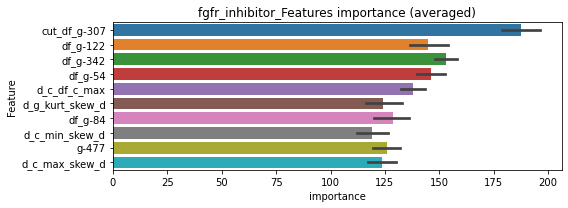

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000496435	valid_1's binary_logloss: 0.00372184


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000475618	valid_1's binary_logloss: 0.0081843


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000482536	valid_1's binary_logloss: 0.00236273


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000478058	valid_1's binary_logloss: 0.00247297
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000476895	valid_1's binary_logloss: 0.00246663


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000480511	valid_1's binary_logloss: 0.0186418


fgfr_inhibitor logloss: 0.007075483228278965


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 7069
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 7069


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0376284	valid_1's binary_logloss: 0.127805
[2000]	training's binary_logloss: 0.0180905	valid_1's binary_logloss: 0.115018
Early stopping, best iteration is:
[1981]	training's binary_logloss: 0.0182648	valid_1's binary_logloss: 0.114759
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0368308	valid_1's binary_logloss: 0.127545
[2000]	training's binary_logloss: 0.0174473	valid_1's binary_logloss: 0.114479
Early stopping, best iteration is:
[2359]	training's binary_logloss: 0.0146938	valid_1's binary_logloss: 0.112771
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0378803	valid_1's binary_logloss: 0.121146
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0222308	valid_1's binary_logloss: 0.109017


1 / 3, AUC score:0.977, PR-AUC:0.955
y_Threshold: 0.0660882, Threshold: 0.1376006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 486 → Positive_corect_labels: 1312/7996
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.1376006, conf_0:0.09632, conf_1:0.17888
threshold: 0.1376006, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1312.0/7996, y_label_rate: 0.1640820
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.029409	valid_1's binary_logloss: 0.0977213
[2000]	training's binary_logloss: 0.0137352	valid_1's binary_logloss: 0.0823494
Early stopping, best iteration is:
[2899]	training's binary_logloss: 0.0092344	valid_1's binary_logloss: 0.0772465
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0292985	valid_1's binary_logloss: 0.0983559
[2000]	training's binary_logloss: 0.0137078	valid_1's binary_logloss: 0.0842574
Early stopping, best iteration is:
[2387]	training's binary_logloss: 0.0112957	valid_1's binary_logloss: 0.0817609
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0293305	valid_1's binary_logloss: 0.096896
Early stopping, best iteration is:
[1907]	training's binary_logloss: 0.0144526	valid_1's binary_logloss: 0.083656


2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0978097, Threshold: 0.1376006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1245.0/7862
p_label_rate: 0.0165746 Vs.target_rate: 0.01172
Num_p_label: 66.0, Expected: 46.7, Threshold: 0.1376006, conf_0:0.11008, conf_1:0.16512
threshold: 0.1376006, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 1245.0/7862, y_label_rate: 0.1583567
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0259794	valid_1's binary_logloss: 0.0787098
[2000]	training's binary_logloss: 0.0122658	valid_1's binary_logloss: 0.0652597
[3000]	training's binary_logloss: 0.00799233	valid_1's binary_logloss: 0.0604204
Early stopping, best iteration is:
[3216]	training's binary_logloss: 0.00743564	valid_1's binary_logloss: 0.0597586
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0260889	valid_1's binary_logloss: 0.0780921
[2000]	training's binary_logloss: 0.012233	valid_1's binary_logloss: 0.0637635
[3000]	training's binary_logloss: 0.00794226	valid_1's binary_logloss: 0.0589229
Early stopping, best iteration is:
[3190]	training's binary_logloss: 0.00744545	valid_1's binary_logloss: 0.0582284
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.025756	valid_1's binary_logloss: 0.0863788
[2000]	training's binary_

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0924565, Threshold: 0.1376006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1215.0/7802
p_label_rate: 0.0180814 Vs.target_rate: 0.01172
Num_p_label: 72.0, Expected: 46.7, Threshold: 0.1376006, conf_0:0.12384, conf_1:0.15136
Num_p_label: 51.0, Expected: 46.7, Adj_threshold_1: 0.1676006
threshold: 0.1676006, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1215.0/7802, y_label_rate: 0.1557293


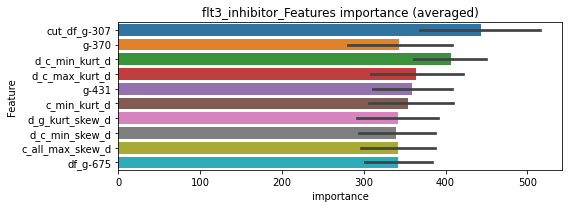

len(train_index) : 5201
len(valid_index) : 2601
================================= fold 1/3 flt3_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0508283	valid_1's binary_logloss: 0.101846
[2000]	training's binary_logloss: 0.0257441	valid_1's binary_logloss: 0.0774957
[3000]	training's binary_logloss: 0.0170335	valid_1's binary_logloss: 0.0683261
[4000]	training's binary_logloss: 0.012673	valid_1's binary_logloss: 0.063514
[5000]	training's binary_logloss: 0.0100835	valid_1's binary_logloss: 0.0602913
Early stopping, best iteration is:
[5491]	training's binary_logloss: 0.00918883	valid_1's binary_logloss: 0.059201


len(train_index) : 5201
len(valid_index) : 2601
================================= fold 2/3 flt3_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0510076	valid_1's binary_logloss: 0.106267
[2000]	training's binary_logloss: 0.025654	valid_1's binary_logloss: 0.0822716
[3000]	training's binary_logloss: 0.0169005	valid_1's binary_logloss: 0.0731042
[4000]	training's binary_logloss: 0.0125606	valid_1's binary_logloss: 0.0685443
[5000]	training's binary_logloss: 0.00998246	valid_1's binary_logloss: 0.0656431
[6000]	training's binary_logloss: 0.00831773	valid_1's binary_logloss: 0.0639115
Early stopping, best iteration is:
[6262]	training's binary_logloss: 0.00796292	valid_1's binary_logloss: 0.0634208


len(train_index) : 5202
len(valid_index) : 2600
================================= fold 3/3 flt3_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0532275	valid_1's binary_logloss: 0.0926645
[2000]	training's binary_logloss: 0.0269426	valid_1's binary_logloss: 0.0667382
[3000]	training's binary_logloss: 0.0178057	valid_1's binary_logloss: 0.057062
[4000]	training's binary_logloss: 0.0132525	valid_1's binary_logloss: 0.0519499
[5000]	training's binary_logloss: 0.0105156	valid_1's binary_logloss: 0.0486681
[6000]	training's binary_logloss: 0.00875618	valid_1's binary_logloss: 0.0465105
Early stopping, best iteration is:
[6594]	training's binary_logloss: 0.00795534	valid_1's binary_logloss: 0.0454464


flt3_inhibitor logloss: 0.05602408309777582
flt3_inhibitor is unpredictable(><)!
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000271446	valid_1's binary_logloss: 0.000807167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000311199	valid_1's binary_logloss: 0.00226904
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000273088	valid_1's binary_logloss: 0.00250881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000272002	valid_1's binary_logloss: 0.00173584
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014353, Threshold: 0.0048908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0048908, conf_0:0.00342, conf_1:0.00636
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0348908


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000277359	valid_1's binary_logloss: 0.00127548


threshold: 0.0348908, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000260602	valid_1's binary_logloss: 0.000901206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000261877	valid_1's binary_logloss: 0.00147561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000262459	valid_1's binary_logloss: 0.00243581
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000266411	valid_1's binary_logloss: 0.0010458
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1075416, Threshold: 0.0348908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0348908, conf_0:0.02791, conf_1:0.04187
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0648908


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00026178	valid_1's binary_logloss: 0.000868439


threshold: 0.0648908, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000260602	valid_1's binary_logloss: 0.000901206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000261877	valid_1's binary_logloss: 0.00147561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000262459	valid_1's binary_logloss: 0.00243581
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000266411	valid_1's binary_logloss: 0.0010458
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1075416, Threshold: 0.0648908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0648908, conf_0:0.05840, conf_1:0.07138


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00026178	valid_1's binary_logloss: 0.000868439


threshold: 0.0648908, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


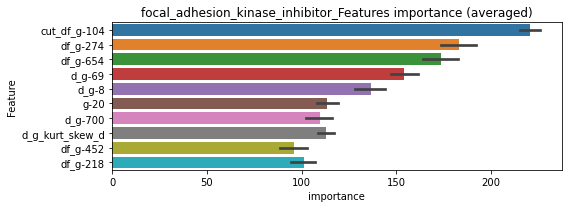

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264193	valid_1's binary_logloss: 0.000701498
Early stopping, best iteration is:
[1200]	training's binary_logloss: 0.000258175	valid_1's binary_logloss: 0.00069188


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264992	valid_1's binary_logloss: 0.00134726
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000263968	valid_1's binary_logloss: 0.00134233


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264204	valid_1's binary_logloss: 0.00198237
Early stopping, best iteration is:
[1085]	training's binary_logloss: 0.000261536	valid_1's binary_logloss: 0.0019725


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264837	valid_1's binary_logloss: 0.0010128
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000263577	valid_1's binary_logloss: 0.00100851


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264723	valid_1's binary_logloss: 0.000684294
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000260807	valid_1's binary_logloss: 0.000679906


focal_adhesion_kinase_inhibitor logloss: 0.001139788225976898
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000279441	valid_1's binary_logloss: 0.000897454
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000281135	valid_1's binary_logloss: 0.000899666
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000276131	valid_1's binary_logloss: 0.00155023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000278316	valid_1's binary_logloss: 0.000660888
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014230, Threshold: 0.0057715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0057715, conf_0:0.00404, conf_1:0.00750
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0357715


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000284987	valid_1's binary_logloss: 0.00397774


threshold: 0.0357715, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000272023	valid_1's binary_logloss: 0.000865982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000269226	valid_1's binary_logloss: 0.000771751
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000269953	valid_1's binary_logloss: 0.00107265
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000268761	valid_1's binary_logloss: 0.000972964
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0373276, Threshold: 0.0357715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00076
Num_p_label: 17.0, Expected: 3.0, Threshold: 0.0357715, conf_0:0.02862, conf_1:0.04293
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.0657715
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0957715


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000314163	valid_1's binary_logloss: 0.00285093


threshold: 0.0957715, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000272023	valid_1's binary_logloss: 0.000865982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000269226	valid_1's binary_logloss: 0.000771751
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000269953	valid_1's binary_logloss: 0.00107265
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000268761	valid_1's binary_logloss: 0.000972964
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0373276, Threshold: 0.0957715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0957715, conf_0:0.08619, conf_1:0.10535
threshold: 0.0957715, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000314163	valid_1's binary_logloss: 0.00285093


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


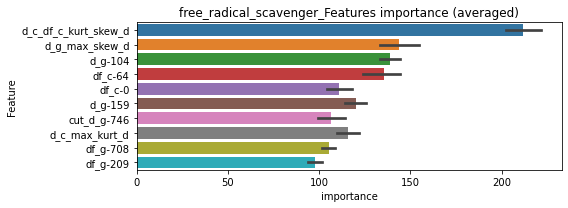

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000277266	valid_1's binary_logloss: 0.000781064


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000269406	valid_1's binary_logloss: 0.000718075
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00026941	valid_1's binary_logloss: 0.000718072


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.00026857	valid_1's binary_logloss: 0.00106201


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000268857	valid_1's binary_logloss: 0.000696613


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds


free_radical_scavenger logloss: 0.0011389731061336222


Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000302303	valid_1's binary_logloss: 0.00243813


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00033506	valid_1's binary_logloss: 0.00190342
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000332306	valid_1's binary_logloss: 0.00348419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000356741	valid_1's binary_logloss: 0.00294263
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000328406	valid_1's binary_logloss: 0.00106581
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018414, Threshold: 0.0059864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000339946	valid_1's binary_logloss: 0.00271776


p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0059864, conf_0:0.00419, conf_1:0.00778
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0359864
threshold: 0.0359864, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000329135	valid_1's binary_logloss: 0.00130309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000332571	valid_1's binary_logloss: 0.0029592
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000350622	valid_1's binary_logloss: 0.00170101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000329802	valid_1's binary_logloss: 0.000811228
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0412496, Threshold: 0.0359864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0052737 Vs.target_rate: 0.00097


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000325149	valid_1's binary_logloss: 0.00294658


Num_p_label: 21.0, Expected: 3.8, Threshold: 0.0359864, conf_0:0.02879, conf_1:0.04318
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.0659864
threshold: 0.0659864, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000329135	valid_1's binary_logloss: 0.00130309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000332571	valid_1's binary_logloss: 0.0029592
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000350622	valid_1's binary_logloss: 0.00170101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000329802	valid_1's binary_logloss: 0.000811228
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0412496, Threshold: 0.0659864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000325149	valid_1's binary_logloss: 0.00294658


p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, Expected: 3.8, Threshold: 0.0659864, conf_0:0.05939, conf_1:0.07259
threshold: 0.0659864, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


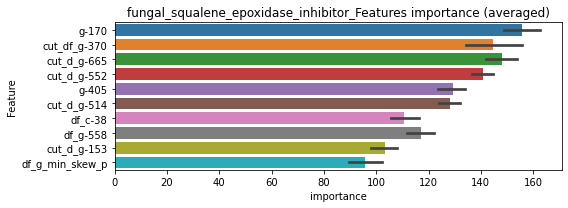

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000336104	valid_1's binary_logloss: 0.00131286


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000330968	valid_1's binary_logloss: 0.00275249


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000347604	valid_1's binary_logloss: 0.00193923


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000342675	valid_1's binary_logloss: 0.000979075


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000349234	valid_1's binary_logloss: 0.00183388


fungal_squalene_epoxidase_inhibitor logloss: 0.0017638556644387878
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0286149	valid_1's binary_logloss: 0.0989835
[2000]	training's binary_logloss: 0.0138289	valid_1's binary_logloss: 0.0860529
Early stopping, best iteration is:
[2611]	training's binary_logloss: 0.01047	valid_1's binary_logloss: 0.083087
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.029535	valid_1's binary_logloss: 0.0928678
[2000]	training's binary_logloss: 0.0141957	valid_1's binary_logloss: 0.0774664
Early stopping, best iteration is:
[2497]	training's binary_logloss: 0.0112861	valid_1's binary_logloss: 0.0743424
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.029898	valid_1's binary_logloss: 0.0899356
[2000]	training's binary_logloss: 0.0142942	valid_1's binary_logloss: 0.0778735
Early stopping, best iteration is:
[2803]	training's binary_logloss: 0.0100592	valid_1's binary_logloss: 0.07468

1 / 3, AUC score:0.992, PR-AUC:0.982
y_Threshold: 0.0477512, Threshold: 0.1648046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 169 → Positive_corect_labels: 634/3751
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1648046, conf_0:0.11536, conf_1:0.21425
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_1: 0.1948046
threshold: 0.1948046, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 634.0/3751, y_label_rate: 0.1690216
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0264644	valid_1's binary_logloss: 0.0810198
[2000]	training's binary_logloss: 0.012735	valid_1's binary_logloss: 0.066533
[3000]	training's binary_logloss: 0.00837429	valid_1's binary_logloss: 0.0613622
Early stopping, best iteration is:
[3782]	training's binary_logloss: 0.00661841	valid_1's binary_logloss: 0.0589608
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0255622	valid_1's binary_logloss: 0.0866463
[2000]	training's binary_logloss: 0.0123682	valid_1's binary_logloss: 0.0734963
Early stopping, best iteration is:
[2660]	training's binary_logloss: 0.00921107	valid_1's binary_logloss: 0.0696674
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0273078	valid_1's binary_logloss: 0.0773879
[2000]	training's binary_logloss: 0.0131362	valid_1's binary_logloss: 0.063169
[3000]	training's binary_lo

2 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0806869, Threshold: 0.1948046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 617.0/3717
p_label_rate: 0.0205927 Vs.target_rate: 0.00445
Num_p_label: 82.0, Expected: 17.7, Threshold: 0.1948046, conf_0:0.15584, conf_1:0.23377
Num_p_label: 67.0, Expected: 17.7, Adj_threshold_1: 0.2248046
Num_p_label: 58.0, Expected: 17.7, Adj_threshold_2: 0.2548046
Num_p_label: 51.0, Expected: 17.7, Adj_threshold_3: 0.2848046
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_4: 0.3148046
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_5: 0.3448046
Num_p_label: 32.0, Expected: 17.7, Adj_threshold_6: 0.3748046
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_7: 0.4048046
threshold: 0.4048046, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 617.0/3717, y_label_rate: 0.1659941
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0250251	valid_1's binary_logloss: 0.0700704
[2000]	training's binary_logloss: 0.0121351	valid_1's binary_logloss: 0.0562675
[3000]	training's binary_logloss: 0.00799234	valid_1's binary_logloss: 0.0512595
Early stopping, best iteration is:
[3778]	training's binary_logloss: 0.00634855	valid_1's binary_logloss: 0.0490604
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.02433	valid_1's binary_logloss: 0.0694766
[2000]	training's binary_logloss: 0.0118404	valid_1's binary_logloss: 0.0554567
[3000]	training's binary_logloss: 0.00782209	valid_1's binary_logloss: 0.05008
[4000]	training's binary_logloss: 0.00587395	valid_1's binary_logloss: 0.0472366
[5000]	training's binary_logloss: 0.00472949	valid_1's binary_logloss: 0.0455501
Early stopping, best iteration is:
[5041]	training's binary_logloss: 0.00469103	valid_1's binary_logloss: 0.0454812
Traini

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0807646, Threshold: 0.4048046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 608.0/3699
p_label_rate: 0.0092918 Vs.target_rate: 0.00445
Num_p_label: 37.0, Expected: 17.7, Threshold: 0.4048046, conf_0:0.36432, conf_1:0.44529
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_1: 0.4348046
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_2: 0.4648046
threshold: 0.4648046, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 608.0/3699, y_label_rate: 0.1643687


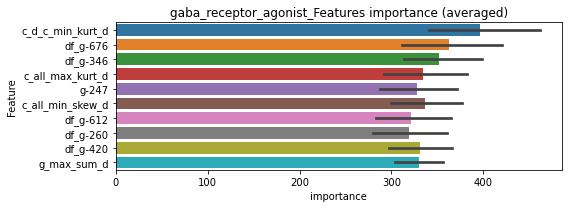

len(train_index) : 2466
len(valid_index) : 1233
================================= fold 1/3 gaba_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.050164	valid_1's binary_logloss: 0.10392
[2000]	training's binary_logloss: 0.0256816	valid_1's binary_logloss: 0.0789478
[3000]	training's binary_logloss: 0.0171188	valid_1's binary_logloss: 0.069771
[4000]	training's binary_logloss: 0.0128279	valid_1's binary_logloss: 0.0649992
[5000]	training's binary_logloss: 0.010287	valid_1's binary_logloss: 0.0621633
[6000]	training's binary_logloss: 0.00858898	valid_1's binary_logloss: 0.0600962
Early stopping, best iteration is:
[6814]	training's binary_logloss: 0.00758485	valid_1's binary_logloss: 0.0588655


len(train_index) : 2466
len(valid_index) : 1233
================================= fold 2/3 gaba_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0516545	valid_1's binary_logloss: 0.0961567
[2000]	training's binary_logloss: 0.0264228	valid_1's binary_logloss: 0.0688554
[3000]	training's binary_logloss: 0.017587	valid_1's binary_logloss: 0.0586453
[4000]	training's binary_logloss: 0.0131674	valid_1's binary_logloss: 0.0531593
[5000]	training's binary_logloss: 0.0105526	valid_1's binary_logloss: 0.049727
[6000]	training's binary_logloss: 0.00879052	valid_1's binary_logloss: 0.047115
[7000]	training's binary_logloss: 0.00755679	valid_1's binary_logloss: 0.0453345
[8000]	training's binary_logloss: 0.00663538	valid_1's binary_logloss: 0.0438573
[9000]	training's binary_logloss: 0.00591872	valid_1's binary_logloss: 0.042772
[10000]	training's binary_logloss: 0.00535023	valid_1's binary_logloss: 0.0418698
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00535023	valid_1's binary_logloss: 0.0418698


len(train_index) : 2466
len(valid_index) : 1233
================================= fold 3/3 gaba_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.05231	valid_1's binary_logloss: 0.0883712
[2000]	training's binary_logloss: 0.0266396	valid_1's binary_logloss: 0.0628062
[3000]	training's binary_logloss: 0.0177341	valid_1's binary_logloss: 0.0533092
[4000]	training's binary_logloss: 0.0133115	valid_1's binary_logloss: 0.0483595
[5000]	training's binary_logloss: 0.0106724	valid_1's binary_logloss: 0.0450937
[6000]	training's binary_logloss: 0.00889847	valid_1's binary_logloss: 0.0429107
[7000]	training's binary_logloss: 0.00764794	valid_1's binary_logloss: 0.0411772
[8000]	training's binary_logloss: 0.0067125	valid_1's binary_logloss: 0.0398003
[9000]	training's binary_logloss: 0.00598481	valid_1's binary_logloss: 0.0387849
Early stopping, best iteration is:
[9292]	training's binary_logloss: 0.00580616	valid_1's binary_logloss: 0.0385172


gaba_receptor_agonist logloss: 0.046417509930090965
gaba_receptor_agonist is unpredictable(><)!


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4991
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4991


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0300833	valid_1's binary_logloss: 0.105151
Early stopping, best iteration is:
[1744]	training's binary_logloss: 0.016867	valid_1's binary_logloss: 0.0982547
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0301584	valid_1's binary_logloss: 0.107452
Early stopping, best iteration is:
[1520]	training's binary_logloss: 0.0194461	valid_1's binary_logloss: 0.101362
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.029555	valid_1's binary_logloss: 0.103587
[2000]	training's binary_logloss: 0.0141374	valid_1's binary_logloss: 0.0939894
Early stopping, best iteration is:
[2154]	training's binary_logloss: 0.0131018	valid_1's binary_logloss: 0.093253


1 / 3, AUC score:0.985, PR-AUC:0.965
y_Threshold: 0.0528697, Threshold: 0.1025384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 312 → Positive_corect_labels: 942/5677
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.1025384, conf_0:0.07178, conf_1:0.13330
threshold: 0.1025384, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 942.0/5677, y_label_rate: 0.1659327
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0245935	valid_1's binary_logloss: 0.0662592
[2000]	training's binary_logloss: 0.011686	valid_1's binary_logloss: 0.0557354
[3000]	training's binary_logloss: 0.00766054	valid_1's binary_logloss: 0.0523559
Early stopping, best iteration is:
[3780]	training's binary_logloss: 0.00605235	valid_1's binary_logloss: 0.0511789
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0237357	valid_1's binary_logloss: 0.0863064
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0128469	valid_1's binary_logloss: 0.0778768
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0239942	valid_1's binary_logloss: 0.0758195
[2000]	training's binary_logloss: 0.0113568	valid_1's binary_logloss: 0.0655731
Early stopping, best iteration is:
[2860]	training's binary_logloss: 0.00779154	valid_1's binary_logloss: 

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0632696, Threshold: 0.1025384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 904.0/5601
p_label_rate: 0.0115520 Vs.target_rate: 0.00693
Num_p_label: 46.0, Expected: 27.6, Threshold: 0.1025384, conf_0:0.08203, conf_1:0.12305
Num_p_label: 25.0, Expected: 27.6, Adj_threshold_1: 0.1325384
threshold: 0.1325384, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 904.0/5601, y_label_rate: 0.1613998
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0210627	valid_1's binary_logloss: 0.054061
[2000]	training's binary_logloss: 0.0100798	valid_1's binary_logloss: 0.0432852
[3000]	training's binary_logloss: 0.00660869	valid_1's binary_logloss: 0.0393794
Early stopping, best iteration is:
[3350]	training's binary_logloss: 0.00590768	valid_1's binary_logloss: 0.0385879
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0201605	valid_1's binary_logloss: 0.0612691
[2000]	training's binary_logloss: 0.00961087	valid_1's binary_logloss: 0.0511831
Early stopping, best iteration is:
[2889]	training's binary_logloss: 0.00658226	valid_1's binary_logloss: 0.0478207
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.021255	valid_1's binary_logloss: 0.0570156
[2000]	training's binary_logloss: 0.0101062	valid_1's binary_logloss: 0.0453558
[3000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0677829, Threshold: 0.1325384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 889.0/5571
p_label_rate: 0.0055249 Vs.target_rate: 0.00693
Num_p_label: 22.0, Expected: 27.6, Threshold: 0.1325384, conf_0:0.11928, conf_1:0.14579
threshold: 0.1325384, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 889.0/5571, y_label_rate: 0.1595764


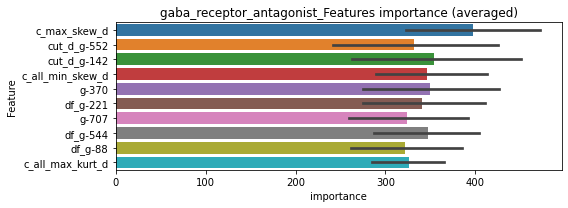

len(train_index) : 3714
len(valid_index) : 1857
================================= fold 1/3 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0423507	valid_1's binary_logloss: 0.0689872
[2000]	training's binary_logloss: 0.0214932	valid_1's binary_logloss: 0.0487477
[3000]	training's binary_logloss: 0.0142775	valid_1's binary_logloss: 0.0410105
[4000]	training's binary_logloss: 0.0106602	valid_1's binary_logloss: 0.0369818
[5000]	training's binary_logloss: 0.00853463	valid_1's binary_logloss: 0.0345342
[6000]	training's binary_logloss: 0.0071144	valid_1's binary_logloss: 0.0328201
[7000]	training's binary_logloss: 0.00611364	valid_1's binary_logloss: 0.0317102
[8000]	training's binary_logloss: 0.00536086	valid_1's binary_logloss: 0.0306497
Early stopping, best iteration is:
[8149]	training's binary_logloss: 0.00526357	valid_1's binary_logloss: 0.0305061


len(train_index) : 3714
len(valid_index) : 1857
================================= fold 2/3 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0411899	valid_1's binary_logloss: 0.0779924
[2000]	training's binary_logloss: 0.0209066	valid_1's binary_logloss: 0.0574002
[3000]	training's binary_logloss: 0.0139318	valid_1's binary_logloss: 0.0498429
[4000]	training's binary_logloss: 0.0104575	valid_1's binary_logloss: 0.0460525
[5000]	training's binary_logloss: 0.00834236	valid_1's binary_logloss: 0.0437164
[6000]	training's binary_logloss: 0.00696761	valid_1's binary_logloss: 0.0421529
Early stopping, best iteration is:
[6091]	training's binary_logloss: 0.00686561	valid_1's binary_logloss: 0.0420117


len(train_index) : 3714
len(valid_index) : 1857
================================= fold 3/3 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0436715	valid_1's binary_logloss: 0.0732392
[2000]	training's binary_logloss: 0.0219424	valid_1's binary_logloss: 0.0506388
[3000]	training's binary_logloss: 0.0145719	valid_1's binary_logloss: 0.0427442
[4000]	training's binary_logloss: 0.010926	valid_1's binary_logloss: 0.0388687
[5000]	training's binary_logloss: 0.00873593	valid_1's binary_logloss: 0.0362826
[6000]	training's binary_logloss: 0.00729387	valid_1's binary_logloss: 0.0346342
[7000]	training's binary_logloss: 0.00627481	valid_1's binary_logloss: 0.0334006
[8000]	training's binary_logloss: 0.00550159	valid_1's binary_logloss: 0.0324037
[9000]	training's binary_logloss: 0.00490332	valid_1's binary_logloss: 0.0316444
Early stopping, best iteration is:
[9357]	training's binary_logloss: 0.00471912	valid_1's binary_logloss: 0.0313626


gaba_receptor_antagonist logloss: 0.03462679933444603
gaba_receptor_antagonist is unpredictable(><)!
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00073305	valid_1's binary_logloss: 0.0255093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000516991	valid_1's binary_logloss: 0.0183649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000527522	valid_1's binary_logloss: 0.00597511
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000675963	valid_1's binary_logloss: 0.00692461
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0048981, Threshold: 0.0168925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0168925, conf_0:0.01182, conf_1:0.02196


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00105523	valid_1's binary_logloss: 0.0221676


Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0468925
threshold: 0.0468925, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000801861	valid_1's binary_logloss: 0.0237245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000479437	valid_1's binary_logloss: 0.0171224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000493347	valid_1's binary_logloss: 0.005233
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000508151	valid_1's binary_logloss: 0.00555869
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000561147	valid_1's binary_logloss: 0.0243709


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226904, Threshold: 0.0468925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00235
Num_p_label: 27.0, Expected: 9.4, Threshold: 0.0468925, conf_0:0.03751, conf_1:0.05627
Num_p_label: 17.0, Expected: 9.4, Adj_threshold_1: 0.0768925
threshold: 0.0768925, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00104445	valid_1's binary_logloss: 0.0115484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000515119	valid_1's binary_logloss: 0.00740346
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000500388	valid_1's binary_logloss: 0.0127718
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000513206	valid_1's binary_logloss: 0.00555368
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000475034	valid_1's binary_logloss: 0.0277117


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248338, Threshold: 0.0768925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00235
Num_p_label: 15.0, Expected: 9.4, Threshold: 0.0768925, conf_0:0.06920, conf_1:0.08458
threshold: 0.0768925, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


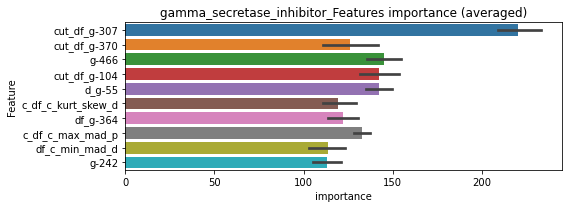

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000521338	valid_1's binary_logloss: 0.0121645


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000544353	valid_1's binary_logloss: 0.00996612


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000600645	valid_1's binary_logloss: 0.0134559


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000500369	valid_1's binary_logloss: 0.0047559


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


gamma_secretase_inhibitor logloss: 0.01392694496898654


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000872234	valid_1's binary_logloss: 0.0292964
mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0362557	valid_1's binary_logloss: 0.126988
[2000]	training's binary_logloss: 0.0165956	valid_1's binary_logloss: 0.111081
Early stopping, best iteration is:
[2701]	training's binary_logloss: 0.0118771	valid_1's binary_logloss: 0.10776
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0366159	valid_1's binary_logloss: 0.127531
[2000]	training's binary_logloss: 0.0167627	valid_1's binary_logloss: 0.109647
Early stopping, best iteration is:
[2636]	training's binary_logloss: 0.0123211	valid_1's binary_logloss: 0.105361
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0371691	valid_1's binary_logloss: 0.114678
[2000]	training's binary_logloss: 0.0169997	valid_1's binary_logloss: 0.0965993
[3000]	training's binary_logloss: 0.0108475	valid_1's binary_logloss: 0.0906547
Early stopping, best iteration is:


1 / 3, AUC score:0.981, PR-AUC:0.965
y_Threshold: 0.0574737, Threshold: 0.1429071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 460 → Positive_corect_labels: 1347/8141
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.1429071, conf_0:0.10003, conf_1:0.18578
threshold: 0.1429071, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1347.0/8141, y_label_rate: 0.1654588
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.030283	valid_1's binary_logloss: 0.101105
[2000]	training's binary_logloss: 0.0139203	valid_1's binary_logloss: 0.0819721
Early stopping, best iteration is:
[2731]	training's binary_logloss: 0.00991466	valid_1's binary_logloss: 0.0765082
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0304249	valid_1's binary_logloss: 0.0931055
[2000]	training's binary_logloss: 0.0140763	valid_1's binary_logloss: 0.0755109
[3000]	training's binary_logloss: 0.00907188	valid_1's binary_logloss: 0.0698106
Early stopping, best iteration is:
[3248]	training's binary_logloss: 0.00834128	valid_1's binary_logloss: 0.068766
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0305522	valid_1's binary_logloss: 0.0968181
[2000]	training's binary_logloss: 0.0140761	valid_1's binary_logloss: 0.0805849
Early stopping, best iterat

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0908933, Threshold: 0.1429071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1291.0/8029
p_label_rate: 0.0180814 Vs.target_rate: 0.01117
Num_p_label: 72.0, Expected: 44.5, Threshold: 0.1429071, conf_0:0.11433, conf_1:0.17149
Num_p_label: 54.0, Expected: 44.5, Adj_threshold_1: 0.1729071
threshold: 0.1729071, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 1291.0/8029, y_label_rate: 0.1607921
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0275426	valid_1's binary_logloss: 0.0912493
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.0134028	valid_1's binary_logloss: 0.0754636
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0278458	valid_1's binary_logloss: 0.0916997
[2000]	training's binary_logloss: 0.0129672	valid_1's binary_logloss: 0.073227
[3000]	training's binary_logloss: 0.00839019	valid_1's binary_logloss: 0.0671199
Early stopping, best iteration is:
[3255]	training's binary_logloss: 0.00769821	valid_1's binary_logloss: 0.0661764
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0282799	valid_1's binary_logloss: 0.0905402
[2000]	training's binary_logloss: 0.0130224	valid_1's binary_logloss: 0.0743158
Early stopping, best iteration is:
[2926]	training's binary_logloss: 0.0086237	valid_1's binary_logloss: 0

3 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.1031855, Threshold: 0.1729071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 1249.0/7945
p_label_rate: 0.0125565 Vs.target_rate: 0.01117
Num_p_label: 50.0, Expected: 44.5, Threshold: 0.1729071, conf_0:0.15562, conf_1:0.19020
threshold: 0.1729071, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 1249.0/7945, y_label_rate: 0.1572058


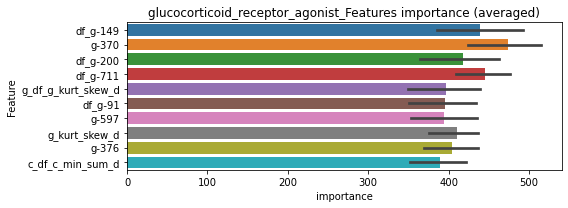

len(train_index) : 5296
len(valid_index) : 2649
================================= fold 1/3 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0564407	valid_1's binary_logloss: 0.10658
[2000]	training's binary_logloss: 0.028177	valid_1's binary_logloss: 0.0766158
[3000]	training's binary_logloss: 0.0185486	valid_1's binary_logloss: 0.0652157
[4000]	training's binary_logloss: 0.0137846	valid_1's binary_logloss: 0.0593622
[5000]	training's binary_logloss: 0.0109972	valid_1's binary_logloss: 0.0556416
[6000]	training's binary_logloss: 0.0091363	valid_1's binary_logloss: 0.0531165
[7000]	training's binary_logloss: 0.00782354	valid_1's binary_logloss: 0.0511279
[8000]	training's binary_logloss: 0.00684747	valid_1's binary_logloss: 0.0495593
Early stopping, best iteration is:
[8677]	training's binary_logloss: 0.00631517	valid_1's binary_logloss: 0.0487221


len(train_index) : 5297
len(valid_index) : 2648
================================= fold 2/3 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0566177	valid_1's binary_logloss: 0.111391
[2000]	training's binary_logloss: 0.028344	valid_1's binary_logloss: 0.0813804
[3000]	training's binary_logloss: 0.0185936	valid_1's binary_logloss: 0.0694884
[4000]	training's binary_logloss: 0.0138196	valid_1's binary_logloss: 0.063409
[5000]	training's binary_logloss: 0.0109994	valid_1's binary_logloss: 0.0594887
Early stopping, best iteration is:
[5856]	training's binary_logloss: 0.00935722	valid_1's binary_logloss: 0.0570853


len(train_index) : 5297
len(valid_index) : 2648
================================= fold 3/3 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0559963	valid_1's binary_logloss: 0.114067
[2000]	training's binary_logloss: 0.0280887	valid_1's binary_logloss: 0.0832417
[3000]	training's binary_logloss: 0.0184405	valid_1's binary_logloss: 0.0710704
[4000]	training's binary_logloss: 0.0136954	valid_1's binary_logloss: 0.0648805
[5000]	training's binary_logloss: 0.0109077	valid_1's binary_logloss: 0.0609649
[6000]	training's binary_logloss: 0.00907232	valid_1's binary_logloss: 0.0582479
[7000]	training's binary_logloss: 0.00777355	valid_1's binary_logloss: 0.0564574
[8000]	training's binary_logloss: 0.00679776	valid_1's binary_logloss: 0.054762
[9000]	training's binary_logloss: 0.00604682	valid_1's binary_logloss: 0.0535131
Early stopping, best iteration is:
[9284]	training's binary_logloss: 0.00586257	valid_1's binary_logloss: 0.0532144


glucocorticoid_receptor_agonist logloss: 0.05300671268186014
glucocorticoid_receptor_agonist is unpredictable(><)!
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00023233	valid_1's binary_logloss: 0.000443352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000235645	valid_1's binary_logloss: 0.00131681
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00023588	valid_1's binary_logloss: 0.000458962
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000235878	valid_1's binary_logloss: 0.000320623
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008606, Threshold: 0.0025222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0025222, conf_0:0.00177, conf_1:0.00328
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0325222
threshold: 0.0325222, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000234123	valid_1's binary_logloss: 0.000979455


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000228892	valid_1's binary_logloss: 0.000354513
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000226548	valid_1's binary_logloss: 0.00183812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000228572	valid_1's binary_logloss: 0.000359069
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000230045	valid_1's binary_logloss: 0.000313723
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0710128, Threshold: 0.0325222, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000233817	valid_1's binary_logloss: 0.00158936


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00055
Num_p_label: 6.0, Expected: 2.2, Threshold: 0.0325222, conf_0:0.02602, conf_1:0.03903
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0625222
threshold: 0.0625222, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000228892	valid_1's binary_logloss: 0.000354513
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000226548	valid_1's binary_logloss: 0.00183812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000228572	valid_1's binary_logloss: 0.000359069
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000230045	valid_1's binary_logloss: 0.000313723
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0710128, Threshold: 0.0625222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0625222, conf_0:0.05627, conf_1:0.06877
threshold: 0.0625222, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000233817	valid_1's binary_logloss: 0.00158936


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


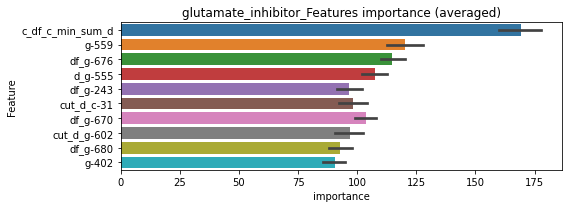

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 glutamate_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 glutamate_inhibitor=================================


Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00023513	valid_1's binary_logloss: 0.000374029
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 glutamate_inhibitor=================================


Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000230833	valid_1's binary_logloss: 0.000998652
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 glutamate_inhibitor=================================


Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000231796	valid_1's binary_logloss: 0.000356127
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 glutamate_inhibitor=================================


Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000233305	valid_1's binary_logloss: 0.000349517
Training until validation scores don't improve for 29 rounds


glutamate_inhibitor logloss: 0.0006393040605306284


Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00024241	valid_1's binary_logloss: 0.0011182


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000604998	valid_1's binary_logloss: 0.0239276
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000699992	valid_1's binary_logloss: 0.0330133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000886143	valid_1's binary_logloss: 0.0251703
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000628468	valid_1's binary_logloss: 0.0147194
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000640038	valid_1's binary_logloss: 0.0244974


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0058938, Threshold: 0.2032131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.2032131, conf_0:0.14225, conf_1:0.26418
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_1: 0.2332131
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_2: 0.2632131
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.2932131
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_4: 0.3232131
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_5: 0.3532131
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_6: 0.3832131
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.4132131
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_8: 0.4432131
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_9: 0.4732131
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_10: 0.5032131
threshold: 0.5032131, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000617327	valid_1's binary_logloss: 0.0347522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00065261	valid_1's binary_logloss: 0.0218366
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000615817	valid_1's binary_logloss: 0.0190796
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000779179	valid_1's binary_logloss: 0.0323413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000541335	valid_1's binary_logloss: 0.0153577


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0300577, Threshold: 0.5032131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0143144 Vs.target_rate: 0.00311
Num_p_label: 57.0, Expected: 12.4, Threshold: 0.5032131, conf_0:0.40257, conf_1:0.60386
Num_p_label: 55.0, Expected: 12.4, Adj_threshold_1: 0.5332131
Num_p_label: 51.0, Expected: 12.4, Adj_threshold_2: 0.5632131
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_3: 0.5932131
Num_p_label: 45.0, Expected: 12.4, Adj_threshold_4: 0.6232131
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_5: 0.6532131
Num_p_label: 36.0, Expected: 12.4, Adj_threshold_6: 0.6832131
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_7: 0.7132131
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_8: 0.7432131
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_9: 0.7732131
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_10: 0.8032131
threshold: 0.8032131, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000554508	valid_1's binary_logloss: 0.0232101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000532301	valid_1's binary_logloss: 0.0114075
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000807396	valid_1's binary_logloss: 0.0262137
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000933695	valid_1's binary_logloss: 0.0236722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000648203	valid_1's binary_logloss: 0.0249765


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0405920, Threshold: 0.8032131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 643.0/3774
p_label_rate: 0.0070316 Vs.target_rate: 0.00311
Num_p_label: 28.0, Expected: 12.4, Threshold: 0.8032131, conf_0:0.72289, conf_1:0.88353
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_1: 0.8332131
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_2: 0.8632131
threshold: 0.8632131, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3774, y_label_rate: 0.1703763


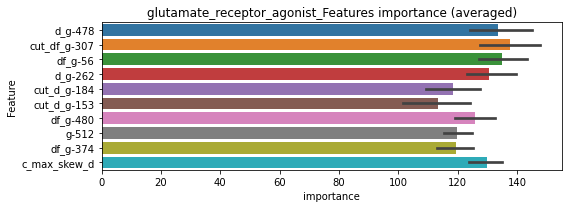

len(train_index) : 3019
len(valid_index) : 755
================================= fold 1/5 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3019
len(valid_index) : 755
================================= fold 2/5 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00125658	valid_1's binary_logloss: 0.027887
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000555755	valid_1's binary_logloss: 0.00937899


len(train_index) : 3019
len(valid_index) : 755
================================= fold 3/5 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3019
len(valid_index) : 755
================================= fold 4/5 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000869936	valid_1's binary_logloss: 0.0229394
Training until validation scores don't improve for 29 rounds


len(train_index) : 3020


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000758756	valid_1's binary_logloss: 0.0104109


len(valid_index) : 754
================================= fold 5/5 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


glutamate_receptor_agonist logloss: 0.019889328410186105


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00102081	valid_1's binary_logloss: 0.0288421
mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0457048	valid_1's binary_logloss: 0.157144
Early stopping, best iteration is:
[1894]	training's binary_logloss: 0.0221652	valid_1's binary_logloss: 0.143094
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0438641	valid_1's binary_logloss: 0.174135
Early stopping, best iteration is:
[1446]	training's binary_logloss: 0.0291552	valid_1's binary_logloss: 0.167676
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0453058	valid_1's binary_logloss: 0.161658
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0218286	valid_1's binary_logloss: 0.149511


1 / 3, AUC score:0.955, PR-AUC:0.921
y_Threshold: 0.0886605, Threshold: 0.1799788, pos_neg_ratio: 0.8000000
Remove_noisy_data: 627 → Positive_corect_labels: 1273/8027
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.1799788, conf_0:0.12599, conf_1:0.23397
threshold: 0.1799788, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1273.0/8027, y_label_rate: 0.1585898
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0329584	valid_1's binary_logloss: 0.10988
[2000]	training's binary_logloss: 0.0151525	valid_1's binary_logloss: 0.0944172
Early stopping, best iteration is:
[2189]	training's binary_logloss: 0.013693	valid_1's binary_logloss: 0.0930881
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0332205	valid_1's binary_logloss: 0.108901
[2000]	training's binary_logloss: 0.0152494	valid_1's binary_logloss: 0.0934357
Early stopping, best iteration is:
[2187]	training's binary_logloss: 0.0137933	valid_1's binary_logloss: 0.0920259
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0319268	valid_1's binary_logloss: 0.116356
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0155041	valid_1's binary_logloss: 0.103655


2 / 3, AUC score:0.989, PR-AUC:0.976
y_Threshold: 0.1058359, Threshold: 0.1799788, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 1190.0/7861
p_label_rate: 0.0143144 Vs.target_rate: 0.01541
Num_p_label: 57.0, Expected: 61.4, Threshold: 0.1799788, conf_0:0.14398, conf_1:0.21597
threshold: 0.1799788, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 1190.0/7861, y_label_rate: 0.1513802
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0272373	valid_1's binary_logloss: 0.10214
[2000]	training's binary_logloss: 0.0125997	valid_1's binary_logloss: 0.0884547
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.0100428	valid_1's binary_logloss: 0.0854487
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0271114	valid_1's binary_logloss: 0.100494
[2000]	training's binary_logloss: 0.0125241	valid_1's binary_logloss: 0.0881213
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0119251	valid_1's binary_logloss: 0.0876014
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0292795	valid_1's binary_logloss: 0.0743824
[2000]	training's binary_logloss: 0.0135967	valid_1's binary_logloss: 0.0585226
[3000]	training's binary_logloss: 0.00875085	valid_1's binary_logloss: 0.0531299
Early stopping, best iteratio

3 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0964197, Threshold: 0.1799788, pos_neg_ratio: 0.8000000
Remove_noisy_data: 96 → Positive_corect_labels: 1142.0/7765
p_label_rate: 0.0130588 Vs.target_rate: 0.01541
Num_p_label: 52.0, Expected: 61.4, Threshold: 0.1799788, conf_0:0.16198, conf_1:0.19798
threshold: 0.1799788, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1142.0/7765, y_label_rate: 0.1470702


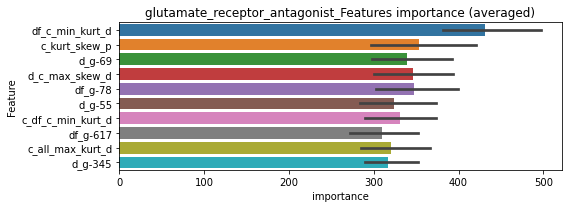

len(train_index) : 5176
len(valid_index) : 2589
================================= fold 1/3 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0530603	valid_1's binary_logloss: 0.109868
[2000]	training's binary_logloss: 0.0266677	valid_1's binary_logloss: 0.0839478
[3000]	training's binary_logloss: 0.0175622	valid_1's binary_logloss: 0.0745867
[4000]	training's binary_logloss: 0.0130348	valid_1's binary_logloss: 0.0694286
[5000]	training's binary_logloss: 0.0103607	valid_1's binary_logloss: 0.0664256
[6000]	training's binary_logloss: 0.00860601	valid_1's binary_logloss: 0.0643478
Early stopping, best iteration is:
[6218]	training's binary_logloss: 0.0082984	valid_1's binary_logloss: 0.0639826


len(train_index) : 5177
len(valid_index) : 2588
================================= fold 2/3 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0541152	valid_1's binary_logloss: 0.100878
[2000]	training's binary_logloss: 0.027112	valid_1's binary_logloss: 0.0751586
[3000]	training's binary_logloss: 0.0178379	valid_1's binary_logloss: 0.0649538
[4000]	training's binary_logloss: 0.0132423	valid_1's binary_logloss: 0.05979
[5000]	training's binary_logloss: 0.0105233	valid_1's binary_logloss: 0.0566045
[6000]	training's binary_logloss: 0.00873229	valid_1's binary_logloss: 0.0544636
Early stopping, best iteration is:
[6599]	training's binary_logloss: 0.00792853	valid_1's binary_logloss: 0.0532968


len(train_index) : 5177
len(valid_index) : 2588
================================= fold 3/3 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0537482	valid_1's binary_logloss: 0.104859
[2000]	training's binary_logloss: 0.0269217	valid_1's binary_logloss: 0.079711
[3000]	training's binary_logloss: 0.0176699	valid_1's binary_logloss: 0.0704492
Early stopping, best iteration is:
[3772]	training's binary_logloss: 0.013934	valid_1's binary_logloss: 0.066888


glutamate_receptor_antagonist logloss: 0.06138946281207127
glutamate_receptor_antagonist is unpredictable(><)!
gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000308926	valid_1's binary_logloss: 0.00484526
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000318488	valid_1's binary_logloss: 0.00322817
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000305985	valid_1's binary_logloss: 0.00112986
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00029894	valid_1's binary_logloss: 0.00537434
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015497, Threshold: 0.0056098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0056098, conf_0:0.00393, conf_1:0.00729
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0356098


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000310921	valid_1's binary_logloss: 0.000850486


threshold: 0.0356098, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00030819	valid_1's binary_logloss: 0.00635968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000297696	valid_1's binary_logloss: 0.00287562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000302607	valid_1's binary_logloss: 0.000944906
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000300399	valid_1's binary_logloss: 0.00439657
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248513, Threshold: 0.0356098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, Expected: 3.0, Threshold: 0.0356098, conf_0:0.02849, conf_1:0.04273
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0656098
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0956098


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000296945	valid_1's binary_logloss: 0.000791876


Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1256098
threshold: 0.1256098, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00030819	valid_1's binary_logloss: 0.00635968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000297696	valid_1's binary_logloss: 0.00287562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000302607	valid_1's binary_logloss: 0.000944906
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000300399	valid_1's binary_logloss: 0.00439657
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248513, Threshold: 0.1256098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1256098, conf_0:0.11305, conf_1:0.13817


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000296945	valid_1's binary_logloss: 0.000791876


threshold: 0.1256098, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


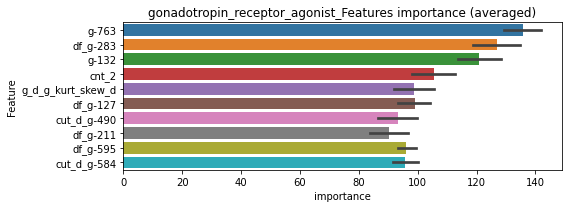

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000303989	valid_1's binary_logloss: 0.00350398


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000328007	valid_1's binary_logloss: 0.0020632
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000299177	valid_1's binary_logloss: 0.00101918


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000322396	valid_1's binary_logloss: 0.0030929
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000300514	valid_1's binary_logloss: 0.00067784


gonadotropin_receptor_agonist logloss: 0.00207179347457887
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000520082	valid_1's binary_logloss: 0.0170037
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000572017	valid_1's binary_logloss: 0.0165733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000516247	valid_1's binary_logloss: 0.00476465
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000532859	valid_1's binary_logloss: 0.00513019
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000522785	valid_1's binary_logloss: 0.0121454


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0059912, Threshold: 0.0258208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0258208, conf_0:0.01807, conf_1:0.03357
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0558208
threshold: 0.0558208, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000511945	valid_1's binary_logloss: 0.0178649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000516716	valid_1's binary_logloss: 0.0189535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000496401	valid_1's binary_logloss: 0.00426299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000511526	valid_1's binary_logloss: 0.00283875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000543001	valid_1's binary_logloss: 0.0105302


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0308623, Threshold: 0.0558208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0113009 Vs.target_rate: 0.00252
Num_p_label: 45.0, Expected: 10.0, Threshold: 0.0558208, conf_0:0.04466, conf_1:0.06698
Num_p_label: 28.0, Expected: 10.0, Adj_threshold_1: 0.0858208
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_2: 0.1158208
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_3: 0.1458208
threshold: 0.1458208, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000511945	valid_1's binary_logloss: 0.0178649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000516716	valid_1's binary_logloss: 0.0189535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000496401	valid_1's binary_logloss: 0.00426299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000511526	valid_1's binary_logloss: 0.00283875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000543001	valid_1's binary_logloss: 0.0105302


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0308623, Threshold: 0.1458208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.1458208, conf_0:0.13124, conf_1:0.16040
threshold: 0.1458208, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


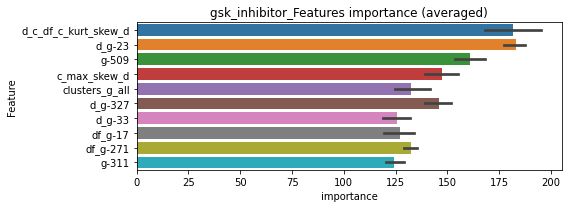

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000551315	valid_1's binary_logloss: 0.0182719


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000554644	valid_1's binary_logloss: 0.0131891


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000529637	valid_1's binary_logloss: 0.00404979
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000513987	valid_1's binary_logloss: 0.00398352


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000535127	valid_1's binary_logloss: 0.00262586
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000535127	valid_1's binary_logloss: 0.00262586


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000550622	valid_1's binary_logloss: 0.0100733


gsk_inhibitor logloss: 0.009630770481956026
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000991826	valid_1's binary_logloss: 0.0315147
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000707024	valid_1's binary_logloss: 0.0221969
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000559057	valid_1's binary_logloss: 0.011775
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000574533	valid_1's binary_logloss: 0.0109871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000735473	valid_1's binary_logloss: 0.0271008


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0060622, Threshold: 0.0143731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0143731, conf_0:0.01006, conf_1:0.01868
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_1: 0.0443731
threshold: 0.0443731, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00094852	valid_1's binary_logloss: 0.0208552
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000602397	valid_1's binary_logloss: 0.0287177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000717405	valid_1's binary_logloss: 0.0267058
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000560072	valid_1's binary_logloss: 0.0092458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000872538	valid_1's binary_logloss: 0.0330563


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0332580, Threshold: 0.0443731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0070316 Vs.target_rate: 0.00302
Num_p_label: 28.0, Expected: 12.0, Threshold: 0.0443731, conf_0:0.03550, conf_1:0.05325
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_1: 0.0743731
threshold: 0.0743731, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00074342	valid_1's binary_logloss: 0.029015
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000636025	valid_1's binary_logloss: 0.0150191
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000800198	valid_1's binary_logloss: 0.0240665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000543401	valid_1's binary_logloss: 0.0115167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000697712	valid_1's binary_logloss: 0.0173325


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0368953, Threshold: 0.0743731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0047715 Vs.target_rate: 0.00302
Num_p_label: 19.0, Expected: 12.0, Threshold: 0.0743731, conf_0:0.06694, conf_1:0.08181
Num_p_label: 9.0, Expected: 12.0, Adj_threshold_1: 0.1043731
threshold: 0.1043731, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


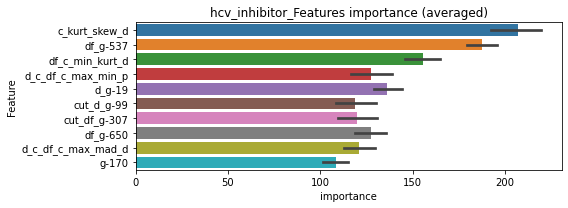

len(train_index) : 3035
len(valid_index) : 759
================================= fold 1/5 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3035
len(valid_index) : 759
================================= fold 2/5 hcv_inhibitor=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00148947	valid_1's binary_logloss: 0.031543
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000743168	valid_1's binary_logloss: 0.0208611


len(train_index) : 3035
len(valid_index) : 759
================================= fold 3/5 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000719535	valid_1's binary_logloss: 0.0215867


len(train_index) : 3035
len(valid_index) : 759
================================= fold 4/5 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000784424	valid_1's binary_logloss: 0.019394


len(train_index) : 3036
len(valid_index) : 758
================================= fold 5/5 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds


hcv_inhibitor logloss: 0.028670741402706503


Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00281226	valid_1's binary_logloss: 0.0499969


hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0296903	valid_1's binary_logloss: 0.108591
[2000]	training's binary_logloss: 0.0142573	valid_1's binary_logloss: 0.0938603
Early stopping, best iteration is:
[2773]	training's binary_logloss: 0.010122	valid_1's binary_logloss: 0.0895503
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0304139	valid_1's binary_logloss: 0.0956939
[2000]	training's binary_logloss: 0.0145724	valid_1's binary_logloss: 0.0803639
[3000]	training's binary_logloss: 0.00954955	valid_1's binary_logloss: 0.0757316
Early stopping, best iteration is:
[3238]	training's binary_logloss: 0.00881902	valid_1's binary_logloss: 0.0749732
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0307561	valid_1's binary_logloss: 0.0804284
[2000]	training's binary_logloss: 0.0147313	valid_1's binary_logloss: 0.0638778
[3000]	training's binary_lo

1 / 3, AUC score:0.992, PR-AUC:0.983
y_Threshold: 0.0434338, Threshold: 0.1515140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 635/3758
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1515140, conf_0:0.10606, conf_1:0.19697
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_1: 0.1815140
Num_p_label: 18.0, Expected: 17.7, Adj_threshold_2: 0.2115140
threshold: 0.2115140, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 635.0/3758, y_label_rate: 0.1689729
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0270375	valid_1's binary_logloss: 0.0838311
[2000]	training's binary_logloss: 0.0129721	valid_1's binary_logloss: 0.0666278
[3000]	training's binary_logloss: 0.00852322	valid_1's binary_logloss: 0.0607514
[4000]	training's binary_logloss: 0.00639251	valid_1's binary_logloss: 0.0579604
Early stopping, best iteration is:
[4010]	training's binary_logloss: 0.00637684	valid_1's binary_logloss: 0.0579194
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0275347	valid_1's binary_logloss: 0.0747881
[2000]	training's binary_logloss: 0.0132434	valid_1's binary_logloss: 0.0581832
[3000]	training's binary_logloss: 0.00870168	valid_1's binary_logloss: 0.0523969
Early stopping, best iteration is:
[3912]	training's binary_logloss: 0.00664935	valid_1's binary_logloss: 0.0495803
Training until validation scores don't improve for 39 rounds
[1000]	training's bina

2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0758881, Threshold: 0.2115140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 623.0/3734
p_label_rate: 0.0105475 Vs.target_rate: 0.00445
Num_p_label: 42.0, Expected: 17.7, Threshold: 0.2115140, conf_0:0.16921, conf_1:0.25382
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_1: 0.2415140
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_2: 0.2715140
threshold: 0.2715140, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 623.0/3734, y_label_rate: 0.1668452
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0260937	valid_1's binary_logloss: 0.0738812
[2000]	training's binary_logloss: 0.0125836	valid_1's binary_logloss: 0.0574574
[3000]	training's binary_logloss: 0.00825682	valid_1's binary_logloss: 0.0517006
[4000]	training's binary_logloss: 0.00618765	valid_1's binary_logloss: 0.0488705
Early stopping, best iteration is:
[4366]	training's binary_logloss: 0.00567184	valid_1's binary_logloss: 0.0480832
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0262674	valid_1's binary_logloss: 0.0811385
[2000]	training's binary_logloss: 0.0126097	valid_1's binary_logloss: 0.0654299
[3000]	training's binary_logloss: 0.00831424	valid_1's binary_logloss: 0.0596395
Early stopping, best iteration is:
[3602]	training's binary_logloss: 0.00692116	valid_1's binary_logloss: 0.0579996
Training until validation scores don't improve for 39 rounds
[1000]	training's bina

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0736911, Threshold: 0.2715140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 605.0/3698
p_label_rate: 0.0057760 Vs.target_rate: 0.00445
Num_p_label: 23.0, Expected: 17.7, Threshold: 0.2715140, conf_0:0.24436, conf_1:0.29867
threshold: 0.2715140, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 605.0/3698, y_label_rate: 0.1636019


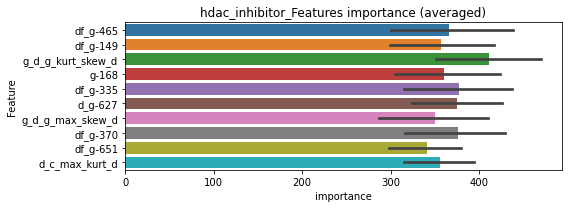

len(train_index) : 2465
len(valid_index) : 1233
================================= fold 1/3 hdac_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0538212	valid_1's binary_logloss: 0.102896
[2000]	training's binary_logloss: 0.0271812	valid_1's binary_logloss: 0.0731812
[3000]	training's binary_logloss: 0.0180429	valid_1's binary_logloss: 0.0619268
[4000]	training's binary_logloss: 0.0134579	valid_1's binary_logloss: 0.0558328
[5000]	training's binary_logloss: 0.0107671	valid_1's binary_logloss: 0.052308
[6000]	training's binary_logloss: 0.00898446	valid_1's binary_logloss: 0.0496718
[7000]	training's binary_logloss: 0.00773022	valid_1's binary_logloss: 0.0478535
[8000]	training's binary_logloss: 0.00678161	valid_1's binary_logloss: 0.0463623
[9000]	training's binary_logloss: 0.00605209	valid_1's binary_logloss: 0.0451288
Early stopping, best iteration is:
[9296]	training's binary_logloss: 0.00586499	valid_1's binary_logloss: 0.0448309


len(train_index) : 2465
len(valid_index) : 1233
================================= fold 2/3 hdac_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0552385	valid_1's binary_logloss: 0.0957328
[2000]	training's binary_logloss: 0.0280486	valid_1's binary_logloss: 0.0654396
[3000]	training's binary_logloss: 0.0186131	valid_1's binary_logloss: 0.053593
[4000]	training's binary_logloss: 0.0139037	valid_1's binary_logloss: 0.0470741
[5000]	training's binary_logloss: 0.0111243	valid_1's binary_logloss: 0.0430122
[6000]	training's binary_logloss: 0.0092777	valid_1's binary_logloss: 0.0400963
[7000]	training's binary_logloss: 0.00797043	valid_1's binary_logloss: 0.0380209
[8000]	training's binary_logloss: 0.00699662	valid_1's binary_logloss: 0.0362289
[9000]	training's binary_logloss: 0.00624489	valid_1's binary_logloss: 0.0349133
[10000]	training's binary_logloss: 0.00564888	valid_1's binary_logloss: 0.0338933
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00564888	valid_1's binary_logloss: 0.0338933


len(train_index) : 2466
len(valid_index) : 1232
================================= fold 3/3 hdac_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0541699	valid_1's binary_logloss: 0.098285
[2000]	training's binary_logloss: 0.027422	valid_1's binary_logloss: 0.0709825
[3000]	training's binary_logloss: 0.0181752	valid_1's binary_logloss: 0.0606917
[4000]	training's binary_logloss: 0.013582	valid_1's binary_logloss: 0.0550478
[5000]	training's binary_logloss: 0.0108542	valid_1's binary_logloss: 0.0515158
[6000]	training's binary_logloss: 0.0090686	valid_1's binary_logloss: 0.0491816
[7000]	training's binary_logloss: 0.00778761	valid_1's binary_logloss: 0.0473545
[8000]	training's binary_logloss: 0.00683385	valid_1's binary_logloss: 0.0459157
[9000]	training's binary_logloss: 0.00610115	valid_1's binary_logloss: 0.044818
[10000]	training's binary_logloss: 0.00551967	valid_1's binary_logloss: 0.0440049
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00551967	valid_1's binary_logloss: 0.0440049


hdac_inhibitor logloss: 0.04090885663702949
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000612414	valid_1's binary_logloss: 0.0321381
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000579228	valid_1's binary_logloss: 0.0204589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00054508	valid_1's binary_logloss: 0.0228086
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000527093	valid_1's binary_logloss: 0.00572816
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000544718	valid_1's binary_logloss: 0.0218123


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041142, Threshold: 0.0105987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0105987, conf_0:0.00742, conf_1:0.01378
Num_p_label: 6.0, Expected: 9.9, Adj_threshold_1: 0.0405987
threshold: 0.0405987, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.0007068	valid_1's binary_logloss: 0.0301588
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000489246	valid_1's binary_logloss: 0.0188852
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000551461	valid_1's binary_logloss: 0.0215551
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00051816	valid_1's binary_logloss: 0.00696306
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000519475	valid_1's binary_logloss: 0.0186964


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0209494, Threshold: 0.0405987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00248
Num_p_label: 14.0, Expected: 9.9, Threshold: 0.0405987, conf_0:0.03248, conf_1:0.04872
threshold: 0.0405987, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000621507	valid_1's binary_logloss: 0.0232561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000512972	valid_1's binary_logloss: 0.0100376
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000507567	valid_1's binary_logloss: 0.0144215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00088453	valid_1's binary_logloss: 0.0145571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000631417	valid_1's binary_logloss: 0.0252389


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0196299, Threshold: 0.0405987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0042692 Vs.target_rate: 0.00248
Num_p_label: 17.0, Expected: 9.9, Threshold: 0.0405987, conf_0:0.03654, conf_1:0.04466
threshold: 0.0405987, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


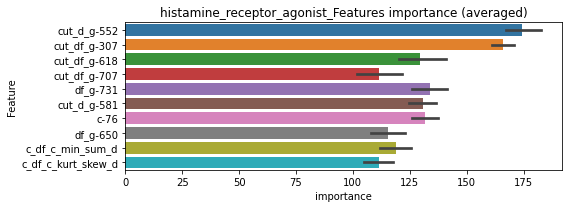

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000721157	valid_1's binary_logloss: 0.0209988
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000512245	valid_1's binary_logloss: 0.00956695


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000615263	valid_1's binary_logloss: 0.0214512


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000882442	valid_1's binary_logloss: 0.015586
Training until validation scores don't improve for 29 rounds


histamine_receptor_agonist logloss: 0.017984734428819128


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000717478	valid_1's binary_logloss: 0.0223112


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6823
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6823


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0315524	valid_1's binary_logloss: 0.11298
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0196303	valid_1's binary_logloss: 0.109187
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0311875	valid_1's binary_logloss: 0.12018
Early stopping, best iteration is:
[1467]	training's binary_logloss: 0.0204551	valid_1's binary_logloss: 0.116416
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0315237	valid_1's binary_logloss: 0.115207
Early stopping, best iteration is:
[1334]	training's binary_logloss: 0.0230528	valid_1's binary_logloss: 0.112361


1 / 3, AUC score:0.974, PR-AUC:0.950
y_Threshold: 0.0534017, Threshold: 0.0939308, pos_neg_ratio: 0.8000000
Remove_noisy_data: 486 → Positive_corect_labels: 1258/7701
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0939308, conf_0:0.06575, conf_1:0.12211
threshold: 0.0939308, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1258.0/7701, y_label_rate: 0.1633554
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0220684	valid_1's binary_logloss: 0.0773026
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0109572	valid_1's binary_logloss: 0.0699783
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0232164	valid_1's binary_logloss: 0.0645127
[2000]	training's binary_logloss: 0.0108164	valid_1's binary_logloss: 0.0549812
Early stopping, best iteration is:
[2686]	training's binary_logloss: 0.00791353	valid_1's binary_logloss: 0.0525904
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0228728	valid_1's binary_logloss: 0.0738247
[2000]	training's binary_logloss: 0.0107944	valid_1's binary_logloss: 0.0669553
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0102566	valid_1's binary_logloss: 0.0665762


2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0612890, Threshold: 0.0939308, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 1208.0/7601
p_label_rate: 0.0080362 Vs.target_rate: 0.01012
Num_p_label: 32.0, Expected: 40.3, Threshold: 0.0939308, conf_0:0.07514, conf_1:0.11272
threshold: 0.0939308, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1208.0/7601, y_label_rate: 0.1589265
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.018212	valid_1's binary_logloss: 0.0560174
Early stopping, best iteration is:
[1893]	training's binary_logloss: 0.00916708	valid_1's binary_logloss: 0.0492793
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0184483	valid_1's binary_logloss: 0.0609632
[2000]	training's binary_logloss: 0.0087661	valid_1's binary_logloss: 0.0536165
Early stopping, best iteration is:
[2561]	training's binary_logloss: 0.00672497	valid_1's binary_logloss: 0.0518473
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0191264	valid_1's binary_logloss: 0.0489528
[2000]	training's binary_logloss: 0.00916696	valid_1's binary_logloss: 0.0400977
[3000]	training's binary_logloss: 0.0060031	valid_1's binary_logloss: 0.0371094
Early stopping, best iteration is:
[3044]	training's binary_logloss: 0.00591126	valid_1's binary_logloss:

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0570790, Threshold: 0.0939308, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 1185.0/7555
p_label_rate: 0.0070316 Vs.target_rate: 0.01012
Num_p_label: 28.0, Expected: 40.3, Threshold: 0.0939308, conf_0:0.08454, conf_1:0.10332
threshold: 0.0939308, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 1185.0/7555, y_label_rate: 0.1568498


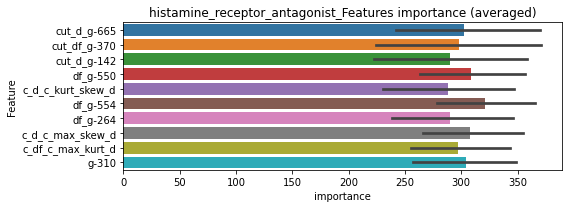

len(train_index) : 5036
len(valid_index) : 2519
================================= fold 1/3 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0348324	valid_1's binary_logloss: 0.0708648
[2000]	training's binary_logloss: 0.0176961	valid_1's binary_logloss: 0.0561765
[3000]	training's binary_logloss: 0.0116945	valid_1's binary_logloss: 0.0504339
[4000]	training's binary_logloss: 0.00875276	valid_1's binary_logloss: 0.0477497
Early stopping, best iteration is:
[4271]	training's binary_logloss: 0.0081984	valid_1's binary_logloss: 0.0472632


len(train_index) : 5037
len(valid_index) : 2518
================================= fold 2/3 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0368951	valid_1's binary_logloss: 0.0645187
[2000]	training's binary_logloss: 0.018809	valid_1's binary_logloss: 0.047628
[3000]	training's binary_logloss: 0.012535	valid_1's binary_logloss: 0.0413391
[4000]	training's binary_logloss: 0.00936152	valid_1's binary_logloss: 0.0380756
[5000]	training's binary_logloss: 0.00746566	valid_1's binary_logloss: 0.0358452
[6000]	training's binary_logloss: 0.00620402	valid_1's binary_logloss: 0.0344864
[7000]	training's binary_logloss: 0.00532618	valid_1's binary_logloss: 0.0335198
[8000]	training's binary_logloss: 0.00466975	valid_1's binary_logloss: 0.0326642
Early stopping, best iteration is:
[8151]	training's binary_logloss: 0.00458444	valid_1's binary_logloss: 0.0325144


len(train_index) : 5037
len(valid_index) : 2518
================================= fold 3/3 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.035416	valid_1's binary_logloss: 0.0635372
[2000]	training's binary_logloss: 0.0181245	valid_1's binary_logloss: 0.0475812
[3000]	training's binary_logloss: 0.0120174	valid_1's binary_logloss: 0.0415792
[4000]	training's binary_logloss: 0.00897024	valid_1's binary_logloss: 0.0386552
[5000]	training's binary_logloss: 0.00717177	valid_1's binary_logloss: 0.0369801
[6000]	training's binary_logloss: 0.00598119	valid_1's binary_logloss: 0.0356929
Early stopping, best iteration is:
[6267]	training's binary_logloss: 0.00572416	valid_1's binary_logloss: 0.0352901


histamine_receptor_antagonist logloss: 0.03835710078948531
histamine_receptor_antagonist is unpredictable(><)!
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000345239	valid_1's binary_logloss: 0.000983871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000353065	valid_1's binary_logloss: 0.0021293
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000347086	valid_1's binary_logloss: 0.0019937
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000350494	valid_1's binary_logloss: 0.00132768
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019277, Threshold: 0.0171699, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000353279	valid_1's binary_logloss: 0.00294093


p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0171699, conf_0:0.01202, conf_1:0.02232
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_1: 0.0471699
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.0771699
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_3: 0.1071699
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_4: 0.1371699
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_5: 0.1671699
threshold: 0.1671699, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00034366	valid_1's binary_logloss: 0.00101863
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000338064	valid_1's binary_logloss: 0.00189239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000342063	valid_1's binary_logloss: 0.00128413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000347968	valid_1's binary_logloss: 0.00164299
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0757607, Threshold: 0.1671699, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0062783 Vs.target_rate: 0.00101
Num_p_label: 25.0, Expected: 4.0, Threshold: 0.1671699, conf_0:0.13374, conf_1:0.20060


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000342222	valid_1's binary_logloss: 0.00343589


Num_p_label: 24.0, Expected: 4.0, Adj_threshold_1: 0.1971699
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.2271699
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.2571699
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_4: 0.2871699
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_5: 0.3171699
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_6: 0.3471699
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_7: 0.3771699
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_8: 0.4071699
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_9: 0.4371699
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_10: 0.4671699
threshold: 0.4671699, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00034366	valid_1's binary_logloss: 0.00101863
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000338064	valid_1's binary_logloss: 0.00189239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000342063	valid_1's binary_logloss: 0.00128413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000347968	valid_1's binary_logloss: 0.00164299
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0757607, Threshold: 0.4671699, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000342222	valid_1's binary_logloss: 0.00343589


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00101
Num_p_label: 12.0, Expected: 4.0, Threshold: 0.4671699, conf_0:0.42045, conf_1:0.51389
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.4971699
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_2: 0.5271699
threshold: 0.5271699, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


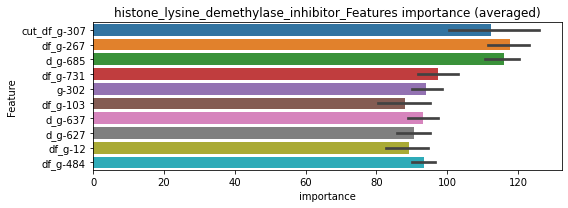

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000347491	valid_1's binary_logloss: 0.00122681


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000338625	valid_1's binary_logloss: 0.00193273


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000337381	valid_1's binary_logloss: 0.00158484


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00034407	valid_1's binary_logloss: 0.0012979


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00034613	valid_1's binary_logloss: 0.00250224


histone_lysine_demethylase_inhibitor logloss: 0.0017092835716252185
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000391794	valid_1's binary_logloss: 0.00637885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000527468	valid_1's binary_logloss: 0.010514
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000377465	valid_1's binary_logloss: 0.000944489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000381187	valid_1's binary_logloss: 0.000805075
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0025937, Threshold: 0.0071797, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000425913	valid_1's binary_logloss: 0.0178754


Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0071797, conf_0:0.00503, conf_1:0.00933
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0371797
threshold: 0.0371797, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000373211	valid_1's binary_logloss: 0.00186867
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000365642	valid_1's binary_logloss: 0.00176597
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000370311	valid_1's binary_logloss: 0.0101024
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000370685	valid_1's binary_logloss: 0.00300257
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171325, Threshold: 0.0371797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000428497	valid_1's binary_logloss: 0.010987


p_label_rate: 0.0035158 Vs.target_rate: 0.00134
Num_p_label: 14.0, Expected: 5.4, Threshold: 0.0371797, conf_0:0.02974, conf_1:0.04462
Num_p_label: 4.0, Expected: 5.4, Adj_threshold_1: 0.0671797
threshold: 0.0671797, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000382917	valid_1's binary_logloss: 0.002943
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000360571	valid_1's binary_logloss: 0.00131997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000370013	valid_1's binary_logloss: 0.00908517
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000366157	valid_1's binary_logloss: 0.00250774
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000352769	valid_1's binary_logloss: 0.00813329


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136821, Threshold: 0.0671797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0010045 Vs.target_rate: 0.00134
Num_p_label: 4.0, Expected: 5.4, Threshold: 0.0671797, conf_0:0.06046, conf_1:0.07390
threshold: 0.0671797, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


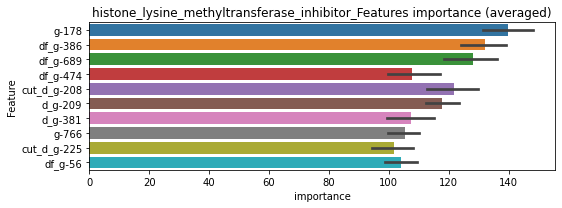

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000369865	valid_1's binary_logloss: 0.00412862


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000367593	valid_1's binary_logloss: 0.00155615
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000366755	valid_1's binary_logloss: 0.00155212


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000387651	valid_1's binary_logloss: 0.00621743


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000374133	valid_1's binary_logloss: 0.00191299


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000377132	valid_1's binary_logloss: 0.00683337


histone_lysine_methyltransferase_inhibitor logloss: 0.004128267492362235
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00140714	valid_1's binary_logloss: 0.0496914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000561853	valid_1's binary_logloss: 0.010795
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000556367	valid_1's binary_logloss: 0.0106852
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000604907	valid_1's binary_logloss: 0.0111975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000583725	valid_1's binary_logloss: 0.0189048


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054858, Threshold: 0.1019320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.1019320, conf_0:0.07135, conf_1:0.13251
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_1: 0.1319320
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_2: 0.1619320
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_3: 0.1919320
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_4: 0.2219320
threshold: 0.2219320, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000582749	valid_1's binary_logloss: 0.0227019
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000603901	valid_1's binary_logloss: 0.0187697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000559967	valid_1's binary_logloss: 0.0170772
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000553008	valid_1's binary_logloss: 0.0149906
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000540322	valid_1's binary_logloss: 0.0186693


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0702038, Threshold: 0.2219320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0123054 Vs.target_rate: 0.00302
Num_p_label: 49.0, Expected: 12.0, Threshold: 0.2219320, conf_0:0.17755, conf_1:0.26632
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_1: 0.2519320
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_2: 0.2819320
Num_p_label: 42.0, Expected: 12.0, Adj_threshold_3: 0.3119320
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_4: 0.3419320
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_5: 0.3719320
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_6: 0.4019320
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.4319320
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_8: 0.4619320
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_9: 0.4919320
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_10: 0.5219320
threshold: 0.5219320, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000617383	valid_1's binary_logloss: 0.0110118
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00077832	valid_1's binary_logloss: 0.0266468
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000542357	valid_1's binary_logloss: 0.00789899
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000545599	valid_1's binary_logloss: 0.0181332
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000550398	valid_1's binary_logloss: 0.0174188


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0557608, Threshold: 0.5219320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0072828 Vs.target_rate: 0.00302
Num_p_label: 29.0, Expected: 12.0, Threshold: 0.5219320, conf_0:0.46974, conf_1:0.57413
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_1: 0.5519320
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_2: 0.5819320
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_3: 0.6119320
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_4: 0.6419320
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_5: 0.6719320
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_6: 0.7019320
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_7: 0.7319320
threshold: 0.7319320, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


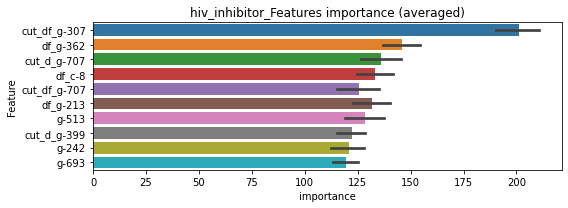

len(train_index) : 3034
len(valid_index) : 759
================================= fold 1/5 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000593446	valid_1's binary_logloss: 0.0151485


len(train_index) : 3034
len(valid_index) : 759
================================= fold 2/5 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 759
================================= fold 3/5 hiv_inhibitor=================================


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00125866	valid_1's binary_logloss: 0.0311424
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000628233	valid_1's binary_logloss: 0.0135719


len(train_index) : 3035
len(valid_index) : 758
================================= fold 4/5 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.00062854	valid_1's binary_logloss: 0.0223985


len(train_index) : 3035
len(valid_index) : 758
================================= fold 5/5 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000579481	valid_1's binary_logloss: 0.0102809


hiv_inhibitor logloss: 0.01850955741959786


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0384413	valid_1's binary_logloss: 0.134101
[2000]	training's binary_logloss: 0.0175945	valid_1's binary_logloss: 0.115043
Early stopping, best iteration is:
[2276]	training's binary_logloss: 0.0152437	valid_1's binary_logloss: 0.113076
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0385709	valid_1's binary_logloss: 0.125467
[2000]	training's binary_logloss: 0.0175772	valid_1's binary_logloss: 0.105775
Early stopping, best iteration is:
[2921]	training's binary_logloss: 0.0115567	valid_1's binary_logloss: 0.0996837
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0382736	valid_1's binary_logloss: 0.127156
[2000]	training's binary_logloss: 0.0175247	valid_1's binary_logloss: 0.107753
[3000]	training's binary_logloss: 0.0112085	valid_1's binary_logloss: 0.101831
Early stopping, best iteration is:


1 / 3, AUC score:0.980, PR-AUC:0.963
y_Threshold: 0.0615250, Threshold: 0.1627084, pos_neg_ratio: 0.8000000
Remove_noisy_data: 476 → Positive_corect_labels: 1390/8404
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.1627084, conf_0:0.11390, conf_1:0.21152
threshold: 0.1627084, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1390.0/8404, y_label_rate: 0.1653974
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0335288	valid_1's binary_logloss: 0.0930769
[2000]	training's binary_logloss: 0.0154018	valid_1's binary_logloss: 0.0721104
[3000]	training's binary_logloss: 0.00987119	valid_1's binary_logloss: 0.0647523
Early stopping, best iteration is:
[3891]	training's binary_logloss: 0.00749581	valid_1's binary_logloss: 0.0615528
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.032882	valid_1's binary_logloss: 0.098678
[2000]	training's binary_logloss: 0.015189	valid_1's binary_logloss: 0.0773172
Early stopping, best iteration is:
[2846]	training's binary_logloss: 0.0103208	valid_1's binary_logloss: 0.0707229
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0327025	valid_1's binary_logloss: 0.109102
[2000]	training's binary_logloss: 0.0150297	valid_1's binary_logloss: 0.0885184
[3000]	training's binary_logl

2 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.1007082, Threshold: 0.1627084, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1338.0/8300
p_label_rate: 0.0163235 Vs.target_rate: 0.01188
Num_p_label: 65.0, Expected: 47.3, Threshold: 0.1627084, conf_0:0.13017, conf_1:0.19525
threshold: 0.1627084, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 1338.0/8300, y_label_rate: 0.1612048
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0304538	valid_1's binary_logloss: 0.10155
[2000]	training's binary_logloss: 0.0140321	valid_1's binary_logloss: 0.0823736
Early stopping, best iteration is:
[2610]	training's binary_logloss: 0.0104807	valid_1's binary_logloss: 0.0777577
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0310763	valid_1's binary_logloss: 0.0921713
[2000]	training's binary_logloss: 0.0142881	valid_1's binary_logloss: 0.0706573
[3000]	training's binary_logloss: 0.00919855	valid_1's binary_logloss: 0.0632181
Early stopping, best iteration is:
[3443]	training's binary_logloss: 0.00793858	valid_1's binary_logloss: 0.0608263
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0309329	valid_1's binary_logloss: 0.0967469
[2000]	training's binary_logloss: 0.0142138	valid_1's binary_logloss: 0.0768731
[3000]	training's binary_lo

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1001264, Threshold: 0.1627084, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1299.0/8222
p_label_rate: 0.0168257 Vs.target_rate: 0.01188
Num_p_label: 67.0, Expected: 47.3, Threshold: 0.1627084, conf_0:0.14644, conf_1:0.17898
threshold: 0.1627084, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 1299.0/8222, y_label_rate: 0.1579908


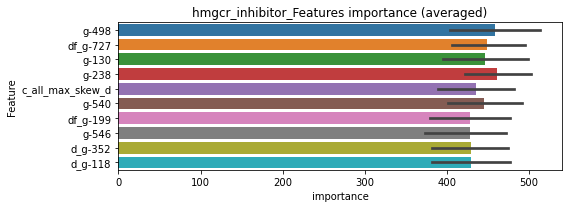

len(train_index) : 5481
len(valid_index) : 2741
================================= fold 1/3 hmgcr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0627096	valid_1's binary_logloss: 0.119108
[2000]	training's binary_logloss: 0.0310988	valid_1's binary_logloss: 0.0860849
[3000]	training's binary_logloss: 0.0203838	valid_1's binary_logloss: 0.0736165
[4000]	training's binary_logloss: 0.0151229	valid_1's binary_logloss: 0.0671781
[5000]	training's binary_logloss: 0.0120193	valid_1's binary_logloss: 0.0629325
[6000]	training's binary_logloss: 0.00998024	valid_1's binary_logloss: 0.0602357
[7000]	training's binary_logloss: 0.00854435	valid_1's binary_logloss: 0.0582843
Early stopping, best iteration is:
[7165]	training's binary_logloss: 0.00834198	valid_1's binary_logloss: 0.0579248


len(train_index) : 5481
len(valid_index) : 2741
================================= fold 2/3 hmgcr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.061986	valid_1's binary_logloss: 0.124621
[2000]	training's binary_logloss: 0.0306441	valid_1's binary_logloss: 0.0912576
[3000]	training's binary_logloss: 0.0200277	valid_1's binary_logloss: 0.0782188
[4000]	training's binary_logloss: 0.0148672	valid_1's binary_logloss: 0.0713104
[5000]	training's binary_logloss: 0.0118087	valid_1's binary_logloss: 0.067247
[6000]	training's binary_logloss: 0.00980677	valid_1's binary_logloss: 0.0644113
[7000]	training's binary_logloss: 0.00839983	valid_1's binary_logloss: 0.0623722
Early stopping, best iteration is:
[7724]	training's binary_logloss: 0.00760535	valid_1's binary_logloss: 0.061051


len(train_index) : 5482
len(valid_index) : 2740
================================= fold 3/3 hmgcr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0636307	valid_1's binary_logloss: 0.116525
[2000]	training's binary_logloss: 0.0318179	valid_1's binary_logloss: 0.0818393
[3000]	training's binary_logloss: 0.0208527	valid_1's binary_logloss: 0.0683769
[4000]	training's binary_logloss: 0.0154636	valid_1's binary_logloss: 0.060962
[5000]	training's binary_logloss: 0.0122844	valid_1's binary_logloss: 0.0566307
[6000]	training's binary_logloss: 0.0101811	valid_1's binary_logloss: 0.0534406
[7000]	training's binary_logloss: 0.00871298	valid_1's binary_logloss: 0.0511253
Early stopping, best iteration is:
[7244]	training's binary_logloss: 0.00841397	valid_1's binary_logloss: 0.0506388


hmgcr_inhibitor logloss: 0.056538918012162674
hmgcr_inhibitor is unpredictable(><)!
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00223496	valid_1's binary_logloss: 0.0569787
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000767313	valid_1's binary_logloss: 0.0251964
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00123931	valid_1's binary_logloss: 0.0313395
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000937387	valid_1's binary_logloss: 0.0219431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000756813	valid_1's binary_logloss: 0.0393924


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0139682, Threshold: 0.1567896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1567896, conf_0:0.10975, conf_1:0.20383
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_1: 0.1867896
Num_p_label: 28.0, Expected: 15.6, Adj_threshold_2: 0.2167896
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_3: 0.2467896
Num_p_label: 22.0, Expected: 15.6, Adj_threshold_4: 0.2767896
threshold: 0.2767896, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00103654	valid_1's binary_logloss: 0.0368176
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000736998	valid_1's binary_logloss: 0.0259924
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00114061	valid_1's binary_logloss: 0.039399
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000701002	valid_1's binary_logloss: 0.0174347
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000647784	valid_1's binary_logloss: 0.0209932


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0738692, Threshold: 0.2767896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0173280 Vs.target_rate: 0.00391
Num_p_label: 69.0, Expected: 15.6, Threshold: 0.2767896, conf_0:0.22143, conf_1:0.33215
Num_p_label: 62.0, Expected: 15.6, Adj_threshold_1: 0.3067896
Num_p_label: 57.0, Expected: 15.6, Adj_threshold_2: 0.3367896
Num_p_label: 54.0, Expected: 15.6, Adj_threshold_3: 0.3667896
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_4: 0.3967896
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_5: 0.4267896
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_6: 0.4567896
Num_p_label: 33.0, Expected: 15.6, Adj_threshold_7: 0.4867896
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_8: 0.5167896
Num_p_label: 28.0, Expected: 15.6, Adj_threshold_9: 0.5467896
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_10: 0.5767896
threshold: 0.5767896, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000673723	valid_1's binary_logloss: 0.0286685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000911978	valid_1's binary_logloss: 0.0343401
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000665881	valid_1's binary_logloss: 0.0137227
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.0006306	valid_1's binary_logloss: 0.0182129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00109576	valid_1's binary_logloss: 0.0266203


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0702932, Threshold: 0.5767896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 631.0/3749
p_label_rate: 0.0090407 Vs.target_rate: 0.00391
Num_p_label: 36.0, Expected: 15.6, Threshold: 0.5767896, conf_0:0.51911, conf_1:0.63447
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_1: 0.6067896
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_2: 0.6367896
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_3: 0.6667896
Num_p_label: 23.0, Expected: 15.6, Adj_threshold_4: 0.6967896
threshold: 0.6967896, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 631.0/3749, y_label_rate: 0.1683115


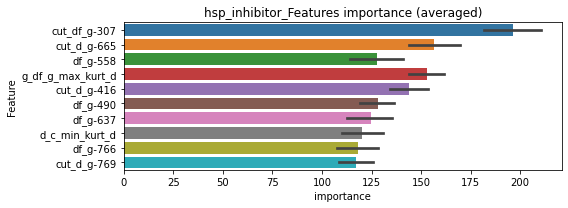

len(train_index) : 2999
len(valid_index) : 750
================================= fold 1/5 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000823415	valid_1's binary_logloss: 0.0229566


len(train_index) : 2999
len(valid_index) : 750
================================= fold 2/5 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 2999


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000944955	valid_1's binary_logloss: 0.0211378


len(valid_index) : 750
================================= fold 3/5 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00078925	valid_1's binary_logloss: 0.0157117


len(train_index) : 2999
len(valid_index) : 750
================================= fold 4/5 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3000
len(valid_index) : 749
================================= fold 5/5 hsp_inhibitor=================================


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00138902	valid_1's binary_logloss: 0.0251794
Training until validation scores don't improve for 29 rounds


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00101092	valid_1's binary_logloss: 0.0368872


hsp_inhibitor logloss: 0.024371178838412895
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000420019	valid_1's binary_logloss: 0.0123349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000590529	valid_1's binary_logloss: 0.0149618
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000429455	valid_1's binary_logloss: 0.0029177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000434188	valid_1's binary_logloss: 0.00181013
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000428382	valid_1's binary_logloss: 0.0142327


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030918, Threshold: 0.0174550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0174550, conf_0:0.01222, conf_1:0.02269
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0474550
threshold: 0.0474550, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000427877	valid_1's binary_logloss: 0.0103549
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00052702	valid_1's binary_logloss: 0.0165554
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000419507	valid_1's binary_logloss: 0.00198776
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000438041	valid_1's binary_logloss: 0.00192668
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000420066	valid_1's binary_logloss: 0.0139104


y_Threshold: 0.0423636, Threshold: 0.0474550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0125565 Vs.target_rate: 0.00155
Num_p_label: 50.0, Expected: 6.2, Threshold: 0.0474550, conf_0:0.03796, conf_1:0.05695
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_1: 0.0774550
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_2: 0.1074550
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.1374550
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_4: 0.1674550
threshold: 0.1674550, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000423239	valid_1's binary_logloss: 0.00759569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000537181	valid_1's binary_logloss: 0.00517511
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00045035	valid_1's binary_logloss: 0.0169462
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000432786	valid_1's binary_logloss: 0.0031376
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270532, Threshold: 0.1674550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000516757	valid_1's binary_logloss: 0.0124891


p_label_rate: 0.0047715 Vs.target_rate: 0.00155
Num_p_label: 19.0, Expected: 6.2, Threshold: 0.1674550, conf_0:0.15071, conf_1:0.18420
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.1974550
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_2: 0.2274550
threshold: 0.2274550, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


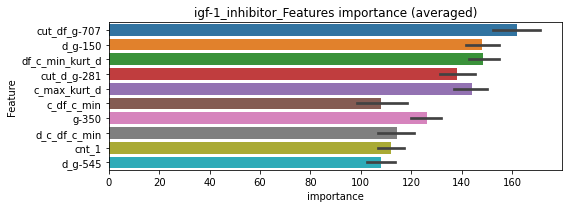

len(train_index) : 3044
len(valid_index) : 761
================================= fold 1/5 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3044
len(valid_index) : 761
================================= fold 2/5 igf-1_inhibitor=================================


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000531578	valid_1's binary_logloss: 0.00620865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000447084	valid_1's binary_logloss: 0.0036988


len(train_index) : 3044
len(valid_index) : 761
================================= fold 3/5 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3044
len(valid_index) : 761
================================= fold 4/5 igf-1_inhibitor=================================


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000660378	valid_1's binary_logloss: 0.0152688
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000428168	valid_1's binary_logloss: 0.00286171


len(train_index) : 3044
len(valid_index) : 761
================================= fold 5/5 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds


igf-1_inhibitor logloss: 0.008693765252163482


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000918773	valid_1's binary_logloss: 0.0154293


ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000349402	valid_1's binary_logloss: 0.00588097
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000351364	valid_1's binary_logloss: 0.00292711
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000343473	valid_1's binary_logloss: 0.00258658
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000341289	valid_1's binary_logloss: 0.000852718
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000340176	valid_1's binary_logloss: 0.00133801


y_Threshold: 0.0027754, Threshold: 0.0114116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0114116, conf_0:0.00799, conf_1:0.01484
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_1: 0.0414116
threshold: 0.0414116, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000332924	valid_1's binary_logloss: 0.00561463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00034	valid_1's binary_logloss: 0.00238998
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000331549	valid_1's binary_logloss: 0.00133559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000327731	valid_1's binary_logloss: 0.000737374
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000321934	valid_1's binary_logloss: 0.00155991


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0255290, Threshold: 0.0414116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0085384 Vs.target_rate: 0.00126
Num_p_label: 34.0, Expected: 5.0, Threshold: 0.0414116, conf_0:0.03313, conf_1:0.04969
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.0714116
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1014116
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_3: 0.1314116
threshold: 0.1314116, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000332924	valid_1's binary_logloss: 0.00561463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00034	valid_1's binary_logloss: 0.00238998
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000331549	valid_1's binary_logloss: 0.00133559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000327731	valid_1's binary_logloss: 0.000737374
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0255290, Threshold: 0.1314116, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000321934	valid_1's binary_logloss: 0.00155991


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00126
Num_p_label: 7.0, Expected: 5.0, Threshold: 0.1314116, conf_0:0.11827, conf_1:0.14455
threshold: 0.1314116, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


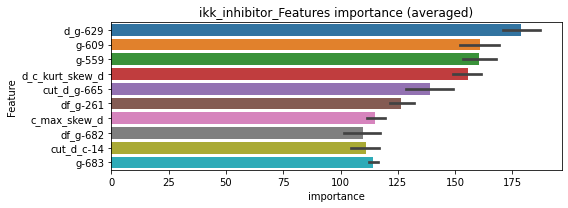

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000349712	valid_1's binary_logloss: 0.00489232


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000328222	valid_1's binary_logloss: 0.00263772
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000327824	valid_1's binary_logloss: 0.00263643


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00032778	valid_1's binary_logloss: 0.00150969
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000321688	valid_1's binary_logloss: 0.00149169


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000328992	valid_1's binary_logloss: 0.000766914
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.000323474	valid_1's binary_logloss: 0.000757047


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000326665	valid_1's binary_logloss: 0.00119199
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000323874	valid_1's binary_logloss: 0.00118574


ikk_inhibitor logloss: 0.0021946974956281785
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000359178	valid_1's binary_logloss: 0.00571449
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000345903	valid_1's binary_logloss: 0.00386148
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00033507	valid_1's binary_logloss: 0.00897714
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000351089	valid_1's binary_logloss: 0.00127885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000344087	valid_1's binary_logloss: 0.00342606


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019932, Threshold: 0.0106673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0106673, conf_0:0.00747, conf_1:0.01387
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.0406673
threshold: 0.0406673, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000334419	valid_1's binary_logloss: 0.00538716
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000338892	valid_1's binary_logloss: 0.00391335
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000340894	valid_1's binary_logloss: 0.0099463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000328564	valid_1's binary_logloss: 0.000818907
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199470, Threshold: 0.0406673, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000339243	valid_1's binary_logloss: 0.00335914


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0085384 Vs.target_rate: 0.00130
Num_p_label: 34.0, Expected: 5.2, Threshold: 0.0406673, conf_0:0.03253, conf_1:0.04880
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_1: 0.0706673
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.1006673
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_3: 0.1306673
threshold: 0.1306673, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000334419	valid_1's binary_logloss: 0.00538716
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000338892	valid_1's binary_logloss: 0.00391335
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000340894	valid_1's binary_logloss: 0.0099463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000328564	valid_1's binary_logloss: 0.000818907
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199470, Threshold: 0.1306673, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000339243	valid_1's binary_logloss: 0.00335914


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, Expected: 5.2, Threshold: 0.1306673, conf_0:0.11760, conf_1:0.14373
threshold: 0.1306673, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


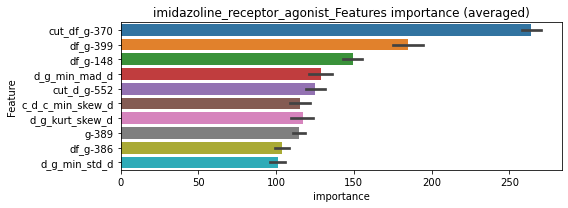

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000346453	valid_1's binary_logloss: 0.00317547


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000356124	valid_1's binary_logloss: 0.00496778


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000352846	valid_1's binary_logloss: 0.0114899


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000354291	valid_1's binary_logloss: 0.00108408


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000364671	valid_1's binary_logloss: 0.00255984


imidazoline_receptor_agonist logloss: 0.004655110032276298
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00121438	valid_1's binary_logloss: 0.0259298
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000985991	valid_1's binary_logloss: 0.0283559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000864205	valid_1's binary_logloss: 0.0272473
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00117551	valid_1's binary_logloss: 0.0397451
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000883363	valid_1's binary_logloss: 0.0293013


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0078143, Threshold: 0.0186712, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0186712, conf_0:0.01307, conf_1:0.02427
Num_p_label: 6.0, Expected: 12.2, Adj_threshold_1: 0.0486712
threshold: 0.0486712, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 651.0/3790, y_label_rate: 0.1717678
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00180411	valid_1's binary_logloss: 0.0321474
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000575703	valid_1's binary_logloss: 0.020401
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000701243	valid_1's binary_logloss: 0.0306379
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000624506	valid_1's binary_logloss: 0.0101261
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000567533	valid_1's binary_logloss: 0.0264379


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0209933, Threshold: 0.0486712, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00307
Num_p_label: 14.0, Expected: 12.2, Threshold: 0.0486712, conf_0:0.03894, conf_1:0.05841
threshold: 0.0486712, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000708038	valid_1's binary_logloss: 0.0263138
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000575752	valid_1's binary_logloss: 0.0146463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000698956	valid_1's binary_logloss: 0.0281314
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000563391	valid_1's binary_logloss: 0.00816547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000544255	valid_1's binary_logloss: 0.0119874


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246799, Threshold: 0.0486712, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.0486712, conf_0:0.04380, conf_1:0.05354
threshold: 0.0486712, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3782, y_label_rate: 0.1710735


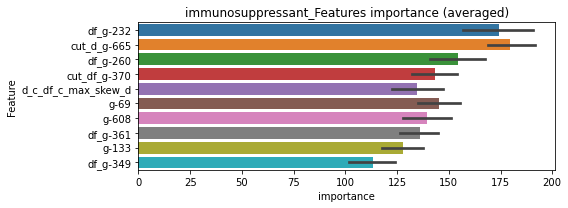

len(train_index) : 3025
len(valid_index) : 757
================================= fold 1/5 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3025
len(valid_index) : 757
================================= fold 2/5 immunosuppressant=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00100837	valid_1's binary_logloss: 0.0275252
Training until validation scores don't improve for 29 rounds


len(train_index) : 3026
len(valid_index) : 756
================================= fold 3/5 immunosuppressant=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00111372	valid_1's binary_logloss: 0.0215787
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000612153	valid_1's binary_logloss: 0.0193277


len(train_index) : 3026
len(valid_index) : 756
================================= fold 4/5 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000633342	valid_1's binary_logloss: 0.0109567


len(train_index) : 3026
len(valid_index) : 756
================================= fold 5/5 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000598089	valid_1's binary_logloss: 0.0144478


immunosuppressant logloss: 0.018770263842014655
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000587968	valid_1's binary_logloss: 0.0113941
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000495612	valid_1's binary_logloss: 0.00447548
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000399677	valid_1's binary_logloss: 0.00124827
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000376379	valid_1's binary_logloss: 0.00156859
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025075, Threshold: 0.0099442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0099442, conf_0:0.00696, conf_1:0.01293


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000419338	valid_1's binary_logloss: 0.00777547


Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0399442
threshold: 0.0399442, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000419979	valid_1's binary_logloss: 0.00983704
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000390088	valid_1's binary_logloss: 0.00383879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000389248	valid_1's binary_logloss: 0.0010252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000388014	valid_1's binary_logloss: 0.00143847
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000399711	valid_1's binary_logloss: 0.0080393


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162202, Threshold: 0.0399442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0399442, conf_0:0.03196, conf_1:0.04793
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_1: 0.0699442
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.0999442
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1299442
threshold: 0.1299442, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000419979	valid_1's binary_logloss: 0.00983704
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000390088	valid_1's binary_logloss: 0.00383879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000389248	valid_1's binary_logloss: 0.0010252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000388014	valid_1's binary_logloss: 0.00143847
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162202, Threshold: 0.1299442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000399711	valid_1's binary_logloss: 0.0080393


p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.1299442, conf_0:0.11695, conf_1:0.14294
threshold: 0.1299442, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


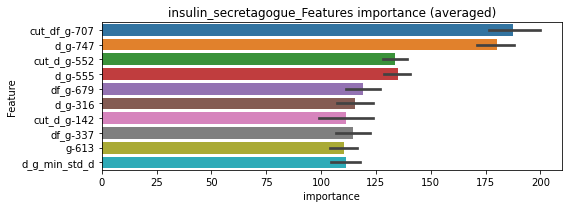

len(train_index) : 3044
len(valid_index) : 762
================================= fold 1/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000403157	valid_1's binary_logloss: 0.00811366


len(train_index) : 3045
len(valid_index) : 761
================================= fold 2/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000389549	valid_1's binary_logloss: 0.00386684


len(train_index) : 3045
len(valid_index) : 761
================================= fold 3/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000391293	valid_1's binary_logloss: 0.00110096


len(train_index) : 3045
len(valid_index) : 761
================================= fold 4/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000389736	valid_1's binary_logloss: 0.00147533


len(train_index) : 3045
len(valid_index) : 761
================================= fold 5/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds


insulin_secretagogue logloss: 0.004523636561781944


Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000451462	valid_1's binary_logloss: 0.00805487


insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000578029	valid_1's binary_logloss: 0.0143913
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000482968	valid_1's binary_logloss: 0.00404024
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000502639	valid_1's binary_logloss: 0.0131701
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00055454	valid_1's binary_logloss: 0.0109805
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000568789	valid_1's binary_logloss: 0.0263762


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038921, Threshold: 0.0100842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0100842, conf_0:0.00706, conf_1:0.01311
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0400842
threshold: 0.0400842, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000490793	valid_1's binary_logloss: 0.0133471
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000453917	valid_1's binary_logloss: 0.00393486
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000507016	valid_1's binary_logloss: 0.0110171
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000542079	valid_1's binary_logloss: 0.0100105
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0189784, Threshold: 0.0400842, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000572531	valid_1's binary_logloss: 0.0246113


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0017579 Vs.target_rate: 0.00214
Num_p_label: 7.0, Expected: 8.5, Threshold: 0.0400842, conf_0:0.03207, conf_1:0.04810
threshold: 0.0400842, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000559184	valid_1's binary_logloss: 0.0217104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000467039	valid_1's binary_logloss: 0.0058478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000448166	valid_1's binary_logloss: 0.0120868
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00050536	valid_1's binary_logloss: 0.00900487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000474829	valid_1's binary_logloss: 0.018458


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0137253, Threshold: 0.0400842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0020090 Vs.target_rate: 0.00214
Num_p_label: 8.0, Expected: 8.5, Threshold: 0.0400842, conf_0:0.03608, conf_1:0.04409
threshold: 0.0400842, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


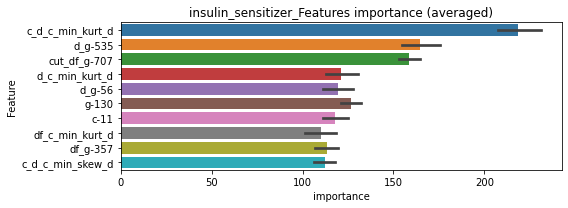

len(train_index) : 3038
len(valid_index) : 760
================================= fold 1/5 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000469213	valid_1's binary_logloss: 0.00572144


len(train_index) : 3038
len(valid_index) : 760
================================= fold 2/5 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000488219	valid_1's binary_logloss: 0.00818784


len(train_index) : 3038
len(valid_index) : 760
================================= fold 3/5 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3039
len(valid_index) : 759
================================= fold 4/5 insulin_sensitizer=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000805334	valid_1's binary_logloss: 0.0189538
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.00046412	valid_1's binary_logloss: 0.0101036


len(train_index) : 3039
len(valid_index) : 759
================================= fold 5/5 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000455167	valid_1's binary_logloss: 0.00619734


insulin_sensitizer logloss: 0.009835344143227067
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00042367	valid_1's binary_logloss: 0.00541454
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000441634	valid_1's binary_logloss: 0.00629624
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000500649	valid_1's binary_logloss: 0.00424762
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000622041	valid_1's binary_logloss: 0.0124969
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000433345	valid_1's binary_logloss: 0.00789678


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040986, Threshold: 0.0143281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0143281, conf_0:0.01003, conf_1:0.01863
Num_p_label: 7.0, Expected: 7.0, Adj_threshold_1: 0.0443281
threshold: 0.0443281, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000412515	valid_1's binary_logloss: 0.00506012
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000426899	valid_1's binary_logloss: 0.00531682
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000439091	valid_1's binary_logloss: 0.00295134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000646204	valid_1's binary_logloss: 0.0086745
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000422789	valid_1's binary_logloss: 0.00611045


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0378144, Threshold: 0.0443281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0067805 Vs.target_rate: 0.00176
Num_p_label: 27.0, Expected: 7.0, Threshold: 0.0443281, conf_0:0.03546, conf_1:0.05319
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_1: 0.0743281
threshold: 0.0743281, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000418226	valid_1's binary_logloss: 0.00190449
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000430571	valid_1's binary_logloss: 0.0032987
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000440548	valid_1's binary_logloss: 0.00949822
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000420223	valid_1's binary_logloss: 0.00537485
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0385222, Threshold: 0.0743281, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000501619	valid_1's binary_logloss: 0.00412376


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, Expected: 7.0, Threshold: 0.0743281, conf_0:0.06690, conf_1:0.08176
threshold: 0.0743281, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


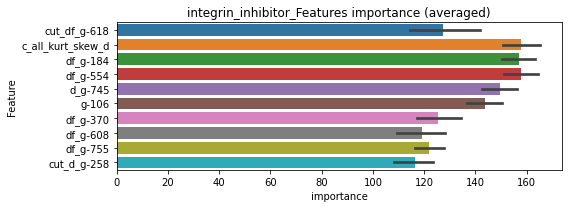

len(train_index) : 3042
len(valid_index) : 761
================================= fold 1/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000415966	valid_1's binary_logloss: 0.00236939
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.000412089	valid_1's binary_logloss: 0.00235635


len(train_index) : 3042
len(valid_index) : 761
================================= fold 2/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000422294	valid_1's binary_logloss: 0.00298806


len(train_index) : 3042
len(valid_index) : 761
================================= fold 3/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000525978	valid_1's binary_logloss: 0.0104695


len(train_index) : 3043
len(valid_index) : 760
================================= fold 4/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00041955	valid_1's binary_logloss: 0.00433642
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000422785	valid_1's binary_logloss: 0.00432892


len(train_index) : 3043
len(valid_index) : 760
================================= fold 5/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00045391	valid_1's binary_logloss: 0.00462581


integrin_inhibitor logloss: 0.004954727188259101
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.0010634	valid_1's binary_logloss: 0.0503535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00122993	valid_1's binary_logloss: 0.0377042
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000861136	valid_1's binary_logloss: 0.0278193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000757042	valid_1's binary_logloss: 0.0105405
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00102594	valid_1's binary_logloss: 0.0375189


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0088723, Threshold: 0.1290541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1290541, conf_0:0.09034, conf_1:0.16777
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_1: 0.1590541
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_2: 0.1890541
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.2190541
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_4: 0.2490541
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.2790541
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_6: 0.3090541
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_7: 0.3390541
threshold: 0.3390541, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.0013073	valid_1's binary_logloss: 0.0338053
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000729299	valid_1's binary_logloss: 0.0193224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000668873	valid_1's binary_logloss: 0.0209523
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000659589	valid_1's binary_logloss: 0.0284654
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000945056	valid_1's binary_logloss: 0.0291787


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0430887, Threshold: 0.3390541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3784
p_label_rate: 0.0092918 Vs.target_rate: 0.00386
Num_p_label: 37.0, Expected: 15.4, Threshold: 0.3390541, conf_0:0.27124, conf_1:0.40686
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_1: 0.3690541
Num_p_label: 34.0, Expected: 15.4, Adj_threshold_2: 0.3990541
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_3: 0.4290541
Num_p_label: 30.0, Expected: 15.4, Adj_threshold_4: 0.4590541
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_5: 0.4890541
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_6: 0.5190541
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_7: 0.5490541
threshold: 0.5490541, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 647.0/3784, y_label_rate: 0.1709831
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000628157	valid_1's binary_logloss: 0.0218826
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000729795	valid_1's binary_logloss: 0.0370337
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000666997	valid_1's binary_logloss: 0.0212267
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000697928	valid_1's binary_logloss: 0.0153408
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000653079	valid_1's binary_logloss: 0.0180842


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0385465, Threshold: 0.5490541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0060271 Vs.target_rate: 0.00386
Num_p_label: 24.0, Expected: 15.4, Threshold: 0.5490541, conf_0:0.49415, conf_1:0.60396
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_1: 0.5790541
threshold: 0.5790541, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 645.0/3780, y_label_rate: 0.1706349


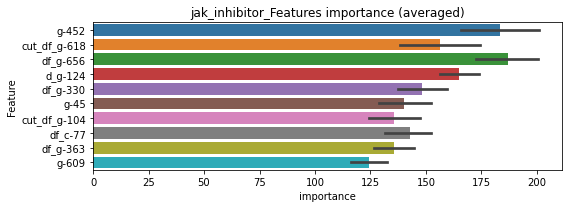

len(train_index) : 3024
len(valid_index) : 756
================================= fold 1/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3024
len(valid_index) : 756


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00101908	valid_1's binary_logloss: 0.0370644


================================= fold 2/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000850733	valid_1's binary_logloss: 0.0203892


len(train_index) : 3024
len(valid_index) : 756
================================= fold 3/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00095301	valid_1's binary_logloss: 0.0296072


len(train_index) : 3024
len(valid_index) : 756
================================= fold 4/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.00067579	valid_1's binary_logloss: 0.0153912


len(train_index) : 3024
len(valid_index) : 756
================================= fold 5/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.0007451	valid_1's binary_logloss: 0.0231304


jak_inhibitor logloss: 0.025116471551013826


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0356351	valid_1's binary_logloss: 0.12375
[2000]	training's binary_logloss: 0.016649	valid_1's binary_logloss: 0.110556
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.015103	valid_1's binary_logloss: 0.109449
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0356326	valid_1's binary_logloss: 0.130872
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0174032	valid_1's binary_logloss: 0.118264
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0368018	valid_1's binary_logloss: 0.114917
[2000]	training's binary_logloss: 0.0172144	valid_1's binary_logloss: 0.102032
Early stopping, best iteration is:
[2149]	training's binary_logloss: 0.0159007	valid_1's binary_logloss: 0.101121


1 / 3, AUC score:0.978, PR-AUC:0.958
y_Threshold: 0.0603094, Threshold: 0.1201772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 464 → Positive_corect_labels: 1274/7751
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.1201772, conf_0:0.08412, conf_1:0.15623
threshold: 0.1201772, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1274.0/7751, y_label_rate: 0.1643659
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0280635	valid_1's binary_logloss: 0.102518
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0138833	valid_1's binary_logloss: 0.0910826
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0287742	valid_1's binary_logloss: 0.0921022
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.014225	valid_1's binary_logloss: 0.0769334
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0295789	valid_1's binary_logloss: 0.0902035
[2000]	training's binary_logloss: 0.0138617	valid_1's binary_logloss: 0.0755499
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.0121021	valid_1's binary_logloss: 0.0736979


2 / 3, AUC score:0.994, PR-AUC:0.986
y_Threshold: 0.0930477, Threshold: 0.1201772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 1220.0/7643
p_label_rate: 0.0158212 Vs.target_rate: 0.01146
Num_p_label: 63.0, Expected: 45.6, Threshold: 0.1201772, conf_0:0.09614, conf_1:0.14421
threshold: 0.1201772, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1220.0/7643, y_label_rate: 0.1596232
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0256731	valid_1's binary_logloss: 0.087835
[2000]	training's binary_logloss: 0.0121335	valid_1's binary_logloss: 0.0742524
Early stopping, best iteration is:
[2195]	training's binary_logloss: 0.0109791	valid_1's binary_logloss: 0.0728821
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0258336	valid_1's binary_logloss: 0.0777679
[2000]	training's binary_logloss: 0.0123423	valid_1's binary_logloss: 0.0645229
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0112503	valid_1's binary_logloss: 0.063242
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0259083	valid_1's binary_logloss: 0.0816703
[2000]	training's binary_logloss: 0.012278	valid_1's binary_logloss: 0.0692248
Early stopping, best iteration is:
[2467]	training's binary_logloss: 0.00978944	valid_1's binary_logloss: 0.06

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0841656, Threshold: 0.1201772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 1182.0/7567
p_label_rate: 0.0153189 Vs.target_rate: 0.01146
Num_p_label: 61.0, Expected: 45.6, Threshold: 0.1201772, conf_0:0.10816, conf_1:0.13219
threshold: 0.1201772, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 1182.0/7567, y_label_rate: 0.1562046


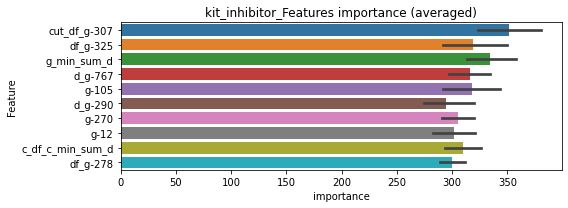

len(train_index) : 5044
len(valid_index) : 2523
================================= fold 1/3 kit_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0495155	valid_1's binary_logloss: 0.104746
[2000]	training's binary_logloss: 0.0251086	valid_1's binary_logloss: 0.0815003
[3000]	training's binary_logloss: 0.0166215	valid_1's binary_logloss: 0.0725227
Early stopping, best iteration is:
[3141]	training's binary_logloss: 0.0158463	valid_1's binary_logloss: 0.0716558


len(train_index) : 5045
len(valid_index) : 2522
================================= fold 2/3 kit_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0507077	valid_1's binary_logloss: 0.0892314
[2000]	training's binary_logloss: 0.0258453	valid_1's binary_logloss: 0.0657667
[3000]	training's binary_logloss: 0.0170868	valid_1's binary_logloss: 0.0567828
[4000]	training's binary_logloss: 0.0127369	valid_1's binary_logloss: 0.0519427
[5000]	training's binary_logloss: 0.0101271	valid_1's binary_logloss: 0.0488666
Early stopping, best iteration is:
[5767]	training's binary_logloss: 0.00877545	valid_1's binary_logloss: 0.0472515


len(train_index) : 5045
len(valid_index) : 2522
================================= fold 3/3 kit_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0506302	valid_1's binary_logloss: 0.0917945
[2000]	training's binary_logloss: 0.0256873	valid_1's binary_logloss: 0.0686005
[3000]	training's binary_logloss: 0.0169407	valid_1's binary_logloss: 0.0599289
[4000]	training's binary_logloss: 0.0126791	valid_1's binary_logloss: 0.0554761
[5000]	training's binary_logloss: 0.0101147	valid_1's binary_logloss: 0.0525005
[6000]	training's binary_logloss: 0.00841533	valid_1's binary_logloss: 0.050682
Early stopping, best iteration is:
[6157]	training's binary_logloss: 0.00819453	valid_1's binary_logloss: 0.0504278


kit_inhibitor logloss: 0.0564470489402798
kit_inhibitor is unpredictable(><)!
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000143566	valid_1's binary_logloss: 0.000189848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000142947	valid_1's binary_logloss: 0.000167413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000140204	valid_1's binary_logloss: 0.00211991
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000142591	valid_1's binary_logloss: 0.000166165
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004060, Threshold: 0.0011434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011434, conf_0:0.00080, conf_1:0.00149
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0311434
threshold: 0.0311434, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000143005	valid_1's binary_logloss: 0.000177502


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000137437	valid_1's binary_logloss: 0.000162779
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000136261	valid_1's binary_logloss: 0.000133942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00014367	valid_1's binary_logloss: 0.00159976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000136944	valid_1's binary_logloss: 0.000156467
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0625157, Threshold: 0.0311434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0311434, conf_0:0.02491, conf_1:0.03737
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0611434
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0911434
threshold: 0.0911434, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000136115	valid_1's binary_logloss: 0.000197211


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000137437	valid_1's binary_logloss: 0.000162779
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000136261	valid_1's binary_logloss: 0.000133942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00014367	valid_1's binary_logloss: 0.00159976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000136944	valid_1's binary_logloss: 0.000156467
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0625157, Threshold: 0.0911434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0911434, conf_0:0.08203, conf_1:0.10026
threshold: 0.0911434, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000136115	valid_1's binary_logloss: 0.000197211


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


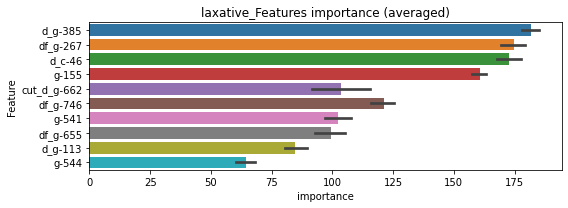

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 laxative=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139693	valid_1's binary_logloss: 0.000165593


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 laxative=================================


Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000137297	valid_1's binary_logloss: 0.000162818
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140044	valid_1's binary_logloss: 0.000141954


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 laxative=================================


Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.00013679	valid_1's binary_logloss: 0.000138635
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00013846	valid_1's binary_logloss: 0.000844012


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 laxative=================================


Early stopping, best iteration is:
[1114]	training's binary_logloss: 0.000135512	valid_1's binary_logloss: 0.000838961
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140417	valid_1's binary_logloss: 0.000149389


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 laxative=================================


Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000137677	valid_1's binary_logloss: 0.000146448
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139828	valid_1's binary_logloss: 0.000220047


laxative logloss: 0.0003004575014910444


Early stopping, best iteration is:
[1298]	training's binary_logloss: 0.000135819	valid_1's binary_logloss: 0.000215112


leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000152493	valid_1's binary_logloss: 0.000682014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000146821	valid_1's binary_logloss: 0.000377724
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000149709	valid_1's binary_logloss: 0.00081642
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00015056	valid_1's binary_logloss: 0.000216896
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004748, Threshold: 0.0011316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011316, conf_0:0.00079, conf_1:0.00147
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311316
threshold: 0.0311316, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150741	valid_1's binary_logloss: 0.000173818


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000143325	valid_1's binary_logloss: 0.000230562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000142307	valid_1's binary_logloss: 0.000161294
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000141686	valid_1's binary_logloss: 0.00377417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000141712	valid_1's binary_logloss: 0.000167575
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0174840, Threshold: 0.0311316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0311316, conf_0:0.02491, conf_1:0.03736
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0611316
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0911316
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1211316
threshold: 0.1211316, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000143034	valid_1's binary_logloss: 0.000168242


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000143325	valid_1's binary_logloss: 0.000230562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000142307	valid_1's binary_logloss: 0.000161294
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000141686	valid_1's binary_logloss: 0.00377417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000141712	valid_1's binary_logloss: 0.000167575
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0174840, Threshold: 0.1211316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.1211316, conf_0:0.10902, conf_1:0.13324
threshold: 0.1211316, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000143034	valid_1's binary_logloss: 0.000168242


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


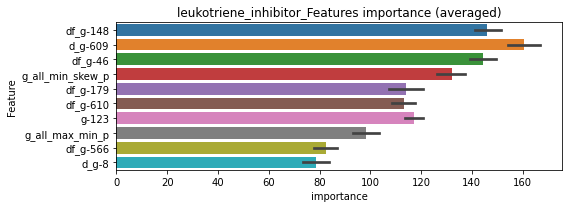

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000141996	valid_1's binary_logloss: 0.000193258
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000140981	valid_1's binary_logloss: 0.000192011


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143492	valid_1's binary_logloss: 0.000166447


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000141208	valid_1's binary_logloss: 0.000163834
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142461	valid_1's binary_logloss: 0.00103779


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000140127	valid_1's binary_logloss: 0.00102531
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142409	valid_1's binary_logloss: 0.000182947


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.000140305	valid_1's binary_logloss: 0.000180341
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142555	valid_1's binary_logloss: 0.000175454


leukotriene_inhibitor logloss: 0.0003466967922530234


Early stopping, best iteration is:
[1153]	training's binary_logloss: 0.000139973	valid_1's binary_logloss: 0.00017234


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000883187	valid_1's binary_logloss: 0.0355317
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000782759	valid_1's binary_logloss: 0.0278775
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00155569	valid_1's binary_logloss: 0.0289249
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000568496	valid_1's binary_logloss: 0.00731403
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000591185	valid_1's binary_logloss: 0.0183644


1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0052404, Threshold: 0.0118707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0118707, conf_0:0.00831, conf_1:0.01543
Num_p_label: 3.0, Expected: 10.4, Adj_threshold_1: 0.0418707
threshold: 0.0418707, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000570667	valid_1's binary_logloss: 0.0165206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000593003	valid_1's binary_logloss: 0.016216
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000544269	valid_1's binary_logloss: 0.0394134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000606648	valid_1's binary_logloss: 0.00844603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000546646	valid_1's binary_logloss: 0.0162576


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0179936, Threshold: 0.0418707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0015068 Vs.target_rate: 0.00260
Num_p_label: 6.0, Expected: 10.4, Threshold: 0.0418707, conf_0:0.03350, conf_1:0.05024
threshold: 0.0418707, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000641644	valid_1's binary_logloss: 0.0183553
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000721671	valid_1's binary_logloss: 0.0220516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000657943	valid_1's binary_logloss: 0.0201904
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00072215	valid_1's binary_logloss: 0.0198663
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000582561	valid_1's binary_logloss: 0.0146797


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169432, Threshold: 0.0418707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0015068 Vs.target_rate: 0.00260
Num_p_label: 6.0, Expected: 10.4, Threshold: 0.0418707, conf_0:0.03768, conf_1:0.04606
threshold: 0.0418707, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


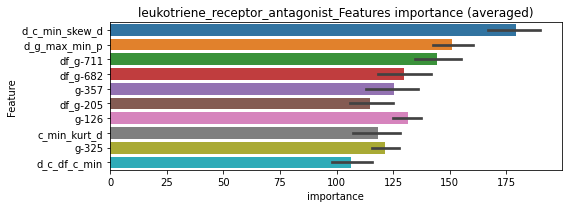

len(train_index) : 3034
len(valid_index) : 759
================================= fold 1/5 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 759
================================= fold 2/5 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00121957	valid_1's binary_logloss: 0.0192163
Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 759
================================= fold 3/5 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00100296	valid_1's binary_logloss: 0.0168087
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.00053613	valid_1's binary_logloss: 0.00982754


len(train_index) : 3035
len(valid_index) : 758
================================= fold 4/5 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3035
len(valid_index) : 758
================================= fold 5/5 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000744594	valid_1's binary_logloss: 0.0272189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000567666	valid_1's binary_logloss: 0.0103264


leukotriene_receptor_antagonist logloss: 0.016678447332866993
lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000236446	valid_1's binary_logloss: 0.00494827
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000210018	valid_1's binary_logloss: 0.000349099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000207946	valid_1's binary_logloss: 0.000563499
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000205696	valid_1's binary_logloss: 0.000466862
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008304, Threshold: 0.0017799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0017799, conf_0:0.00125, conf_1:0.00231
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0317799
threshold: 0.0317799, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00020461	valid_1's binary_logloss: 0.00181879


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000274924	valid_1's binary_logloss: 0.00490064
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000198542	valid_1's binary_logloss: 0.000329825
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000199344	valid_1's binary_logloss: 0.000423686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000205385	valid_1's binary_logloss: 0.000461463
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316703, Threshold: 0.0317799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000207401	valid_1's binary_logloss: 0.0013682


p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.0317799, conf_0:0.02542, conf_1:0.03814
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0617799
threshold: 0.0617799, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000274924	valid_1's binary_logloss: 0.00490064
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000198542	valid_1's binary_logloss: 0.000329825
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000199344	valid_1's binary_logloss: 0.000423686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000205385	valid_1's binary_logloss: 0.000461463
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316703, Threshold: 0.0617799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.0617799, conf_0:0.05560, conf_1:0.06796
threshold: 0.0617799, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000207401	valid_1's binary_logloss: 0.0013682


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


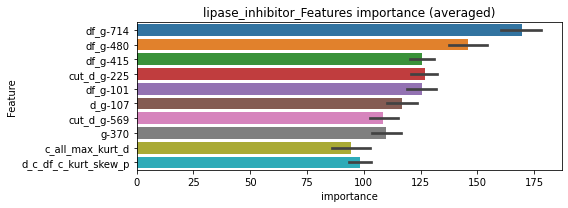

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 lipase_inhibitor=================================


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00028001	valid_1's binary_logloss: 0.0043086
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000200209	valid_1's binary_logloss: 0.000302442
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000200071	valid_1's binary_logloss: 0.000302206


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 lipase_inhibitor=================================


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000200513	valid_1's binary_logloss: 0.000332914
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 lipase_inhibitor=================================


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000201492	valid_1's binary_logloss: 0.000331356
Training until validation scores don't improve for 29 rounds


lipase_inhibitor logloss: 0.0012459913553647187


Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000202094	valid_1's binary_logloss: 0.000953255


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:313
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000573931	valid_1's binary_logloss: 0.0110483
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000709615	valid_1's binary_logloss: 0.0150345
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000627146	valid_1's binary_logloss: 0.0199437
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.0005205	valid_1's binary_logloss: 0.00839349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000615489	valid_1's binary_logloss: 0.0283867


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0051717, Threshold: 0.0823359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0823359, conf_0:0.05764, conf_1:0.10704
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_1: 0.1123359
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1423359
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_3: 0.1723359
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_4: 0.2023359
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_5: 0.2323359
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_6: 0.2623359
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_7: 0.2923359
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_8: 0.3223359
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_9: 0.3523359
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_10: 0.3823359
threshold: 0.3823359, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000511748	valid_1's binary_logloss: 0.00970535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000628705	valid_1's binary_logloss: 0.0148288
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000679652	valid_1's binary_logloss: 0.0204188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.00051705	valid_1's binary_logloss: 0.00903449
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00054004	valid_1's binary_logloss: 0.0240116


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0264066, Threshold: 0.3823359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0092918 Vs.target_rate: 0.00256
Num_p_label: 37.0, Expected: 10.2, Threshold: 0.3823359, conf_0:0.30587, conf_1:0.45880
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_1: 0.4123359
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_2: 0.4423359
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_3: 0.4723359
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_4: 0.5023359
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_5: 0.5323359
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_6: 0.5623359
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.5923359
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_8: 0.6223359
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_9: 0.6523359
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_10: 0.6823359
threshold: 0.6823359, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000658379	valid_1's binary_logloss: 0.0226488
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000512267	valid_1's binary_logloss: 0.0110851
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000507963	valid_1's binary_logloss: 0.0105458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000602202	valid_1's binary_logloss: 0.018169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000610316	valid_1's binary_logloss: 0.0163844


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0239264, Threshold: 0.6823359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0045203 Vs.target_rate: 0.00256
Num_p_label: 18.0, Expected: 10.2, Threshold: 0.6823359, conf_0:0.61410, conf_1:0.75057
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_1: 0.7123359
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_2: 0.7423359
threshold: 0.7423359, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


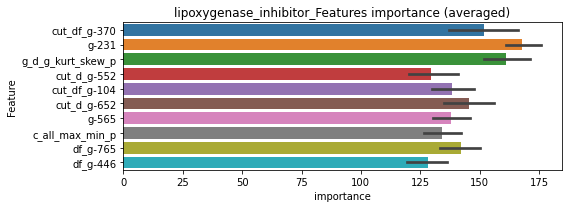

len(train_index) : 3035
len(valid_index) : 759
================================= fold 1/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000558277	valid_1's binary_logloss: 0.0107815


len(train_index) : 3035
len(valid_index) : 759
================================= fold 2/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3035
len(valid_index) : 759


Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000663605	valid_1's binary_logloss: 0.0222941


================================= fold 3/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000564818	valid_1's binary_logloss: 0.00716192


len(train_index) : 3035
len(valid_index) : 759
================================= fold 4/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000586901	valid_1's binary_logloss: 0.0149239


len(train_index) : 3036
len(valid_index) : 758
================================= fold 5/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000509116	valid_1's binary_logloss: 0.00853462
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000507315	valid_1's binary_logloss: 0.00851396


lipoxygenase_inhibitor logloss: 0.012737960421785191
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00016116	valid_1's binary_logloss: 0.00049697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000158564	valid_1's binary_logloss: 0.000363311
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000158674	valid_1's binary_logloss: 0.00177316
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000159195	valid_1's binary_logloss: 0.000199612
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004333, Threshold: 0.0020299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0020299, conf_0:0.00142, conf_1:0.00264
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0320299
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0620299
threshold: 0.0620299, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000158646	valid_1's binary_logloss: 0.000553176


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000141224	valid_1's binary_logloss: 0.000256289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000142282	valid_1's binary_logloss: 0.000145643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000139702	valid_1's binary_logloss: 0.000931924
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000141982	valid_1's binary_logloss: 0.000168711
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0772335, Threshold: 0.0620299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, Expected: 1.0, Threshold: 0.0620299, conf_0:0.04962, conf_1:0.07444
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_1: 0.0920299
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1220299
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.1520299
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.1820299


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000141177	valid_1's binary_logloss: 0.00138869


Num_p_label: 9.0, Expected: 1.0, Adj_threshold_5: 0.2120299
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_6: 0.2420299
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_7: 0.2720299
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_8: 0.3020299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.3320299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.3620299
threshold: 0.3620299, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000141224	valid_1's binary_logloss: 0.000256289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000142282	valid_1's binary_logloss: 0.000145643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000139702	valid_1's binary_logloss: 0.000931924
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000141982	valid_1's binary_logloss: 0.000168711
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0772335, Threshold: 0.3620299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.3620299, conf_0:0.32583, conf_1:0.39823
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.3920299
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.4220299
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.4520299
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.4820299
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.5120299
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.5420299
threshold: 0.5420299, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000141177	valid_1's binary_logloss: 0.00138869


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


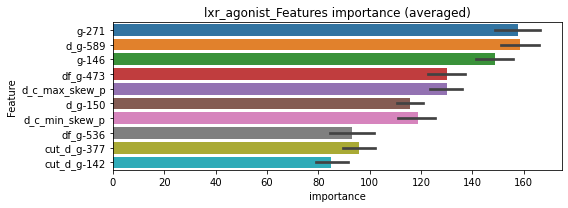

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000144564	valid_1's binary_logloss: 0.000197736
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000143584	valid_1's binary_logloss: 0.000196699


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143905	valid_1's binary_logloss: 0.000155292
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000143285	valid_1's binary_logloss: 0.000154686


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143252	valid_1's binary_logloss: 0.000432865
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.000142658	valid_1's binary_logloss: 0.000432386


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143735	valid_1's binary_logloss: 0.000177703


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 lxr_agonist=================================


Early stopping, best iteration is:
[1100]	training's binary_logloss: 0.000142672	valid_1's binary_logloss: 0.000176311
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143504	valid_1's binary_logloss: 0.000643148
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000143201	valid_1's binary_logloss: 0.000642148


lxr_agonist logloss: 0.00032037017452912666
mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000402591	valid_1's binary_logloss: 0.00716534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000394135	valid_1's binary_logloss: 0.00231403
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000400115	valid_1's binary_logloss: 0.00185974
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000383614	valid_1's binary_logloss: 0.00241872
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000381483	valid_1's binary_logloss: 0.00416825


y_Threshold: 0.0027022, Threshold: 0.0343240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0343240, conf_0:0.02403, conf_1:0.04462
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_1: 0.0643240
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_2: 0.0943240
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1243240
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.1543240
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.1843240
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2143240
threshold: 0.2143240, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000376075	valid_1's binary_logloss: 0.00660052
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000383474	valid_1's binary_logloss: 0.00238903
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000376722	valid_1's binary_logloss: 0.0013005
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000379281	valid_1's binary_logloss: 0.00109088
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381359, Threshold: 0.2143240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000386141	valid_1's binary_logloss: 0.00257291


p_label_rate: 0.0075339 Vs.target_rate: 0.00130
Num_p_label: 30.0, Expected: 5.2, Threshold: 0.2143240, conf_0:0.17146, conf_1:0.25719
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_1: 0.2443240
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_2: 0.2743240
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_3: 0.3043240
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_4: 0.3343240
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_5: 0.3643240
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_6: 0.3943240
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_7: 0.4243240
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_8: 0.4543240
threshold: 0.4543240, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000376075	valid_1's binary_logloss: 0.00660052
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000383474	valid_1's binary_logloss: 0.00238903
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000376722	valid_1's binary_logloss: 0.0013005
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000379281	valid_1's binary_logloss: 0.00109088
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381359, Threshold: 0.4543240, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000386141	valid_1's binary_logloss: 0.00257291


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, Expected: 5.2, Threshold: 0.4543240, conf_0:0.40889, conf_1:0.49976
threshold: 0.4543240, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


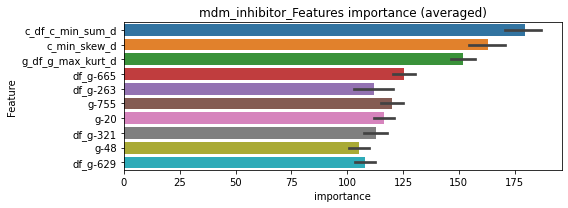

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000371531	valid_1's binary_logloss: 0.00507894


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000377562	valid_1's binary_logloss: 0.00167883


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.00037301	valid_1's binary_logloss: 0.00123906


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000384453	valid_1's binary_logloss: 0.00118184


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000386536	valid_1's binary_logloss: 0.00401042


mdm_inhibitor logloss: 0.002638304383143603
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000583616	valid_1's binary_logloss: 0.02117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000628456	valid_1's binary_logloss: 0.0258768
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000600292	valid_1's binary_logloss: 0.0146353
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000552784	valid_1's binary_logloss: 0.00452984
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000645829	valid_1's binary_logloss: 0.0235859


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0055718, Threshold: 0.0205257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0205257, conf_0:0.01437, conf_1:0.02668
Num_p_label: 3.0, Expected: 12.0, Adj_threshold_1: 0.0505257
threshold: 0.0505257, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000572587	valid_1's binary_logloss: 0.0226485
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000593198	valid_1's binary_logloss: 0.0221385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000677386	valid_1's binary_logloss: 0.0167477
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000570193	valid_1's binary_logloss: 0.00418895
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000656109	valid_1's binary_logloss: 0.0232016


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0264418, Threshold: 0.0505257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3791
p_label_rate: 0.0057760 Vs.target_rate: 0.00302
Num_p_label: 23.0, Expected: 12.0, Threshold: 0.0505257, conf_0:0.04042, conf_1:0.06063
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0805257
threshold: 0.0805257, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3791, y_label_rate: 0.1719863
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00101387	valid_1's binary_logloss: 0.0361386
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000877555	valid_1's binary_logloss: 0.0208451
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000546082	valid_1's binary_logloss: 0.0172158
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000564761	valid_1's binary_logloss: 0.0132848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000546818	valid_1's binary_logloss: 0.0095669


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248769, Threshold: 0.0805257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0805257, conf_0:0.07247, conf_1:0.08858
threshold: 0.0805257, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


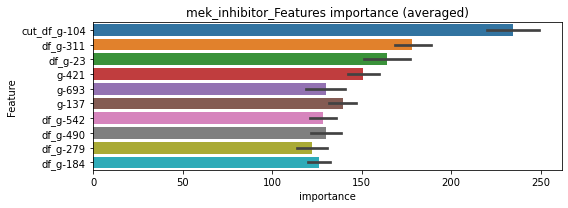

len(train_index) : 3028
len(valid_index) : 757
================================= fold 1/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000656665	valid_1's binary_logloss: 0.0146306


len(train_index) : 3028
len(valid_index) : 757
================================= fold 2/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000594235	valid_1's binary_logloss: 0.0132831


len(train_index) : 3028
len(valid_index) : 757
================================= fold 3/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000563879	valid_1's binary_logloss: 0.0214013
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000568322	valid_1's binary_logloss: 0.0213768


len(train_index) : 3028
len(valid_index) : 757
================================= fold 4/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000567595	valid_1's binary_logloss: 0.0123425
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000568295	valid_1's binary_logloss: 0.0123324


len(train_index) : 3028
len(valid_index) : 757
================================= fold 5/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000636416	valid_1's binary_logloss: 0.014476


mek_inhibitor logloss: 0.015219792929799913
membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000583561	valid_1's binary_logloss: 0.0134996
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000936837	valid_1's binary_logloss: 0.0315903
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000695368	valid_1's binary_logloss: 0.0313702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000970209	valid_1's binary_logloss: 0.0306203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000716851	valid_1's binary_logloss: 0.0295121


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0055520, Threshold: 0.0161398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0161398, conf_0:0.01130, conf_1:0.02098
Num_p_label: 4.0, Expected: 12.4, Adj_threshold_1: 0.0461398
threshold: 0.0461398, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000560159	valid_1's binary_logloss: 0.02349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00102454	valid_1's binary_logloss: 0.0319857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000584742	valid_1's binary_logloss: 0.021004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000635117	valid_1's binary_logloss: 0.0224365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000588956	valid_1's binary_logloss: 0.0141341


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232833, Threshold: 0.0461398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0027624 Vs.target_rate: 0.00311
Num_p_label: 11.0, Expected: 12.4, Threshold: 0.0461398, conf_0:0.03691, conf_1:0.05537
threshold: 0.0461398, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000553987	valid_1's binary_logloss: 0.0185977
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000849974	valid_1's binary_logloss: 0.0292916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000806374	valid_1's binary_logloss: 0.0288329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000532501	valid_1's binary_logloss: 0.0111915
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0249252, Threshold: 0.0461398, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000831215	valid_1's binary_logloss: 0.0279138


Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0042692 Vs.target_rate: 0.00311
Num_p_label: 17.0, Expected: 12.4, Threshold: 0.0461398, conf_0:0.04153, conf_1:0.05075
threshold: 0.0461398, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3786, y_label_rate: 0.1708928


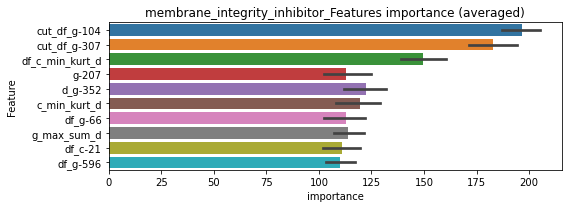

len(train_index) : 3028
len(valid_index) : 758
================================= fold 1/5 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 2/5 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00101959	valid_1's binary_logloss: 0.0243156
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000675643	valid_1's binary_logloss: 0.0250392


len(train_index) : 3029
len(valid_index) : 757
================================= fold 3/5 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000646248	valid_1's binary_logloss: 0.0302706


len(train_index) : 3029
len(valid_index) : 757
================================= fold 4/5 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 5/5 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000993325	valid_1's binary_logloss: 0.0256018
Training until validation scores don't improve for 29 rounds


membrane_integrity_inhibitor logloss: 0.02485485216329451


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000837661	valid_1's binary_logloss: 0.0190478


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000325624	valid_1's binary_logloss: 0.00149936
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000337651	valid_1's binary_logloss: 0.0053995
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000335875	valid_1's binary_logloss: 0.000528251
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000331055	valid_1's binary_logloss: 0.00155783
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017259, Threshold: 0.0045865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0045865, conf_0:0.00321, conf_1:0.00596
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0345865


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000339692	valid_1's binary_logloss: 0.00922908


threshold: 0.0345865, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00032419	valid_1's binary_logloss: 0.00162003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000338657	valid_1's binary_logloss: 0.00458685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00032693	valid_1's binary_logloss: 0.000545326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000329653	valid_1's binary_logloss: 0.00124049
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149277, Threshold: 0.0345865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0345865, conf_0:0.02767, conf_1:0.04150


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000334478	valid_1's binary_logloss: 0.0100588


threshold: 0.0345865, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00032419	valid_1's binary_logloss: 0.00162003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000338657	valid_1's binary_logloss: 0.00458685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00032693	valid_1's binary_logloss: 0.000545326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000329653	valid_1's binary_logloss: 0.00124049
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149277, Threshold: 0.0345865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0345865, conf_0:0.03113, conf_1:0.03805


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000334478	valid_1's binary_logloss: 0.0100588


threshold: 0.0345865, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


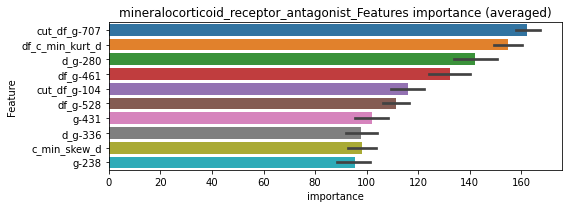

len(train_index) : 3044
len(valid_index) : 761
================================= fold 1/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000322578	valid_1's binary_logloss: 0.00142976


len(train_index) : 3044
len(valid_index) : 761
================================= fold 2/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00469781


len(train_index) : 3044
len(valid_index) : 761
================================= fold 3/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000318983	valid_1's binary_logloss: 0.000563852
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000318983	valid_1's binary_logloss: 0.000563852


len(train_index) : 3044
len(valid_index) : 761
================================= fold 4/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.0003208	valid_1's binary_logloss: 0.00106479


len(train_index) : 3044
len(valid_index) : 761
================================= fold 5/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


mineralocorticoid_receptor_antagonist logloss: 0.0030917140391019124


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00042371	valid_1's binary_logloss: 0.00770035


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000211527	valid_1's binary_logloss: 0.00148857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000213465	valid_1's binary_logloss: 0.00136344
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000220262	valid_1's binary_logloss: 0.00379301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000212302	valid_1's binary_logloss: 0.000502201
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008310, Threshold: 0.0017491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0017491, conf_0:0.00122, conf_1:0.00227
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0317491


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000214818	valid_1's binary_logloss: 0.000278321


threshold: 0.0317491, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000203907	valid_1's binary_logloss: 0.00201697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000203419	valid_1's binary_logloss: 0.00102819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000207861	valid_1's binary_logloss: 0.00392994
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000201465	valid_1's binary_logloss: 0.000609709
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131919, Threshold: 0.0317491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0317491, conf_0:0.02540, conf_1:0.03810
threshold: 0.0317491, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000200094	valid_1's binary_logloss: 0.000258571


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000203907	valid_1's binary_logloss: 0.00201697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000203419	valid_1's binary_logloss: 0.00102819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000207861	valid_1's binary_logloss: 0.00392994
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000201465	valid_1's binary_logloss: 0.000609709
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131919, Threshold: 0.0317491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0317491, conf_0:0.02857, conf_1:0.03492
threshold: 0.0317491, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000200094	valid_1's binary_logloss: 0.000258571


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


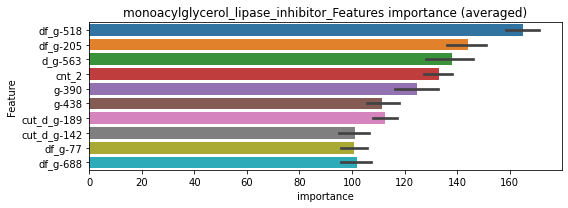

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000203152	valid_1's binary_logloss: 0.00132442
Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000203526	valid_1's binary_logloss: 0.000687277
Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000221029	valid_1's binary_logloss: 0.00292739
Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000202982	valid_1's binary_logloss: 0.000366403
Training until validation scores don't improve for 29 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0011164041543253967


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00020247	valid_1's binary_logloss: 0.00027407


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0259436	valid_1's binary_logloss: 0.0827402
[2000]	training's binary_logloss: 0.0123581	valid_1's binary_logloss: 0.0682284
[3000]	training's binary_logloss: 0.00809368	valid_1's binary_logloss: 0.0630676
Early stopping, best iteration is:
[3061]	training's binary_logloss: 0.00793547	valid_1's binary_logloss: 0.0629926
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0265761	valid_1's binary_logloss: 0.0733696
[2000]	training's binary_logloss: 0.0126105	valid_1's binary_logloss: 0.0581638
[3000]	training's binary_logloss: 0.00829215	valid_1's binary_logloss: 0.0530356
[4000]	training's binary_logloss: 0.00620044	valid_1's binary_logloss: 0.0503522
Early stopping, best iteration is:
[4866]	training's binary_logloss: 0.00511054	valid_1's binary_logloss: 0.0488528
Training until validation scores don't improve for 39 rounds
[1000]	training's bina

1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0338415, Threshold: 0.0748419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3772
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0748419, conf_0:0.05239, conf_1:0.09729
Num_p_label: 14.0, Expected: 14.2, Adj_threshold_1: 0.1048419
threshold: 0.1048419, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 643.0/3772, y_label_rate: 0.1704666
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0233987	valid_1's binary_logloss: 0.0822029
[2000]	training's binary_logloss: 0.011181	valid_1's binary_logloss: 0.0690651
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0106178	valid_1's binary_logloss: 0.0685524
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0244295	valid_1's binary_logloss: 0.0626889
[2000]	training's binary_logloss: 0.0116399	valid_1's binary_logloss: 0.0483324
[3000]	training's binary_logloss: 0.00767654	valid_1's binary_logloss: 0.0434807
[4000]	training's binary_logloss: 0.00575032	valid_1's binary_logloss: 0.0407825
Early stopping, best iteration is:
[4531]	training's binary_logloss: 0.0050879	valid_1's binary_logloss: 0.0399234
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0248813	valid_1's binary_logloss: 0.0620018
[2000]	training's binary_l

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0708190, Threshold: 0.1048419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 631.0/3748
p_label_rate: 0.0105475 Vs.target_rate: 0.00357
Num_p_label: 42.0, Expected: 14.2, Threshold: 0.1048419, conf_0:0.08387, conf_1:0.12581
Num_p_label: 20.0, Expected: 14.2, Adj_threshold_1: 0.1348419
threshold: 0.1348419, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 631.0/3748, y_label_rate: 0.1683565
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0225304	valid_1's binary_logloss: 0.0645148
[2000]	training's binary_logloss: 0.0107738	valid_1's binary_logloss: 0.0494958
[3000]	training's binary_logloss: 0.00711146	valid_1's binary_logloss: 0.0440922
[4000]	training's binary_logloss: 0.00535666	valid_1's binary_logloss: 0.041407
Early stopping, best iteration is:
[4325]	training's binary_logloss: 0.0049688	valid_1's binary_logloss: 0.0407779
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0226017	valid_1's binary_logloss: 0.0676529
[2000]	training's binary_logloss: 0.0108275	valid_1's binary_logloss: 0.0555624
[3000]	training's binary_logloss: 0.00714561	valid_1's binary_logloss: 0.0515861
Early stopping, best iteration is:
[3264]	training's binary_logloss: 0.00656535	valid_1's binary_logloss: 0.0508448
Training until validation scores don't improve for 39 rounds
[1000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0656694, Threshold: 0.1348419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 624.0/3734
p_label_rate: 0.0045203 Vs.target_rate: 0.00357
Num_p_label: 18.0, Expected: 14.2, Threshold: 0.1348419, conf_0:0.12136, conf_1:0.14833
threshold: 0.1348419, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 624.0/3734, y_label_rate: 0.1671130


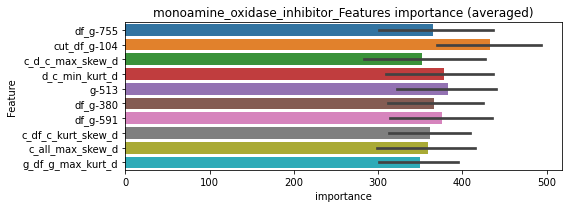

len(train_index) : 2489
len(valid_index) : 1245
================================= fold 1/3 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0479728	valid_1's binary_logloss: 0.0903815
[2000]	training's binary_logloss: 0.0244166	valid_1's binary_logloss: 0.0661952
[3000]	training's binary_logloss: 0.0162677	valid_1's binary_logloss: 0.0568776
[4000]	training's binary_logloss: 0.0121741	valid_1's binary_logloss: 0.0518649
[5000]	training's binary_logloss: 0.00973417	valid_1's binary_logloss: 0.0487642
[6000]	training's binary_logloss: 0.00812459	valid_1's binary_logloss: 0.0465217
[7000]	training's binary_logloss: 0.00698015	valid_1's binary_logloss: 0.044975
Early stopping, best iteration is:
[7431]	training's binary_logloss: 0.00658	valid_1's binary_logloss: 0.0443589


len(train_index) : 2489
len(valid_index) : 1245
================================= fold 2/3 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.048258	valid_1's binary_logloss: 0.0899661
[2000]	training's binary_logloss: 0.0245688	valid_1's binary_logloss: 0.0660749
[3000]	training's binary_logloss: 0.0163496	valid_1's binary_logloss: 0.057272
[4000]	training's binary_logloss: 0.0122605	valid_1's binary_logloss: 0.0526576
[5000]	training's binary_logloss: 0.00979009	valid_1's binary_logloss: 0.0499962
[6000]	training's binary_logloss: 0.00816671	valid_1's binary_logloss: 0.0480305
[7000]	training's binary_logloss: 0.00701729	valid_1's binary_logloss: 0.046739
Early stopping, best iteration is:
[7734]	training's binary_logloss: 0.00636771	valid_1's binary_logloss: 0.0459403


len(train_index) : 2490
len(valid_index) : 1244
================================= fold 3/3 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.049138	valid_1's binary_logloss: 0.0827532
[2000]	training's binary_logloss: 0.0250579	valid_1's binary_logloss: 0.0586768
[3000]	training's binary_logloss: 0.0166603	valid_1's binary_logloss: 0.04988
[4000]	training's binary_logloss: 0.012456	valid_1's binary_logloss: 0.0449927
[5000]	training's binary_logloss: 0.00993085	valid_1's binary_logloss: 0.0419592
[6000]	training's binary_logloss: 0.00829792	valid_1's binary_logloss: 0.039848
[7000]	training's binary_logloss: 0.00713051	valid_1's binary_logloss: 0.0382867
Early stopping, best iteration is:
[7786]	training's binary_logloss: 0.00642111	valid_1's binary_logloss: 0.0373076


monoamine_oxidase_inhibitor logloss: 0.042537017067742544
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000289176	valid_1's binary_logloss: 0.000815951
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000292069	valid_1's binary_logloss: 0.00108623
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000288328	valid_1's binary_logloss: 0.00152891
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000294245	valid_1's binary_logloss: 0.005184
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290617	valid_1's binary_logloss: 0.00108043


y_Threshold: 0.0014542, Threshold: 0.0138075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0138075, conf_0:0.00967, conf_1:0.01795
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0438075
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0738075
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1038075
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1338075
threshold: 0.1338075, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000279677	valid_1's binary_logloss: 0.000729698
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000278759	valid_1's binary_logloss: 0.0017589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000280645	valid_1's binary_logloss: 0.00174116
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000286837	valid_1's binary_logloss: 0.00572707
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0288854, Threshold: 0.1338075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0067805 Vs.target_rate: 0.00076
Num_p_label: 27.0, Expected: 3.0, Threshold: 0.1338075, conf_0:0.10705, conf_1:0.16057
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_1: 0.1638075
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_2: 0.1938075
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.2238075
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.2538075


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277263	valid_1's binary_logloss: 0.000949782


Num_p_label: 15.0, Expected: 3.0, Adj_threshold_5: 0.2838075
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3138075
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.3438075
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.3738075
threshold: 0.3738075, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000279677	valid_1's binary_logloss: 0.000729698
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000278759	valid_1's binary_logloss: 0.0017589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000280645	valid_1's binary_logloss: 0.00174116
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000286837	valid_1's binary_logloss: 0.00572707
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277263	valid_1's binary_logloss: 0.000949782


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0288854, Threshold: 0.3738075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3738075, conf_0:0.33643, conf_1:0.41119
threshold: 0.3738075, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


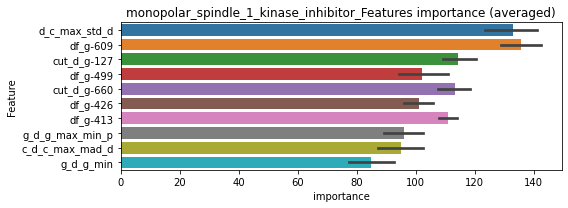

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000280132	valid_1's binary_logloss: 0.000603735


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000281844	valid_1's binary_logloss: 0.00139145


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051


Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000282893	valid_1's binary_logloss: 0.000981588


len(valid_index) : 762
================================= fold 4/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762


Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000281259	valid_1's binary_logloss: 0.00353917


================================= fold 5/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000279905	valid_1's binary_logloss: 0.000670727


monopolar_spindle_1_kinase_inhibitor logloss: 0.001436999803483568


mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0429373	valid_1's binary_logloss: 0.148454
Early stopping, best iteration is:
[1634]	training's binary_logloss: 0.0255398	valid_1's binary_logloss: 0.133126
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0431594	valid_1's binary_logloss: 0.139452
Early stopping, best iteration is:
[1831]	training's binary_logloss: 0.0225744	valid_1's binary_logloss: 0.123134
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0426054	valid_1's binary_logloss: 0.147523
[2000]	training's binary_logloss: 0.0204364	valid_1's binary_logloss: 0.130935
Early stopping, best iteration is:
[2460]	training's binary_logloss: 0.0164278	valid_1's binary_logloss: 0.128235


1 / 3, AUC score:0.968, PR-AUC:0.948
y_Threshold: 0.0852175, Threshold: 0.1702077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 192 → Positive_corect_labels: 503/3074
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1702077, conf_0:0.11915, conf_1:0.22127
Num_p_label: 25.0, Expected: 21.7, Adj_threshold_1: 0.2002077
threshold: 0.2002077, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 503.0/3074, y_label_rate: 0.1636304
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0356124	valid_1's binary_logloss: 0.134302
[2000]	training's binary_logloss: 0.0169704	valid_1's binary_logloss: 0.115121
Early stopping, best iteration is:
[2023]	training's binary_logloss: 0.0167631	valid_1's binary_logloss: 0.114785
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0357794	valid_1's binary_logloss: 0.117519
[2000]	training's binary_logloss: 0.0172342	valid_1's binary_logloss: 0.0971334
Early stopping, best iteration is:
[2818]	training's binary_logloss: 0.0120427	valid_1's binary_logloss: 0.0906625
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0370733	valid_1's binary_logloss: 0.097691
[2000]	training's binary_logloss: 0.0177253	valid_1's binary_logloss: 0.0751337
[3000]	training's binary_logloss: 0.0115911	valid_1's binary_logloss: 0.0667056
[4000]	training's binary_logloss

2 / 3, AUC score:0.995, PR-AUC:0.986
y_Threshold: 0.1089023, Threshold: 0.2002077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 477.0/3022
p_label_rate: 0.0113009 Vs.target_rate: 0.00546
Num_p_label: 45.0, Expected: 21.7, Threshold: 0.2002077, conf_0:0.16017, conf_1:0.24025
Num_p_label: 36.0, Expected: 21.7, Adj_threshold_1: 0.2302077
Num_p_label: 25.0, Expected: 21.7, Adj_threshold_2: 0.2602077
threshold: 0.2602077, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 477.0/3022, y_label_rate: 0.1578425
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0340294	valid_1's binary_logloss: 0.114507
[2000]	training's binary_logloss: 0.0162385	valid_1's binary_logloss: 0.0916204
Early stopping, best iteration is:
[2790]	training's binary_logloss: 0.0114481	valid_1's binary_logloss: 0.0841874
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.034037	valid_1's binary_logloss: 0.111089
[2000]	training's binary_logloss: 0.0162352	valid_1's binary_logloss: 0.0899726
[3000]	training's binary_logloss: 0.0106732	valid_1's binary_logloss: 0.0827994
Early stopping, best iteration is:
[3512]	training's binary_logloss: 0.00908841	valid_1's binary_logloss: 0.0802707
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0335007	valid_1's binary_logloss: 0.112825
[2000]	training's binary_logloss: 0.0159921	valid_1's binary_logloss: 0.0933284
Early stopping, best iteration

3 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0984119, Threshold: 0.2602077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 458.0/2984
p_label_rate: 0.0070316 Vs.target_rate: 0.00546
Num_p_label: 28.0, Expected: 21.7, Threshold: 0.2602077, conf_0:0.23419, conf_1:0.28623
threshold: 0.2602077, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 458.0/2984, y_label_rate: 0.1534853


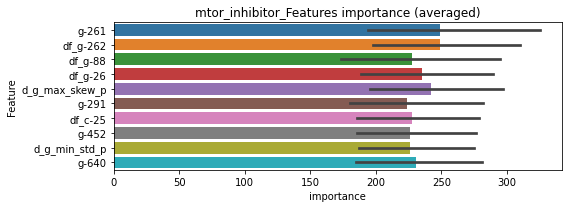

len(train_index) : 1989
len(valid_index) : 995
================================= fold 1/3 mtor_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0692331	valid_1's binary_logloss: 0.15291
[2000]	training's binary_logloss: 0.0353698	valid_1's binary_logloss: 0.116965
[3000]	training's binary_logloss: 0.0234591	valid_1's binary_logloss: 0.10291
[4000]	training's binary_logloss: 0.017535	valid_1's binary_logloss: 0.09498
[5000]	training's binary_logloss: 0.013992	valid_1's binary_logloss: 0.0900004
[6000]	training's binary_logloss: 0.0116479	valid_1's binary_logloss: 0.0866347
[7000]	training's binary_logloss: 0.0100052	valid_1's binary_logloss: 0.0840939
[8000]	training's binary_logloss: 0.00876777	valid_1's binary_logloss: 0.0822764
[9000]	training's binary_logloss: 0.00781079	valid_1's binary_logloss: 0.0807356
Early stopping, best iteration is:
[9289]	training's binary_logloss: 0.00757427	valid_1's binary_logloss: 0.0803091


len(train_index) : 1989
len(valid_index) : 995
================================= fold 2/3 mtor_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0712304	valid_1's binary_logloss: 0.128092
[2000]	training's binary_logloss: 0.0363152	valid_1's binary_logloss: 0.0898106
[3000]	training's binary_logloss: 0.0241118	valid_1's binary_logloss: 0.0745336
[4000]	training's binary_logloss: 0.0180202	valid_1's binary_logloss: 0.0665648
[5000]	training's binary_logloss: 0.0143812	valid_1's binary_logloss: 0.0615439
[6000]	training's binary_logloss: 0.0119739	valid_1's binary_logloss: 0.057852
Early stopping, best iteration is:
[6912]	training's binary_logloss: 0.0104086	valid_1's binary_logloss: 0.0555062


len(train_index) : 1990
len(valid_index) : 994
================================= fold 3/3 mtor_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0689704	valid_1's binary_logloss: 0.139856
[2000]	training's binary_logloss: 0.0350622	valid_1's binary_logloss: 0.107763
[3000]	training's binary_logloss: 0.0232428	valid_1's binary_logloss: 0.0952754
[4000]	training's binary_logloss: 0.0173451	valid_1's binary_logloss: 0.0891235
[5000]	training's binary_logloss: 0.013851	valid_1's binary_logloss: 0.0854793
[6000]	training's binary_logloss: 0.0115404	valid_1's binary_logloss: 0.0830518
Early stopping, best iteration is:
[6806]	training's binary_logloss: 0.0101829	valid_1's binary_logloss: 0.0816677


mtor_inhibitor logloss: 0.07249128199714056
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000496281	valid_1's binary_logloss: 0.0125854
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000456852	valid_1's binary_logloss: 0.0045252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000457408	valid_1's binary_logloss: 0.00806652
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000472445	valid_1's binary_logloss: 0.00259673
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000589776	valid_1's binary_logloss: 0.0169911


y_Threshold: 0.0036345, Threshold: 0.0942062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0942062, conf_0:0.06594, conf_1:0.12247
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1242062
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_2: 0.1542062
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1842062
threshold: 0.1842062, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000502929	valid_1's binary_logloss: 0.0114436
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000460088	valid_1's binary_logloss: 0.00412145
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000477227	valid_1's binary_logloss: 0.00750671
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000437704	valid_1's binary_logloss: 0.00189059
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000509333	valid_1's binary_logloss: 0.0154319


y_Threshold: 0.0796325, Threshold: 0.1842062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0170768 Vs.target_rate: 0.00202
Num_p_label: 68.0, Expected: 8.0, Threshold: 0.1842062, conf_0:0.14736, conf_1:0.22105
Num_p_label: 66.0, Expected: 8.0, Adj_threshold_1: 0.2142062
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_2: 0.2442062
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_3: 0.2742062
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_4: 0.3042062
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_5: 0.3342062
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_6: 0.3642062
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_7: 0.3942062
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_8: 0.4242062
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_9: 0.4542062
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_10: 0.4842062
threshold: 0.4842062, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 655.0/3804, y_label_rate: 0.1721

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000447342	valid_1's binary_logloss: 0.00664114
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00045913	valid_1's binary_logloss: 0.00554892
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000435232	valid_1's binary_logloss: 0.00439085
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.0004498	valid_1's binary_logloss: 0.00233203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000475105	valid_1's binary_logloss: 0.0162606


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0607796, Threshold: 0.4842062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0105475 Vs.target_rate: 0.00202
Num_p_label: 42.0, Expected: 8.0, Threshold: 0.4842062, conf_0:0.43579, conf_1:0.53263
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.5142062
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_2: 0.5442062
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.5742062
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_4: 0.6042062
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_5: 0.6342062
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_6: 0.6642062
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_7: 0.6942062
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.7242062
threshold: 0.7242062, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


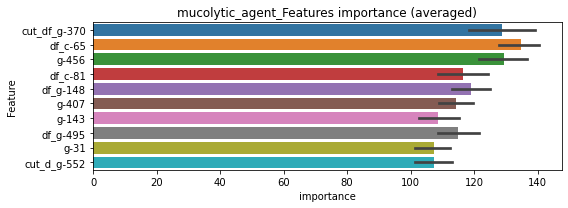

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000455082	valid_1's binary_logloss: 0.00849621


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000438097	valid_1's binary_logloss: 0.00255021
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000438097	valid_1's binary_logloss: 0.00255021


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000440107	valid_1's binary_logloss: 0.00616832


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000441228	valid_1's binary_logloss: 0.00322182
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000440499	valid_1's binary_logloss: 0.00322027


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds


mucolytic_agent logloss: 0.006242959664790942


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000655464	valid_1's binary_logloss: 0.0107815


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000434337	valid_1's binary_logloss: 0.00939308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000422574	valid_1's binary_logloss: 0.00843137
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000422718	valid_1's binary_logloss: 0.00330919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000417606	valid_1's binary_logloss: 0.00358506
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026278, Threshold: 0.0132602, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000433021	valid_1's binary_logloss: 0.0107494


p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0132602, conf_0:0.00928, conf_1:0.01724
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0432602
threshold: 0.0432602, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000553768	valid_1's binary_logloss: 0.00954691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000392395	valid_1's binary_logloss: 0.00889577
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000406488	valid_1's binary_logloss: 0.00318479
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00040241	valid_1's binary_logloss: 0.00402998
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0172270, Threshold: 0.0432602, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000453861	valid_1's binary_logloss: 0.00919616


p_label_rate: 0.0050226 Vs.target_rate: 0.00155
Num_p_label: 20.0, Expected: 6.2, Threshold: 0.0432602, conf_0:0.03461, conf_1:0.05191
Num_p_label: 8.0, Expected: 6.2, Adj_threshold_1: 0.0732602
threshold: 0.0732602, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000553768	valid_1's binary_logloss: 0.00954691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000392395	valid_1's binary_logloss: 0.00889577
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000406488	valid_1's binary_logloss: 0.00318479
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00040241	valid_1's binary_logloss: 0.00402998
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0172270, Threshold: 0.0732602, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000453861	valid_1's binary_logloss: 0.00919616


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00155
Num_p_label: 8.0, Expected: 6.2, Threshold: 0.0732602, conf_0:0.06593, conf_1:0.08059
threshold: 0.0732602, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


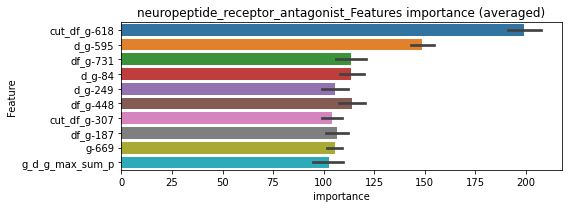

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000477337	valid_1's binary_logloss: 0.00948924
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000429796	valid_1's binary_logloss: 0.00780441


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000616314	valid_1's binary_logloss: 0.00467567
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000426211	valid_1's binary_logloss: 0.00349887


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000448051	valid_1's binary_logloss: 0.00849538


neuropeptide_receptor_antagonist logloss: 0.006793132474621361


mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 10338
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 10338


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0674297	valid_1's binary_logloss: 0.259168
Early stopping, best iteration is:
[1270]	training's binary_logloss: 0.0519888	valid_1's binary_logloss: 0.255804
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0679705	valid_1's binary_logloss: 0.249336
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.0607165	valid_1's binary_logloss: 0.246953
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0667822	valid_1's binary_logloss: 0.242681
Early stopping, best iteration is:
[1299]	training's binary_logloss: 0.0503407	valid_1's binary_logloss: 0.240217


1 / 3, AUC score:0.879, PR-AUC:0.802
y_Threshold: 0.1245207, Threshold: 0.2337317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1492 → Positive_corect_labels: 1528/10913
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.2337317, conf_0:0.16361, conf_1:0.30385
threshold: 0.2337317, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1528.0/10913, y_label_rate: 0.1400165
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0371373	valid_1's binary_logloss: 0.135406
Early stopping, best iteration is:
[1904]	training's binary_logloss: 0.0179989	valid_1's binary_logloss: 0.121631
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0377941	valid_1's binary_logloss: 0.131679
[2000]	training's binary_logloss: 0.0172278	valid_1's binary_logloss: 0.116032
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0143151	valid_1's binary_logloss: 0.113865
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0368161	valid_1's binary_logloss: 0.139854
Early stopping, best iteration is:
[1580]	training's binary_logloss: 0.021815	valid_1's binary_logloss: 0.130435


2 / 3, AUC score:0.981, PR-AUC:0.950
y_Threshold: 0.1062684, Threshold: 0.2337317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 348 → Positive_corect_labels: 1354.0/10565
p_label_rate: 0.0077850 Vs.target_rate: 0.03494
Num_p_label: 31.0, Expected: 139.1, Threshold: 0.2337317, conf_0:0.18699, conf_1:0.28048
threshold: 0.2337317, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 1354.0/10565, y_label_rate: 0.1281590
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0303186	valid_1's binary_logloss: 0.105921
[2000]	training's binary_logloss: 0.0137923	valid_1's binary_logloss: 0.0911193
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0105148	valid_1's binary_logloss: 0.0879044
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0303525	valid_1's binary_logloss: 0.10373
[2000]	training's binary_logloss: 0.0138425	valid_1's binary_logloss: 0.0889479
Early stopping, best iteration is:
[2711]	training's binary_logloss: 0.0098649	valid_1's binary_logloss: 0.0854055
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0295256	valid_1's binary_logloss: 0.112273
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0141838	valid_1's binary_logloss: 0.0998695


3 / 3, AUC score:0.989, PR-AUC:0.973
y_Threshold: 0.0867026, Threshold: 0.2337317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 198 → Positive_corect_labels: 1255.0/10367
p_label_rate: 0.0085384 Vs.target_rate: 0.03494
Num_p_label: 34.0, Expected: 139.1, Threshold: 0.2337317, conf_0:0.21036, conf_1:0.25710
threshold: 0.2337317, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 1255.0/10367, y_label_rate: 0.1210572


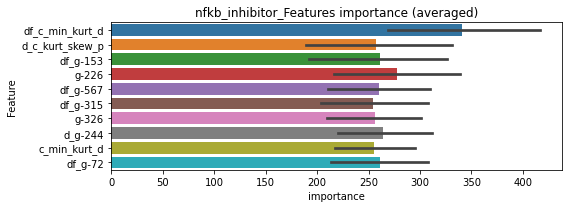

len(train_index) : 6911
len(valid_index) : 3456
================================= fold 1/3 nfkb_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0553068	valid_1's binary_logloss: 0.115896
[2000]	training's binary_logloss: 0.0277354	valid_1's binary_logloss: 0.0898106
[3000]	training's binary_logloss: 0.0181504	valid_1's binary_logloss: 0.0806432
Early stopping, best iteration is:
[3325]	training's binary_logloss: 0.0162832	valid_1's binary_logloss: 0.0786473


len(train_index) : 6911
len(valid_index) : 3456
================================= fold 2/3 nfkb_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.054534	valid_1's binary_logloss: 0.125176
[2000]	training's binary_logloss: 0.0271398	valid_1's binary_logloss: 0.100157
[3000]	training's binary_logloss: 0.0177742	valid_1's binary_logloss: 0.0909818
[4000]	training's binary_logloss: 0.0131315	valid_1's binary_logloss: 0.0866569
Early stopping, best iteration is:
[4301]	training's binary_logloss: 0.0121781	valid_1's binary_logloss: 0.085564


len(train_index) : 6912
len(valid_index) : 3455
================================= fold 3/3 nfkb_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0553513	valid_1's binary_logloss: 0.112532
[2000]	training's binary_logloss: 0.0275782	valid_1's binary_logloss: 0.0868197
[3000]	training's binary_logloss: 0.0180256	valid_1's binary_logloss: 0.0773441
[4000]	training's binary_logloss: 0.0133212	valid_1's binary_logloss: 0.072259
Early stopping, best iteration is:
[4234]	training's binary_logloss: 0.0125498	valid_1's binary_logloss: 0.0713958


nfkb_inhibitor logloss: 0.0785363852018615
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000227952	valid_1's binary_logloss: 0.00245902
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000226744	valid_1's binary_logloss: 0.000908861
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000226932	valid_1's binary_logloss: 0.0008374
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000226194	valid_1's binary_logloss: 0.000397922
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008317, Threshold: 0.0046414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0046414, conf_0:0.00325, conf_1:0.00603
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0346414
threshold: 0.0346414, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000226409	valid_1's binary_logloss: 0.000621607


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000224104	valid_1's binary_logloss: 0.00254144
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000222969	valid_1's binary_logloss: 0.000694769
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000216932	valid_1's binary_logloss: 0.000728866
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000221512	valid_1's binary_logloss: 0.000314668
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428292, Threshold: 0.0346414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, Expected: 2.0, Threshold: 0.0346414, conf_0:0.02771, conf_1:0.04157
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0646414
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0946414
threshold: 0.0946414, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000221528	valid_1's binary_logloss: 0.000838778


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000224104	valid_1's binary_logloss: 0.00254144
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000222969	valid_1's binary_logloss: 0.000694769
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000216932	valid_1's binary_logloss: 0.000728866
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000221512	valid_1's binary_logloss: 0.000314668
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428292, Threshold: 0.0946414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0946414, conf_0:0.08518, conf_1:0.10411
threshold: 0.0946414, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000221528	valid_1's binary_logloss: 0.000838778


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


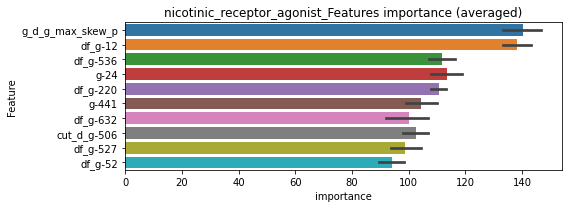

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000226356	valid_1's binary_logloss: 0.000887719
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000223954	valid_1's binary_logloss: 0.000386715
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000219951	valid_1's binary_logloss: 0.000536825
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000219728	valid_1's binary_logloss: 0.000536686


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000223774	valid_1's binary_logloss: 0.000376548
Training until validation scores don't improve for 29 rounds


nicotinic_receptor_agonist logloss: 0.0005397105411440912


Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000224181	valid_1's binary_logloss: 0.000510633


nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000356288	valid_1's binary_logloss: 0.0055417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000347141	valid_1's binary_logloss: 0.00272087
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000349084	valid_1's binary_logloss: 0.00299571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000361897	valid_1's binary_logloss: 0.00164746
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026388, Threshold: 0.0350258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000352934	valid_1's binary_logloss: 0.00143926


p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0350258, conf_0:0.02452, conf_1:0.04553
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_1: 0.0650258
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_2: 0.0950258
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_3: 0.1250258
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_4: 0.1550258
threshold: 0.1550258, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000339011	valid_1's binary_logloss: 0.00598108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000327772	valid_1's binary_logloss: 0.00245225
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000325645	valid_1's binary_logloss: 0.00216918
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000342058	valid_1's binary_logloss: 0.00156093
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0762953, Threshold: 0.1550258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000328498	valid_1's binary_logloss: 0.000942207


p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.1550258, conf_0:0.12402, conf_1:0.18603
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_1: 0.1850258
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_2: 0.2150258
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_3: 0.2450258
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_4: 0.2750258
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.3050258
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_6: 0.3350258
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_7: 0.3650258
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_8: 0.3950258
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.4250258
threshold: 0.4250258, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000339011	valid_1's binary_logloss: 0.00598108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000327772	valid_1's binary_logloss: 0.00245225
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000325645	valid_1's binary_logloss: 0.00216918
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000342058	valid_1's binary_logloss: 0.00156093
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0762953, Threshold: 0.4250258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000328498	valid_1's binary_logloss: 0.000942207


p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4250258, conf_0:0.38252, conf_1:0.46753
threshold: 0.4250258, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


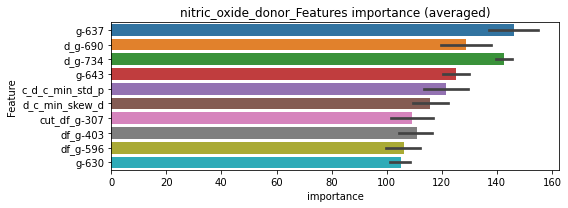

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000357718	valid_1's binary_logloss: 0.00589163


================================= fold 2/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000340897	valid_1's binary_logloss: 0.00141325


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000331576	valid_1's binary_logloss: 0.00254678


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000344901	valid_1's binary_logloss: 0.00143004


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000333709	valid_1's binary_logloss: 0.00100423


nitric_oxide_donor logloss: 0.002458534661598513
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000375403	valid_1's binary_logloss: 0.00421049
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000354116	valid_1's binary_logloss: 0.00238879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000340178	valid_1's binary_logloss: 0.00686925
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000338745	valid_1's binary_logloss: 0.00108583
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020568, Threshold: 0.0070902, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000336409	valid_1's binary_logloss: 0.00133402


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0070902, conf_0:0.00496, conf_1:0.00922
Num_p_label: 2.0, Expected: 4.8, Adj_threshold_1: 0.0370902
threshold: 0.0370902, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000353004	valid_1's binary_logloss: 0.00406949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000329365	valid_1's binary_logloss: 0.00154503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000322613	valid_1's binary_logloss: 0.00516862
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00032919	valid_1's binary_logloss: 0.00122784
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000336867	valid_1's binary_logloss: 0.00105513


y_Threshold: 0.0253074, Threshold: 0.0370902, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00122
Num_p_label: 12.0, Expected: 4.8, Threshold: 0.0370902, conf_0:0.02967, conf_1:0.04451
threshold: 0.0370902, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000353004	valid_1's binary_logloss: 0.00406949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000329365	valid_1's binary_logloss: 0.00154503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000322613	valid_1's binary_logloss: 0.00516862
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00032919	valid_1's binary_logloss: 0.00122784
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253074, Threshold: 0.0370902, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000336867	valid_1's binary_logloss: 0.00105513


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00122
Num_p_label: 12.0, Expected: 4.8, Threshold: 0.0370902, conf_0:0.03338, conf_1:0.04080
threshold: 0.0370902, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


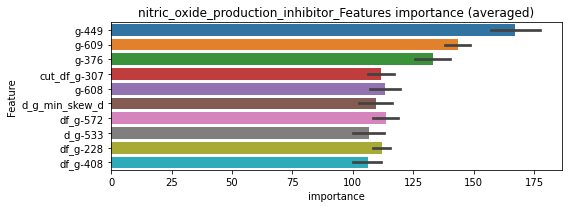

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000656779	valid_1's binary_logloss: 0.00556467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000324551	valid_1's binary_logloss: 0.00167353


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000349606	valid_1's binary_logloss: 0.00395852


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000325308	valid_1's binary_logloss: 0.00112398
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000325308	valid_1's binary_logloss: 0.00112398


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000332168	valid_1's binary_logloss: 0.000831148


nitric_oxide_production_inhibitor logloss: 0.0026303679681613378
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000363318	valid_1's binary_logloss: 0.00363881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000363803	valid_1's binary_logloss: 0.00268211
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000358627	valid_1's binary_logloss: 0.00083856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000357113	valid_1's binary_logloss: 0.0011245
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024370, Threshold: 0.0218028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000353215	valid_1's binary_logloss: 0.00380079


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0218028, conf_0:0.01526, conf_1:0.02834
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_1: 0.0518028
Num_p_label: 5.0, Expected: 4.3, Adj_threshold_2: 0.0818028
threshold: 0.0818028, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000350255	valid_1's binary_logloss: 0.00292157
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000339685	valid_1's binary_logloss: 0.00272441
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000363314	valid_1's binary_logloss: 0.000896462
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000355008	valid_1's binary_logloss: 0.000891875
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0787668, Threshold: 0.0818028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000352553	valid_1's binary_logloss: 0.00271347


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0102963 Vs.target_rate: 0.00109
Num_p_label: 41.0, Expected: 4.3, Threshold: 0.0818028, conf_0:0.06544, conf_1:0.09816
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_1: 0.1118028
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.1418028
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_3: 0.1718028
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_4: 0.2018028
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_5: 0.2318028
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_6: 0.2618028
threshold: 0.2618028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000350255	valid_1's binary_logloss: 0.00292157
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000339685	valid_1's binary_logloss: 0.00272441
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000363314	valid_1's binary_logloss: 0.000896462
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000355008	valid_1's binary_logloss: 0.000891875
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0787668, Threshold: 0.2618028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000352553	valid_1's binary_logloss: 0.00271347


p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.2618028, conf_0:0.23562, conf_1:0.28798
threshold: 0.2618028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


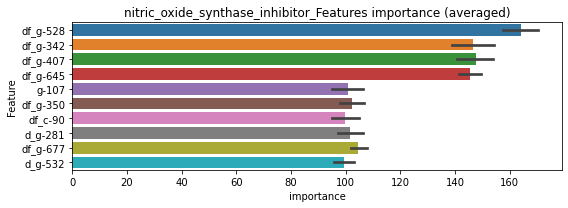

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000347234	valid_1's binary_logloss: 0.00185686


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000356837	valid_1's binary_logloss: 0.00184041


len(train_index) : 3046
len(valid_index) : 761
================================= fold 3/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000358659	valid_1's binary_logloss: 0.000846735


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000353558	valid_1's binary_logloss: 0.000910852


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000355153	valid_1's binary_logloss: 0.00266073


nitric_oxide_synthase_inhibitor logloss: 0.0016235688740860032
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000175368	valid_1's binary_logloss: 0.00293121
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000171886	valid_1's binary_logloss: 0.000550087
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000172563	valid_1's binary_logloss: 0.00266972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000175615	valid_1's binary_logloss: 0.000241549
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005414, Threshold: 0.0027877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0027877, conf_0:0.00195, conf_1:0.00362
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0327877
threshold: 0.0327877, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000175746	valid_1's binary_logloss: 0.000625719


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000163081	valid_1's binary_logloss: 0.000952587
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000162205	valid_1's binary_logloss: 0.000177078
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000163239	valid_1's binary_logloss: 0.00116155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000164851	valid_1's binary_logloss: 0.000172311
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0976254, Threshold: 0.0327877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0060271 Vs.target_rate: 0.00029
Num_p_label: 24.0, Expected: 1.2, Threshold: 0.0327877, conf_0:0.02623, conf_1:0.03935
Num_p_label: 13.0, Expected: 1.2, Adj_threshold_1: 0.0627877
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_2: 0.0927877
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_3: 0.1227877
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_4: 0.1527877
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.1827877
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_6: 0.2127877
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_7: 0.2427877
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_8: 0.2727877
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_9: 0.3027877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3327877


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000164724	valid_1's binary_logloss: 0.000182643


threshold: 0.3327877, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000163081	valid_1's binary_logloss: 0.000952587
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000162205	valid_1's binary_logloss: 0.000177078
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000163239	valid_1's binary_logloss: 0.00116155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000164851	valid_1's binary_logloss: 0.000172311
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0976254, Threshold: 0.3327877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3327877, conf_0:0.29951, conf_1:0.36607
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3627877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3927877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4227877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.4527877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.4827877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.5127877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_7: 0.5427877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_8: 0.5727877
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_9: 0.6027877


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000164724	valid_1's binary_logloss: 0.000182643


threshold: 0.6027877, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


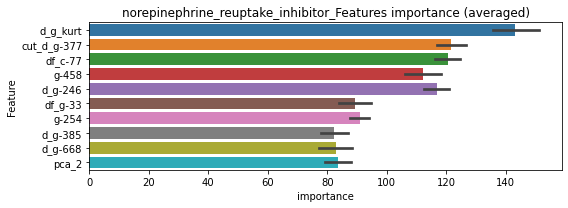

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000165044	valid_1's binary_logloss: 0.000609845


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000164068	valid_1's binary_logloss: 0.000190632
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000161676	valid_1's binary_logloss: 0.000645279
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000167835	valid_1's binary_logloss: 0.000179844
Training until validation scores don't improve for 29 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0003638853787472143


Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000163798	valid_1's binary_logloss: 0.000193433


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000253356	valid_1's binary_logloss: 0.00140341
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000251651	valid_1's binary_logloss: 0.00184991
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00030583	valid_1's binary_logloss: 0.00311569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000257456	valid_1's binary_logloss: 0.000450112
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012530, Threshold: 0.0043694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0043694, conf_0:0.00306, conf_1:0.00568
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0343694


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000250034	valid_1's binary_logloss: 0.000647741


threshold: 0.0343694, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000243544	valid_1's binary_logloss: 0.000799772
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000239518	valid_1's binary_logloss: 0.00144571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000272131	valid_1's binary_logloss: 0.00432134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000248919	valid_1's binary_logloss: 0.000315002
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149300, Threshold: 0.0343694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00076
Num_p_label: 11.0, Expected: 3.0, Threshold: 0.0343694, conf_0:0.02750, conf_1:0.04124
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0643694
threshold: 0.0643694, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00024511	valid_1's binary_logloss: 0.000719479


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000243544	valid_1's binary_logloss: 0.000799772
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000239518	valid_1's binary_logloss: 0.00144571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000272131	valid_1's binary_logloss: 0.00432134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000248919	valid_1's binary_logloss: 0.000315002
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149300, Threshold: 0.0643694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0643694, conf_0:0.05793, conf_1:0.07081


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00024511	valid_1's binary_logloss: 0.000719479


threshold: 0.0643694, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


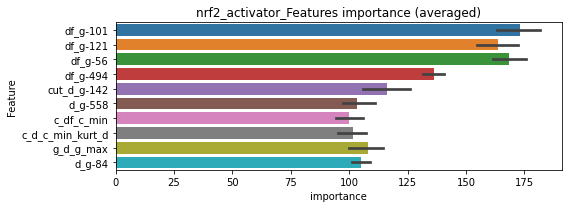

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000247188	valid_1's binary_logloss: 0.000716984


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000242722	valid_1's binary_logloss: 0.00103743
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000242765	valid_1's binary_logloss: 0.00103742


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 nrf2_activator=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000294821	valid_1's binary_logloss: 0.00217083
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000247927	valid_1's binary_logloss: 0.000289369
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000247077	valid_1's binary_logloss: 0.000288385


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000247253	valid_1's binary_logloss: 0.000783195


nrf2_activator logloss: 0.0009996361332161423
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000719997	valid_1's binary_logloss: 0.0277259
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000559287	valid_1's binary_logloss: 0.0283093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00069742	valid_1's binary_logloss: 0.0225188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000569058	valid_1's binary_logloss: 0.0048839
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000594963	valid_1's binary_logloss: 0.0218339


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0046032, Threshold: 0.0148346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0148346, conf_0:0.01038, conf_1:0.01928
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_1: 0.0448346
threshold: 0.0448346, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000807025	valid_1's binary_logloss: 0.0312921
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000543726	valid_1's binary_logloss: 0.00887837
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000820483	valid_1's binary_logloss: 0.0180369
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000560025	valid_1's binary_logloss: 0.0112627
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000610218	valid_1's binary_logloss: 0.0132498


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630806, Threshold: 0.0448346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0135610 Vs.target_rate: 0.00256
Num_p_label: 54.0, Expected: 10.2, Threshold: 0.0448346, conf_0:0.03587, conf_1:0.05380
Num_p_label: 38.0, Expected: 10.2, Adj_threshold_1: 0.0748346
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.1048346
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_3: 0.1348346
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_4: 0.1648346
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_5: 0.1948346
threshold: 0.1948346, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000611391	valid_1's binary_logloss: 0.0193917
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000747127	valid_1's binary_logloss: 0.018548
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00063504	valid_1's binary_logloss: 0.0128886
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00126892	valid_1's binary_logloss: 0.0307391
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000519313	valid_1's binary_logloss: 0.00984529


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0457392, Threshold: 0.1948346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0045203 Vs.target_rate: 0.00256
Num_p_label: 18.0, Expected: 10.2, Threshold: 0.1948346, conf_0:0.17535, conf_1:0.21432
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_1: 0.2248346
threshold: 0.2248346, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


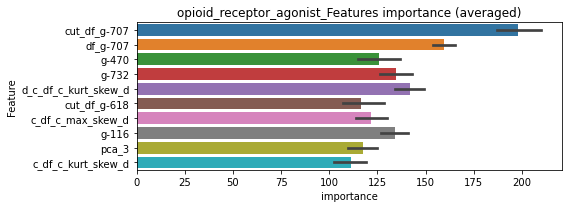

len(train_index) : 3033
len(valid_index) : 759
================================= fold 1/5 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000614826	valid_1's binary_logloss: 0.019815


len(train_index) : 3033
len(valid_index) : 759
================================= fold 2/5 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 758
================================= fold 3/5 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000951497	valid_1's binary_logloss: 0.0258606
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000680566	valid_1's binary_logloss: 0.0114217


len(train_index) : 3034
len(valid_index) : 758
================================= fold 4/5 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 758
================================= fold 5/5 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000777614	valid_1's binary_logloss: 0.0275718
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000791619	valid_1's binary_logloss: 0.0138539


opioid_receptor_agonist logloss: 0.01970624488887865
opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00133623	valid_1's binary_logloss: 0.0552625
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.0016134	valid_1's binary_logloss: 0.0415478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00257415	valid_1's binary_logloss: 0.0621781
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000957312	valid_1's binary_logloss: 0.0206754
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0122888, Threshold: 0.0436437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 644/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0436437, conf_0:0.03055, conf_1:0.05674


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00249757	valid_1's binary_logloss: 0.0694854


Num_p_label: 17.0, Expected: 16.1, Adj_threshold_1: 0.0736437
threshold: 0.0736437, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3779, y_label_rate: 0.1704155
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00104175	valid_1's binary_logloss: 0.041315
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00159869	valid_1's binary_logloss: 0.0505545
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000721001	valid_1's binary_logloss: 0.0400027
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00167278	valid_1's binary_logloss: 0.0333749
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000798609	valid_1's binary_logloss: 0.0190698


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0356363, Threshold: 0.0736437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0190859 Vs.target_rate: 0.00403
Num_p_label: 76.0, Expected: 16.1, Threshold: 0.0736437, conf_0:0.05891, conf_1:0.08837
Num_p_label: 60.0, Expected: 16.1, Adj_threshold_1: 0.1036437
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_2: 0.1336437
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_3: 0.1636437
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_4: 0.1936437
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_5: 0.2236437
threshold: 0.2236437, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 635.0/3761, y_label_rate: 0.1688381
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000714117	valid_1's binary_logloss: 0.0391114
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00114675	valid_1's binary_logloss: 0.03524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000622466	valid_1's binary_logloss: 0.0194856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000725299	valid_1's binary_logloss: 0.0220999
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0431912, Threshold: 0.2236437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 631.0/3753
p_label_rate: 0.0110497 Vs.target_rate: 0.00403
Num_p_label: 44.0, Expected: 16.1, Threshold: 0.2236437, conf_0:0.20128, conf_1:0.24601
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_1: 0.2536437
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_2: 0.2836437


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00197241	valid_1's binary_logloss: 0.0515204


Num_p_label: 32.0, Expected: 16.1, Adj_threshold_3: 0.3136437
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_4: 0.3436437
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_5: 0.3736437
threshold: 0.3736437, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 631.0/3753, y_label_rate: 0.1681322


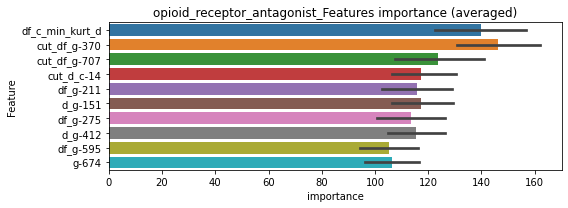

len(train_index) : 3002
len(valid_index) : 751
================================= fold 1/5 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3002
len(valid_index) : 751
================================= fold 2/5 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00175881	valid_1's binary_logloss: 0.0475672
Training until validation scores don't improve for 29 rounds


len(train_index) : 3002
len(valid_index) : 751
================================= fold 3/5 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00181387	valid_1's binary_logloss: 0.0426677
Training until validation scores don't improve for 29 rounds


len(train_index) : 3003
len(valid_index) : 750


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00100489	valid_1's binary_logloss: 0.0303671


================================= fold 4/5 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000872478	valid_1's binary_logloss: 0.0263757


len(train_index) : 3003
len(valid_index) : 750
================================= fold 5/5 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


opioid_receptor_antagonist logloss: 0.03693214355224437
opioid_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00177417	valid_1's binary_logloss: 0.03767


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000406713	valid_1's binary_logloss: 0.0118974
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000409731	valid_1's binary_logloss: 0.00358169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000417723	valid_1's binary_logloss: 0.0154635
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00040044	valid_1's binary_logloss: 0.00173475
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000401353	valid_1's binary_logloss: 0.00186118


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026686, Threshold: 0.0063994, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0063994, conf_0:0.00448, conf_1:0.00832
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0363994
threshold: 0.0363994, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000385294	valid_1's binary_logloss: 0.0114687
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000450641	valid_1's binary_logloss: 0.00402899
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000478443	valid_1's binary_logloss: 0.0120081
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000387776	valid_1's binary_logloss: 0.00149052
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00038313	valid_1's binary_logloss: 0.00230909


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329652, Threshold: 0.0363994, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0363994, conf_0:0.02912, conf_1:0.04368
Num_p_label: 6.0, Expected: 6.2, Adj_threshold_1: 0.0663994
threshold: 0.0663994, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000422847	valid_1's binary_logloss: 0.00687127
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000382686	valid_1's binary_logloss: 0.00396703
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000384216	valid_1's binary_logloss: 0.00308843
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00039095	valid_1's binary_logloss: 0.00305054
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323930, Threshold: 0.0663994, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000449007	valid_1's binary_logloss: 0.00587364


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0015068 Vs.target_rate: 0.00155
Num_p_label: 6.0, Expected: 6.2, Threshold: 0.0663994, conf_0:0.05976, conf_1:0.07304
threshold: 0.0663994, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


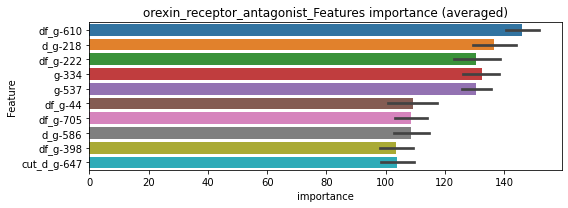

len(train_index) : 3047
len(valid_index) : 762
================================= fold 1/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000389748	valid_1's binary_logloss: 0.00675227


len(train_index) : 3047
len(valid_index) : 762
================================= fold 2/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000406019	valid_1's binary_logloss: 0.0053343


len(train_index) : 3047
len(valid_index) : 762
================================= fold 3/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000389729	valid_1's binary_logloss: 0.00241414


len(train_index) : 3047
len(valid_index) : 762
================================= fold 4/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000389976	valid_1's binary_logloss: 0.00187574


len(train_index) : 3048
len(valid_index) : 761
================================= fold 5/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000400112	valid_1's binary_logloss: 0.00488495


orexin_receptor_antagonist logloss: 0.004252170276852527
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000523542	valid_1's binary_logloss: 0.0114458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000570264	valid_1's binary_logloss: 0.0171217
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000539228	valid_1's binary_logloss: 0.00930419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000522624	valid_1's binary_logloss: 0.0137804
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000559027	valid_1's binary_logloss: 0.016159


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0052046, Threshold: 0.0299034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0299034, conf_0:0.02093, conf_1:0.03887
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_1: 0.0599034
Num_p_label: 13.0, Expected: 10.4, Adj_threshold_2: 0.0899034
threshold: 0.0899034, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000879897	valid_1's binary_logloss: 0.0196771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000519786	valid_1's binary_logloss: 0.0120829
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000498291	valid_1's binary_logloss: 0.00642475
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000725086	valid_1's binary_logloss: 0.0126519
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000557707	valid_1's binary_logloss: 0.0251308


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0231394, Threshold: 0.0899034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0052737 Vs.target_rate: 0.00260
Num_p_label: 21.0, Expected: 10.4, Threshold: 0.0899034, conf_0:0.07192, conf_1:0.10788
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1199034
Num_p_label: 11.0, Expected: 10.4, Adj_threshold_2: 0.1499034
threshold: 0.1499034, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000583918	valid_1's binary_logloss: 0.0119194
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000504422	valid_1's binary_logloss: 0.00510442
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000543386	valid_1's binary_logloss: 0.0217847
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000500615	valid_1's binary_logloss: 0.0141665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000493752	valid_1's binary_logloss: 0.0114012


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238755, Threshold: 0.1499034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3799
p_label_rate: 0.0027624 Vs.target_rate: 0.00260
Num_p_label: 11.0, Expected: 10.4, Threshold: 0.1499034, conf_0:0.13491, conf_1:0.16489
threshold: 0.1499034, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3799, y_label_rate: 0.1713609


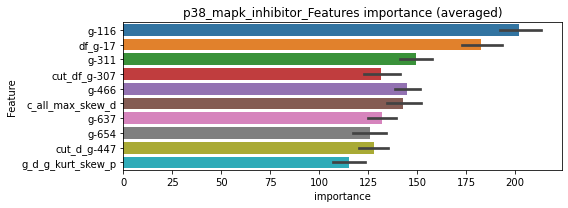

len(train_index) : 3039
len(valid_index) : 760
================================= fold 1/5 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000649606	valid_1's binary_logloss: 0.0188281


len(train_index) : 3039
len(valid_index) : 760
================================= fold 2/5 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3039
len(valid_index) : 760
================================= fold 3/5 p38_mapk_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000923702	valid_1's binary_logloss: 0.0252253
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000697314	valid_1's binary_logloss: 0.0135945


len(train_index) : 3039
len(valid_index) : 760
================================= fold 4/5 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000506066	valid_1's binary_logloss: 0.00837861
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000498327	valid_1's binary_logloss: 0.00835051


len(train_index) : 3040
len(valid_index) : 759
================================= fold 5/5 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000512747	valid_1's binary_logloss: 0.0056345
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000501726	valid_1's binary_logloss: 0.00560025


p38_mapk_inhibitor logloss: 0.014323807214474033
p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000309171	valid_1's binary_logloss: 0.00126083
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000313385	valid_1's binary_logloss: 0.00646344
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00228983
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000302605	valid_1's binary_logloss: 0.00117725
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000306605	valid_1's binary_logloss: 0.000776456


y_Threshold: 0.0017202, Threshold: 0.0108182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0108182, conf_0:0.00757, conf_1:0.01406
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0408182
threshold: 0.0408182, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000303366	valid_1's binary_logloss: 0.00107524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000305193	valid_1's binary_logloss: 0.00706289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000298279	valid_1's binary_logloss: 0.00250288
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00030054	valid_1's binary_logloss: 0.000899384
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097551, Threshold: 0.0408182, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000294311	valid_1's binary_logloss: 0.000839215


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00101
Num_p_label: 18.0, Expected: 4.0, Threshold: 0.0408182, conf_0:0.03265, conf_1:0.04898
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_1: 0.0708182
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.1008182
threshold: 0.1008182, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000303366	valid_1's binary_logloss: 0.00107524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000305193	valid_1's binary_logloss: 0.00706289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000298279	valid_1's binary_logloss: 0.00250288
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00030054	valid_1's binary_logloss: 0.000899384
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000294311	valid_1's binary_logloss: 0.000839215


y_Threshold: 0.0097551, Threshold: 0.1008182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.1008182, conf_0:0.09074, conf_1:0.11090
threshold: 0.1008182, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


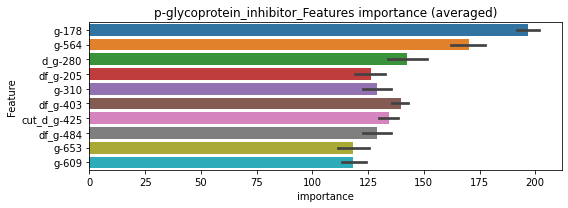

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00029737	valid_1's binary_logloss: 0.00103575
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000296943	valid_1's binary_logloss: 0.00103408


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049


Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000330443	valid_1's binary_logloss: 0.00506823


len(valid_index) : 762
================================= fold 3/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000301297	valid_1's binary_logloss: 0.00252136


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000296678	valid_1's binary_logloss: 0.000837151
Early stopping, best iteration is:
[1041]	training's binary_logloss: 0.000295384	valid_1's binary_logloss: 0.000834241


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000298267	valid_1's binary_logloss: 0.000881886
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000298267	valid_1's binary_logloss: 0.000881886


p-glycoprotein_inhibitor logloss: 0.002067688446160979
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000546397	valid_1's binary_logloss: 0.0244764
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000749366	valid_1's binary_logloss: 0.0172664
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000629694	valid_1's binary_logloss: 0.00952879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000544363	valid_1's binary_logloss: 0.00706642
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000588164	valid_1's binary_logloss: 0.0139361


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0047281, Threshold: 0.0147703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0147703, conf_0:0.01034, conf_1:0.01920
Num_p_label: 6.0, Expected: 10.2, Adj_threshold_1: 0.0447703
threshold: 0.0447703, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000524755	valid_1's binary_logloss: 0.0112363
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000548706	valid_1's binary_logloss: 0.00931807
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000524847	valid_1's binary_logloss: 0.0091505
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000538201	valid_1's binary_logloss: 0.00499999
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000533959	valid_1's binary_logloss: 0.0189216


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0506495, Threshold: 0.0447703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0075339 Vs.target_rate: 0.00256
Num_p_label: 30.0, Expected: 10.2, Threshold: 0.0447703, conf_0:0.03582, conf_1:0.05372
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.0747703
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_2: 0.1047703
threshold: 0.1047703, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000651164	valid_1's binary_logloss: 0.0187243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000516646	valid_1's binary_logloss: 0.00956607
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000603244	valid_1's binary_logloss: 0.0134605
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000520315	valid_1's binary_logloss: 0.00465858
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000521726	valid_1's binary_logloss: 0.0161121


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0299975, Threshold: 0.1047703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00256
Num_p_label: 12.0, Expected: 10.2, Threshold: 0.1047703, conf_0:0.09429, conf_1:0.11525
threshold: 0.1047703, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


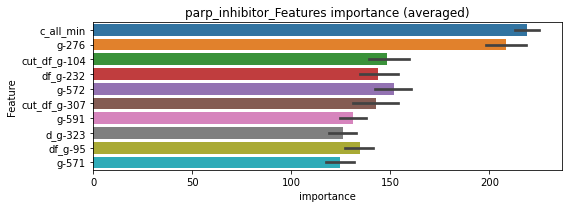

len(train_index) : 3040
len(valid_index) : 761
================================= fold 1/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000588758	valid_1's binary_logloss: 0.0143383


len(train_index) : 3041
len(valid_index) : 760
================================= fold 2/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000537294	valid_1's binary_logloss: 0.00873534


len(train_index) : 3041
len(valid_index) : 760
================================= fold 3/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000595594	valid_1's binary_logloss: 0.0173609


len(train_index) : 3041
len(valid_index) : 760
================================= fold 4/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.00053652	valid_1's binary_logloss: 0.0110524


len(train_index) : 3041
len(valid_index) : 760
================================= fold 5/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00067499	valid_1's binary_logloss: 0.0216995


parp_inhibitor logloss: 0.014638315875582847


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7380
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7380


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0368411	valid_1's binary_logloss: 0.137978
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0200831	valid_1's binary_logloss: 0.127904
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0371797	valid_1's binary_logloss: 0.128999
[2000]	training's binary_logloss: 0.017517	valid_1's binary_logloss: 0.116412
Early stopping, best iteration is:
[2301]	training's binary_logloss: 0.0151515	valid_1's binary_logloss: 0.114857
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0384129	valid_1's binary_logloss: 0.128963
Early stopping, best iteration is:
[1727]	training's binary_logloss: 0.0213492	valid_1's binary_logloss: 0.118784


1 / 3, AUC score:0.976, PR-AUC:0.950
y_Threshold: 0.0642419, Threshold: 0.1187028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 530 → Positive_corect_labels: 1359/8326
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.1187028, conf_0:0.08309, conf_1:0.15431
threshold: 0.1187028, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1359.0/8326, y_label_rate: 0.1632236
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0296006	valid_1's binary_logloss: 0.0941044
[2000]	training's binary_logloss: 0.0137172	valid_1's binary_logloss: 0.0790342
[3000]	training's binary_logloss: 0.00887497	valid_1's binary_logloss: 0.0741033
Early stopping, best iteration is:
[3070]	training's binary_logloss: 0.00866587	valid_1's binary_logloss: 0.0738909
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0297469	valid_1's binary_logloss: 0.0942396
[2000]	training's binary_logloss: 0.013826	valid_1's binary_logloss: 0.0794686
Early stopping, best iteration is:
[2153]	training's binary_logloss: 0.0127642	valid_1's binary_logloss: 0.0784614
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0292885	valid_1's binary_logloss: 0.0910531
[2000]	training's binary_logloss: 0.0136966	valid_1's binary_logloss: 0.0760632
[3000]	training's binary_l

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0822293, Threshold: 0.1187028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 1304.0/8216
p_label_rate: 0.0115520 Vs.target_rate: 0.01247
Num_p_label: 46.0, Expected: 49.7, Threshold: 0.1187028, conf_0:0.09496, conf_1:0.14244
threshold: 0.1187028, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 1304.0/8216, y_label_rate: 0.1587147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0271254	valid_1's binary_logloss: 0.0791035
[2000]	training's binary_logloss: 0.0125699	valid_1's binary_logloss: 0.0632196
[3000]	training's binary_logloss: 0.0081389	valid_1's binary_logloss: 0.0581334
Early stopping, best iteration is:
[3448]	training's binary_logloss: 0.00704728	valid_1's binary_logloss: 0.0567406
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0266211	valid_1's binary_logloss: 0.0850263
[2000]	training's binary_logloss: 0.0123384	valid_1's binary_logloss: 0.0702794
[3000]	training's binary_logloss: 0.00800805	valid_1's binary_logloss: 0.0651513
Early stopping, best iteration is:
[3009]	training's binary_logloss: 0.00798291	valid_1's binary_logloss: 0.0650728
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0273092	valid_1's binary_logloss: 0.0784152
Early stopping, best ite

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0810705, Threshold: 0.1187028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1273.0/8154
p_label_rate: 0.0110497 Vs.target_rate: 0.01247
Num_p_label: 44.0, Expected: 49.7, Threshold: 0.1187028, conf_0:0.10683, conf_1:0.13057
threshold: 0.1187028, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1273.0/8154, y_label_rate: 0.1561197


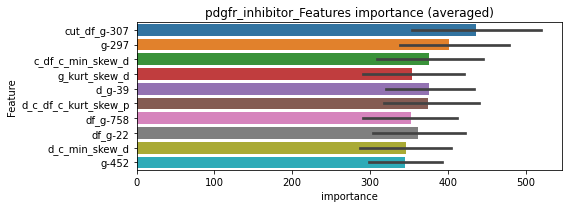

len(train_index) : 5436
len(valid_index) : 2718
================================= fold 1/3 pdgfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0511532	valid_1's binary_logloss: 0.106674
[2000]	training's binary_logloss: 0.0258473	valid_1's binary_logloss: 0.0836437
[3000]	training's binary_logloss: 0.0171353	valid_1's binary_logloss: 0.075177
[4000]	training's binary_logloss: 0.0127769	valid_1's binary_logloss: 0.0710372
Early stopping, best iteration is:
[4091]	training's binary_logloss: 0.0124971	valid_1's binary_logloss: 0.0707718


len(train_index) : 5436
len(valid_index) : 2718
================================= fold 2/3 pdgfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0532977	valid_1's binary_logloss: 0.0974437
[2000]	training's binary_logloss: 0.0269303	valid_1's binary_logloss: 0.0724164
[3000]	training's binary_logloss: 0.0178513	valid_1's binary_logloss: 0.0635626
[4000]	training's binary_logloss: 0.0133407	valid_1's binary_logloss: 0.059041
[5000]	training's binary_logloss: 0.010624	valid_1's binary_logloss: 0.0561014
Early stopping, best iteration is:
[5101]	training's binary_logloss: 0.0104172	valid_1's binary_logloss: 0.0558659


len(train_index) : 5436
len(valid_index) : 2718
================================= fold 3/3 pdgfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0522906	valid_1's binary_logloss: 0.0964741
[2000]	training's binary_logloss: 0.0263049	valid_1's binary_logloss: 0.0707746
[3000]	training's binary_logloss: 0.0174178	valid_1's binary_logloss: 0.0614632
[4000]	training's binary_logloss: 0.0129773	valid_1's binary_logloss: 0.0565446
[5000]	training's binary_logloss: 0.01034	valid_1's binary_logloss: 0.0533139
[6000]	training's binary_logloss: 0.00858561	valid_1's binary_logloss: 0.0512291
[7000]	training's binary_logloss: 0.00736769	valid_1's binary_logloss: 0.0496561
Early stopping, best iteration is:
[7563]	training's binary_logloss: 0.0068203	valid_1's binary_logloss: 0.0489574


pdgfr_inhibitor logloss: 0.058531706367318574
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000293187	valid_1's binary_logloss: 0.000752557
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000285914	valid_1's binary_logloss: 0.000818135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000296172	valid_1's binary_logloss: 0.00577177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000298344	valid_1's binary_logloss: 0.00269135
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015739, Threshold: 0.0077751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0077751, conf_0:0.00544, conf_1:0.01011
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0377751


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000288795	valid_1's binary_logloss: 0.00139671


threshold: 0.0377751, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000275648	valid_1's binary_logloss: 0.000602583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000273327	valid_1's binary_logloss: 0.000629838
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000283703	valid_1's binary_logloss: 0.0057004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000300732	valid_1's binary_logloss: 0.00406426
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000278846	valid_1's binary_logloss: 0.00126501


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269467, Threshold: 0.0377751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0077850 Vs.target_rate: 0.00076
Num_p_label: 31.0, Expected: 3.0, Threshold: 0.0377751, conf_0:0.03022, conf_1:0.04533
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0677751
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0977751
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.1277751
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1577751
threshold: 0.1577751, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000289188	valid_1's binary_logloss: 0.00347264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000275718	valid_1's binary_logloss: 0.00219869
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000275775	valid_1's binary_logloss: 0.000511302
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000293131	valid_1's binary_logloss: 0.00055985
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341623, Threshold: 0.1577751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.1577751, conf_0:0.14200, conf_1:0.17355
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1877751
threshold: 0.1877751, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000290493	valid_1's binary_logloss: 0.000945371


positive_y_label: 656.0/3811, y_label_rate: 0.1721333


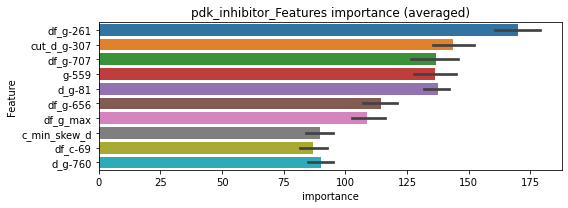

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 pdk_inhibitor=================================


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000291233	valid_1's binary_logloss: 0.00207026
Training until validation scores don't improve for 29 rounds


len(train_index) : 3049


Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000273587	valid_1's binary_logloss: 0.000997772


len(valid_index) : 762
================================= fold 3/5 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000277733	valid_1's binary_logloss: 0.000567435


================================= fold 4/5 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000279871	valid_1's binary_logloss: 0.000499187


================================= fold 5/5 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000275206	valid_1's binary_logloss: 0.000873051


pdk_inhibitor logloss: 0.0010018204318073764


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 7176
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 7176


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0327094	valid_1's binary_logloss: 0.118291
Early stopping, best iteration is:
[1473]	training's binary_logloss: 0.0213383	valid_1's binary_logloss: 0.113177
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0325298	valid_1's binary_logloss: 0.121781
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.0249659	valid_1's binary_logloss: 0.119502
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0329208	valid_1's binary_logloss: 0.120844
Early stopping, best iteration is:
[1181]	training's binary_logloss: 0.0274469	valid_1's binary_logloss: 0.118452


1 / 3, AUC score:0.975, PR-AUC:0.949
y_Threshold: 0.0628981, Threshold: 0.1319393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 516 → Positive_corect_labels: 1321/8095
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.1319393, conf_0:0.09236, conf_1:0.17152
threshold: 0.1319393, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1321.0/8095, y_label_rate: 0.1631872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0234508	valid_1's binary_logloss: 0.0776717
Early stopping, best iteration is:
[1642]	training's binary_logloss: 0.0135509	valid_1's binary_logloss: 0.0713922
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0228206	valid_1's binary_logloss: 0.0869356
Early stopping, best iteration is:
[1634]	training's binary_logloss: 0.0132126	valid_1's binary_logloss: 0.0820066
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0245362	valid_1's binary_logloss: 0.0726007
Early stopping, best iteration is:
[1913]	training's binary_logloss: 0.0119623	valid_1's binary_logloss: 0.0628707


2 / 3, AUC score:0.994, PR-AUC:0.986
y_Threshold: 0.0744787, Threshold: 0.1319393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 1252.0/7957
p_label_rate: 0.0110497 Vs.target_rate: 0.01109
Num_p_label: 44.0, Expected: 44.1, Threshold: 0.1319393, conf_0:0.10555, conf_1:0.15833
threshold: 0.1319393, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1252.0/7957, y_label_rate: 0.1573457
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0195638	valid_1's binary_logloss: 0.0480761
[2000]	training's binary_logloss: 0.0091941	valid_1's binary_logloss: 0.0379766
[3000]	training's binary_logloss: 0.00598789	valid_1's binary_logloss: 0.034669
Early stopping, best iteration is:
[3267]	training's binary_logloss: 0.00547853	valid_1's binary_logloss: 0.0341231
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0185982	valid_1's binary_logloss: 0.0562556
Early stopping, best iteration is:
[1909]	training's binary_logloss: 0.00910014	valid_1's binary_logloss: 0.0486375
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0184999	valid_1's binary_logloss: 0.0584666
[2000]	training's binary_logloss: 0.00861213	valid_1's binary_logloss: 0.0504121
Early stopping, best iteration is:
[2283]	training's binary_logloss: 0.00750275	valid_1's binary_logloss

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0628618, Threshold: 0.1319393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 1228.0/7909
p_label_rate: 0.0085384 Vs.target_rate: 0.01109
Num_p_label: 34.0, Expected: 44.1, Threshold: 0.1319393, conf_0:0.11875, conf_1:0.14513
threshold: 0.1319393, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 1228.0/7909, y_label_rate: 0.1552662


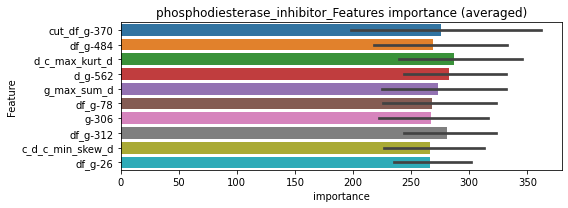

len(train_index) : 5272
len(valid_index) : 2637
================================= fold 1/3 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0356528	valid_1's binary_logloss: 0.0624834
[2000]	training's binary_logloss: 0.0181884	valid_1's binary_logloss: 0.0461794
[3000]	training's binary_logloss: 0.0121052	valid_1's binary_logloss: 0.0403526
[4000]	training's binary_logloss: 0.00905401	valid_1's binary_logloss: 0.0374165
[5000]	training's binary_logloss: 0.00721893	valid_1's binary_logloss: 0.0356398
[6000]	training's binary_logloss: 0.00601812	valid_1's binary_logloss: 0.034456
[7000]	training's binary_logloss: 0.00517308	valid_1's binary_logloss: 0.0336024
[8000]	training's binary_logloss: 0.00453527	valid_1's binary_logloss: 0.0329508
Early stopping, best iteration is:
[8001]	training's binary_logloss: 0.00453477	valid_1's binary_logloss: 0.0329483


len(train_index) : 5273
len(valid_index) : 2636
================================= fold 2/3 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0363722	valid_1's binary_logloss: 0.0619015
[2000]	training's binary_logloss: 0.0185593	valid_1's binary_logloss: 0.0462319
[3000]	training's binary_logloss: 0.0123529	valid_1's binary_logloss: 0.0409019
[4000]	training's binary_logloss: 0.00922012	valid_1's binary_logloss: 0.0381454
Early stopping, best iteration is:
[4830]	training's binary_logloss: 0.00762131	valid_1's binary_logloss: 0.0366436


len(train_index) : 5273
len(valid_index) : 2636
================================= fold 3/3 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0357774	valid_1's binary_logloss: 0.063679
[2000]	training's binary_logloss: 0.0182305	valid_1's binary_logloss: 0.0480434
[3000]	training's binary_logloss: 0.0120962	valid_1's binary_logloss: 0.0426351
[4000]	training's binary_logloss: 0.00905536	valid_1's binary_logloss: 0.0398302
[5000]	training's binary_logloss: 0.00722304	valid_1's binary_logloss: 0.0383118
Early stopping, best iteration is:
[5896]	training's binary_logloss: 0.00612463	valid_1's binary_logloss: 0.0373458


phosphodiesterase_inhibitor logloss: 0.03564559021106431
phosphodiesterase_inhibitor is unpredictable(><)!
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000334322	valid_1's binary_logloss: 0.00420243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000323159	valid_1's binary_logloss: 0.00242833
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000351685	valid_1's binary_logloss: 0.00595352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000323406	valid_1's binary_logloss: 0.00128243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000331288	valid_1's binary_logloss: 0.00130717


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019209, Threshold: 0.0063539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0063539, conf_0:0.00445, conf_1:0.00826
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_1: 0.0363539
threshold: 0.0363539, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000315747	valid_1's binary_logloss: 0.00357224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000315124	valid_1's binary_logloss: 0.00270931
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000338907	valid_1's binary_logloss: 0.00615831
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000323551	valid_1's binary_logloss: 0.00176207
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000318835	valid_1's binary_logloss: 0.00132579


y_Threshold: 0.0485994, Threshold: 0.0363539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.0363539, conf_0:0.02908, conf_1:0.04362
threshold: 0.0363539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000315747	valid_1's binary_logloss: 0.00357224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000315124	valid_1's binary_logloss: 0.00270931
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000338907	valid_1's binary_logloss: 0.00615831
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000323551	valid_1's binary_logloss: 0.00176207
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000318835	valid_1's binary_logloss: 0.00132579


y_Threshold: 0.0485994, Threshold: 0.0363539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.0363539, conf_0:0.03272, conf_1:0.03999
threshold: 0.0363539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


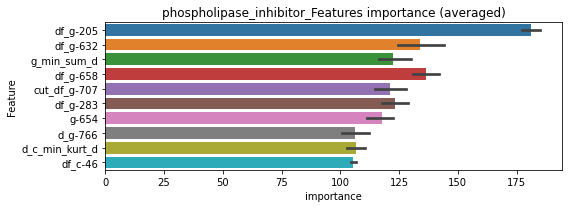

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.00033383	valid_1's binary_logloss: 0.00229501


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000316745	valid_1's binary_logloss: 0.00190352


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762


Early stopping, best iteration is:
[692]	training's binary_logloss: 0.00035658	valid_1's binary_logloss: 0.0041988


================================= fold 4/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000334416	valid_1's binary_logloss: 0.00147433


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00031995	valid_1's binary_logloss: 0.00123258


phospholipase_inhibitor logloss: 0.002221428658120961


mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 4110
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 4110


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0348595	valid_1's binary_logloss: 0.102899
[2000]	training's binary_logloss: 0.0173314	valid_1's binary_logloss: 0.0867741
Early stopping, best iteration is:
[2800]	training's binary_logloss: 0.0124876	valid_1's binary_logloss: 0.0817765
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0328193	valid_1's binary_logloss: 0.119113
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0164278	valid_1's binary_logloss: 0.108911
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0333186	valid_1's binary_logloss: 0.122783
[2000]	training's binary_logloss: 0.0161641	valid_1's binary_logloss: 0.109674
Early stopping, best iteration is:
[2515]	training's binary_logloss: 0.0128128	valid_1's binary_logloss: 0.107046


1 / 3, AUC score:0.987, PR-AUC:0.967
y_Threshold: 0.0582792, Threshold: 0.1307470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 243 → Positive_corect_labels: 783/4689
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.1307470, conf_0:0.09152, conf_1:0.16997
Num_p_label: 26.0, Expected: 25.2, Adj_threshold_1: 0.1607470
threshold: 0.1607470, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 783.0/4689, y_label_rate: 0.1669866
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0284218	valid_1's binary_logloss: 0.091008
[2000]	training's binary_logloss: 0.01353	valid_1's binary_logloss: 0.0757475
Early stopping, best iteration is:
[2360]	training's binary_logloss: 0.0113479	valid_1's binary_logloss: 0.073358
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0286871	valid_1's binary_logloss: 0.0892881
[2000]	training's binary_logloss: 0.0137658	valid_1's binary_logloss: 0.0724278
Early stopping, best iteration is:
[2675]	training's binary_logloss: 0.0101461	valid_1's binary_logloss: 0.0679161
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0285712	valid_1's binary_logloss: 0.082881
[2000]	training's binary_logloss: 0.0136347	valid_1's binary_logloss: 0.0664401
[3000]	training's binary_logloss: 0.00893438	valid_1's binary_logloss: 0.0609721
Early stopping, best iteration 

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0972475, Threshold: 0.1607470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 761.0/4645
p_label_rate: 0.0118031 Vs.target_rate: 0.00634
Num_p_label: 47.0, Expected: 25.2, Threshold: 0.1607470, conf_0:0.12860, conf_1:0.19290
Num_p_label: 36.0, Expected: 25.2, Adj_threshold_1: 0.1907470
threshold: 0.1907470, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 761.0/4645, y_label_rate: 0.1638321
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0268655	valid_1's binary_logloss: 0.0790235
[2000]	training's binary_logloss: 0.0128858	valid_1's binary_logloss: 0.063947
[3000]	training's binary_logloss: 0.00846146	valid_1's binary_logloss: 0.0586784
Early stopping, best iteration is:
[3785]	training's binary_logloss: 0.00668433	valid_1's binary_logloss: 0.0563157
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0272627	valid_1's binary_logloss: 0.073525
[2000]	training's binary_logloss: 0.0130353	valid_1's binary_logloss: 0.0567086
[3000]	training's binary_logloss: 0.00855313	valid_1's binary_logloss: 0.0502773
Early stopping, best iteration is:
[3456]	training's binary_logloss: 0.00739314	valid_1's binary_logloss: 0.0486144
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0267525	valid_1's binary_logloss: 0.0814784
[2000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0845875, Threshold: 0.1907470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 746.0/4615
p_label_rate: 0.0075339 Vs.target_rate: 0.00634
Num_p_label: 30.0, Expected: 25.2, Threshold: 0.1907470, conf_0:0.17167, conf_1:0.20982
threshold: 0.1907470, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 746.0/4615, y_label_rate: 0.1616468


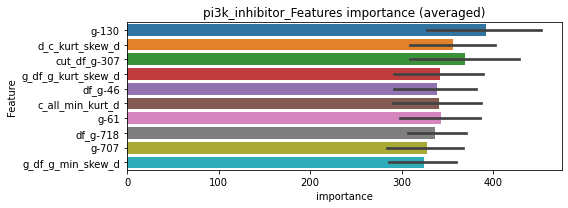

len(train_index) : 3076
len(valid_index) : 1539
================================= fold 1/3 pi3k_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0563271	valid_1's binary_logloss: 0.108759
[2000]	training's binary_logloss: 0.0286156	valid_1's binary_logloss: 0.0794973
[3000]	training's binary_logloss: 0.0189904	valid_1's binary_logloss: 0.0684434
[4000]	training's binary_logloss: 0.0142205	valid_1's binary_logloss: 0.0626018
[5000]	training's binary_logloss: 0.0113612	valid_1's binary_logloss: 0.058915
[6000]	training's binary_logloss: 0.00946523	valid_1's binary_logloss: 0.0561592
[7000]	training's binary_logloss: 0.00812569	valid_1's binary_logloss: 0.0543203
[8000]	training's binary_logloss: 0.00712676	valid_1's binary_logloss: 0.0528182
[9000]	training's binary_logloss: 0.00634959	valid_1's binary_logloss: 0.0515538
Early stopping, best iteration is:
[9477]	training's binary_logloss: 0.00604046	valid_1's binary_logloss: 0.05113


len(train_index) : 3077
len(valid_index) : 1538
================================= fold 2/3 pi3k_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0547667	valid_1's binary_logloss: 0.117791
[2000]	training's binary_logloss: 0.0278148	valid_1's binary_logloss: 0.0916603
[3000]	training's binary_logloss: 0.0184717	valid_1's binary_logloss: 0.0821938
[4000]	training's binary_logloss: 0.0138104	valid_1's binary_logloss: 0.0769188
[5000]	training's binary_logloss: 0.0110388	valid_1's binary_logloss: 0.0736404
Early stopping, best iteration is:
[5260]	training's binary_logloss: 0.0104988	valid_1's binary_logloss: 0.0729433


len(train_index) : 3077
len(valid_index) : 1538
================================= fold 3/3 pi3k_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0575839	valid_1's binary_logloss: 0.100633
[2000]	training's binary_logloss: 0.0295191	valid_1's binary_logloss: 0.071673
[3000]	training's binary_logloss: 0.0196667	valid_1's binary_logloss: 0.0604111
[4000]	training's binary_logloss: 0.0147226	valid_1's binary_logloss: 0.0542792
[5000]	training's binary_logloss: 0.0117604	valid_1's binary_logloss: 0.0505261
[6000]	training's binary_logloss: 0.00978386	valid_1's binary_logloss: 0.0477995
[7000]	training's binary_logloss: 0.00839448	valid_1's binary_logloss: 0.0459028
[8000]	training's binary_logloss: 0.00734923	valid_1's binary_logloss: 0.0442974
[9000]	training's binary_logloss: 0.00654216	valid_1's binary_logloss: 0.043042
[10000]	training's binary_logloss: 0.00591106	valid_1's binary_logloss: 0.0421154
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00591106	valid_1's binary_logloss: 0.0421154


pi3k_inhibitor logloss: 0.05539529999232248
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000389116	valid_1's binary_logloss: 0.00169375
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000388371	valid_1's binary_logloss: 0.00831184
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000382986	valid_1's binary_logloss: 0.000847676
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000393135	valid_1's binary_logloss: 0.00126201
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020613, Threshold: 0.0063300, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000383728	valid_1's binary_logloss: 0.00687166


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0063300, conf_0:0.00443, conf_1:0.00823
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0363300
threshold: 0.0363300, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000378532	valid_1's binary_logloss: 0.00156134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00040962	valid_1's binary_logloss: 0.00654898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000393046	valid_1's binary_logloss: 0.000822712
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00037481	valid_1's binary_logloss: 0.00109618
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390113, Threshold: 0.0363300, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000372971	valid_1's binary_logloss: 0.0059571


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.0363300, conf_0:0.02906, conf_1:0.04360
Num_p_label: 6.0, Expected: 5.2, Adj_threshold_1: 0.0663300
threshold: 0.0663300, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000378532	valid_1's binary_logloss: 0.00156134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00040962	valid_1's binary_logloss: 0.00654898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000393046	valid_1's binary_logloss: 0.000822712
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00037481	valid_1's binary_logloss: 0.00109618
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390113, Threshold: 0.0663300, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000372971	valid_1's binary_logloss: 0.0059571


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00130
Num_p_label: 6.0, Expected: 5.2, Threshold: 0.0663300, conf_0:0.05970, conf_1:0.07296
threshold: 0.0663300, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


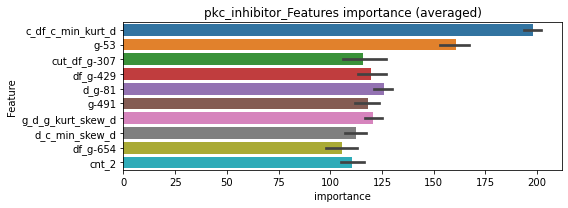

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000400932	valid_1's binary_logloss: 0.00155569


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000505052	valid_1's binary_logloss: 0.00609458


================================= fold 3/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000395613	valid_1's binary_logloss: 0.000743389


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0003767	valid_1's binary_logloss: 0.00086308
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000376937	valid_1's binary_logloss: 0.000862878


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000376798	valid_1's binary_logloss: 0.00438629


pkc_inhibitor logloss: 0.0027294126945066497
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000586152	valid_1's binary_logloss: 0.0250089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000541539	valid_1's binary_logloss: 0.0120149
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000502671	valid_1's binary_logloss: 0.0123626
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000605402	valid_1's binary_logloss: 0.0102311
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049149, Threshold: 0.0215239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0215239, conf_0:0.01507, conf_1:0.02798
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0515239


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0012405	valid_1's binary_logloss: 0.0343447


threshold: 0.0515239, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00063293	valid_1's binary_logloss: 0.0245228
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000529739	valid_1's binary_logloss: 0.00790301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000495989	valid_1's binary_logloss: 0.00992364
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000761663	valid_1's binary_logloss: 0.00996603
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0363345, Threshold: 0.0515239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0173280 Vs.target_rate: 0.00231
Num_p_label: 69.0, Expected: 9.2, Threshold: 0.0515239, conf_0:0.04122, conf_1:0.06183
Num_p_label: 54.0, Expected: 9.2, Adj_threshold_1: 0.0815239
Num_p_label: 43.0, Expected: 9.2, Adj_threshold_2: 0.1115239
Num_p_label: 35.0, Expected: 9.2, Adj_threshold_3: 0.1415239
Num_p_label: 32.0, Expected: 9.2, Adj_threshold_4: 0.1715239
Num_p_label: 30.0, Expected: 9.2, Adj_threshold_5: 0.2015239
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_6: 0.2315239
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_7: 0.2615239


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.0018461	valid_1's binary_logloss: 0.0351376


Num_p_label: 22.0, Expected: 9.2, Adj_threshold_8: 0.2915239
threshold: 0.2915239, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000491751	valid_1's binary_logloss: 0.0130836
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000707923	valid_1's binary_logloss: 0.021417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000491903	valid_1's binary_logloss: 0.0140271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000576954	valid_1's binary_logloss: 0.0111418
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0356936, Threshold: 0.2915239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0080362 Vs.target_rate: 0.00231
Num_p_label: 32.0, Expected: 9.2, Threshold: 0.2915239, conf_0:0.26237, conf_1:0.32068


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000998072	valid_1's binary_logloss: 0.0196375


Num_p_label: 32.0, Expected: 9.2, Adj_threshold_1: 0.3215239
Num_p_label: 29.0, Expected: 9.2, Adj_threshold_2: 0.3515239
Num_p_label: 28.0, Expected: 9.2, Adj_threshold_3: 0.3815239
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_4: 0.4115239
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_5: 0.4415239
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_6: 0.4715239
threshold: 0.4715239, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 647.0/3786, y_label_rate: 0.1708928


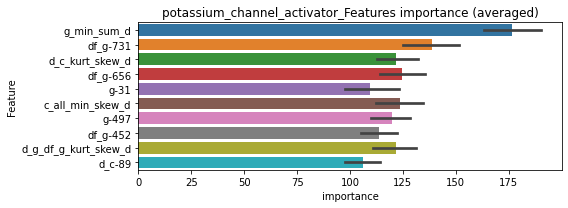

len(train_index) : 3028
len(valid_index) : 758
================================= fold 1/5 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000499791	valid_1's binary_logloss: 0.0145288


len(train_index) : 3029
len(valid_index) : 757
================================= fold 2/5 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 3/5 potassium_channel_activator=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000814304	valid_1's binary_logloss: 0.0202883
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000515718	valid_1's binary_logloss: 0.00854313


len(train_index) : 3029
len(valid_index) : 757
================================= fold 4/5 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000565643	valid_1's binary_logloss: 0.0097193


len(train_index) : 3029
len(valid_index) : 757
================================= fold 5/5 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds


potassium_channel_activator logloss: 0.012761968365282334


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000692958	valid_1's binary_logloss: 0.0107141


potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0269122	valid_1's binary_logloss: 0.0978746
[2000]	training's binary_logloss: 0.0129033	valid_1's binary_logloss: 0.0861891
Early stopping, best iteration is:
[2284]	training's binary_logloss: 0.0112362	valid_1's binary_logloss: 0.0848942
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0293413	valid_1's binary_logloss: 0.0787848
[2000]	training's binary_logloss: 0.0139529	valid_1's binary_logloss: 0.0642233
[3000]	training's binary_logloss: 0.00910914	valid_1's binary_logloss: 0.0591912
Early stopping, best iteration is:
[3712]	training's binary_logloss: 0.00730643	valid_1's binary_logloss: 0.0571642
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0284277	valid_1's binary_logloss: 0.0903486
[2000]	training's binary_logloss: 0.0135362	valid_1's binary_logloss: 0.0784113
[3000]	training's binary_

1 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0392572, Threshold: 0.0794715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 637/3761
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0794715, conf_0:0.05563, conf_1:0.10331
Num_p_label: 21.0, Expected: 16.4, Adj_threshold_1: 0.1094715
threshold: 0.1094715, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 637.0/3761, y_label_rate: 0.1693698
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0261558	valid_1's binary_logloss: 0.0660684
[2000]	training's binary_logloss: 0.0125788	valid_1's binary_logloss: 0.0521054
[3000]	training's binary_logloss: 0.00826845	valid_1's binary_logloss: 0.0469856
[4000]	training's binary_logloss: 0.00617843	valid_1's binary_logloss: 0.0444497
Early stopping, best iteration is:
[4345]	training's binary_logloss: 0.00569271	valid_1's binary_logloss: 0.0436857
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0256409	valid_1's binary_logloss: 0.0753536
[2000]	training's binary_logloss: 0.0123359	valid_1's binary_logloss: 0.0613587
Early stopping, best iteration is:
[2549]	training's binary_logloss: 0.0095989	valid_1's binary_logloss: 0.0581384
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0255998	valid_1's binary_logloss: 0.0822978
[2000]	training's binary

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0674892, Threshold: 0.1094715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 623.0/3733
p_label_rate: 0.0107986 Vs.target_rate: 0.00412
Num_p_label: 43.0, Expected: 16.4, Threshold: 0.1094715, conf_0:0.08758, conf_1:0.13137
Num_p_label: 24.0, Expected: 16.4, Adj_threshold_1: 0.1394715
threshold: 0.1394715, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 623.0/3733, y_label_rate: 0.1668899
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0234229	valid_1's binary_logloss: 0.0697194
[2000]	training's binary_logloss: 0.0112727	valid_1's binary_logloss: 0.0587775
[3000]	training's binary_logloss: 0.00746062	valid_1's binary_logloss: 0.0546023
Early stopping, best iteration is:
[3624]	training's binary_logloss: 0.00616209	valid_1's binary_logloss: 0.0532109
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0245073	valid_1's binary_logloss: 0.0612225
[2000]	training's binary_logloss: 0.0117774	valid_1's binary_logloss: 0.0474294
[3000]	training's binary_logloss: 0.00775179	valid_1's binary_logloss: 0.0426483
[4000]	training's binary_logloss: 0.0058168	valid_1's binary_logloss: 0.0403937
Early stopping, best iteration is:
[4709]	training's binary_logloss: 0.00495638	valid_1's binary_logloss: 0.0392356
Training until validation scores don't improve for 39 rounds
[1000]	training's binar

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0594344, Threshold: 0.1394715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 611.0/3709
p_label_rate: 0.0050226 Vs.target_rate: 0.00412
Num_p_label: 20.0, Expected: 16.4, Threshold: 0.1394715, conf_0:0.12552, conf_1:0.15342
threshold: 0.1394715, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 611.0/3709, y_label_rate: 0.1647344


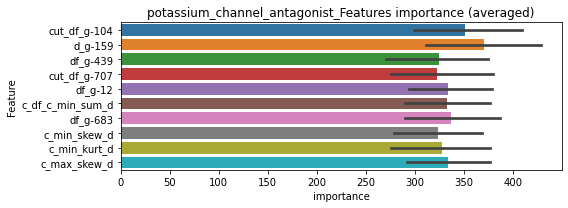

len(train_index) : 2472
len(valid_index) : 1237
================================= fold 1/3 potassium_channel_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0487247	valid_1's binary_logloss: 0.0886524
[2000]	training's binary_logloss: 0.0249354	valid_1's binary_logloss: 0.0650458
[3000]	training's binary_logloss: 0.0166582	valid_1's binary_logloss: 0.0560141
[4000]	training's binary_logloss: 0.0124695	valid_1's binary_logloss: 0.0513561
[5000]	training's binary_logloss: 0.00999134	valid_1's binary_logloss: 0.0483841
[6000]	training's binary_logloss: 0.00832923	valid_1's binary_logloss: 0.0464023
[7000]	training's binary_logloss: 0.00716804	valid_1's binary_logloss: 0.0449475
Early stopping, best iteration is:
[7755]	training's binary_logloss: 0.006486	valid_1's binary_logloss: 0.0439366


len(train_index) : 2473
len(valid_index) : 1236
================================= fold 2/3 potassium_channel_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.047039	valid_1's binary_logloss: 0.0948524
[2000]	training's binary_logloss: 0.0241005	valid_1's binary_logloss: 0.0723207
[3000]	training's binary_logloss: 0.0160531	valid_1's binary_logloss: 0.0641576
[4000]	training's binary_logloss: 0.0120183	valid_1's binary_logloss: 0.060018
[5000]	training's binary_logloss: 0.00964442	valid_1's binary_logloss: 0.057291
[6000]	training's binary_logloss: 0.00805626	valid_1's binary_logloss: 0.0555843
[7000]	training's binary_logloss: 0.00693436	valid_1's binary_logloss: 0.0543667
Early stopping, best iteration is:
[7239]	training's binary_logloss: 0.00670798	valid_1's binary_logloss: 0.0540511


len(train_index) : 2473
len(valid_index) : 1236
================================= fold 3/3 potassium_channel_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0490733	valid_1's binary_logloss: 0.0854673
[2000]	training's binary_logloss: 0.0251046	valid_1's binary_logloss: 0.060954
[3000]	training's binary_logloss: 0.0167335	valid_1's binary_logloss: 0.0517776
[4000]	training's binary_logloss: 0.0125712	valid_1's binary_logloss: 0.046944
[5000]	training's binary_logloss: 0.0100784	valid_1's binary_logloss: 0.0440437
[6000]	training's binary_logloss: 0.00841479	valid_1's binary_logloss: 0.0417911
[7000]	training's binary_logloss: 0.00723344	valid_1's binary_logloss: 0.0402793
[8000]	training's binary_logloss: 0.00634966	valid_1's binary_logloss: 0.0391105
[9000]	training's binary_logloss: 0.00566319	valid_1's binary_logloss: 0.0381563
[10000]	training's binary_logloss: 0.0051152	valid_1's binary_logloss: 0.0374074
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0051152	valid_1's binary_logloss: 0.0374074


potassium_channel_antagonist logloss: 0.045131422562103125
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0309708	valid_1's binary_logloss: 0.112324
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0156833	valid_1's binary_logloss: 0.101995
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0333526	valid_1's binary_logloss: 0.0984976
[2000]	training's binary_logloss: 0.0159629	valid_1's binary_logloss: 0.0851725
[3000]	training's binary_logloss: 0.0103887	valid_1's binary_logloss: 0.0801788
Early stopping, best iteration is:
[3239]	training's binary_logloss: 0.0095874	valid_1's binary_logloss: 0.0792198
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0314895	valid_1's binary_logloss: 0.114126
Early stopping, best iteration is:
[1538]	training's binary_logloss: 0.0200605	valid_1's binary_logloss: 0.106613


1 / 3, AUC score:0.983, PR-AUC:0.969
y_Threshold: 0.0550772, Threshold: 0.1163313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 198 → Positive_corect_labels: 622/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1163313, conf_0:0.08143, conf_1:0.15123
Num_p_label: 22.0, Expected: 19.2, Adj_threshold_1: 0.1463313
threshold: 0.1463313, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 622.0/3733, y_label_rate: 0.1666220
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0269008	valid_1's binary_logloss: 0.0875008
[2000]	training's binary_logloss: 0.0129973	valid_1's binary_logloss: 0.0731804
[3000]	training's binary_logloss: 0.00855863	valid_1's binary_logloss: 0.0681478
Early stopping, best iteration is:
[3321]	training's binary_logloss: 0.00772865	valid_1's binary_logloss: 0.0672323
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0268518	valid_1's binary_logloss: 0.0776562
[2000]	training's binary_logloss: 0.0130275	valid_1's binary_logloss: 0.0647618
[3000]	training's binary_logloss: 0.00856427	valid_1's binary_logloss: 0.0599977
Early stopping, best iteration is:
[3270]	training's binary_logloss: 0.00784692	valid_1's binary_logloss: 0.0591797
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0274213	valid_1's binary_logloss: 0.0759241
[2000]	training's binar

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0721051, Threshold: 0.1463313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 606.0/3701
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1463313, conf_0:0.11707, conf_1:0.17560
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_1: 0.1763313
threshold: 0.1763313, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 606.0/3701, y_label_rate: 0.1637395
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0248969	valid_1's binary_logloss: 0.0766252
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.012655	valid_1's binary_logloss: 0.0633773
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0257206	valid_1's binary_logloss: 0.0686001
[2000]	training's binary_logloss: 0.0123891	valid_1's binary_logloss: 0.0558451
Early stopping, best iteration is:
[2823]	training's binary_logloss: 0.00870411	valid_1's binary_logloss: 0.0519795
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0245339	valid_1's binary_logloss: 0.0784515
[2000]	training's binary_logloss: 0.0119431	valid_1's binary_logloss: 0.066235
Early stopping, best iteration is:
[2794]	training's binary_logloss: 0.0084251	valid_1's binary_logloss: 0.0620467


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0791752, Threshold: 0.1763313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 593.0/3675
p_label_rate: 0.0067805 Vs.target_rate: 0.00483
Num_p_label: 27.0, Expected: 19.2, Threshold: 0.1763313, conf_0:0.15870, conf_1:0.19396
threshold: 0.1763313, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 593.0/3675, y_label_rate: 0.1613605


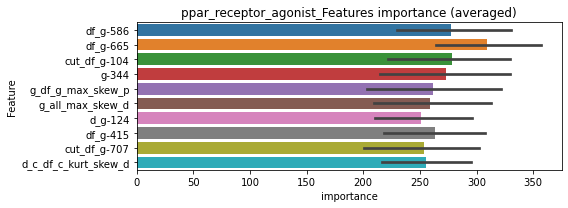

len(train_index) : 2450
len(valid_index) : 1225
================================= fold 1/3 ppar_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.049928	valid_1's binary_logloss: 0.10042
[2000]	training's binary_logloss: 0.0257317	valid_1's binary_logloss: 0.0736521
[3000]	training's binary_logloss: 0.0172366	valid_1's binary_logloss: 0.0635963
[4000]	training's binary_logloss: 0.0129568	valid_1's binary_logloss: 0.0581714
[5000]	training's binary_logloss: 0.0103827	valid_1's binary_logloss: 0.0546756
[6000]	training's binary_logloss: 0.00868033	valid_1's binary_logloss: 0.052333
[7000]	training's binary_logloss: 0.00748033	valid_1's binary_logloss: 0.0507691
[8000]	training's binary_logloss: 0.00657353	valid_1's binary_logloss: 0.0493924
[9000]	training's binary_logloss: 0.00586702	valid_1's binary_logloss: 0.048324
Early stopping, best iteration is:
[9091]	training's binary_logloss: 0.00580969	valid_1's binary_logloss: 0.0482028


len(train_index) : 2450
len(valid_index) : 1225
================================= fold 2/3 ppar_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0506215	valid_1's binary_logloss: 0.0906696
[2000]	training's binary_logloss: 0.0257749	valid_1's binary_logloss: 0.0651221
[3000]	training's binary_logloss: 0.0172183	valid_1's binary_logloss: 0.0559781
[4000]	training's binary_logloss: 0.0129281	valid_1's binary_logloss: 0.0511553
[5000]	training's binary_logloss: 0.0103732	valid_1's binary_logloss: 0.048193
[6000]	training's binary_logloss: 0.00866715	valid_1's binary_logloss: 0.0460325
[7000]	training's binary_logloss: 0.00745621	valid_1's binary_logloss: 0.0444855
[8000]	training's binary_logloss: 0.00655329	valid_1's binary_logloss: 0.043325
[9000]	training's binary_logloss: 0.00585088	valid_1's binary_logloss: 0.042311
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.00566884	valid_1's binary_logloss: 0.0420441


len(train_index) : 2450
len(valid_index) : 1225
================================= fold 3/3 ppar_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.050948	valid_1's binary_logloss: 0.0905503
[2000]	training's binary_logloss: 0.0260935	valid_1's binary_logloss: 0.0660011
[3000]	training's binary_logloss: 0.0174238	valid_1's binary_logloss: 0.0569732
[4000]	training's binary_logloss: 0.013101	valid_1's binary_logloss: 0.0524232
[5000]	training's binary_logloss: 0.0105098	valid_1's binary_logloss: 0.0496394
[6000]	training's binary_logloss: 0.00877322	valid_1's binary_logloss: 0.047637
[7000]	training's binary_logloss: 0.00755378	valid_1's binary_logloss: 0.0462975
[8000]	training's binary_logloss: 0.00662684	valid_1's binary_logloss: 0.0451596
[9000]	training's binary_logloss: 0.00591657	valid_1's binary_logloss: 0.0442595
Early stopping, best iteration is:
[9554]	training's binary_logloss: 0.00559272	valid_1's binary_logloss: 0.0439158


ppar_receptor_agonist logloss: 0.04472090683786698
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000349094	valid_1's binary_logloss: 0.0014875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000364514	valid_1's binary_logloss: 0.00601364
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000354238	valid_1's binary_logloss: 0.0135418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000366251	valid_1's binary_logloss: 0.0040703
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017567, Threshold: 0.0044228, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000361207	valid_1's binary_logloss: 0.00529379


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0044228, conf_0:0.00310, conf_1:0.00575
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0344228
threshold: 0.0344228, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00034215	valid_1's binary_logloss: 0.000876417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000355227	valid_1's binary_logloss: 0.00565568
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000362613	valid_1's binary_logloss: 0.0135498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00035015	valid_1's binary_logloss: 0.00410565
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182374, Threshold: 0.0344228, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0344228, conf_0:0.02754, conf_1:0.04131


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000381	valid_1's binary_logloss: 0.0070649


threshold: 0.0344228, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00034215	valid_1's binary_logloss: 0.000876417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000355227	valid_1's binary_logloss: 0.00565568
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000362613	valid_1's binary_logloss: 0.0135498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00035015	valid_1's binary_logloss: 0.00410565
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182374, Threshold: 0.0344228, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0344228, conf_0:0.03098, conf_1:0.03787


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000381	valid_1's binary_logloss: 0.0070649


threshold: 0.0344228, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


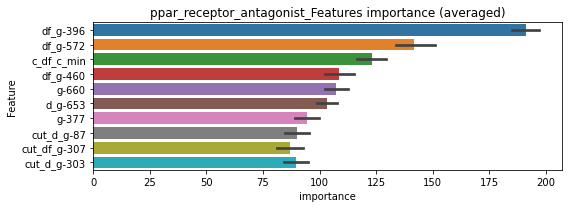

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000345415	valid_1's binary_logloss: 0.00093782
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000345455	valid_1's binary_logloss: 0.000937801


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000386233	valid_1's binary_logloss: 0.00553602


================================= fold 3/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 ppar_receptor_antagonist=================================


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000432445	valid_1's binary_logloss: 0.0107363
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000368988	valid_1's binary_logloss: 0.00259774


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000364385	valid_1's binary_logloss: 0.00522886


ppar_receptor_antagonist logloss: 0.005007348190376364
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0320681	valid_1's binary_logloss: 0.11842
[2000]	training's binary_logloss: 0.0153285	valid_1's binary_logloss: 0.105972
Early stopping, best iteration is:
[2741]	training's binary_logloss: 0.0110184	valid_1's binary_logloss: 0.102808
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0323248	valid_1's binary_logloss: 0.11643
Early stopping, best iteration is:
[1385]	training's binary_logloss: 0.0228625	valid_1's binary_logloss: 0.111282
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0332637	valid_1's binary_logloss: 0.0959594
[2000]	training's binary_logloss: 0.0159338	valid_1's binary_logloss: 0.0800514
Early stopping, best iteration is:
[2926]	training's binary_logloss: 0.0106965	valid_1's binary_logloss: 0.0752446


1 / 3, AUC score:0.986, PR-AUC:0.971
y_Threshold: 0.0563691, Threshold: 0.2566004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 196 → Positive_corect_labels: 621/3725
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2566004, conf_0:0.17962, conf_1:0.33358
Num_p_label: 32.0, Expected: 19.9, Adj_threshold_1: 0.2866004
Num_p_label: 27.0, Expected: 19.9, Adj_threshold_2: 0.3166004
threshold: 0.3166004, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 621.0/3725, y_label_rate: 0.1667114
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0277784	valid_1's binary_logloss: 0.0838793
[2000]	training's binary_logloss: 0.0133412	valid_1's binary_logloss: 0.068788
Early stopping, best iteration is:
[2745]	training's binary_logloss: 0.00956425	valid_1's binary_logloss: 0.0644826
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0277588	valid_1's binary_logloss: 0.0826952
[2000]	training's binary_logloss: 0.0133303	valid_1's binary_logloss: 0.0682741
[3000]	training's binary_logloss: 0.00874857	valid_1's binary_logloss: 0.06318
[4000]	training's binary_logloss: 0.00655518	valid_1's binary_logloss: 0.0607102
Early stopping, best iteration is:
[3974]	training's binary_logloss: 0.00659264	valid_1's binary_logloss: 0.0606431
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0274871	valid_1's binary_logloss: 0.0874365
[2000]	training's binary_l

2 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0867843, Threshold: 0.3166004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 602.0/3687
p_label_rate: 0.0208438 Vs.target_rate: 0.00500
Num_p_label: 83.0, Expected: 19.9, Threshold: 0.3166004, conf_0:0.25328, conf_1:0.37992
Num_p_label: 74.0, Expected: 19.9, Adj_threshold_1: 0.3466004
Num_p_label: 64.0, Expected: 19.9, Adj_threshold_2: 0.3766004
Num_p_label: 58.0, Expected: 19.9, Adj_threshold_3: 0.4066004
Num_p_label: 49.0, Expected: 19.9, Adj_threshold_4: 0.4366004
Num_p_label: 44.0, Expected: 19.9, Adj_threshold_5: 0.4666004
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_6: 0.4966004
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_7: 0.5266004
Num_p_label: 21.0, Expected: 19.9, Adj_threshold_8: 0.5566004
threshold: 0.5566004, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 602.0/3687, y_label_rate: 0.1632764
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0249889	valid_1's binary_logloss: 0.0753974
[2000]	training's binary_logloss: 0.012076	valid_1's binary_logloss: 0.0616016
[3000]	training's binary_logloss: 0.00793298	valid_1's binary_logloss: 0.0563165
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.00729779	valid_1's binary_logloss: 0.0555772
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0267879	valid_1's binary_logloss: 0.0631191
[2000]	training's binary_logloss: 0.0128768	valid_1's binary_logloss: 0.0480138
[3000]	training's binary_logloss: 0.00843838	valid_1's binary_logloss: 0.0423351
[4000]	training's binary_logloss: 0.00632161	valid_1's binary_logloss: 0.0395826
Early stopping, best iteration is:
[4551]	training's binary_logloss: 0.00556683	valid_1's binary_logloss: 0.0385012
Training until validation scores don't improve for 39 rounds
[1000]	training's binar

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0918577, Threshold: 0.5566004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 590.0/3663
p_label_rate: 0.0070316 Vs.target_rate: 0.00500
Num_p_label: 28.0, Expected: 19.9, Threshold: 0.5566004, conf_0:0.50094, conf_1:0.61226
threshold: 0.5566004, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 590.0/3663, y_label_rate: 0.1610702


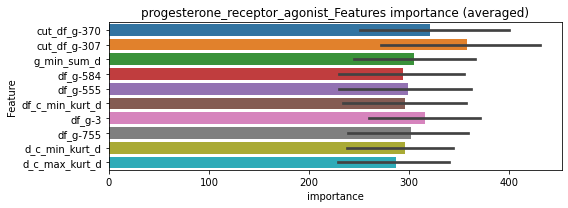

len(train_index) : 2442
len(valid_index) : 1221
================================= fold 1/3 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0513166	valid_1's binary_logloss: 0.0977596
[2000]	training's binary_logloss: 0.0264093	valid_1's binary_logloss: 0.0726573
[3000]	training's binary_logloss: 0.0176778	valid_1's binary_logloss: 0.0631844
[4000]	training's binary_logloss: 0.0132939	valid_1's binary_logloss: 0.0581318
[5000]	training's binary_logloss: 0.0106561	valid_1's binary_logloss: 0.0550317
[6000]	training's binary_logloss: 0.00891057	valid_1's binary_logloss: 0.0529319
[7000]	training's binary_logloss: 0.00767559	valid_1's binary_logloss: 0.0515307
[8000]	training's binary_logloss: 0.00674583	valid_1's binary_logloss: 0.050304
[9000]	training's binary_logloss: 0.00602209	valid_1's binary_logloss: 0.0493396
Early stopping, best iteration is:
[9372]	training's binary_logloss: 0.00579036	valid_1's binary_logloss: 0.0490608


len(train_index) : 2442
len(valid_index) : 1221
================================= fold 2/3 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0517711	valid_1's binary_logloss: 0.0931075
[2000]	training's binary_logloss: 0.0265613	valid_1's binary_logloss: 0.0680291
[3000]	training's binary_logloss: 0.0177605	valid_1's binary_logloss: 0.058646
[4000]	training's binary_logloss: 0.0133414	valid_1's binary_logloss: 0.0535966
[5000]	training's binary_logloss: 0.0107033	valid_1's binary_logloss: 0.0505385
[6000]	training's binary_logloss: 0.00893625	valid_1's binary_logloss: 0.0483188
[7000]	training's binary_logloss: 0.00768288	valid_1's binary_logloss: 0.0467513
[8000]	training's binary_logloss: 0.0067525	valid_1's binary_logloss: 0.0455748
[9000]	training's binary_logloss: 0.00602406	valid_1's binary_logloss: 0.0445209
[10000]	training's binary_logloss: 0.00544746	valid_1's binary_logloss: 0.0437936
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00544746	valid_1's binary_logloss: 0.0437936


len(train_index) : 2442
len(valid_index) : 1221
================================= fold 3/3 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0521117	valid_1's binary_logloss: 0.0945291
[2000]	training's binary_logloss: 0.0266753	valid_1's binary_logloss: 0.0688628
[3000]	training's binary_logloss: 0.0177771	valid_1's binary_logloss: 0.0589895
[4000]	training's binary_logloss: 0.0133271	valid_1's binary_logloss: 0.0540198
[5000]	training's binary_logloss: 0.0106805	valid_1's binary_logloss: 0.0509367
[6000]	training's binary_logloss: 0.00892444	valid_1's binary_logloss: 0.0486576
[7000]	training's binary_logloss: 0.00767527	valid_1's binary_logloss: 0.0470746
[8000]	training's binary_logloss: 0.00674258	valid_1's binary_logloss: 0.0458641
[9000]	training's binary_logloss: 0.00602	valid_1's binary_logloss: 0.0448569
[10000]	training's binary_logloss: 0.00545089	valid_1's binary_logloss: 0.0441989
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00545089	valid_1's binary_logloss: 0.0441989


progesterone_receptor_agonist logloss: 0.045684440434011514
progesterone_receptor_agonist is unpredictable(><)!
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00025817	valid_1's binary_logloss: 0.000937478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00026005	valid_1's binary_logloss: 0.000621819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000266523	valid_1's binary_logloss: 0.00193004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000265418	valid_1's binary_logloss: 0.00168527
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015946, Threshold: 0.0070823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0070823, conf_0:0.00496, conf_1:0.00921
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0370823


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000263716	valid_1's binary_logloss: 0.00189284


threshold: 0.0370823, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000251818	valid_1's binary_logloss: 0.000710493
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000250951	valid_1's binary_logloss: 0.000590893
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000252014	valid_1's binary_logloss: 0.00234418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000250733	valid_1's binary_logloss: 0.000886391
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0763108, Threshold: 0.0370823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0080362 Vs.target_rate: 0.00076
Num_p_label: 32.0, Expected: 3.0, Threshold: 0.0370823, conf_0:0.02967, conf_1:0.04450
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0670823
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0970823
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1270823


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000259949	valid_1's binary_logloss: 0.00317368


threshold: 0.1270823, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000251818	valid_1's binary_logloss: 0.000710493
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000250951	valid_1's binary_logloss: 0.000590893
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000252014	valid_1's binary_logloss: 0.00234418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000250733	valid_1's binary_logloss: 0.000886391
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0763108, Threshold: 0.1270823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1270823, conf_0:0.11437, conf_1:0.13979
threshold: 0.1270823, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000259949	valid_1's binary_logloss: 0.00317368


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


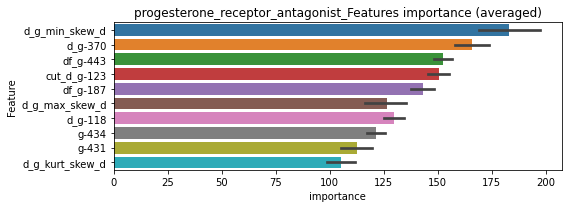

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000248394	valid_1's binary_logloss: 0.000629227


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000249893	valid_1's binary_logloss: 0.000551468


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000250122	valid_1's binary_logloss: 0.000980535


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000250933	valid_1's binary_logloss: 0.000754955


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000255929	valid_1's binary_logloss: 0.00196483


progesterone_receptor_antagonist logloss: 0.0009761422334323143
prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00040665	valid_1's binary_logloss: 0.00709105
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000428374	valid_1's binary_logloss: 0.00666136
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000407804	valid_1's binary_logloss: 0.0136115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000398267	valid_1's binary_logloss: 0.00219671
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000396525	valid_1's binary_logloss: 0.00389222


y_Threshold: 0.0023805, Threshold: 0.0121613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0121613, conf_0:0.00851, conf_1:0.01581
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0421613
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0721613
threshold: 0.0721613, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000438759	valid_1's binary_logloss: 0.00734797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000392653	valid_1's binary_logloss: 0.00563536
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.00038312	valid_1's binary_logloss: 0.0125457
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000372622	valid_1's binary_logloss: 0.00144821
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000385526	valid_1's binary_logloss: 0.00398082


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0148072, Threshold: 0.0721613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0057760 Vs.target_rate: 0.00151
Num_p_label: 23.0, Expected: 6.0, Threshold: 0.0721613, conf_0:0.05773, conf_1:0.08659
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.1021613
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1321613
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_3: 0.1621613
threshold: 0.1621613, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000438759	valid_1's binary_logloss: 0.00734797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000392653	valid_1's binary_logloss: 0.00563536
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.00038312	valid_1's binary_logloss: 0.0125457
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000372622	valid_1's binary_logloss: 0.00144821
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0148072, Threshold: 0.1621613, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000385526	valid_1's binary_logloss: 0.00398082


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.1621613, conf_0:0.14595, conf_1:0.17838
threshold: 0.1621613, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


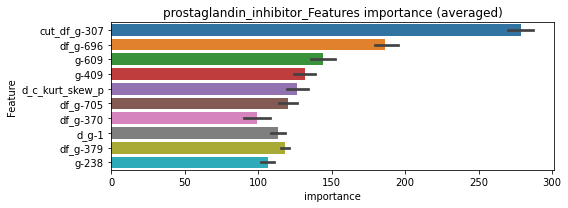

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000520998	valid_1's binary_logloss: 0.00741183
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000387672	valid_1's binary_logloss: 0.00505432


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000748548	valid_1's binary_logloss: 0.0155914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000381633	valid_1's binary_logloss: 0.00163271


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000406886	valid_1's binary_logloss: 0.00209186


prostaglandin_inhibitor logloss: 0.006357306542926416
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00194457	valid_1's binary_logloss: 0.0508209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00088923	valid_1's binary_logloss: 0.0362664
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00188304	valid_1's binary_logloss: 0.0478796
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00067661	valid_1's binary_logloss: 0.0179283
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000886264	valid_1's binary_logloss: 0.0306059


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0089370, Threshold: 0.0383943, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0383943, conf_0:0.02688, conf_1:0.04991
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_1: 0.0683943
Num_p_label: 17.0, Expected: 14.0, Adj_threshold_2: 0.0983943
threshold: 0.0983943, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00221638	valid_1's binary_logloss: 0.0430442
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00117612	valid_1's binary_logloss: 0.0420865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00105043	valid_1's binary_logloss: 0.0405895
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000660605	valid_1's binary_logloss: 0.0199234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000640582	valid_1's binary_logloss: 0.0166191


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0306376, Threshold: 0.0983943, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0125565 Vs.target_rate: 0.00353
Num_p_label: 50.0, Expected: 14.0, Threshold: 0.0983943, conf_0:0.07872, conf_1:0.11807
Num_p_label: 45.0, Expected: 14.0, Adj_threshold_1: 0.1283943
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_2: 0.1583943
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_3: 0.1883943
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_4: 0.2183943
Num_p_label: 35.0, Expected: 14.0, Adj_threshold_5: 0.2483943
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_6: 0.2783943
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_7: 0.3083943
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_8: 0.3383943
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_9: 0.3683943
Num_p_label: 19.0, Expected: 14.0, Adj_threshold_10: 0.3983943
threshold: 0.3983943, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000947256	valid_1's binary_logloss: 0.0313066
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000805199	valid_1's binary_logloss: 0.0254407
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000671763	valid_1's binary_logloss: 0.0339325
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000625442	valid_1's binary_logloss: 0.0130772
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00114335	valid_1's binary_logloss: 0.033877


y_Threshold: 0.0273237, Threshold: 0.3983943, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 638.0/3767
p_label_rate: 0.0070316 Vs.target_rate: 0.00353
Num_p_label: 28.0, Expected: 14.0, Threshold: 0.3983943, conf_0:0.35855, conf_1:0.43823
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_1: 0.4283943
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_2: 0.4583943
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_3: 0.4883943
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_4: 0.5183943
threshold: 0.5183943, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 638.0/3767, y_label_rate: 0.1693655


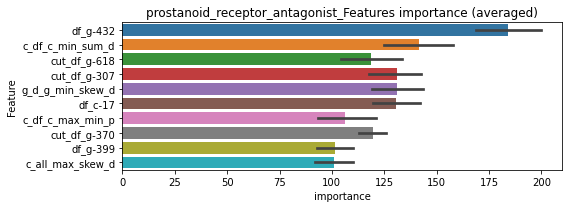

len(train_index) : 3013
len(valid_index) : 754
================================= fold 1/5 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000685471	valid_1's binary_logloss: 0.0234409


len(train_index) : 3013
len(valid_index) : 754
================================= fold 2/5 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3014
len(valid_index) : 753
================================= fold 3/5 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00172093	valid_1's binary_logloss: 0.0221713
Training until validation scores don't improve for 29 rounds


len(train_index) : 3014
len(valid_index) : 753
================================= fold 4/5 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00175155	valid_1's binary_logloss: 0.0356123
Training until validation scores don't improve for 29 rounds


len(train_index) : 3014
len(valid_index) : 753


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000949053	valid_1's binary_logloss: 0.0152202


================================= fold 5/5 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000884868	valid_1's binary_logloss: 0.040341


prostanoid_receptor_antagonist logloss: 0.027354706165237528


mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0600566	valid_1's binary_logloss: 0.239006
Early stopping, best iteration is:
[1371]	training's binary_logloss: 0.0422647	valid_1's binary_logloss: 0.236287
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0612132	valid_1's binary_logloss: 0.229118
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.0548659	valid_1's binary_logloss: 0.227824
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0617815	valid_1's binary_logloss: 0.220462
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.0464799	valid_1's binary_logloss: 0.215982


1 / 3, AUC score:0.896, PR-AUC:0.832
y_Threshold: 0.1073213, Threshold: 0.1983411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1332 → Positive_corect_labels: 1584/10942
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1983411, conf_0:0.13884, conf_1:0.25784
threshold: 0.1983411, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1584.0/10942, y_label_rate: 0.1447633
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0357104	valid_1's binary_logloss: 0.131064
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0188734	valid_1's binary_logloss: 0.119955
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0362471	valid_1's binary_logloss: 0.123133
[2000]	training's binary_logloss: 0.0166252	valid_1's binary_logloss: 0.110275
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.0150842	valid_1's binary_logloss: 0.109059
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0357946	valid_1's binary_logloss: 0.129078
[2000]	training's binary_logloss: 0.0163963	valid_1's binary_logloss: 0.117758
Early stopping, best iteration is:
[1990]	training's binary_logloss: 0.016481	valid_1's binary_logloss: 0.117582


2 / 3, AUC score:0.984, PR-AUC:0.958
y_Threshold: 0.0956900, Threshold: 0.1983411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 332 → Positive_corect_labels: 1418.0/10610
p_label_rate: 0.0072828 Vs.target_rate: 0.03049
Num_p_label: 29.0, Expected: 121.4, Threshold: 0.1983411, conf_0:0.15867, conf_1:0.23801
threshold: 0.1983411, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 1418.0/10610, y_label_rate: 0.1336475
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0291937	valid_1's binary_logloss: 0.0964167
[2000]	training's binary_logloss: 0.0134751	valid_1's binary_logloss: 0.0832337
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.0105587	valid_1's binary_logloss: 0.0806251
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0287501	valid_1's binary_logloss: 0.0968426
[2000]	training's binary_logloss: 0.0131636	valid_1's binary_logloss: 0.0827322
Early stopping, best iteration is:
[2161]	training's binary_logloss: 0.0121059	valid_1's binary_logloss: 0.0816073
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0290364	valid_1's binary_logloss: 0.0959412
[2000]	training's binary_logloss: 0.0133562	valid_1's binary_logloss: 0.0817991
Early stopping, best iteration is:
[2161]	training's binary_logloss: 0.0122537	valid_1's binary_logloss: 0.

3 / 3, AUC score:0.996, PR-AUC:0.986
y_Threshold: 0.0851665, Threshold: 0.1983411, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 1346.0/10466
p_label_rate: 0.0065294 Vs.target_rate: 0.03049
Num_p_label: 26.0, Expected: 121.4, Threshold: 0.1983411, conf_0:0.17851, conf_1:0.21818
threshold: 0.1983411, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 1346.0/10466, y_label_rate: 0.1286069


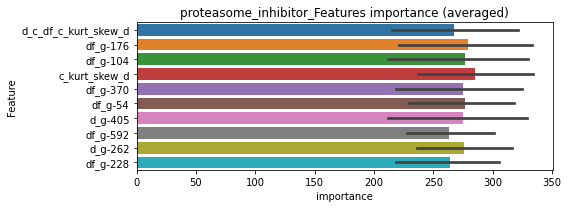

len(train_index) : 6977
len(valid_index) : 3489
================================= fold 1/3 proteasome_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0546604	valid_1's binary_logloss: 0.10774
[2000]	training's binary_logloss: 0.0273841	valid_1's binary_logloss: 0.0845916
[3000]	training's binary_logloss: 0.0179296	valid_1's binary_logloss: 0.0760115
[4000]	training's binary_logloss: 0.0132869	valid_1's binary_logloss: 0.0722581
Early stopping, best iteration is:
[4392]	training's binary_logloss: 0.0120492	valid_1's binary_logloss: 0.0711796


len(train_index) : 6977
len(valid_index) : 3489
================================= fold 2/3 proteasome_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0533227	valid_1's binary_logloss: 0.11116
[2000]	training's binary_logloss: 0.0268458	valid_1's binary_logloss: 0.0889856
[3000]	training's binary_logloss: 0.0175996	valid_1's binary_logloss: 0.0804508
[4000]	training's binary_logloss: 0.0130596	valid_1's binary_logloss: 0.0761371
Early stopping, best iteration is:
[4664]	training's binary_logloss: 0.011127	valid_1's binary_logloss: 0.0742914


len(train_index) : 6978
len(valid_index) : 3488
================================= fold 3/3 proteasome_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0540508	valid_1's binary_logloss: 0.112672
[2000]	training's binary_logloss: 0.027278	valid_1's binary_logloss: 0.089495
[3000]	training's binary_logloss: 0.0178728	valid_1's binary_logloss: 0.0808989
[4000]	training's binary_logloss: 0.0132493	valid_1's binary_logloss: 0.0765962
Early stopping, best iteration is:
[4748]	training's binary_logloss: 0.0110813	valid_1's binary_logloss: 0.0745879


proteasome_inhibitor logloss: 0.07335281680882495
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000471915	valid_1's binary_logloss: 0.0181575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000500754	valid_1's binary_logloss: 0.0112263
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000484174	valid_1's binary_logloss: 0.00198791
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000471456	valid_1's binary_logloss: 0.00330103
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000544527	valid_1's binary_logloss: 0.0181427


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036643, Threshold: 0.0093944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0093944, conf_0:0.00658, conf_1:0.01221
Num_p_label: 4.0, Expected: 8.0, Adj_threshold_1: 0.0393944
threshold: 0.0393944, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000474444	valid_1's binary_logloss: 0.0166271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000469212	valid_1's binary_logloss: 0.00987779
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000467011	valid_1's binary_logloss: 0.00241278
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00046735	valid_1's binary_logloss: 0.00338931
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000540088	valid_1's binary_logloss: 0.0168502


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0168691, Threshold: 0.0393944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0027624 Vs.target_rate: 0.00202
Num_p_label: 11.0, Expected: 8.0, Threshold: 0.0393944, conf_0:0.03152, conf_1:0.04727
threshold: 0.0393944, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000507224	valid_1's binary_logloss: 0.0130457
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000468711	valid_1's binary_logloss: 0.00761805
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000454735	valid_1's binary_logloss: 0.00742659
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000460671	valid_1's binary_logloss: 0.00165951
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000455247	valid_1's binary_logloss: 0.0103619


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0194024, Threshold: 0.0393944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, Expected: 8.0, Threshold: 0.0393944, conf_0:0.03545, conf_1:0.04333
threshold: 0.0393944, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


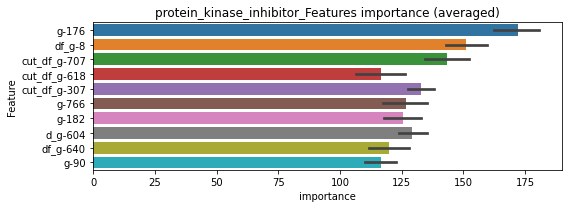

len(train_index) : 3042
len(valid_index) : 761
================================= fold 1/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000565513	valid_1's binary_logloss: 0.0136843


len(train_index) : 3042
len(valid_index) : 761
================================= fold 2/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000466629	valid_1's binary_logloss: 0.00786919


len(train_index) : 3042
len(valid_index) : 761
================================= fold 3/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000517812	valid_1's binary_logloss: 0.00769267


len(train_index) : 3043
len(valid_index) : 760
================================= fold 4/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000465842	valid_1's binary_logloss: 0.0018679
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000466069	valid_1's binary_logloss: 0.00186772


len(train_index) : 3043
len(valid_index) : 760
================================= fold 5/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000595742	valid_1's binary_logloss: 0.0102968


protein_kinase_inhibitor logloss: 0.0082848126363122
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000313531	valid_1's binary_logloss: 0.00444174
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000312627	valid_1's binary_logloss: 0.00126266
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000315822	valid_1's binary_logloss: 0.00328534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000310807	valid_1's binary_logloss: 0.000761949
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016095, Threshold: 0.0051878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0051878, conf_0:0.00363, conf_1:0.00674
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0351878


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000337912	valid_1's binary_logloss: 0.00338767


threshold: 0.0351878, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000306678	valid_1's binary_logloss: 0.0036399
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000308576	valid_1's binary_logloss: 0.00122324
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000303125	valid_1's binary_logloss: 0.00291129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000308102	valid_1's binary_logloss: 0.00064466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000351341	valid_1's binary_logloss: 0.00249583


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0473969, Threshold: 0.0351878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0351878, conf_0:0.02815, conf_1:0.04223
threshold: 0.0351878, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000306678	valid_1's binary_logloss: 0.0036399
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000308576	valid_1's binary_logloss: 0.00122324
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000303125	valid_1's binary_logloss: 0.00291129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000308102	valid_1's binary_logloss: 0.00064466
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0473969, Threshold: 0.0351878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0351878, conf_0:0.03167, conf_1:0.03871


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000351341	valid_1's binary_logloss: 0.00249583


threshold: 0.0351878, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


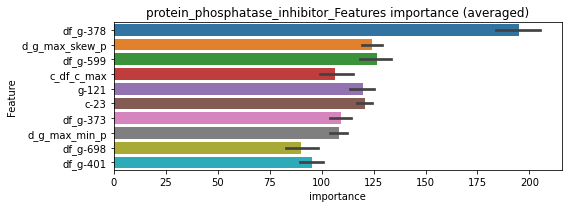

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.00031218	valid_1's binary_logloss: 0.00295885


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000321905	valid_1's binary_logloss: 0.00146558


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000312101	valid_1's binary_logloss: 0.00267637


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000305793	valid_1's binary_logloss: 0.000646342


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000311796	valid_1's binary_logloss: 0.00189501


protein_phosphatase_inhibitor logloss: 0.0019286327398275436
protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0276305	valid_1's binary_logloss: 0.11345
Early stopping, best iteration is:
[1722]	training's binary_logloss: 0.0153962	valid_1's binary_logloss: 0.106464
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0299003	valid_1's binary_logloss: 0.0842897
[2000]	training's binary_logloss: 0.0142963	valid_1's binary_logloss: 0.0697914
[3000]	training's binary_logloss: 0.00927876	valid_1's binary_logloss: 0.0645605
Early stopping, best iteration is:
[3785]	training's binary_logloss: 0.0072911	valid_1's binary_logloss: 0.0624289
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0294787	valid_1's binary_logloss: 0.0922417
[2000]	training's binary_logloss: 0.0140363	valid_1's binary_logloss: 0.0797657
[3000]	training's binary_logloss: 0.00918022	valid_1's binary_logloss: 0.0757051
Early stopping, best iterati

1 / 3, AUC score:0.989, PR-AUC:0.979
y_Threshold: 0.0377274, Threshold: 0.1191035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 176 → Positive_corect_labels: 632/3751
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.1191035, conf_0:0.08337, conf_1:0.15483
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_1: 0.1491035
Num_p_label: 22.0, Expected: 17.2, Adj_threshold_2: 0.1791035
threshold: 0.1791035, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 632.0/3751, y_label_rate: 0.1684884
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0257028	valid_1's binary_logloss: 0.0871451
[2000]	training's binary_logloss: 0.0121626	valid_1's binary_logloss: 0.0750393
Early stopping, best iteration is:
[2748]	training's binary_logloss: 0.00872824	valid_1's binary_logloss: 0.0719644
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0260429	valid_1's binary_logloss: 0.0783891
[2000]	training's binary_logloss: 0.0124707	valid_1's binary_logloss: 0.0661048
Early stopping, best iteration is:
[2803]	training's binary_logloss: 0.00875311	valid_1's binary_logloss: 0.0626824
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0266099	valid_1's binary_logloss: 0.0649199
[2000]	training's binary_logloss: 0.0127192	valid_1's binary_logloss: 0.0501396
[3000]	training's binary_logloss: 0.00834506	valid_1's binary_logloss: 0.0449624
[4000]	training's binary

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0574098, Threshold: 0.1791035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 617.0/3721
p_label_rate: 0.0060271 Vs.target_rate: 0.00433
Num_p_label: 24.0, Expected: 17.2, Threshold: 0.1791035, conf_0:0.14328, conf_1:0.21492
threshold: 0.1791035, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 617.0/3721, y_label_rate: 0.1658156
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0241822	valid_1's binary_logloss: 0.0705697
[2000]	training's binary_logloss: 0.0115538	valid_1's binary_logloss: 0.0571363
[3000]	training's binary_logloss: 0.00763255	valid_1's binary_logloss: 0.0530501
Early stopping, best iteration is:
[3066]	training's binary_logloss: 0.00746077	valid_1's binary_logloss: 0.0528646
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.024398	valid_1's binary_logloss: 0.072913
[2000]	training's binary_logloss: 0.0117132	valid_1's binary_logloss: 0.0598419
[3000]	training's binary_logloss: 0.00768941	valid_1's binary_logloss: 0.0549845
Early stopping, best iteration is:
[3225]	training's binary_logloss: 0.00713256	valid_1's binary_logloss: 0.0543234
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0240541	valid_1's binary_logloss: 0.072742
Early stopping, best itera

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0630885, Threshold: 0.1791035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 606.0/3699
p_label_rate: 0.0070316 Vs.target_rate: 0.00433
Num_p_label: 28.0, Expected: 17.2, Threshold: 0.1791035, conf_0:0.16119, conf_1:0.19701
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_1: 0.2091035
threshold: 0.2091035, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 606.0/3699, y_label_rate: 0.1638281


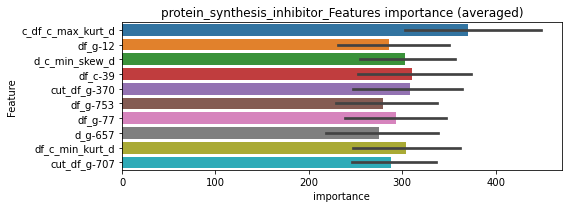

len(train_index) : 2466
len(valid_index) : 1233
================================= fold 1/3 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0491241	valid_1's binary_logloss: 0.0919497
[2000]	training's binary_logloss: 0.0252547	valid_1's binary_logloss: 0.0684026
[3000]	training's binary_logloss: 0.0168462	valid_1's binary_logloss: 0.0592489
[4000]	training's binary_logloss: 0.0126066	valid_1's binary_logloss: 0.0545208
[5000]	training's binary_logloss: 0.0101102	valid_1's binary_logloss: 0.0516208
[6000]	training's binary_logloss: 0.008442	valid_1's binary_logloss: 0.0495181
[7000]	training's binary_logloss: 0.00725744	valid_1's binary_logloss: 0.0480546
[8000]	training's binary_logloss: 0.00637043	valid_1's binary_logloss: 0.0468337
[9000]	training's binary_logloss: 0.00568323	valid_1's binary_logloss: 0.0459093
Early stopping, best iteration is:
[9315]	training's binary_logloss: 0.00549777	valid_1's binary_logloss: 0.0456583


len(train_index) : 2466
len(valid_index) : 1233
================================= fold 2/3 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.05043	valid_1's binary_logloss: 0.0912254
[2000]	training's binary_logloss: 0.02582	valid_1's binary_logloss: 0.0668986
[3000]	training's binary_logloss: 0.0171529	valid_1's binary_logloss: 0.0580081
[4000]	training's binary_logloss: 0.012821	valid_1's binary_logloss: 0.0535643
[5000]	training's binary_logloss: 0.0102614	valid_1's binary_logloss: 0.0508153
[6000]	training's binary_logloss: 0.00855872	valid_1's binary_logloss: 0.0490259
Early stopping, best iteration is:
[6710]	training's binary_logloss: 0.00766028	valid_1's binary_logloss: 0.0481129


len(train_index) : 2466
len(valid_index) : 1233
================================= fold 3/3 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0498195	valid_1's binary_logloss: 0.094214
[2000]	training's binary_logloss: 0.025521	valid_1's binary_logloss: 0.0688196
[3000]	training's binary_logloss: 0.0169819	valid_1's binary_logloss: 0.0592338
[4000]	training's binary_logloss: 0.0127091	valid_1's binary_logloss: 0.0542598
[5000]	training's binary_logloss: 0.0101766	valid_1's binary_logloss: 0.0511289
[6000]	training's binary_logloss: 0.00849573	valid_1's binary_logloss: 0.0489844
[7000]	training's binary_logloss: 0.00729879	valid_1's binary_logloss: 0.0474112
Early stopping, best iteration is:
[7222]	training's binary_logloss: 0.00708092	valid_1's binary_logloss: 0.0470936


protein_synthesis_inhibitor logloss: 0.04695492127981451
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305528	valid_1's binary_logloss: 0.00249553
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000289975	valid_1's binary_logloss: 0.000780835
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000290785	valid_1's binary_logloss: 0.00397804
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000291069	valid_1's binary_logloss: 0.000642036
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014616, Threshold: 0.0045812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0045812, conf_0:0.00321, conf_1:0.00596
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0345812


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000292714	valid_1's binary_logloss: 0.00056642


threshold: 0.0345812, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000348338	valid_1's binary_logloss: 0.00197466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000284578	valid_1's binary_logloss: 0.000514696
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000286231	valid_1's binary_logloss: 0.00487902
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000282374	valid_1's binary_logloss: 0.000551394
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000284771	valid_1's binary_logloss: 0.000496946


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0326171, Threshold: 0.0345812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0345812, conf_0:0.02766, conf_1:0.04150
threshold: 0.0345812, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000348338	valid_1's binary_logloss: 0.00197466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000284578	valid_1's binary_logloss: 0.000514696
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000286231	valid_1's binary_logloss: 0.00487902
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000282374	valid_1's binary_logloss: 0.000551394
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0326171, Threshold: 0.0345812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0345812, conf_0:0.03112, conf_1:0.03804


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000284771	valid_1's binary_logloss: 0.000496946


threshold: 0.0345812, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


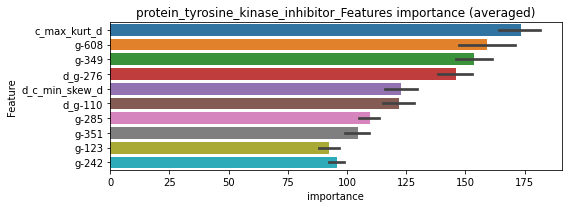

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000299126	valid_1's binary_logloss: 0.00247962


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000283342	valid_1's binary_logloss: 0.000552156


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000280515	valid_1's binary_logloss: 0.00270815


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000281314	valid_1's binary_logloss: 0.000483036
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000279683	valid_1's binary_logloss: 0.000480773


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000281183	valid_1's binary_logloss: 0.000554314
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000281183	valid_1's binary_logloss: 0.000554314


protein_tyrosine_kinase_inhibitor logloss: 0.001355445608442113
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000546561	valid_1's binary_logloss: 0.0176555
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000513979	valid_1's binary_logloss: 0.00873856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000513355	valid_1's binary_logloss: 0.00598051
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00052616	valid_1's binary_logloss: 0.0046575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000518441	valid_1's binary_logloss: 0.012766


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0045014, Threshold: 0.0109408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0109408, conf_0:0.00766, conf_1:0.01422
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0409408
threshold: 0.0409408, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000621133	valid_1's binary_logloss: 0.0146655
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000504848	valid_1's binary_logloss: 0.0091133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000611384	valid_1's binary_logloss: 0.00644662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000523218	valid_1's binary_logloss: 0.00453115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000504957	valid_1's binary_logloss: 0.0125331


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0397406, Threshold: 0.0409408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0409408, conf_0:0.03275, conf_1:0.04913
threshold: 0.0409408, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000621133	valid_1's binary_logloss: 0.0146655
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000504848	valid_1's binary_logloss: 0.0091133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000611384	valid_1's binary_logloss: 0.00644662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000523218	valid_1's binary_logloss: 0.00453115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000504957	valid_1's binary_logloss: 0.0125331


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0397406, Threshold: 0.0409408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0409408, conf_0:0.03685, conf_1:0.04503
threshold: 0.0409408, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


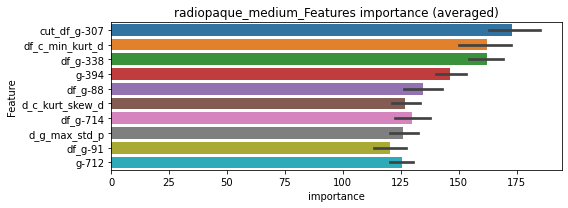

len(train_index) : 3044
len(valid_index) : 762
================================= fold 1/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3045
len(valid_index) : 761


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000705991	valid_1's binary_logloss: 0.0147933


================================= fold 2/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00055673	valid_1's binary_logloss: 0.00734772


len(train_index) : 3045
len(valid_index) : 761
================================= fold 3/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000511608	valid_1's binary_logloss: 0.00580019
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.00051	valid_1's binary_logloss: 0.00579008


len(train_index) : 3045
len(valid_index) : 761
================================= fold 4/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000530596	valid_1's binary_logloss: 0.00425863


len(train_index) : 3045
len(valid_index) : 761
================================= fold 5/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000533252	valid_1's binary_logloss: 0.00939184


radiopaque_medium logloss: 0.008320394847229982
raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0535891	valid_1's binary_logloss: 0.234514
Early stopping, best iteration is:
[1448]	training's binary_logloss: 0.0362546	valid_1's binary_logloss: 0.227734
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0545628	valid_1's binary_logloss: 0.209221
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0319948	valid_1's binary_logloss: 0.198398
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0549909	valid_1's binary_logloss: 0.201961
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0319822	valid_1's binary_logloss: 0.188511


1 / 3, AUC score:0.925, PR-AUC:0.874
y_Threshold: 0.1076416, Threshold: 0.4132305, pos_neg_ratio: 0.8000000
Remove_noisy_data: 357 → Positive_corect_labels: 538/3552
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.4132305, conf_0:0.28926, conf_1:0.53720
threshold: 0.4132305, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 538.0/3552, y_label_rate: 0.1514640
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0398297	valid_1's binary_logloss: 0.147349
Early stopping, best iteration is:
[1648]	training's binary_logloss: 0.0233828	valid_1's binary_logloss: 0.133903
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0407531	valid_1's binary_logloss: 0.129507
[2000]	training's binary_logloss: 0.0195765	valid_1's binary_logloss: 0.109678
[3000]	training's binary_logloss: 0.0128198	valid_1's binary_logloss: 0.103524
Early stopping, best iteration is:
[3456]	training's binary_logloss: 0.0110633	valid_1's binary_logloss: 0.101799
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0399024	valid_1's binary_logloss: 0.155353
Early stopping, best iteration is:
[1885]	training's binary_logloss: 0.0203234	valid_1's binary_logloss: 0.136541


2 / 3, AUC score:0.984, PR-AUC:0.961
y_Threshold: 0.1112607, Threshold: 0.4132305, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 484.0/3444
p_label_rate: 0.0266198 Vs.target_rate: 0.00936
Num_p_label: 106.0, Expected: 37.3, Threshold: 0.4132305, conf_0:0.33058, conf_1:0.49588
Num_p_label: 103.0, Expected: 37.3, Adj_threshold_1: 0.4432305
Num_p_label: 97.0, Expected: 37.3, Adj_threshold_2: 0.4732305
Num_p_label: 95.0, Expected: 37.3, Adj_threshold_3: 0.5032305
Num_p_label: 89.0, Expected: 37.3, Adj_threshold_4: 0.5332305
Num_p_label: 84.0, Expected: 37.3, Adj_threshold_5: 0.5632305
Num_p_label: 82.0, Expected: 37.3, Adj_threshold_6: 0.5932305
Num_p_label: 74.0, Expected: 37.3, Adj_threshold_7: 0.6232305
Num_p_label: 67.0, Expected: 37.3, Adj_threshold_8: 0.6532305
Num_p_label: 57.0, Expected: 37.3, Adj_threshold_9: 0.6832305
Num_p_label: 50.0, Expected: 37.3, Adj_threshold_10: 0.7132305
threshold: 0.7132305, positive_p_label: 50.0/3982, p_label_rate: 0.012556

Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0339516	valid_1's binary_logloss: 0.13281
Early stopping, best iteration is:
[1752]	training's binary_logloss: 0.0186775	valid_1's binary_logloss: 0.118431
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0354582	valid_1's binary_logloss: 0.121046
[2000]	training's binary_logloss: 0.0170412	valid_1's binary_logloss: 0.10144
Early stopping, best iteration is:
[2465]	training's binary_logloss: 0.0136529	valid_1's binary_logloss: 0.0971087
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0346527	valid_1's binary_logloss: 0.128719
[2000]	training's binary_logloss: 0.0165027	valid_1's binary_logloss: 0.109265
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.0144675	valid_1's binary_logloss: 0.107049


3 / 3, AUC score:0.988, PR-AUC:0.973
y_Threshold: 0.1054340, Threshold: 0.7132305, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 455.0/3386
p_label_rate: 0.0241085 Vs.target_rate: 0.00936
Num_p_label: 96.0, Expected: 37.3, Threshold: 0.7132305, conf_0:0.64191, conf_1:0.78455
Num_p_label: 91.0, Expected: 37.3, Adj_threshold_1: 0.7432305
Num_p_label: 83.0, Expected: 37.3, Adj_threshold_2: 0.7732305
Num_p_label: 74.0, Expected: 37.3, Adj_threshold_3: 0.8032305
Num_p_label: 62.0, Expected: 37.3, Adj_threshold_4: 0.8332305
Num_p_label: 43.0, Expected: 37.3, Adj_threshold_5: 0.8632305
threshold: 0.8632305, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 455.0/3386, y_label_rate: 0.1343768


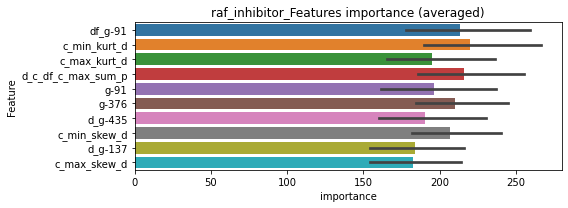

len(train_index) : 2257
len(valid_index) : 1129
================================= fold 1/3 raf_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0675921	valid_1's binary_logloss: 0.167287
[2000]	training's binary_logloss: 0.0343183	valid_1's binary_logloss: 0.138417
[3000]	training's binary_logloss: 0.0227708	valid_1's binary_logloss: 0.127961
Early stopping, best iteration is:
[3330]	training's binary_logloss: 0.0204247	valid_1's binary_logloss: 0.125295


len(train_index) : 2257
len(valid_index) : 1129
================================= fold 2/3 raf_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0709012	valid_1's binary_logloss: 0.142041
[2000]	training's binary_logloss: 0.036128	valid_1's binary_logloss: 0.108839
[3000]	training's binary_logloss: 0.0239367	valid_1's binary_logloss: 0.0963365
[4000]	training's binary_logloss: 0.0178214	valid_1's binary_logloss: 0.0891052
[5000]	training's binary_logloss: 0.0141744	valid_1's binary_logloss: 0.0844924
[6000]	training's binary_logloss: 0.0118135	valid_1's binary_logloss: 0.0816704
Early stopping, best iteration is:
[6884]	training's binary_logloss: 0.0102972	valid_1's binary_logloss: 0.0797775


len(train_index) : 2258
len(valid_index) : 1128
================================= fold 3/3 raf_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0704207	valid_1's binary_logloss: 0.142332
[2000]	training's binary_logloss: 0.0361768	valid_1's binary_logloss: 0.107731
[3000]	training's binary_logloss: 0.0239418	valid_1's binary_logloss: 0.0944824
[4000]	training's binary_logloss: 0.0178325	valid_1's binary_logloss: 0.0875831
[5000]	training's binary_logloss: 0.0142248	valid_1's binary_logloss: 0.0836483
[6000]	training's binary_logloss: 0.0118304	valid_1's binary_logloss: 0.0808242
[7000]	training's binary_logloss: 0.0101531	valid_1's binary_logloss: 0.0790005
Early stopping, best iteration is:
[7421]	training's binary_logloss: 0.00958033	valid_1's binary_logloss: 0.0783163


raf_inhibitor logloss: 0.09446774330507965
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000227165	valid_1's binary_logloss: 0.00184662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000227255	valid_1's binary_logloss: 0.00043856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000241843	valid_1's binary_logloss: 0.00166404
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000223199	valid_1's binary_logloss: 0.000922679
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009340, Threshold: 0.0095548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0095548, conf_0:0.00669, conf_1:0.01242
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_1: 0.0395548
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.0695548
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.0995548
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.1295548
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.1595548
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.1895548


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000227282	valid_1's binary_logloss: 0.00189984


Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.2195548
threshold: 0.2195548, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000210738	valid_1's binary_logloss: 0.00118692
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000209374	valid_1's binary_logloss: 0.000277286
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00022475	valid_1's binary_logloss: 0.000869916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000211705	valid_1's binary_logloss: 0.000899112
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0406101, Threshold: 0.2195548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00050
Num_p_label: 19.0, Expected: 2.0, Threshold: 0.2195548, conf_0:0.17564, conf_1:0.26347
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2495548
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_2: 0.2795548
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.3095548
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_4: 0.3395548
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.3695548
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_6: 0.3995548
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_7: 0.4295548


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000209716	valid_1's binary_logloss: 0.00276173


Num_p_label: 14.0, Expected: 2.0, Adj_threshold_8: 0.4595548
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_9: 0.4895548
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_10: 0.5195548
threshold: 0.5195548, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000210738	valid_1's binary_logloss: 0.00118692
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000209374	valid_1's binary_logloss: 0.000277286
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00022475	valid_1's binary_logloss: 0.000869916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000211705	valid_1's binary_logloss: 0.000899112
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0406101, Threshold: 0.5195548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00050
Num_p_label: 11.0, Expected: 2.0, Threshold: 0.5195548, conf_0:0.46760, conf_1:0.57151
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.5495548
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.5795548
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.6095548
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.6395548
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.6695548
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.6995548
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.7295548
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.7595548


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000209716	valid_1's binary_logloss: 0.00276173


threshold: 0.7595548, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


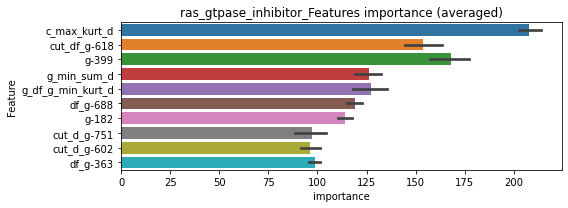

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000206402	valid_1's binary_logloss: 0.000722057
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000210884	valid_1's binary_logloss: 0.000275708
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000207778	valid_1's binary_logloss: 0.000643912
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000213856	valid_1's binary_logloss: 0.000442702
Training until validation scores don't improve for 29 rounds


ras_gtpase_inhibitor logloss: 0.0006111662191980233


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00021404	valid_1's binary_logloss: 0.000971654


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000555623	valid_1's binary_logloss: 0.0138876
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000543637	valid_1's binary_logloss: 0.0161422
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000554723	valid_1's binary_logloss: 0.0122687
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00110195	valid_1's binary_logloss: 0.0276859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000622526	valid_1's binary_logloss: 0.0218982


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0070470, Threshold: 0.1027319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1027319, conf_0:0.07191, conf_1:0.13355
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_1: 0.1327319
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1627319
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_3: 0.1927319
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_4: 0.2227319
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_5: 0.2527319
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_6: 0.2827319
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_7: 0.3127319
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_8: 0.3427319
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_9: 0.3727319
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_10: 0.4027319
threshold: 0.4027319, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000566897	valid_1's binary_logloss: 0.0117812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000521554	valid_1's binary_logloss: 0.016076
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000531481	valid_1's binary_logloss: 0.0135181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000717887	valid_1's binary_logloss: 0.0216128
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000524751	valid_1's binary_logloss: 0.00610467


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0357632, Threshold: 0.4027319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3788
p_label_rate: 0.0072828 Vs.target_rate: 0.00281
Num_p_label: 29.0, Expected: 11.2, Threshold: 0.4027319, conf_0:0.32219, conf_1:0.48328
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_1: 0.4327319
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_2: 0.4627319
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_3: 0.4927319
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_4: 0.5227319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_5: 0.5527319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_6: 0.5827319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_7: 0.6127319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_8: 0.6427319
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6727319
threshold: 0.6727319, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
===========

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00061379	valid_1's binary_logloss: 0.0162725
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000586359	valid_1's binary_logloss: 0.0194813
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000534371	valid_1's binary_logloss: 0.0139135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000580495	valid_1's binary_logloss: 0.01661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000533626	valid_1's binary_logloss: 0.00535698


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0385224, Threshold: 0.6727319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3784
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6727319, conf_0:0.60546, conf_1:0.74001
threshold: 0.6727319, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3784, y_label_rate: 0.1709831


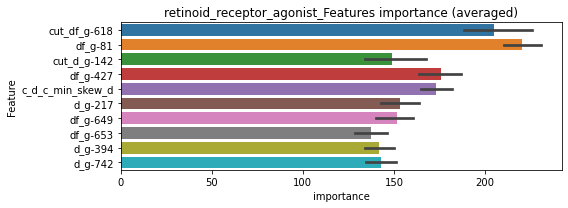

len(train_index) : 3027
len(valid_index) : 757
================================= fold 1/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000724192	valid_1's binary_logloss: 0.0231361


len(train_index) : 3027
len(valid_index) : 757
================================= fold 2/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000551672	valid_1's binary_logloss: 0.0119744


len(train_index) : 3027
len(valid_index) : 757
================================= fold 3/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000740158	valid_1's binary_logloss: 0.0106146


len(train_index) : 3027
len(valid_index) : 757
================================= fold 4/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000688602	valid_1's binary_logloss: 0.0148873


len(train_index) : 3028
len(valid_index) : 756
================================= fold 5/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000696599	valid_1's binary_logloss: 0.0105826


retinoid_receptor_agonist logloss: 0.014240482683678599
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000148282	valid_1's binary_logloss: 0.000938453
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000147071	valid_1's binary_logloss: 0.000193401
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00014671	valid_1's binary_logloss: 0.000310843
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000146568	valid_1's binary_logloss: 0.000176383
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004020, Threshold: 0.0016466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0016466, conf_0:0.00115, conf_1:0.00214
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0316466
threshold: 0.0316466, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000148706	valid_1's binary_logloss: 0.000177772


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000137037	valid_1's binary_logloss: 0.000181261
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000136811	valid_1's binary_logloss: 0.000143702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00014237	valid_1's binary_logloss: 0.00472897
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000136239	valid_1's binary_logloss: 0.00016901
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0159959, Threshold: 0.0316466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00025
Num_p_label: 12.0, Expected: 1.0, Threshold: 0.0316466, conf_0:0.02532, conf_1:0.03798
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0616466
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0916466
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1216466
threshold: 0.1216466, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00013699	valid_1's binary_logloss: 0.00014194


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000137037	valid_1's binary_logloss: 0.000181261
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000136811	valid_1's binary_logloss: 0.000143702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00014237	valid_1's binary_logloss: 0.00472897
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000136239	valid_1's binary_logloss: 0.00016901
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0159959, Threshold: 0.1216466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1216466, conf_0:0.10948, conf_1:0.13381
threshold: 0.1216466, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00013699	valid_1's binary_logloss: 0.00014194


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


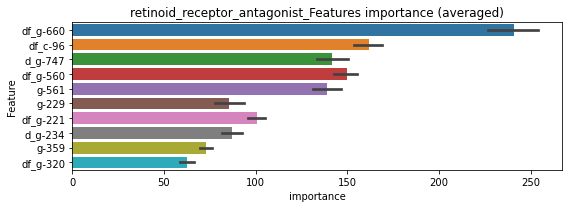

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140413	valid_1's binary_logloss: 0.000186651


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.000137636	valid_1's binary_logloss: 0.000183434
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140689	valid_1's binary_logloss: 0.000146957
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.000140019	valid_1's binary_logloss: 0.000146246


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 retinoid_receptor_antagonist=================================


[1000]	training's binary_logloss: 0.000139894	valid_1's binary_logloss: 0.00232768
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000140137	valid_1's binary_logloss: 0.00232631
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000141343	valid_1's binary_logloss: 0.00017172
Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.000138532	valid_1's binary_logloss: 0.000168403


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140518	valid_1's binary_logloss: 0.000151973


retinoid_receptor_antagonist logloss: 0.0005951858740828022


Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000138317	valid_1's binary_logloss: 0.000149641


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00038246	valid_1's binary_logloss: 0.00573451
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000371028	valid_1's binary_logloss: 0.00565823
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000369313	valid_1's binary_logloss: 0.000975041
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000379626	valid_1's binary_logloss: 0.00166396
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000370587	valid_1's binary_logloss: 0.00869037


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027160, Threshold: 0.0082456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0082456, conf_0:0.00577, conf_1:0.01072
Num_p_label: 7.0, Expected: 5.9, Adj_threshold_1: 0.0382456
threshold: 0.0382456, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000381169	valid_1's binary_logloss: 0.00501193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000351948	valid_1's binary_logloss: 0.00441378
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000367346	valid_1's binary_logloss: 0.00098489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00036098	valid_1's binary_logloss: 0.00107207
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000355937	valid_1's binary_logloss: 0.00861244


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0275590, Threshold: 0.0382456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00147
Num_p_label: 16.0, Expected: 5.9, Threshold: 0.0382456, conf_0:0.03060, conf_1:0.04589
Num_p_label: 9.0, Expected: 5.9, Adj_threshold_1: 0.0682456
threshold: 0.0682456, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000381169	valid_1's binary_logloss: 0.00501193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000351948	valid_1's binary_logloss: 0.00441378
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000367346	valid_1's binary_logloss: 0.00098489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00036098	valid_1's binary_logloss: 0.00107207
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000355937	valid_1's binary_logloss: 0.00861244


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0275590, Threshold: 0.0682456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00147
Num_p_label: 9.0, Expected: 5.9, Threshold: 0.0682456, conf_0:0.06142, conf_1:0.07507
threshold: 0.0682456, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


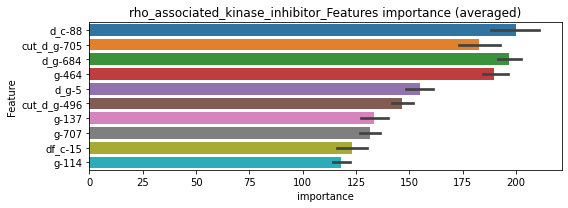

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000372699	valid_1's binary_logloss: 0.00347249


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000364982	valid_1's binary_logloss: 0.00473075


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000372592	valid_1's binary_logloss: 0.000979476
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000368948	valid_1's binary_logloss: 0.00097335


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000363907	valid_1's binary_logloss: 0.00118431
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000359991	valid_1's binary_logloss: 0.00117577


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000366018	valid_1's binary_logloss: 0.00761172


rho_associated_kinase_inhibitor logloss: 0.003592437396546637
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000407654	valid_1's binary_logloss: 0.00596126
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000408551	valid_1's binary_logloss: 0.00285097
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000411792	valid_1's binary_logloss: 0.0125916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00039783	valid_1's binary_logloss: 0.00463106
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000411266	valid_1's binary_logloss: 0.00466858


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037851, Threshold: 0.0171780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0171780, conf_0:0.01202, conf_1:0.02233
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.0471780
threshold: 0.0471780, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000385097	valid_1's binary_logloss: 0.00533514
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000396129	valid_1's binary_logloss: 0.0035181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000400964	valid_1's binary_logloss: 0.0125993
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000390147	valid_1's binary_logloss: 0.00354809
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000406947	valid_1's binary_logloss: 0.00597021


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0419038, Threshold: 0.0471780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0118031 Vs.target_rate: 0.00155
Num_p_label: 47.0, Expected: 6.2, Threshold: 0.0471780, conf_0:0.03774, conf_1:0.05661
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_1: 0.0771780
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1071780
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_3: 0.1371780
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_4: 0.1671780
threshold: 0.1671780, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.0003794	valid_1's binary_logloss: 0.0057023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000380326	valid_1's binary_logloss: 0.00683865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000388999	valid_1's binary_logloss: 0.000866049
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000384171	valid_1's binary_logloss: 0.00155587
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000412723	valid_1's binary_logloss: 0.00759057


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0490477, Threshold: 0.1671780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, Expected: 6.2, Threshold: 0.1671780, conf_0:0.15046, conf_1:0.18390
threshold: 0.1671780, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


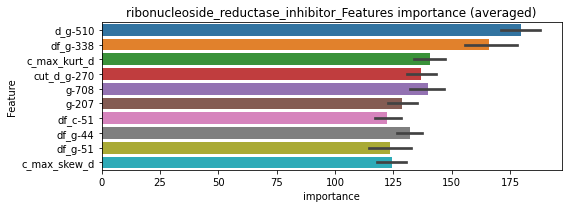

len(train_index) : 3047
len(valid_index) : 762
================================= fold 1/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000387679	valid_1's binary_logloss: 0.00500082


len(train_index) : 3047
len(valid_index) : 762
================================= fold 2/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000380467	valid_1's binary_logloss: 0.00446458


len(train_index) : 3047
len(valid_index) : 762
================================= fold 3/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00038795	valid_1's binary_logloss: 0.000903193
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.00038795	valid_1's binary_logloss: 0.000903193


len(train_index) : 3047
len(valid_index) : 762
================================= fold 4/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000390534	valid_1's binary_logloss: 0.00153032


len(train_index) : 3048
len(valid_index) : 761
================================= fold 5/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000422852	valid_1's binary_logloss: 0.00621068


ribonucleoside_reductase_inhibitor logloss: 0.0036222593963575024
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000335918	valid_1's binary_logloss: 0.00160528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000329277	valid_1's binary_logloss: 0.00333665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000320633	valid_1's binary_logloss: 0.00242066
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00034628	valid_1's binary_logloss: 0.00079765
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019505, Threshold: 0.0055758, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000338777	valid_1's binary_logloss: 0.000999844


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0055758, conf_0:0.00390, conf_1:0.00725
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0355758
threshold: 0.0355758, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000327746	valid_1's binary_logloss: 0.00141385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000318841	valid_1's binary_logloss: 0.00226637
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00031438	valid_1's binary_logloss: 0.00156214
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000322533	valid_1's binary_logloss: 0.000710851
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000317911	valid_1's binary_logloss: 0.000905745


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1197702, Threshold: 0.0355758, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, Expected: 4.2, Threshold: 0.0355758, conf_0:0.02846, conf_1:0.04269
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0655758
threshold: 0.0655758, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000327746	valid_1's binary_logloss: 0.00141385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000318841	valid_1's binary_logloss: 0.00226637
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00031438	valid_1's binary_logloss: 0.00156214
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000322533	valid_1's binary_logloss: 0.000710851
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1197702, Threshold: 0.0655758, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0655758, conf_0:0.05902, conf_1:0.07213


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000317911	valid_1's binary_logloss: 0.000905745


threshold: 0.0655758, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


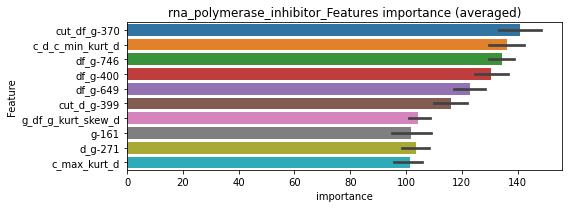

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00032315	valid_1's binary_logloss: 0.00116674


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000328093	valid_1's binary_logloss: 0.00396172


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000315015	valid_1's binary_logloss: 0.00121593


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00032512	valid_1's binary_logloss: 0.000670577


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000327815	valid_1's binary_logloss: 0.00121251


rna_polymerase_inhibitor logloss: 0.0016455799306892029


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 6230
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 6230


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0331906	valid_1's binary_logloss: 0.131973
Early stopping, best iteration is:
[1346]	training's binary_logloss: 0.0242282	valid_1's binary_logloss: 0.129158
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0344214	valid_1's binary_logloss: 0.119354
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.0227797	valid_1's binary_logloss: 0.114987
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0331497	valid_1's binary_logloss: 0.126676
Early stopping, best iteration is:
[1111]	training's binary_logloss: 0.0295644	valid_1's binary_logloss: 0.125516


1 / 3, AUC score:0.968, PR-AUC:0.941
y_Threshold: 0.0658080, Threshold: 0.1204017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 484 → Positive_corect_labels: 1129/6992
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.1204017, conf_0:0.08428, conf_1:0.15652
threshold: 0.1204017, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1129.0/6992, y_label_rate: 0.1614703
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0221578	valid_1's binary_logloss: 0.0781372
Early stopping, best iteration is:
[1556]	training's binary_logloss: 0.0136782	valid_1's binary_logloss: 0.0721681
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0231519	valid_1's binary_logloss: 0.0671924
[2000]	training's binary_logloss: 0.0109197	valid_1's binary_logloss: 0.0580819
Early stopping, best iteration is:
[2359]	training's binary_logloss: 0.00914809	valid_1's binary_logloss: 0.0566443
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0226715	valid_1's binary_logloss: 0.0729463
[2000]	training's binary_logloss: 0.0106276	valid_1's binary_logloss: 0.064237
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0101354	valid_1's binary_logloss: 0.0639379


2 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0730042, Threshold: 0.1204017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1084.0/6902
p_label_rate: 0.0130588 Vs.target_rate: 0.00991
Num_p_label: 52.0, Expected: 39.5, Threshold: 0.1204017, conf_0:0.09632, conf_1:0.14448
threshold: 0.1204017, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1084.0/6902, y_label_rate: 0.1570559
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0184316	valid_1's binary_logloss: 0.0581104
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.0101292	valid_1's binary_logloss: 0.0503578
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0196648	valid_1's binary_logloss: 0.0456444
[2000]	training's binary_logloss: 0.00925837	valid_1's binary_logloss: 0.0357675
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.00717382	valid_1's binary_logloss: 0.0335261
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0192264	valid_1's binary_logloss: 0.0563931
[2000]	training's binary_logloss: 0.00906241	valid_1's binary_logloss: 0.0463681
[3000]	training's binary_logloss: 0.00592508	valid_1's binary_logloss: 0.0434141
Early stopping, best iteration is:
[3576]	training's binary_logloss: 0.00495227	valid_1's binary_loglos

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0746306, Threshold: 0.1204017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 1065.0/6864
p_label_rate: 0.0140633 Vs.target_rate: 0.00991
Num_p_label: 56.0, Expected: 39.5, Threshold: 0.1204017, conf_0:0.10836, conf_1:0.13244
threshold: 0.1204017, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 1065.0/6864, y_label_rate: 0.1551573


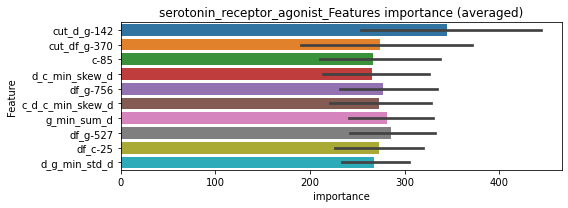

len(train_index) : 4576
len(valid_index) : 2288
================================= fold 1/3 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.037491	valid_1's binary_logloss: 0.0647909
[2000]	training's binary_logloss: 0.0191415	valid_1's binary_logloss: 0.0481179
[3000]	training's binary_logloss: 0.012771	valid_1's binary_logloss: 0.0420851
[4000]	training's binary_logloss: 0.00956114	valid_1's binary_logloss: 0.039014
[5000]	training's binary_logloss: 0.00762087	valid_1's binary_logloss: 0.037063
[6000]	training's binary_logloss: 0.00634892	valid_1's binary_logloss: 0.0358234
Early stopping, best iteration is:
[6697]	training's binary_logloss: 0.005697	valid_1's binary_logloss: 0.0351068


len(train_index) : 4576
len(valid_index) : 2288
================================= fold 2/3 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0368758	valid_1's binary_logloss: 0.0622462
[2000]	training's binary_logloss: 0.0189041	valid_1's binary_logloss: 0.0461919
[3000]	training's binary_logloss: 0.0126358	valid_1's binary_logloss: 0.0403922
[4000]	training's binary_logloss: 0.00946413	valid_1's binary_logloss: 0.0372307
[5000]	training's binary_logloss: 0.00755266	valid_1's binary_logloss: 0.0352802
[6000]	training's binary_logloss: 0.00628734	valid_1's binary_logloss: 0.0339261
[7000]	training's binary_logloss: 0.00539746	valid_1's binary_logloss: 0.0329815
Early stopping, best iteration is:
[6971]	training's binary_logloss: 0.00541857	valid_1's binary_logloss: 0.0329707


len(train_index) : 4576
len(valid_index) : 2288
================================= fold 3/3 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0363697	valid_1's binary_logloss: 0.0668178
[2000]	training's binary_logloss: 0.0187244	valid_1's binary_logloss: 0.049951
[3000]	training's binary_logloss: 0.0124964	valid_1's binary_logloss: 0.0438965
[4000]	training's binary_logloss: 0.00933965	valid_1's binary_logloss: 0.0407223
[5000]	training's binary_logloss: 0.0074581	valid_1's binary_logloss: 0.0387934
[6000]	training's binary_logloss: 0.00620401	valid_1's binary_logloss: 0.0374693
Early stopping, best iteration is:
[6471]	training's binary_logloss: 0.00575404	valid_1's binary_logloss: 0.0369267


serotonin_receptor_agonist logloss: 0.035001379308585656
serotonin_receptor_agonist is unpredictable(><)!


mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 7510
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 7510


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0480602	valid_1's binary_logloss: 0.172875
Early stopping, best iteration is:
[1702]	training's binary_logloss: 0.0271007	valid_1's binary_logloss: 0.164564
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0494446	valid_1's binary_logloss: 0.181714
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.0363688	valid_1's binary_logloss: 0.175356
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0492422	valid_1's binary_logloss: 0.174282
Early stopping, best iteration is:
[1580]	training's binary_logloss: 0.0303683	valid_1's binary_logloss: 0.165605


1 / 3, AUC score:0.950, PR-AUC:0.906
y_Threshold: 0.0961717, Threshold: 0.1958301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 683 → Positive_corect_labels: 1311/8329
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.1958301, conf_0:0.13708, conf_1:0.25458
threshold: 0.1958301, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1311.0/8329, y_label_rate: 0.1574018
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0345669	valid_1's binary_logloss: 0.111126
[2000]	training's binary_logloss: 0.0159667	valid_1's binary_logloss: 0.0938269
Early stopping, best iteration is:
[2355]	training's binary_logloss: 0.0133362	valid_1's binary_logloss: 0.0911126
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0337053	valid_1's binary_logloss: 0.120693
[2000]	training's binary_logloss: 0.0155537	valid_1's binary_logloss: 0.104905
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0147074	valid_1's binary_logloss: 0.104112
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0342709	valid_1's binary_logloss: 0.112377
[2000]	training's binary_logloss: 0.0158984	valid_1's binary_logloss: 0.0977381
Early stopping, best iteration is:
[2385]	training's binary_logloss: 0.0130896	valid_1's binary_logloss: 0.09552

2 / 3, AUC score:0.991, PR-AUC:0.977
y_Threshold: 0.1101819, Threshold: 0.1958301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 1220.0/8147
p_label_rate: 0.0123054 Vs.target_rate: 0.01696
Num_p_label: 49.0, Expected: 67.6, Threshold: 0.1958301, conf_0:0.15666, conf_1:0.23500
threshold: 0.1958301, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1220.0/8147, y_label_rate: 0.1497484
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0302624	valid_1's binary_logloss: 0.0895264
[2000]	training's binary_logloss: 0.0141427	valid_1's binary_logloss: 0.0720296
Early stopping, best iteration is:
[2741]	training's binary_logloss: 0.0100318	valid_1's binary_logloss: 0.0670795
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0296481	valid_1's binary_logloss: 0.0974573
[2000]	training's binary_logloss: 0.0137022	valid_1's binary_logloss: 0.0816639
Early stopping, best iteration is:
[2800]	training's binary_logloss: 0.00949181	valid_1's binary_logloss: 0.0772053
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0302043	valid_1's binary_logloss: 0.0951946
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.0147737	valid_1's binary_logloss: 0.0793313


3 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.1064685, Threshold: 0.1958301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1168.0/8043
p_label_rate: 0.0138122 Vs.target_rate: 0.01696
Num_p_label: 55.0, Expected: 67.6, Threshold: 0.1958301, conf_0:0.17625, conf_1:0.21541
threshold: 0.1958301, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1168.0/8043, y_label_rate: 0.1452194


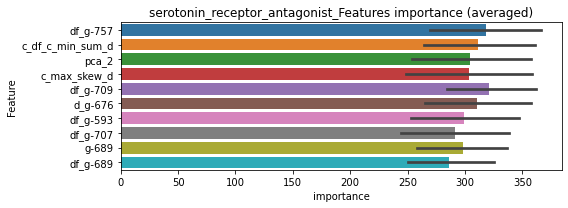

len(train_index) : 5362
len(valid_index) : 2681
================================= fold 1/3 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0567194	valid_1's binary_logloss: 0.106874
[2000]	training's binary_logloss: 0.0287175	valid_1's binary_logloss: 0.0803076
[3000]	training's binary_logloss: 0.0189632	valid_1's binary_logloss: 0.0703365
[4000]	training's binary_logloss: 0.0141107	valid_1's binary_logloss: 0.0649735
[5000]	training's binary_logloss: 0.0112165	valid_1's binary_logloss: 0.0619558
Early stopping, best iteration is:
[5180]	training's binary_logloss: 0.0108253	valid_1's binary_logloss: 0.0615635


len(train_index) : 5362
len(valid_index) : 2681
================================= fold 2/3 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0561474	valid_1's binary_logloss: 0.112358
[2000]	training's binary_logloss: 0.0285077	valid_1's binary_logloss: 0.0871834
[3000]	training's binary_logloss: 0.0188428	valid_1's binary_logloss: 0.0775531
[4000]	training's binary_logloss: 0.0140353	valid_1's binary_logloss: 0.0725783
[5000]	training's binary_logloss: 0.0111682	valid_1's binary_logloss: 0.0696464
Early stopping, best iteration is:
[5360]	training's binary_logloss: 0.0103958	valid_1's binary_logloss: 0.068604


len(train_index) : 5362
len(valid_index) : 2681
================================= fold 3/3 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0557017	valid_1's binary_logloss: 0.1098
[2000]	training's binary_logloss: 0.0282594	valid_1's binary_logloss: 0.0837664
[3000]	training's binary_logloss: 0.0186742	valid_1's binary_logloss: 0.0738992
[4000]	training's binary_logloss: 0.0138964	valid_1's binary_logloss: 0.0685151
Early stopping, best iteration is:
[4448]	training's binary_logloss: 0.0124831	valid_1's binary_logloss: 0.0670547


serotonin_receptor_antagonist logloss: 0.06574070014099936
serotonin_receptor_antagonist is unpredictable(><)!
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000519768	valid_1's binary_logloss: 0.0145013
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000503981	valid_1's binary_logloss: 0.00890266
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000470498	valid_1's binary_logloss: 0.0145949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000450244	valid_1's binary_logloss: 0.00552272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00046266	valid_1's binary_logloss: 0.0156394


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028025, Threshold: 0.0329394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0329394, conf_0:0.02306, conf_1:0.04282
Num_p_label: 17.0, Expected: 7.4, Adj_threshold_1: 0.0629394
threshold: 0.0629394, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000457378	valid_1's binary_logloss: 0.0125202
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000452194	valid_1's binary_logloss: 0.0101796
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000503561	valid_1's binary_logloss: 0.0172419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000463975	valid_1's binary_logloss: 0.00638475
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000437511	valid_1's binary_logloss: 0.0138983


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0315014, Threshold: 0.0629394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0271220 Vs.target_rate: 0.00185
Num_p_label: 108.0, Expected: 7.4, Threshold: 0.0629394, conf_0:0.05035, conf_1:0.07553
Num_p_label: 81.0, Expected: 7.4, Adj_threshold_1: 0.0929394
Num_p_label: 71.0, Expected: 7.4, Adj_threshold_2: 0.1229394
Num_p_label: 64.0, Expected: 7.4, Adj_threshold_3: 0.1529394
Num_p_label: 55.0, Expected: 7.4, Adj_threshold_4: 0.1829394
Num_p_label: 50.0, Expected: 7.4, Adj_threshold_5: 0.2129394
Num_p_label: 46.0, Expected: 7.4, Adj_threshold_6: 0.2429394
Num_p_label: 41.0, Expected: 7.4, Adj_threshold_7: 0.2729394
Num_p_label: 37.0, Expected: 7.4, Adj_threshold_8: 0.3029394
Num_p_label: 36.0, Expected: 7.4, Adj_threshold_9: 0.3329394
Num_p_label: 31.0, Expected: 7.4, Adj_threshold_10: 0.3629394
threshold: 0.3629394, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_l

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000435342	valid_1's binary_logloss: 0.016152
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000444556	valid_1's binary_logloss: 0.0055489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000444057	valid_1's binary_logloss: 0.0141385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000445015	valid_1's binary_logloss: 0.00609498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000434369	valid_1's binary_logloss: 0.00866515


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0437664, Threshold: 0.3629394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0087896 Vs.target_rate: 0.00185
Num_p_label: 35.0, Expected: 7.4, Threshold: 0.3629394, conf_0:0.32665, conf_1:0.39923
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_1: 0.3929394
Num_p_label: 31.0, Expected: 7.4, Adj_threshold_2: 0.4229394
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_3: 0.4529394
Num_p_label: 25.0, Expected: 7.4, Adj_threshold_4: 0.4829394
Num_p_label: 19.0, Expected: 7.4, Adj_threshold_5: 0.5129394
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_6: 0.5429394
threshold: 0.5429394, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


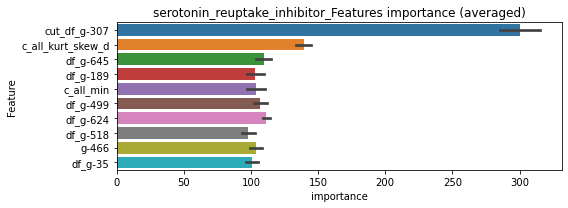

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000458321	valid_1's binary_logloss: 0.0106994


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000474014	valid_1's binary_logloss: 0.00868738


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000479668	valid_1's binary_logloss: 0.00848461


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00468986


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000454729	valid_1's binary_logloss: 0.00504692


serotonin_reuptake_inhibitor logloss: 0.007522776344006372
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000402225	valid_1's binary_logloss: 0.0073808
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000405646	valid_1's binary_logloss: 0.00798026
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000379424	valid_1's binary_logloss: 0.0143842
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000380892	valid_1's binary_logloss: 0.00260143
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000395487	valid_1's binary_logloss: 0.00391572


y_Threshold: 0.0021789, Threshold: 0.0290844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0290844, conf_0:0.02036, conf_1:0.03781
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0590844
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0890844
threshold: 0.0890844, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000372695	valid_1's binary_logloss: 0.00699421
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000371726	valid_1's binary_logloss: 0.00655522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000361918	valid_1's binary_logloss: 0.0145785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000383128	valid_1's binary_logloss: 0.00191491
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224255, Threshold: 0.0890844, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000372432	valid_1's binary_logloss: 0.00255626


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.0890844, conf_0:0.07127, conf_1:0.10690
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_1: 0.1190844
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_2: 0.1490844
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_3: 0.1790844
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_4: 0.2090844
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_5: 0.2390844
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_6: 0.2690844
threshold: 0.2690844, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000372695	valid_1's binary_logloss: 0.00699421
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000371726	valid_1's binary_logloss: 0.00655522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000361918	valid_1's binary_logloss: 0.0145785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000383128	valid_1's binary_logloss: 0.00191491
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000372432	valid_1's binary_logloss: 0.00255626


y_Threshold: 0.0224255, Threshold: 0.2690844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.2690844, conf_0:0.24218, conf_1:0.29599
threshold: 0.2690844, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


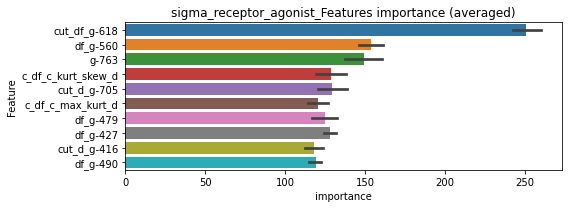

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000399995	valid_1's binary_logloss: 0.00488072


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000408465	valid_1's binary_logloss: 0.0086762


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000380918	valid_1's binary_logloss: 0.0121945


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000388139	valid_1's binary_logloss: 0.00182153


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000381232	valid_1's binary_logloss: 0.00249525


sigma_receptor_agonist logloss: 0.006013881954773332
sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000425678	valid_1's binary_logloss: 0.0055703
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000433913	valid_1's binary_logloss: 0.00917269
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000473717	valid_1's binary_logloss: 0.0150189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000410615	valid_1's binary_logloss: 0.00237763
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000444509	valid_1's binary_logloss: 0.0051678


y_Threshold: 0.0027935, Threshold: 0.0088192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0088192, conf_0:0.00617, conf_1:0.01146
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0388192
threshold: 0.0388192, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000404945	valid_1's binary_logloss: 0.00567326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000440041	valid_1's binary_logloss: 0.00997271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000444697	valid_1's binary_logloss: 0.0124561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000398252	valid_1's binary_logloss: 0.0016229
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0189743, Threshold: 0.0388192, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000414255	valid_1's binary_logloss: 0.00477215


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0388192, conf_0:0.03106, conf_1:0.04658
threshold: 0.0388192, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000404945	valid_1's binary_logloss: 0.00567326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000440041	valid_1's binary_logloss: 0.00997271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000444697	valid_1's binary_logloss: 0.0124561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000398252	valid_1's binary_logloss: 0.0016229
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0189743, Threshold: 0.0388192, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000414255	valid_1's binary_logloss: 0.00477215


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0388192, conf_0:0.03494, conf_1:0.04270
threshold: 0.0388192, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


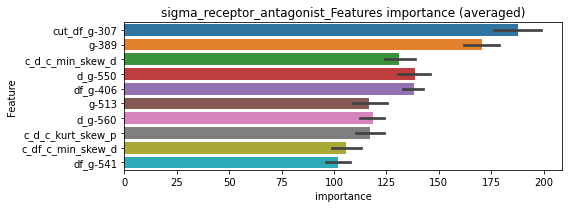

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000406621	valid_1's binary_logloss: 0.00415696


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00049008	valid_1's binary_logloss: 0.00931395


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000548013	valid_1's binary_logloss: 0.0120621
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.00041199	valid_1's binary_logloss: 0.00162919


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


sigma_receptor_antagonist logloss: 0.006259329225422603


Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000496661	valid_1's binary_logloss: 0.00413177


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000314424	valid_1's binary_logloss: 0.0013076
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00033697	valid_1's binary_logloss: 0.00298705
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000301707	valid_1's binary_logloss: 0.00287289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00031496	valid_1's binary_logloss: 0.000637917
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017238, Threshold: 0.0049702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000311411	valid_1's binary_logloss: 0.000898785


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0049702, conf_0:0.00348, conf_1:0.00646
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0349702
threshold: 0.0349702, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000302382	valid_1's binary_logloss: 0.00129756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000326628	valid_1's binary_logloss: 0.00398956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000296871	valid_1's binary_logloss: 0.00263782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000307898	valid_1's binary_logloss: 0.000570607
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000305213	valid_1's binary_logloss: 0.000790576


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0511721, Threshold: 0.0349702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0349702, conf_0:0.02798, conf_1:0.04196
threshold: 0.0349702, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000302382	valid_1's binary_logloss: 0.00129756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000326628	valid_1's binary_logloss: 0.00398956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000296871	valid_1's binary_logloss: 0.00263782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000307898	valid_1's binary_logloss: 0.000570607
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0511721, Threshold: 0.0349702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0349702, conf_0:0.03147, conf_1:0.03847


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000305213	valid_1's binary_logloss: 0.000790576


threshold: 0.0349702, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


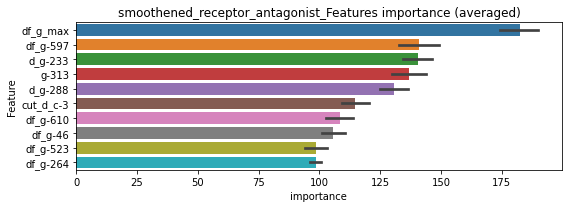

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000305096	valid_1's binary_logloss: 0.00110607


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000332177	valid_1's binary_logloss: 0.00291136


================================= fold 3/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000300202	valid_1's binary_logloss: 0.0024426


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000312038	valid_1's binary_logloss: 0.000569215


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000309158	valid_1's binary_logloss: 0.000766216


smoothened_receptor_antagonist logloss: 0.001559122879047925


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0336742	valid_1's binary_logloss: 0.120404
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.0181795	valid_1's binary_logloss: 0.113694
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0334171	valid_1's binary_logloss: 0.12836
Early stopping, best iteration is:
[1636]	training's binary_logloss: 0.0192905	valid_1's binary_logloss: 0.122022
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0334867	valid_1's binary_logloss: 0.123162
Early stopping, best iteration is:
[1333]	training's binary_logloss: 0.0243004	valid_1's binary_logloss: 0.118627


1 / 3, AUC score:0.974, PR-AUC:0.950
y_Threshold: 0.0634320, Threshold: 0.1254708, pos_neg_ratio: 0.8000000
Remove_noisy_data: 493 → Positive_corect_labels: 1263/7739
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.1254708, conf_0:0.08783, conf_1:0.16311
threshold: 0.1254708, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1263.0/7739, y_label_rate: 0.1631994
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0247814	valid_1's binary_logloss: 0.0839721
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0122217	valid_1's binary_logloss: 0.0749353
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0254927	valid_1's binary_logloss: 0.0731294
[2000]	training's binary_logloss: 0.0118733	valid_1's binary_logloss: 0.0639331
Early stopping, best iteration is:
[2717]	training's binary_logloss: 0.00851807	valid_1's binary_logloss: 0.061772
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0246968	valid_1's binary_logloss: 0.0822028
[2000]	training's binary_logloss: 0.0115414	valid_1's binary_logloss: 0.0728037
Early stopping, best iteration is:
[2177]	training's binary_logloss: 0.0105372	valid_1's binary_logloss: 0.0719108


2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0684820, Threshold: 0.1254708, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 1195.0/7603
p_label_rate: 0.0105475 Vs.target_rate: 0.01121
Num_p_label: 42.0, Expected: 44.6, Threshold: 0.1254708, conf_0:0.10038, conf_1:0.15057
threshold: 0.1254708, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 1195.0/7603, y_label_rate: 0.1571748
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0201236	valid_1's binary_logloss: 0.0577625
[2000]	training's binary_logloss: 0.00950724	valid_1's binary_logloss: 0.047819
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.00762792	valid_1's binary_logloss: 0.0460466
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0200059	valid_1's binary_logloss: 0.0589369
[2000]	training's binary_logloss: 0.009464	valid_1's binary_logloss: 0.0489499
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.00862508	valid_1's binary_logloss: 0.0481431
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0200582	valid_1's binary_logloss: 0.0586768
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.0111373	valid_1's binary_logloss: 0.0509786


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0709585, Threshold: 0.1254708, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 1167.0/7547
p_label_rate: 0.0095429 Vs.target_rate: 0.01121
Num_p_label: 38.0, Expected: 44.6, Threshold: 0.1254708, conf_0:0.11292, conf_1:0.13802
threshold: 0.1254708, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1167.0/7547, y_label_rate: 0.1546310


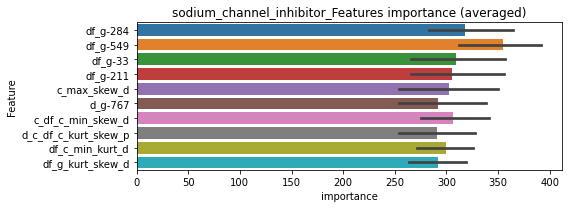

len(train_index) : 5031
len(valid_index) : 2516
================================= fold 1/3 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0376461	valid_1's binary_logloss: 0.0735921
[2000]	training's binary_logloss: 0.0190346	valid_1's binary_logloss: 0.0558462
[3000]	training's binary_logloss: 0.0125964	valid_1's binary_logloss: 0.0495202
[4000]	training's binary_logloss: 0.00938252	valid_1's binary_logloss: 0.0461111
Early stopping, best iteration is:
[4560]	training's binary_logloss: 0.00822364	valid_1's binary_logloss: 0.0449739


len(train_index) : 5031
len(valid_index) : 2516
================================= fold 2/3 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0377102	valid_1's binary_logloss: 0.0677423
[2000]	training's binary_logloss: 0.0193212	valid_1's binary_logloss: 0.0510336
[3000]	training's binary_logloss: 0.0127923	valid_1's binary_logloss: 0.0449579
[4000]	training's binary_logloss: 0.00953771	valid_1's binary_logloss: 0.0417992
[5000]	training's binary_logloss: 0.00765344	valid_1's binary_logloss: 0.0400375
Early stopping, best iteration is:
[5889]	training's binary_logloss: 0.00648849	valid_1's binary_logloss: 0.0388895


len(train_index) : 5032
len(valid_index) : 2515
================================= fold 3/3 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0388074	valid_1's binary_logloss: 0.0642236
[2000]	training's binary_logloss: 0.0196648	valid_1's binary_logloss: 0.0463511
[3000]	training's binary_logloss: 0.0129962	valid_1's binary_logloss: 0.0399508
[4000]	training's binary_logloss: 0.00966143	valid_1's binary_logloss: 0.0366238
[5000]	training's binary_logloss: 0.00772464	valid_1's binary_logloss: 0.0344991
[6000]	training's binary_logloss: 0.00644137	valid_1's binary_logloss: 0.0330578
[7000]	training's binary_logloss: 0.00551587	valid_1's binary_logloss: 0.0320432
[8000]	training's binary_logloss: 0.00483737	valid_1's binary_logloss: 0.0312218
Early stopping, best iteration is:
[8527]	training's binary_logloss: 0.00454601	valid_1's binary_logloss: 0.0308817


sodium_channel_inhibitor logloss: 0.038249373575592015
sodium_channel_inhibitor is unpredictable(><)!
sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000421397	valid_1's binary_logloss: 0.00539468
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000387137	valid_1's binary_logloss: 0.0035064
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000374889	valid_1's binary_logloss: 0.00888445
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000364614	valid_1's binary_logloss: 0.00141279
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020875, Threshold: 0.0059015, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000377014	valid_1's binary_logloss: 0.00210721


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0059015, conf_0:0.00413, conf_1:0.00767
Num_p_label: 2.0, Expected: 5.4, Adj_threshold_1: 0.0359015
threshold: 0.0359015, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000400105	valid_1's binary_logloss: 0.00528388
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000366187	valid_1's binary_logloss: 0.00313231
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000372356	valid_1's binary_logloss: 0.00859238
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000365267	valid_1's binary_logloss: 0.0011344
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000365555	valid_1's binary_logloss: 0.00215386


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234927, Threshold: 0.0359015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00134
Num_p_label: 8.0, Expected: 5.4, Threshold: 0.0359015, conf_0:0.02872, conf_1:0.04308
threshold: 0.0359015, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000400105	valid_1's binary_logloss: 0.00528388
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000366187	valid_1's binary_logloss: 0.00313231
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000372356	valid_1's binary_logloss: 0.00859238
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000365267	valid_1's binary_logloss: 0.0011344
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000365555	valid_1's binary_logloss: 0.00215386


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234927, Threshold: 0.0359015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00134
Num_p_label: 8.0, Expected: 5.4, Threshold: 0.0359015, conf_0:0.03231, conf_1:0.03949
threshold: 0.0359015, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


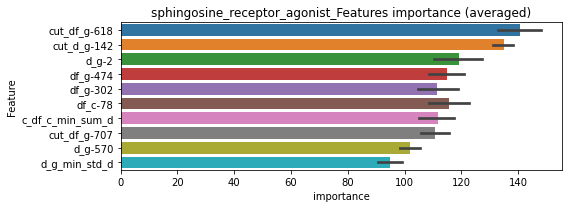

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000441644	valid_1's binary_logloss: 0.00502696


================================= fold 2/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000374298	valid_1's binary_logloss: 0.00249991


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000378958	valid_1's binary_logloss: 0.00680273


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000370851	valid_1's binary_logloss: 0.00107097


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.00038055	valid_1's binary_logloss: 0.00183477


sphingosine_receptor_agonist logloss: 0.0034470691511043023
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00121524	valid_1's binary_logloss: 0.0540798
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000964443	valid_1's binary_logloss: 0.032447
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000575406	valid_1's binary_logloss: 0.0102596
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000589424	valid_1's binary_logloss: 0.00363003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000839759	valid_1's binary_logloss: 0.0349243


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0064560, Threshold: 0.0434334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0434334, conf_0:0.03040, conf_1:0.05646
Num_p_label: 22.0, Expected: 11.9, Adj_threshold_1: 0.0734334
Num_p_label: 17.0, Expected: 11.9, Adj_threshold_2: 0.1034334
threshold: 0.1034334, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00067044	valid_1's binary_logloss: 0.0275256
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000587348	valid_1's binary_logloss: 0.0255959
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000602878	valid_1's binary_logloss: 0.0171767
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000555163	valid_1's binary_logloss: 0.00495406
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000670866	valid_1's binary_logloss: 0.0288128


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170448, Threshold: 0.1034334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0077850 Vs.target_rate: 0.00298
Num_p_label: 31.0, Expected: 11.9, Threshold: 0.1034334, conf_0:0.08275, conf_1:0.12412
Num_p_label: 26.0, Expected: 11.9, Adj_threshold_1: 0.1334334
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_2: 0.1634334
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_3: 0.1934334
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_4: 0.2234334
threshold: 0.2234334, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3795, y_label_rate: 0.1712780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000636689	valid_1's binary_logloss: 0.0217387
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000564313	valid_1's binary_logloss: 0.0269681
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000724811	valid_1's binary_logloss: 0.014081
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000592951	valid_1's binary_logloss: 0.0180969
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000546567	valid_1's binary_logloss: 0.0070176


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0217728, Threshold: 0.2234334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00298
Num_p_label: 15.0, Expected: 11.9, Threshold: 0.2234334, conf_0:0.20109, conf_1:0.24578
threshold: 0.2234334, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3791, y_label_rate: 0.1709312


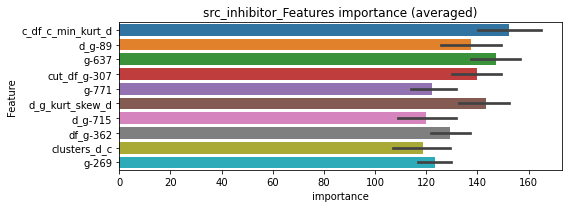

len(train_index) : 3032
len(valid_index) : 759
================================= fold 1/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000681537	valid_1's binary_logloss: 0.0278335


len(train_index) : 3033
len(valid_index) : 758
================================= fold 2/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000602177	valid_1's binary_logloss: 0.0107409


len(train_index) : 3033
len(valid_index) : 758
================================= fold 3/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000563905	valid_1's binary_logloss: 0.0105996


len(train_index) : 3033
len(valid_index) : 758
================================= fold 4/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000720623	valid_1's binary_logloss: 0.0153953


len(train_index) : 3033
len(valid_index) : 758
================================= fold 5/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000550171	valid_1's binary_logloss: 0.0199088
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000551413	valid_1's binary_logloss: 0.0198808


src_inhibitor logloss: 0.016899112689493002
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000804605	valid_1's binary_logloss: 0.035237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00104296	valid_1's binary_logloss: 0.031541
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000718878	valid_1's binary_logloss: 0.022544
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00098932	valid_1's binary_logloss: 0.0249031
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000773644	valid_1's binary_logloss: 0.0296751


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0086363, Threshold: 0.2357197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2357197, conf_0:0.16500, conf_1:0.30644
Num_p_label: 39.0, Expected: 13.2, Adj_threshold_1: 0.2657197
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_2: 0.2957197
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_3: 0.3257197
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_4: 0.3557197
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_5: 0.3857197
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_6: 0.4157197
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_7: 0.4457197
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.4757197
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_9: 0.5057197
Num_p_label: 20.0, Expected: 13.2, Adj_threshold_10: 0.5357197
threshold: 0.5357197, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000577631	valid_1's binary_logloss: 0.0196583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00088084	valid_1's binary_logloss: 0.0425292
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00079936	valid_1's binary_logloss: 0.0236025
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000699581	valid_1's binary_logloss: 0.0242739
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000665084	valid_1's binary_logloss: 0.0219424


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0412597, Threshold: 0.5357197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0150678 Vs.target_rate: 0.00332
Num_p_label: 60.0, Expected: 13.2, Threshold: 0.5357197, conf_0:0.42858, conf_1:0.64286
Num_p_label: 51.0, Expected: 13.2, Adj_threshold_1: 0.5657197
Num_p_label: 47.0, Expected: 13.2, Adj_threshold_2: 0.5957197
Num_p_label: 41.0, Expected: 13.2, Adj_threshold_3: 0.6257197
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_4: 0.6557197
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_5: 0.6857197
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_6: 0.7157197
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_7: 0.7457197
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_8: 0.7757197
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_9: 0.8057197
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_10: 0.8357197
threshold: 0.8357197, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000726889	valid_1's binary_logloss: 0.0237044
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000588265	valid_1's binary_logloss: 0.025101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0010282	valid_1's binary_logloss: 0.0403277
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000695204	valid_1's binary_logloss: 0.0175609
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000570303	valid_1's binary_logloss: 0.00565142


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0431928, Threshold: 0.8357197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0055249 Vs.target_rate: 0.00332
Num_p_label: 22.0, Expected: 13.2, Threshold: 0.8357197, conf_0:0.75215, conf_1:0.91929
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_1: 0.8657197
Num_p_label: 16.0, Expected: 13.2, Adj_threshold_2: 0.8957197
threshold: 0.8957197, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


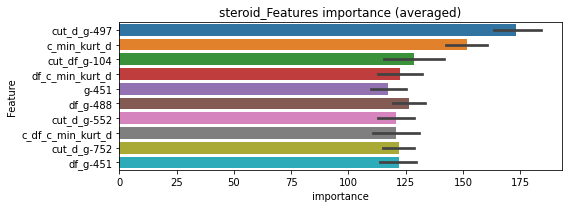

len(train_index) : 3022
len(valid_index) : 756
================================= fold 1/5 steroid=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3022
len(valid_index) : 756
================================= fold 2/5 steroid=================================


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000870656	valid_1's binary_logloss: 0.0281419
Training until validation scores don't improve for 29 rounds


len(train_index) : 3022
len(valid_index) : 756
================================= fold 3/5 steroid=================================


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000905483	valid_1's binary_logloss: 0.0190645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000644972	valid_1's binary_logloss: 0.0082449


len(train_index) : 3023
len(valid_index) : 755
================================= fold 4/5 steroid=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000770418	valid_1's binary_logloss: 0.0129389


len(train_index) : 3023
len(valid_index) : 755
================================= fold 5/5 steroid=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000705567	valid_1's binary_logloss: 0.0214646


steroid logloss: 0.017971369867122357
syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302775	valid_1's binary_logloss: 0.00175789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000290946	valid_1's binary_logloss: 0.00113134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000296965	valid_1's binary_logloss: 0.000544063
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00028563	valid_1's binary_logloss: 0.00109257
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014698, Threshold: 0.0041471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0041471, conf_0:0.00290, conf_1:0.00539
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0341471


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000286239	valid_1's binary_logloss: 0.000765984


threshold: 0.0341471, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000291258	valid_1's binary_logloss: 0.00154301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000279973	valid_1's binary_logloss: 0.00129817
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000290647	valid_1's binary_logloss: 0.000546429
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000285277	valid_1's binary_logloss: 0.00116328
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1173510, Threshold: 0.0341471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, Expected: 3.2, Threshold: 0.0341471, conf_0:0.02732, conf_1:0.04098
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_1: 0.0641471


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000284168	valid_1's binary_logloss: 0.000775491


threshold: 0.0641471, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000291258	valid_1's binary_logloss: 0.00154301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000279973	valid_1's binary_logloss: 0.00129817
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000290647	valid_1's binary_logloss: 0.000546429
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000285277	valid_1's binary_logloss: 0.00116328
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1173510, Threshold: 0.0641471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0641471, conf_0:0.05773, conf_1:0.07056


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000284168	valid_1's binary_logloss: 0.000775491


threshold: 0.0641471, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


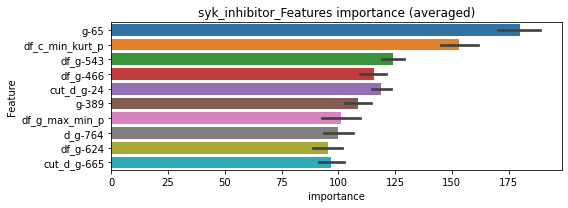

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000282414	valid_1's binary_logloss: 0.00115523


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 761


Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000298796	valid_1's binary_logloss: 0.00160666


================================= fold 3/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000285741	valid_1's binary_logloss: 0.000561416


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000287539	valid_1's binary_logloss: 0.000747013


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000292026	valid_1's binary_logloss: 0.000694233


syk_inhibitor logloss: 0.0009531470615730151
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000556289	valid_1's binary_logloss: 0.0323045
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000541155	valid_1's binary_logloss: 0.0121327
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000568883	valid_1's binary_logloss: 0.0118108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000527307	valid_1's binary_logloss: 0.00539346
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000528295	valid_1's binary_logloss: 0.0152993


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044152, Threshold: 0.0112224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0112224, conf_0:0.00786, conf_1:0.01459
Num_p_label: 4.0, Expected: 10.0, Adj_threshold_1: 0.0412224
threshold: 0.0412224, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000565835	valid_1's binary_logloss: 0.0307883
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000515634	valid_1's binary_logloss: 0.00963411
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000642892	valid_1's binary_logloss: 0.0101299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000622462	valid_1's binary_logloss: 0.00469376
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000518285	valid_1's binary_logloss: 0.0156932


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0220118, Threshold: 0.0412224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.0412224, conf_0:0.03298, conf_1:0.04947
threshold: 0.0412224, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000521264	valid_1's binary_logloss: 0.0085084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000539278	valid_1's binary_logloss: 0.00760008
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000835655	valid_1's binary_logloss: 0.0292885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000535046	valid_1's binary_logloss: 0.00465341
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0295555, Threshold: 0.0412224, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000885937	valid_1's binary_logloss: 0.0317655


Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.0412224, conf_0:0.03710, conf_1:0.04534
threshold: 0.0412224, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


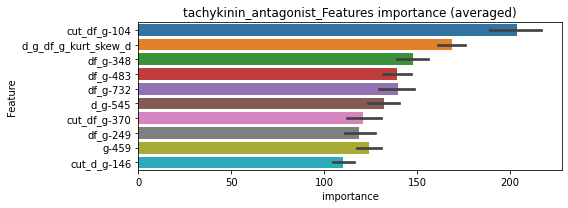

len(train_index) : 3037
len(valid_index) : 760
================================= fold 1/5 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 760
================================= fold 2/5 tachykinin_antagonist=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000937295	valid_1's binary_logloss: 0.0238679
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000524442	valid_1's binary_logloss: 0.0103579


len(train_index) : 3038
len(valid_index) : 759
================================= fold 3/5 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000656971	valid_1's binary_logloss: 0.0103856


len(train_index) : 3038
len(valid_index) : 759
================================= fold 4/5 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000566014	valid_1's binary_logloss: 0.0186774


len(train_index) : 3038
len(valid_index) : 759
================================= fold 5/5 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds


tachykinin_antagonist logloss: 0.016062136766967963


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000844806	valid_1's binary_logloss: 0.0170192


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000377891	valid_1's binary_logloss: 0.00287314
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000395086	valid_1's binary_logloss: 0.00284297
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000379448	valid_1's binary_logloss: 0.0012601
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000380862	valid_1's binary_logloss: 0.00205028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000377307	valid_1's binary_logloss: 0.00137611


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024896, Threshold: 0.0082592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0082592, conf_0:0.00578, conf_1:0.01074
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0382592
threshold: 0.0382592, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000368734	valid_1's binary_logloss: 0.00299876
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000375088	valid_1's binary_logloss: 0.0024471
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000366607	valid_1's binary_logloss: 0.0013063
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000368363	valid_1's binary_logloss: 0.00181213
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000373943	valid_1's binary_logloss: 0.000973447


y_Threshold: 0.0675637, Threshold: 0.0382592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0382592, conf_0:0.03061, conf_1:0.04591
threshold: 0.0382592, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000368734	valid_1's binary_logloss: 0.00299876
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000375088	valid_1's binary_logloss: 0.0024471
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000366607	valid_1's binary_logloss: 0.0013063
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000368363	valid_1's binary_logloss: 0.00181213
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0675637, Threshold: 0.0382592, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000373943	valid_1's binary_logloss: 0.000973447


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0382592, conf_0:0.03443, conf_1:0.04209
threshold: 0.0382592, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


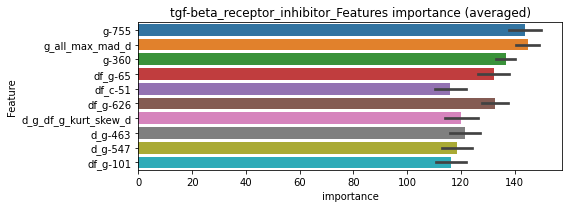

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000368634	valid_1's binary_logloss: 0.00374385
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000370097	valid_1's binary_logloss: 0.00374096


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00037375	valid_1's binary_logloss: 0.00185693
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000374416	valid_1's binary_logloss: 0.00185584


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000369365	valid_1's binary_logloss: 0.00105666
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.000363293	valid_1's binary_logloss: 0.00104522


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000443827	valid_1's binary_logloss: 0.00247869


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000370884	valid_1's binary_logloss: 0.00117955
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000366364	valid_1's binary_logloss: 0.00117358


tgf-beta_receptor_inhibitor logloss: 0.002059414712031615
thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000287654	valid_1's binary_logloss: 0.00257044
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000285822	valid_1's binary_logloss: 0.000677671
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000277602	valid_1's binary_logloss: 0.00312898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000281065	valid_1's binary_logloss: 0.00167117
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017911, Threshold: 0.0065838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0065838, conf_0:0.00461, conf_1:0.00856
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0365838


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00028244	valid_1's binary_logloss: 0.000693368


threshold: 0.0365838, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000280471	valid_1's binary_logloss: 0.00196123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000274052	valid_1's binary_logloss: 0.000713109
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277133	valid_1's binary_logloss: 0.00332645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00027775	valid_1's binary_logloss: 0.00278777
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0667644, Threshold: 0.0365838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00080
Num_p_label: 23.0, Expected: 3.2, Threshold: 0.0365838, conf_0:0.02927, conf_1:0.04390
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0665838
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.0965838
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_3: 0.1265838
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_4: 0.1565838


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000283238	valid_1's binary_logloss: 0.000507566


threshold: 0.1565838, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000280471	valid_1's binary_logloss: 0.00196123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000274052	valid_1's binary_logloss: 0.000713109
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277133	valid_1's binary_logloss: 0.00332645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00027775	valid_1's binary_logloss: 0.00278777
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0667644, Threshold: 0.1565838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.1565838, conf_0:0.14093, conf_1:0.17224
threshold: 0.1565838, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000283238	valid_1's binary_logloss: 0.000507566


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


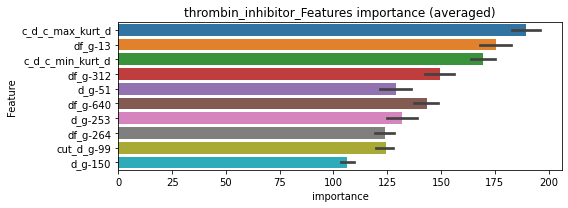

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000284319	valid_1's binary_logloss: 0.00204119


================================= fold 2/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000279802	valid_1's binary_logloss: 0.000771058


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000278689	valid_1's binary_logloss: 0.00174156


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000278824	valid_1's binary_logloss: 0.00132848


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000281536	valid_1's binary_logloss: 0.000500565


thrombin_inhibitor logloss: 0.0012768292876266787
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000448725	valid_1's binary_logloss: 0.00728177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000484074	valid_1's binary_logloss: 0.00513094
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000412666	valid_1's binary_logloss: 0.00599756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000436925	valid_1's binary_logloss: 0.0015636
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000433151	valid_1's binary_logloss: 0.00233239


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025424, Threshold: 0.0109306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0109306, conf_0:0.00765, conf_1:0.01421
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0409306
threshold: 0.0409306, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000410599	valid_1's binary_logloss: 0.00731142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000412907	valid_1's binary_logloss: 0.00555497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000419362	valid_1's binary_logloss: 0.00610904
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000418597	valid_1's binary_logloss: 0.0012946
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000417355	valid_1's binary_logloss: 0.00195252


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219370, Threshold: 0.0409306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0087896 Vs.target_rate: 0.00155
Num_p_label: 35.0, Expected: 6.2, Threshold: 0.0409306, conf_0:0.03274, conf_1:0.04912
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_1: 0.0709306
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_2: 0.1009306
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_3: 0.1309306
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_4: 0.1609306
threshold: 0.1609306, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000410599	valid_1's binary_logloss: 0.00731142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000412907	valid_1's binary_logloss: 0.00555497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000419362	valid_1's binary_logloss: 0.00610904
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000418597	valid_1's binary_logloss: 0.0012946
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000417355	valid_1's binary_logloss: 0.00195252


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219370, Threshold: 0.1609306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00155
Num_p_label: 13.0, Expected: 6.2, Threshold: 0.1609306, conf_0:0.14484, conf_1:0.17702
threshold: 0.1609306, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


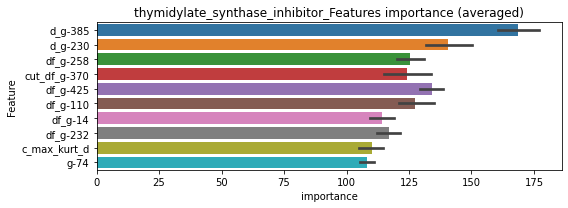

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000468864	valid_1's binary_logloss: 0.0069138


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000428292	valid_1's binary_logloss: 0.00357695


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000419344	valid_1's binary_logloss: 0.00686341


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000419256	valid_1's binary_logloss: 0.00135277


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000424728	valid_1's binary_logloss: 0.00170768


thymidylate_synthase_inhibitor logloss: 0.004083032359777684
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000363198	valid_1's binary_logloss: 0.00239583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000354535	valid_1's binary_logloss: 0.00894917
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000355918	valid_1's binary_logloss: 0.00289104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000341982	valid_1's binary_logloss: 0.00135409
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021006, Threshold: 0.0111364, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000356247	valid_1's binary_logloss: 0.00224009


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0111364, conf_0:0.00780, conf_1:0.01448
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_1: 0.0411364
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0711364
threshold: 0.0711364, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00034409	valid_1's binary_logloss: 0.0022976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000344604	valid_1's binary_logloss: 0.00891028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000356188	valid_1's binary_logloss: 0.00305597
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000334067	valid_1's binary_logloss: 0.00113961
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331170, Threshold: 0.0711364, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000343045	valid_1's binary_logloss: 0.00145134


Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0711364, conf_0:0.05691, conf_1:0.08536
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.1011364
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1311364
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_3: 0.1611364
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_4: 0.1911364
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.2211364
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_6: 0.2511364
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_7: 0.2811364
threshold: 0.2811364, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000352569	valid_1's binary_logloss: 0.00664201
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000328399	valid_1's binary_logloss: 0.00271527
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00034977	valid_1's binary_logloss: 0.000868637
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000371701	valid_1's binary_logloss: 0.00144855
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0210606, Threshold: 0.2811364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000360426	valid_1's binary_logloss: 0.0103524


p_label_rate: 0.0032647 Vs.target_rate: 0.00126
Num_p_label: 13.0, Expected: 5.0, Threshold: 0.2811364, conf_0:0.25302, conf_1:0.30925
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_1: 0.3111364
threshold: 0.3111364, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


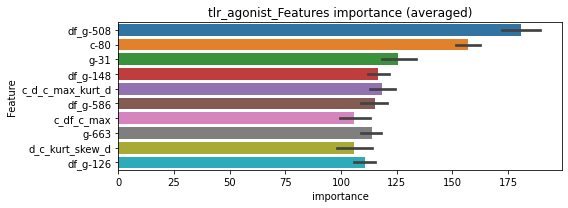

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 tlr_agonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000455124	valid_1's binary_logloss: 0.00582661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000336919	valid_1's binary_logloss: 0.00210523


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000348438	valid_1's binary_logloss: 0.00079031


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000342279	valid_1's binary_logloss: 0.00122128


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000363984	valid_1's binary_logloss: 0.00788001


tlr_agonist logloss: 0.0035646990733006344
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00017886	valid_1's binary_logloss: 0.000256767
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000181176	valid_1's binary_logloss: 0.000239673
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000178531	valid_1's binary_logloss: 0.00348431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00017816	valid_1's binary_logloss: 0.000224173
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005123, Threshold: 0.0010158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0010158, conf_0:0.00071, conf_1:0.00132
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0310158
threshold: 0.0310158, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00018	valid_1's binary_logloss: 0.000220729


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000176364	valid_1's binary_logloss: 0.000340284
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000177749	valid_1's binary_logloss: 0.000215992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000180615	valid_1's binary_logloss: 0.0017732
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000178912	valid_1's binary_logloss: 0.000221002
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0545805, Threshold: 0.0310158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, Expected: 1.2, Threshold: 0.0310158, conf_0:0.02481, conf_1:0.03722
threshold: 0.0310158, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000177212	valid_1's binary_logloss: 0.000214535


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000176364	valid_1's binary_logloss: 0.000340284
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000177749	valid_1's binary_logloss: 0.000215992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000180615	valid_1's binary_logloss: 0.0017732
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000178912	valid_1's binary_logloss: 0.000221002
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0545805, Threshold: 0.0310158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, Expected: 1.2, Threshold: 0.0310158, conf_0:0.02791, conf_1:0.03412


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000177212	valid_1's binary_logloss: 0.000214535


threshold: 0.0310158, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


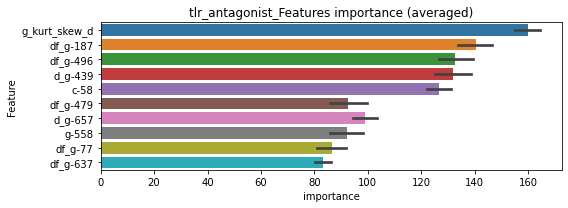

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000173797	valid_1's binary_logloss: 0.00025278
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000172841	valid_1's binary_logloss: 0.000251565


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000173919	valid_1's binary_logloss: 0.000236384
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000173915	valid_1's binary_logloss: 0.000236379


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000173779	valid_1's binary_logloss: 0.000555752
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000174084	valid_1's binary_logloss: 0.000555064
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 tlr_antagonist=================================


Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000176173	valid_1's binary_logloss: 0.000218232
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00017504	valid_1's binary_logloss: 0.000220381
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.00017504	valid_1's binary_logloss: 0.000220381


tlr_antagonist logloss: 0.000296472623248122
tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000409054	valid_1's binary_logloss: 0.011293
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00045839	valid_1's binary_logloss: 0.00554071
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000428533	valid_1's binary_logloss: 0.0115685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00043135	valid_1's binary_logloss: 0.00600789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000442441	valid_1's binary_logloss: 0.00667984


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036720, Threshold: 0.0196279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0196279, conf_0:0.01374, conf_1:0.02552
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.0496279
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_2: 0.0796279
threshold: 0.0796279, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000402603	valid_1's binary_logloss: 0.0105231
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000415507	valid_1's binary_logloss: 0.00590835
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000406522	valid_1's binary_logloss: 0.0105598
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000414909	valid_1's binary_logloss: 0.00296615
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292636, Threshold: 0.0796279, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.0004208	valid_1's binary_logloss: 0.00648238


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0057760 Vs.target_rate: 0.00151
Num_p_label: 23.0, Expected: 6.0, Threshold: 0.0796279, conf_0:0.06370, conf_1:0.09555
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.1096279
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.1396279
threshold: 0.1396279, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000402603	valid_1's binary_logloss: 0.0105231
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000415507	valid_1's binary_logloss: 0.00590835
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000406522	valid_1's binary_logloss: 0.0105598
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000414909	valid_1's binary_logloss: 0.00296615
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.0004208	valid_1's binary_logloss: 0.00648238


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292636, Threshold: 0.1396279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.1396279, conf_0:0.12567, conf_1:0.15359
threshold: 0.1396279, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


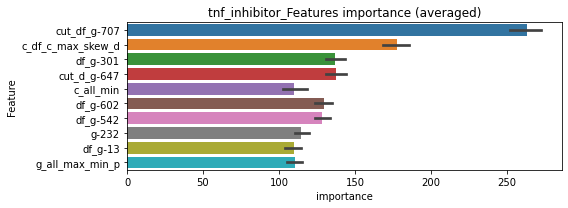

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000414898	valid_1's binary_logloss: 0.00869375


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000418169	valid_1's binary_logloss: 0.00485405


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000431733	valid_1's binary_logloss: 0.00780446


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000456299	valid_1's binary_logloss: 0.00330699


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.00042279	valid_1's binary_logloss: 0.00559384


tnf_inhibitor logloss: 0.006054029951367704
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0344446	valid_1's binary_logloss: 0.126859
[2000]	training's binary_logloss: 0.0164228	valid_1's binary_logloss: 0.112133
Early stopping, best iteration is:
[2292]	training's binary_logloss: 0.0142263	valid_1's binary_logloss: 0.110437
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0361086	valid_1's binary_logloss: 0.102046
[2000]	training's binary_logloss: 0.0172616	valid_1's binary_logloss: 0.0819881
[3000]	training's binary_logloss: 0.0112694	valid_1's binary_logloss: 0.0748794
[4000]	training's binary_logloss: 0.00837104	valid_1's binary_logloss: 0.0713606
Early stopping, best iteration is:
[3968]	training's binary_logloss: 0.00843815	valid_1's binary_logloss: 0.0713352
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0350404	valid_1's binary_logloss: 0.108981
[2000]	training's binary_loglo

1 / 3, AUC score:0.990, PR-AUC:0.976
y_Threshold: 0.0609197, Threshold: 0.2211019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 627/3743
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.2211019, conf_0:0.15477, conf_1:0.28743
Num_p_label: 35.0, Expected: 21.2, Adj_threshold_1: 0.2511019
Num_p_label: 21.0, Expected: 21.2, Adj_threshold_2: 0.2811019
threshold: 0.2811019, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 627.0/3743, y_label_rate: 0.1675127
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0305067	valid_1's binary_logloss: 0.0947745
[2000]	training's binary_logloss: 0.0145632	valid_1's binary_logloss: 0.076957
[3000]	training's binary_logloss: 0.00955484	valid_1's binary_logloss: 0.0706603
Early stopping, best iteration is:
[3596]	training's binary_logloss: 0.00794095	valid_1's binary_logloss: 0.0684564
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0310835	valid_1's binary_logloss: 0.0868705
[2000]	training's binary_logloss: 0.0148378	valid_1's binary_logloss: 0.0668202
[3000]	training's binary_logloss: 0.00972837	valid_1's binary_logloss: 0.0597966
[4000]	training's binary_logloss: 0.00725628	valid_1's binary_logloss: 0.0560134
Early stopping, best iteration is:
[4331]	training's binary_logloss: 0.00670081	valid_1's binary_logloss: 0.0551345
Training until validation scores don't improve for 39 rounds
[1000]	training's binar

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0976514, Threshold: 0.2811019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 610.0/3709
p_label_rate: 0.0246107 Vs.target_rate: 0.00533
Num_p_label: 98.0, Expected: 21.2, Threshold: 0.2811019, conf_0:0.22488, conf_1:0.33732
Num_p_label: 81.0, Expected: 21.2, Adj_threshold_1: 0.3111019
Num_p_label: 70.0, Expected: 21.2, Adj_threshold_2: 0.3411019
Num_p_label: 58.0, Expected: 21.2, Adj_threshold_3: 0.3711019
Num_p_label: 54.0, Expected: 21.2, Adj_threshold_4: 0.4011019
Num_p_label: 45.0, Expected: 21.2, Adj_threshold_5: 0.4311019
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_6: 0.4611019
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_7: 0.4911019
Num_p_label: 28.0, Expected: 21.2, Adj_threshold_8: 0.5211019
threshold: 0.5211019, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 610.0/3709, y_label_rate: 0.1644648
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0290957	valid_1's binary_logloss: 0.0992379
[2000]	training's binary_logloss: 0.0139415	valid_1's binary_logloss: 0.0828613
Early stopping, best iteration is:
[2825]	training's binary_logloss: 0.00969815	valid_1's binary_logloss: 0.0776469
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0282814	valid_1's binary_logloss: 0.0926444
[2000]	training's binary_logloss: 0.0135673	valid_1's binary_logloss: 0.0760252
[3000]	training's binary_logloss: 0.00889077	valid_1's binary_logloss: 0.0700802
Early stopping, best iteration is:
[3541]	training's binary_logloss: 0.00750869	valid_1's binary_logloss: 0.068235
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0287208	valid_1's binary_logloss: 0.0943052
[2000]	training's binary_logloss: 0.0137795	valid_1's binary_logloss: 0.0760902
[3000]	training's binary_

3 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0894559, Threshold: 0.5211019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 588.0/3665
p_label_rate: 0.0130588 Vs.target_rate: 0.00533
Num_p_label: 52.0, Expected: 21.2, Threshold: 0.5211019, conf_0:0.46899, conf_1:0.57321
Num_p_label: 50.0, Expected: 21.2, Adj_threshold_1: 0.5511019
Num_p_label: 39.0, Expected: 21.2, Adj_threshold_2: 0.5811019
Num_p_label: 35.0, Expected: 21.2, Adj_threshold_3: 0.6111019
Num_p_label: 25.0, Expected: 21.2, Adj_threshold_4: 0.6411019
threshold: 0.6411019, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 588.0/3665, y_label_rate: 0.1604366


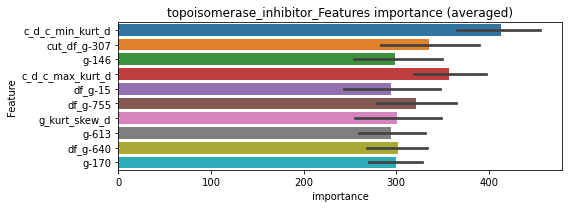

len(train_index) : 2443
len(valid_index) : 1222
================================= fold 1/3 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0572754	valid_1's binary_logloss: 0.126236
[2000]	training's binary_logloss: 0.0291428	valid_1's binary_logloss: 0.0974765
[3000]	training's binary_logloss: 0.0193333	valid_1's binary_logloss: 0.0866535
[4000]	training's binary_logloss: 0.0144527	valid_1's binary_logloss: 0.0812513
[5000]	training's binary_logloss: 0.011566	valid_1's binary_logloss: 0.0780092
[6000]	training's binary_logloss: 0.00962951	valid_1's binary_logloss: 0.075735
Early stopping, best iteration is:
[6631]	training's binary_logloss: 0.00872099	valid_1's binary_logloss: 0.0746776


len(train_index) : 2443
len(valid_index) : 1222
================================= fold 2/3 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0570736	valid_1's binary_logloss: 0.113874
[2000]	training's binary_logloss: 0.0290252	valid_1's binary_logloss: 0.0833782
[3000]	training's binary_logloss: 0.019294	valid_1's binary_logloss: 0.0715941
[4000]	training's binary_logloss: 0.0144772	valid_1's binary_logloss: 0.065308
[5000]	training's binary_logloss: 0.011577	valid_1's binary_logloss: 0.0613486
[6000]	training's binary_logloss: 0.00965593	valid_1's binary_logloss: 0.0584976
[7000]	training's binary_logloss: 0.00830831	valid_1's binary_logloss: 0.0562779
[8000]	training's binary_logloss: 0.00729645	valid_1's binary_logloss: 0.0546562
Early stopping, best iteration is:
[8686]	training's binary_logloss: 0.00673382	valid_1's binary_logloss: 0.0535501


len(train_index) : 2444
len(valid_index) : 1221
================================= fold 3/3 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0584735	valid_1's binary_logloss: 0.101127
[2000]	training's binary_logloss: 0.0297731	valid_1's binary_logloss: 0.071595
[3000]	training's binary_logloss: 0.0198135	valid_1's binary_logloss: 0.0606032
[4000]	training's binary_logloss: 0.0148129	valid_1's binary_logloss: 0.0547945
[5000]	training's binary_logloss: 0.0118591	valid_1's binary_logloss: 0.0510654
[6000]	training's binary_logloss: 0.00989732	valid_1's binary_logloss: 0.0484722
[7000]	training's binary_logloss: 0.00851082	valid_1's binary_logloss: 0.0467531
[8000]	training's binary_logloss: 0.00746802	valid_1's binary_logloss: 0.0451587
[9000]	training's binary_logloss: 0.00664672	valid_1's binary_logloss: 0.0439686
[10000]	training's binary_logloss: 0.0060102	valid_1's binary_logloss: 0.0430789
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0060102	valid_1's binary_logloss: 0.0430789


topoisomerase_inhibitor logloss: 0.05710602094945353
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000288913	valid_1's binary_logloss: 0.000700554
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000297065	valid_1's binary_logloss: 0.000721438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000292392	valid_1's binary_logloss: 0.00434431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000286875	valid_1's binary_logloss: 0.0037879
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013548, Threshold: 0.0134066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0134066, conf_0:0.00938, conf_1:0.01743
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.0434066
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0734066


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000297342	valid_1's binary_logloss: 0.00163966


threshold: 0.0734066, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000283478	valid_1's binary_logloss: 0.000606181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000284885	valid_1's binary_logloss: 0.000418415
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000281302	valid_1's binary_logloss: 0.00321455
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000304637	valid_1's binary_logloss: 0.00357979
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0464882, Threshold: 0.0734066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.0734066, conf_0:0.05873, conf_1:0.08809
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.1034066
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.1334066
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_3: 0.1634066
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_4: 0.1934066
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_5: 0.2234066
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.2534066


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000287983	valid_1's binary_logloss: 0.001784


Num_p_label: 20.0, Expected: 3.0, Adj_threshold_7: 0.2834066
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_8: 0.3134066
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3434066
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_10: 0.3734066
threshold: 0.3734066, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000283478	valid_1's binary_logloss: 0.000606181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000284885	valid_1's binary_logloss: 0.000418415
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000281302	valid_1's binary_logloss: 0.00321455
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000304637	valid_1's binary_logloss: 0.00357979
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0464882, Threshold: 0.3734066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, Expected: 3.0, Threshold: 0.3734066, conf_0:0.33607, conf_1:0.41075
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.4034066
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.4334066


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000287983	valid_1's binary_logloss: 0.001784


Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.4634066
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.4934066
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.5234066
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5534066
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.5834066
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.6134066
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.6434066
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.6734066
threshold: 0.6734066, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


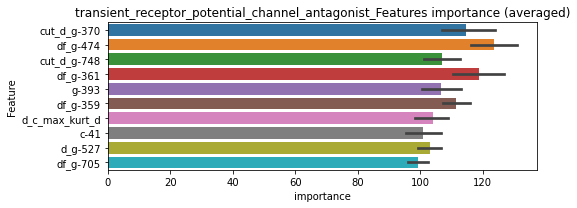

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000283206	valid_1's binary_logloss: 0.000634302


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000289317	valid_1's binary_logloss: 0.000425455


================================= fold 3/5 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000282787	valid_1's binary_logloss: 0.00217922


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000296066	valid_1's binary_logloss: 0.00372625
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000287504	valid_1's binary_logloss: 0.000671305


transient_receptor_potential_channel_antagonist logloss: 0.0015273648032245943
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000147818	valid_1's binary_logloss: 0.000611483
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000145658	valid_1's binary_logloss: 0.000145442
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000143854	valid_1's binary_logloss: 0.000550608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000146845	valid_1's binary_logloss: 0.000143461
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004129, Threshold: 0.0011448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011448, conf_0:0.00080, conf_1:0.00149
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311448
threshold: 0.0311448, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000145433	valid_1's binary_logloss: 0.000216032


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000140195	valid_1's binary_logloss: 0.000507848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000140292	valid_1's binary_logloss: 0.00014329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000138638	valid_1's binary_logloss: 0.00137196
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000141773	valid_1's binary_logloss: 0.000147899
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00014012	valid_1's binary_logloss: 0.000186697


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0762298, Threshold: 0.0311448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0311448, conf_0:0.02492, conf_1:0.03737
threshold: 0.0311448, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000140195	valid_1's binary_logloss: 0.000507848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000140292	valid_1's binary_logloss: 0.00014329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000138638	valid_1's binary_logloss: 0.00137196
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000141773	valid_1's binary_logloss: 0.000147899
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0762298, Threshold: 0.0311448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0311448, conf_0:0.02803, conf_1:0.03426
threshold: 0.0311448, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00014012	valid_1's binary_logloss: 0.000186697


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


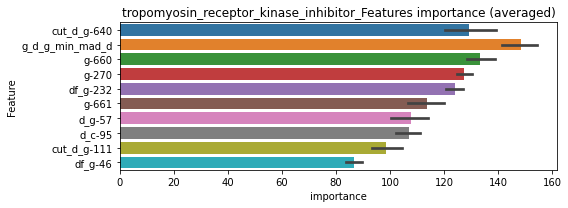

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000139453	valid_1's binary_logloss: 0.000356418
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000139453	valid_1's binary_logloss: 0.000356418
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000141191	valid_1's binary_logloss: 0.000147176
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000139364	valid_1's binary_logloss: 0.00101853
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000139816	valid_1's binary_logloss: 0.00101817
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139538	valid_1's binary_logloss: 0.000154205
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000139462	valid_1's binary_logloss: 0.000154108


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


tropomyosin_receptor_kinase_inhibitor logloss: 0.0003687189823598034


[1000]	training's binary_logloss: 0.000139472	valid_1's binary_logloss: 0.000167176
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000139472	valid_1's binary_logloss: 0.000167176


trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000349144	valid_1's binary_logloss: 0.00117179
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000343296	valid_1's binary_logloss: 0.00199376
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000343066	valid_1's binary_logloss: 0.00249834
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000350574	valid_1's binary_logloss: 0.00100244
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017987, Threshold: 0.0073244, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000351805	valid_1's binary_logloss: 0.000662307


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0073244, conf_0:0.00513, conf_1:0.00952
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0373244
threshold: 0.0373244, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000335084	valid_1's binary_logloss: 0.00108102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000331663	valid_1's binary_logloss: 0.00143691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000339003	valid_1's binary_logloss: 0.0026845
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000336044	valid_1's binary_logloss: 0.000877051
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0717958, Threshold: 0.0373244, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000342531	valid_1's binary_logloss: 0.000682107


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0045203 Vs.target_rate: 0.00105
Num_p_label: 18.0, Expected: 4.2, Threshold: 0.0373244, conf_0:0.02986, conf_1:0.04479
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0673244
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_2: 0.0973244
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_3: 0.1273244
threshold: 0.1273244, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000335084	valid_1's binary_logloss: 0.00108102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000331663	valid_1's binary_logloss: 0.00143691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000339003	valid_1's binary_logloss: 0.0026845
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000336044	valid_1's binary_logloss: 0.000877051
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0717958, Threshold: 0.1273244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000342531	valid_1's binary_logloss: 0.000682107


p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, Expected: 4.2, Threshold: 0.1273244, conf_0:0.11459, conf_1:0.14006
threshold: 0.1273244, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


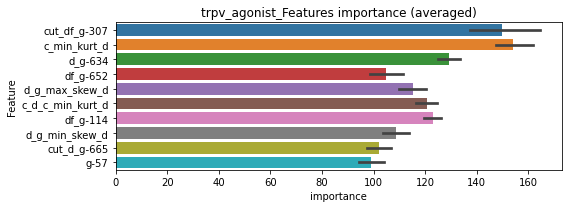

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00033506	valid_1's binary_logloss: 0.00111255
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.00033506	valid_1's binary_logloss: 0.00111255


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000338659	valid_1's binary_logloss: 0.00175373


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000335025	valid_1's binary_logloss: 0.00209986


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000348298	valid_1's binary_logloss: 0.000996421


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000338156	valid_1's binary_logloss: 0.000652738


trpv_agonist logloss: 0.0013234992631852803
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000474674	valid_1's binary_logloss: 0.0222337
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.0004644	valid_1's binary_logloss: 0.013356
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000463768	valid_1's binary_logloss: 0.00368385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000455395	valid_1's binary_logloss: 0.00174117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000793554	valid_1's binary_logloss: 0.0282077


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0031772, Threshold: 0.0140195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0140195, conf_0:0.00981, conf_1:0.01823
Num_p_label: 8.0, Expected: 8.0, Adj_threshold_1: 0.0440195
threshold: 0.0440195, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000462031	valid_1's binary_logloss: 0.0126086
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000438939	valid_1's binary_logloss: 0.00408137
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000464644	valid_1's binary_logloss: 0.00981771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000448743	valid_1's binary_logloss: 0.00457237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000472741	valid_1's binary_logloss: 0.01824


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0202007, Threshold: 0.0440195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0057760 Vs.target_rate: 0.00202
Num_p_label: 23.0, Expected: 8.0, Threshold: 0.0440195, conf_0:0.03522, conf_1:0.05282
Num_p_label: 12.0, Expected: 8.0, Adj_threshold_1: 0.0740195
threshold: 0.0740195, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00044526	valid_1's binary_logloss: 0.00755631
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000437214	valid_1's binary_logloss: 0.0108741
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000824918	valid_1's binary_logloss: 0.0168999
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000582007	valid_1's binary_logloss: 0.0117734
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00043775	valid_1's binary_logloss: 0.00335276


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0119502, Threshold: 0.0740195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0032647 Vs.target_rate: 0.00202
Num_p_label: 13.0, Expected: 8.0, Threshold: 0.0740195, conf_0:0.06662, conf_1:0.08142
threshold: 0.0740195, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


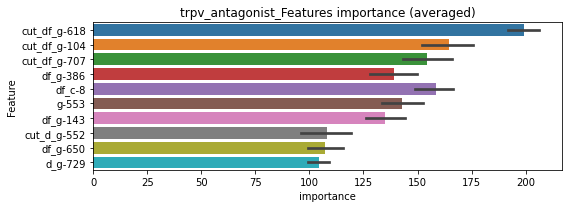

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000453576	valid_1's binary_logloss: 0.00502137


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040


Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000552107	valid_1's binary_logloss: 0.0163723


len(valid_index) : 760
================================= fold 3/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000517272	valid_1's binary_logloss: 0.00959426


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000520266	valid_1's binary_logloss: 0.00449336


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000444782	valid_1's binary_logloss: 0.0050095


trpv_antagonist logloss: 0.008098150699700397


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0392644	valid_1's binary_logloss: 0.145347
Early stopping, best iteration is:
[1730]	training's binary_logloss: 0.0212195	valid_1's binary_logloss: 0.136475
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0389873	valid_1's binary_logloss: 0.153537
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.019038	valid_1's binary_logloss: 0.140887
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0394496	valid_1's binary_logloss: 0.146831
Early stopping, best iteration is:
[1763]	training's binary_logloss: 0.0210317	valid_1's binary_logloss: 0.135841


1 / 3, AUC score:0.966, PR-AUC:0.941
y_Threshold: 0.0694183, Threshold: 0.1188490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 538 → Positive_corect_labels: 1298/8008
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.1188490, conf_0:0.08319, conf_1:0.15450
threshold: 0.1188490, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1298.0/8008, y_label_rate: 0.1620879
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0298737	valid_1's binary_logloss: 0.107601
[2000]	training's binary_logloss: 0.0139434	valid_1's binary_logloss: 0.0943012
Early stopping, best iteration is:
[2661]	training's binary_logloss: 0.0102265	valid_1's binary_logloss: 0.0908054
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0306515	valid_1's binary_logloss: 0.0946606
[2000]	training's binary_logloss: 0.0143268	valid_1's binary_logloss: 0.0796412
Early stopping, best iteration is:
[2632]	training's binary_logloss: 0.0106284	valid_1's binary_logloss: 0.0761478
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0303491	valid_1's binary_logloss: 0.107989
[2000]	training's binary_logloss: 0.0142526	valid_1's binary_logloss: 0.0946438
Early stopping, best iteration is:
[2458]	training's binary_logloss: 0.011369	valid_1's binary_logloss: 0.092

2 / 3, AUC score:0.993, PR-AUC:0.984
y_Threshold: 0.0879323, Threshold: 0.1188490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1231.0/7874
p_label_rate: 0.0128076 Vs.target_rate: 0.01327
Num_p_label: 51.0, Expected: 52.8, Threshold: 0.1188490, conf_0:0.09508, conf_1:0.14262
threshold: 0.1188490, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1231.0/7874, y_label_rate: 0.1563373
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0269852	valid_1's binary_logloss: 0.0819482
[2000]	training's binary_logloss: 0.0125774	valid_1's binary_logloss: 0.0671191
[3000]	training's binary_logloss: 0.00811773	valid_1's binary_logloss: 0.0620159
Early stopping, best iteration is:
[3517]	training's binary_logloss: 0.00685459	valid_1's binary_logloss: 0.0602792
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0264381	valid_1's binary_logloss: 0.0903444
Early stopping, best iteration is:
[1654]	training's binary_logloss: 0.0153102	valid_1's binary_logloss: 0.0782436
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0268319	valid_1's binary_logloss: 0.0846999
[2000]	training's binary_logloss: 0.012657	valid_1's binary_logloss: 0.0702519
Early stopping, best iteration is:
[2277]	training's binary_logloss: 0.0110052	valid_1's binary_logloss: 0

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0903017, Threshold: 0.1188490, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 1198.0/7808
p_label_rate: 0.0133099 Vs.target_rate: 0.01327
Num_p_label: 53.0, Expected: 52.8, Threshold: 0.1188490, conf_0:0.10696, conf_1:0.13073
threshold: 0.1188490, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 1198.0/7808, y_label_rate: 0.1534324


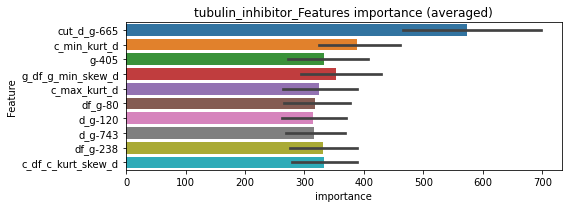

len(train_index) : 5205
len(valid_index) : 2603
================================= fold 1/3 tubulin_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0520373	valid_1's binary_logloss: 0.106084
[2000]	training's binary_logloss: 0.0265106	valid_1's binary_logloss: 0.0815387
[3000]	training's binary_logloss: 0.0175898	valid_1's binary_logloss: 0.0725744
[4000]	training's binary_logloss: 0.0130403	valid_1's binary_logloss: 0.067762
Early stopping, best iteration is:
[4650]	training's binary_logloss: 0.011184	valid_1's binary_logloss: 0.065649


len(train_index) : 5205
len(valid_index) : 2603
================================= fold 2/3 tubulin_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0523634	valid_1's binary_logloss: 0.104007
[2000]	training's binary_logloss: 0.0266852	valid_1's binary_logloss: 0.0798907
[3000]	training's binary_logloss: 0.0176971	valid_1's binary_logloss: 0.0708944
[4000]	training's binary_logloss: 0.0131385	valid_1's binary_logloss: 0.0659607
[5000]	training's binary_logloss: 0.010454	valid_1's binary_logloss: 0.0630539
Early stopping, best iteration is:
[5510]	training's binary_logloss: 0.00948052	valid_1's binary_logloss: 0.0620111


len(train_index) : 5206
len(valid_index) : 2602
================================= fold 3/3 tubulin_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0526219	valid_1's binary_logloss: 0.0989942
[2000]	training's binary_logloss: 0.0267647	valid_1's binary_logloss: 0.0760127
[3000]	training's binary_logloss: 0.0176851	valid_1's binary_logloss: 0.0674113
[4000]	training's binary_logloss: 0.0131391	valid_1's binary_logloss: 0.0627379
[5000]	training's binary_logloss: 0.0104689	valid_1's binary_logloss: 0.0599671
[6000]	training's binary_logloss: 0.00871191	valid_1's binary_logloss: 0.0580803
Early stopping, best iteration is:
[6273]	training's binary_logloss: 0.00833204	valid_1's binary_logloss: 0.0576447


tubulin_inhibitor logloss: 0.06176879067086729
tubulin_inhibitor is unpredictable(><)!
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000773402	valid_1's binary_logloss: 0.0324884
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000804829	valid_1's binary_logloss: 0.0248939
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000627053	valid_1's binary_logloss: 0.0119535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000639461	valid_1's binary_logloss: 0.0141412
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000670694	valid_1's binary_logloss: 0.0368896


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0051563, Threshold: 0.0584812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0584812, conf_0:0.04094, conf_1:0.07603
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_1: 0.0884812
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_2: 0.1184812
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1484812
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_4: 0.1784812
threshold: 0.1784812, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000824013	valid_1's binary_logloss: 0.0364023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000684467	valid_1's binary_logloss: 0.0293326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00107018	valid_1's binary_logloss: 0.035541
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000592296	valid_1's binary_logloss: 0.00919522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000601325	valid_1's binary_logloss: 0.0309916


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0179202, Threshold: 0.1784812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0092918 Vs.target_rate: 0.00307
Num_p_label: 37.0, Expected: 12.2, Threshold: 0.1784812, conf_0:0.14278, conf_1:0.21418
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_1: 0.2084812
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_2: 0.2384812
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_3: 0.2684812
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_4: 0.2984812
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_5: 0.3284812
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3584812
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_7: 0.3884812
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_8: 0.4184812
threshold: 0.4184812, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000573023	valid_1's binary_logloss: 0.0181628
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000705421	valid_1's binary_logloss: 0.0240859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000610957	valid_1's binary_logloss: 0.0261203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000596039	valid_1's binary_logloss: 0.0201276
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000587565	valid_1's binary_logloss: 0.0178038


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0257553, Threshold: 0.4184812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.4184812, conf_0:0.37663, conf_1:0.46033
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.4484812
threshold: 0.4484812, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


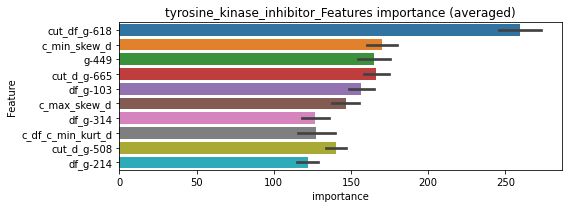

len(train_index) : 3032
len(valid_index) : 759
================================= fold 1/5 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3033
len(valid_index) : 758
================================= fold 2/5 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00102629	valid_1's binary_logloss: 0.0278464
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000613092	valid_1's binary_logloss: 0.0170412


len(train_index) : 3033
len(valid_index) : 758
================================= fold 3/5 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3033
len(valid_index) : 758
================================= fold 4/5 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00148592	valid_1's binary_logloss: 0.0316132
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000627142	valid_1's binary_logloss: 0.0128372


len(train_index) : 3033
len(valid_index) : 758
================================= fold 5/5 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000845444	valid_1's binary_logloss: 0.0138288


tyrosine_kinase_inhibitor logloss: 0.020635263482365055
ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:306
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000220664	valid_1's binary_logloss: 0.00313819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000224081	valid_1's binary_logloss: 0.000512467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000223302	valid_1's binary_logloss: 0.000331569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000219988	valid_1's binary_logloss: 0.000417458
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008435, Threshold: 0.0023297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023297, conf_0:0.00163, conf_1:0.00303
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323297
threshold: 0.0323297, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000227959	valid_1's binary_logloss: 0.00299486


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000215272	valid_1's binary_logloss: 0.00384735
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000215694	valid_1's binary_logloss: 0.000629124
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000217368	valid_1's binary_logloss: 0.000343516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000216209	valid_1's binary_logloss: 0.000352507
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182546, Threshold: 0.0323297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, Expected: 2.0, Threshold: 0.0323297, conf_0:0.02586, conf_1:0.03880
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0623297


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00021734	valid_1's binary_logloss: 0.00291346


threshold: 0.0623297, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000215272	valid_1's binary_logloss: 0.00384735
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000215694	valid_1's binary_logloss: 0.000629124
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000217368	valid_1's binary_logloss: 0.000343516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000216209	valid_1's binary_logloss: 0.000352507
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182546, Threshold: 0.0623297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0623297, conf_0:0.05610, conf_1:0.06856
threshold: 0.0623297, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00021734	valid_1's binary_logloss: 0.00291346


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


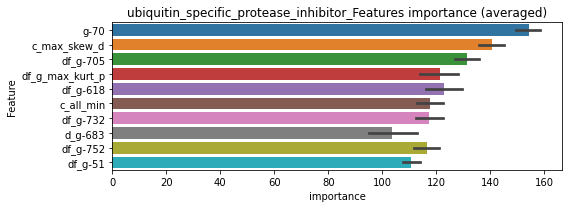

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000229171	valid_1's binary_logloss: 0.00242273
Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000221834	valid_1's binary_logloss: 0.000600486
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000220512	valid_1's binary_logloss: 0.00030645
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000220512	valid_1's binary_logloss: 0.00030645


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000221979	valid_1's binary_logloss: 0.0003447
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.00022824	valid_1's binary_logloss: 0.00162428


ubiquitin_specific_protease_inhibitor logloss: 0.0010597549402169527


mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0323396	valid_1's binary_logloss: 0.117447
[2000]	training's binary_logloss: 0.0151759	valid_1's binary_logloss: 0.106197
Early stopping, best iteration is:
[2154]	training's binary_logloss: 0.0140273	valid_1's binary_logloss: 0.105171
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0316206	valid_1's binary_logloss: 0.121281
[2000]	training's binary_logloss: 0.014986	valid_1's binary_logloss: 0.109625
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.0131223	valid_1's binary_logloss: 0.108208
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0336657	valid_1's binary_logloss: 0.106828
[2000]	training's binary_logloss: 0.0158804	valid_1's binary_logloss: 0.0954853
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.0157673	valid_1's binary_logloss: 0.0953568


1 / 3, AUC score:0.983, PR-AUC:0.967
y_Threshold: 0.0535550, Threshold: 0.1063620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 280 → Positive_corect_labels: 879/5279
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.1063620, conf_0:0.07445, conf_1:0.13827
threshold: 0.1063620, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 879.0/5279, y_label_rate: 0.1665088
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0287377	valid_1's binary_logloss: 0.0746856
[2000]	training's binary_logloss: 0.0135971	valid_1's binary_logloss: 0.0608938
[3000]	training's binary_logloss: 0.00886127	valid_1's binary_logloss: 0.0558954
Early stopping, best iteration is:
[3762]	training's binary_logloss: 0.00702557	valid_1's binary_logloss: 0.0537896
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0266937	valid_1's binary_logloss: 0.0970744
Early stopping, best iteration is:
[1734]	training's binary_logloss: 0.0148025	valid_1's binary_logloss: 0.0876816
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0276646	valid_1's binary_logloss: 0.0869236
[2000]	training's binary_logloss: 0.0131033	valid_1's binary_logloss: 0.0729049
[3000]	training's binary_logloss: 0.00855321	valid_1's binary_logloss: 0.0678053
Early stopping, best ite

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0820163, Threshold: 0.1063620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 847.0/5215
p_label_rate: 0.0145655 Vs.target_rate: 0.00714
Num_p_label: 58.0, Expected: 28.4, Threshold: 0.1063620, conf_0:0.08509, conf_1:0.12763
Num_p_label: 39.0, Expected: 28.4, Adj_threshold_1: 0.1363620
threshold: 0.1363620, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 847.0/5215, y_label_rate: 0.1624161
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0253132	valid_1's binary_logloss: 0.0740144
[2000]	training's binary_logloss: 0.0120175	valid_1's binary_logloss: 0.0618515
[3000]	training's binary_logloss: 0.00788068	valid_1's binary_logloss: 0.0578592
Early stopping, best iteration is:
[3515]	training's binary_logloss: 0.0066932	valid_1's binary_logloss: 0.0565882
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0246182	valid_1's binary_logloss: 0.082915
[2000]	training's binary_logloss: 0.0116881	valid_1's binary_logloss: 0.0705919
[3000]	training's binary_logloss: 0.00768648	valid_1's binary_logloss: 0.0669596
Early stopping, best iteration is:
[3231]	training's binary_logloss: 0.00712476	valid_1's binary_logloss: 0.0664648
Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0254942	valid_1's binary_logloss: 0.0718026
[2000]	training's binary_

3 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0739262, Threshold: 0.1363620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 828.0/5177
p_label_rate: 0.0067805 Vs.target_rate: 0.00714
Num_p_label: 27.0, Expected: 28.4, Threshold: 0.1363620, conf_0:0.12273, conf_1:0.15000
threshold: 0.1363620, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 828.0/5177, y_label_rate: 0.1599382


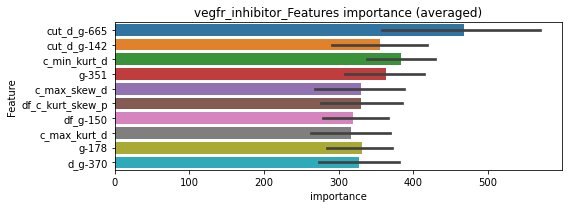

len(train_index) : 3451
len(valid_index) : 1726
================================= fold 1/3 vegfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0503747	valid_1's binary_logloss: 0.0992673
[2000]	training's binary_logloss: 0.0257082	valid_1's binary_logloss: 0.0744158
[3000]	training's binary_logloss: 0.0170963	valid_1's binary_logloss: 0.0649203
[4000]	training's binary_logloss: 0.0127517	valid_1's binary_logloss: 0.0600064
[5000]	training's binary_logloss: 0.0101848	valid_1's binary_logloss: 0.0569402
[6000]	training's binary_logloss: 0.00848659	valid_1's binary_logloss: 0.054902
Early stopping, best iteration is:
[6789]	training's binary_logloss: 0.00750353	valid_1's binary_logloss: 0.0537026


len(train_index) : 3451
len(valid_index) : 1726
================================= fold 2/3 vegfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.0506442	valid_1's binary_logloss: 0.0958628
[2000]	training's binary_logloss: 0.0256955	valid_1's binary_logloss: 0.0703271
[3000]	training's binary_logloss: 0.0170249	valid_1's binary_logloss: 0.0608561
[4000]	training's binary_logloss: 0.0127321	valid_1's binary_logloss: 0.0559007
[5000]	training's binary_logloss: 0.0101963	valid_1's binary_logloss: 0.0529249
[6000]	training's binary_logloss: 0.00849732	valid_1's binary_logloss: 0.0507449
Early stopping, best iteration is:
[6880]	training's binary_logloss: 0.00741475	valid_1's binary_logloss: 0.0494393


len(train_index) : 3452
len(valid_index) : 1725
================================= fold 3/3 vegfr_inhibitor=================================


Training until validation scores don't improve for 39 rounds
[1000]	training's binary_logloss: 0.050571	valid_1's binary_logloss: 0.0959063
[2000]	training's binary_logloss: 0.0257475	valid_1's binary_logloss: 0.0714677
[3000]	training's binary_logloss: 0.0170899	valid_1's binary_logloss: 0.0621305
[4000]	training's binary_logloss: 0.0127899	valid_1's binary_logloss: 0.0572672
[5000]	training's binary_logloss: 0.0102255	valid_1's binary_logloss: 0.0541997
[6000]	training's binary_logloss: 0.00852463	valid_1's binary_logloss: 0.0520921
[7000]	training's binary_logloss: 0.00732498	valid_1's binary_logloss: 0.0505613
[8000]	training's binary_logloss: 0.00642224	valid_1's binary_logloss: 0.04925
Early stopping, best iteration is:
[8241]	training's binary_logloss: 0.00624063	valid_1's binary_logloss: 0.0490763


vegfr_inhibitor logloss: 0.0507397455342597
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000340817	valid_1's binary_logloss: 0.00191651
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000338234	valid_1's binary_logloss: 0.00161529
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000339644	valid_1's binary_logloss: 0.0031918
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000358878	valid_1's binary_logloss: 0.00442167
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021076, Threshold: 0.0083469, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343435	valid_1's binary_logloss: 0.00217766


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0083469, conf_0:0.00584, conf_1:0.01085
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_1: 0.0383469
threshold: 0.0383469, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00034409	valid_1's binary_logloss: 0.00189159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000332224	valid_1's binary_logloss: 0.000967245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000330515	valid_1's binary_logloss: 0.00214881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000340381	valid_1's binary_logloss: 0.00521579
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372077, Threshold: 0.0383469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000330061	valid_1's binary_logloss: 0.00210937


p_label_rate: 0.0067805 Vs.target_rate: 0.00109
Num_p_label: 27.0, Expected: 4.3, Threshold: 0.0383469, conf_0:0.03068, conf_1:0.04602
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_1: 0.0683469
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.0983469
threshold: 0.0983469, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00034409	valid_1's binary_logloss: 0.00189159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000332224	valid_1's binary_logloss: 0.000967245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000330515	valid_1's binary_logloss: 0.00214881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000340381	valid_1's binary_logloss: 0.00521579
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372077, Threshold: 0.0983469, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000330061	valid_1's binary_logloss: 0.00210937


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.0983469, conf_0:0.08851, conf_1:0.10818
threshold: 0.0983469, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


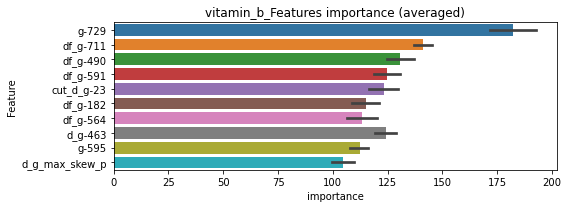

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000339145	valid_1's binary_logloss: 0.00136539


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000338412	valid_1's binary_logloss: 0.000866198


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000332814	valid_1's binary_logloss: 0.00159946


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000348089	valid_1's binary_logloss: 0.00328005


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000340042	valid_1's binary_logloss: 0.00180563


vitamin_b logloss: 0.001783599457497053
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000430766	valid_1's binary_logloss: 0.00862057
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000424754	valid_1's binary_logloss: 0.00243193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000440102	valid_1's binary_logloss: 0.0110812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000418445	valid_1's binary_logloss: 0.0013331
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000431761	valid_1's binary_logloss: 0.00917981


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026447, Threshold: 0.0136671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0136671, conf_0:0.00957, conf_1:0.01777
Num_p_label: 15.0, Expected: 6.5, Adj_threshold_1: 0.0436671
threshold: 0.0436671, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000408096	valid_1's binary_logloss: 0.00687244
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000405612	valid_1's binary_logloss: 0.00223427
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000617617	valid_1's binary_logloss: 0.00980133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000410484	valid_1's binary_logloss: 0.00130898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000405984	valid_1's binary_logloss: 0.00718828


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233193, Threshold: 0.0436671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0070316 Vs.target_rate: 0.00164
Num_p_label: 28.0, Expected: 6.5, Threshold: 0.0436671, conf_0:0.03493, conf_1:0.05240
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_1: 0.0736671
threshold: 0.0736671, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000408096	valid_1's binary_logloss: 0.00687244
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000405612	valid_1's binary_logloss: 0.00223427
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000617617	valid_1's binary_logloss: 0.00980133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000410484	valid_1's binary_logloss: 0.00130898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000405984	valid_1's binary_logloss: 0.00718828


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233193, Threshold: 0.0736671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0035158 Vs.target_rate: 0.00164
Num_p_label: 14.0, Expected: 6.5, Threshold: 0.0736671, conf_0:0.06630, conf_1:0.08103
threshold: 0.0736671, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


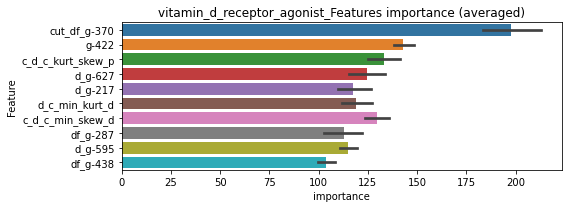

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000462193	valid_1's binary_logloss: 0.00845459


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000409678	valid_1's binary_logloss: 0.00190036


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000430508	valid_1's binary_logloss: 0.00870248


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000421041	valid_1's binary_logloss: 0.00153921


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000443905	valid_1's binary_logloss: 0.00801404


vitamin_d_receptor_agonist logloss: 0.005722900564925993
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000358527	valid_1's binary_logloss: 0.00284312
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000375787	valid_1's binary_logloss: 0.00480419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000357331	valid_1's binary_logloss: 0.000922212
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000366544	valid_1's binary_logloss: 0.00137524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000347229	valid_1's binary_logloss: 0.00385004


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024631, Threshold: 0.0103774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0103774, conf_0:0.00726, conf_1:0.01349
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.0403774
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0703774
threshold: 0.0703774, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000356323	valid_1's binary_logloss: 0.00243086
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000367151	valid_1's binary_logloss: 0.00443755
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000345184	valid_1's binary_logloss: 0.000802569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000355157	valid_1's binary_logloss: 0.00121306
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0595793, Threshold: 0.0703774, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000345838	valid_1's binary_logloss: 0.00299192


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0052737 Vs.target_rate: 0.00126
Num_p_label: 21.0, Expected: 5.0, Threshold: 0.0703774, conf_0:0.05630, conf_1:0.08445
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.1003774
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1303774
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1603774
threshold: 0.1603774, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000356323	valid_1's binary_logloss: 0.00243086
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000367151	valid_1's binary_logloss: 0.00443755
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000345184	valid_1's binary_logloss: 0.000802569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000355157	valid_1's binary_logloss: 0.00121306
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0595793, Threshold: 0.1603774, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000345838	valid_1's binary_logloss: 0.00299192


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.1603774, conf_0:0.14434, conf_1:0.17642
threshold: 0.1603774, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


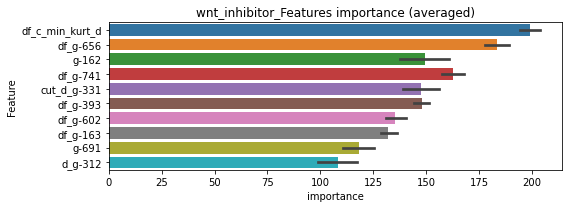

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000344276	valid_1's binary_logloss: 0.00179249


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 761
================================= fold 3/5 wnt_inhibitor=================================


Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000408394	valid_1's binary_logloss: 0.00405217
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000348078	valid_1's binary_logloss: 0.000720578
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000348078	valid_1's binary_logloss: 0.000720578


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.00035633	valid_1's binary_logloss: 0.00142608


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000344128	valid_1's binary_logloss: 0.00284785


wnt_inhibitor logloss: 0.002168945861608793


CV:0.017472000080564168


In [52]:
unpredictable = RUN()

In [53]:
unpredictable

['acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'opioid_receptor_antagonist',
 'pdgfr_inhibitor',
 'phosphodiesterase